# Data anaylsis in cerebellar granular layer simulations (MF-GrC + Connectivity FanIn)
## Running the simulation

First, we set current working directory to the root of Spiking Granular Layer and insert the source folder to the python path:

In [1]:
import os
os.chdir('../../')
os.getcwd()
import sys
import numpy
%matplotlib notebook
import matplotlib.pyplot as plt
import time
sys.path.insert(1,'./src')

## Running the simulation
Now start setting a new simulation with the configuration file that we specify:

In [2]:
config_file = './config/GoCFanIn/InitialTestMultiPattern.cfg'
data_path = './results'
simulation_name = 'TestMFGoCPlasticity10ATMulti'
simulation_time = 3000
analysis_time = 300.0
analysis_step = 100.0
time_bin = 0.125
run_the_simulation = False
import SpikingSimulation.FrequencySimulation as FrequencySimulation
simulation = FrequencySimulation.FrequencySimulation(config_file=config_file)

Set the simulation general parameters

In [3]:
simulation.config_options['simulation']['verbosity'] = 'Debug'
simulation.config_options['simulation']['seed'] = 12345
simulation.config_options['simulation']['time'] = simulation_time
simulation.config_options['simulation']['data_path'] = data_path
simulation.config_options['simulation']['simulation_name'] = simulation_name
simulation.config_options['simulation']['register_activity_only_in_test'] = False
simulation.config_options['simulation']['run_simulation'] = run_the_simulation
simulation.config_options['simulation']['record_to_file'] = True
simulation.config_options['simulation']['state_recording_step'] = 10.0
simulation.config_options['simulation']['weight_normalization_step'] = 100.0
if run_the_simulation:
    simulation.config_options['network']['load_file'] = None
else:
    simulation.config_options['network']['load_file'] = data_path + '/' + simulation_name + '/network.h5'

Set the network synaptic parameters of the granular layer

In [4]:
# Set the density of neurons per layer (in units/mm3)
simulation.config_options['mflayer']['density_of_neurons'] = 300.0e3
simulation.config_options['goclayer']['density_of_neurons'] = 9.0e3
# Set the neuron dynamic parameters
simulation.config_options['goclayer']['cm'] = 50.0e-12
simulation.config_options['goclayer']['grest'] = 3.0e-9
#simulation.config_options['goclayer']['cell_model'] = 'ConductanceLIF'
simulation.config_options['goclayer']['cell_model'] = 'ConductanceLIFwATSym'
simulation.config_options['goclayer']['tau_th'] = 1.0e3
simulation.config_options['goclayer']['th_cons'] = 2.0e1
# Set the MF-GrC connectivity rules and parameters
simulation.config_options['mfgocsynapsis']['connectivity_type'] = 'randomn2onestd'
simulation.config_options['mfgocsynapsis']['average_number_of_source_cells'] = 2000.0
simulation.config_options['mfgocsynapsis']['std_number_of_source_cells'] = 0.5
# Set the MF-GrC learning rule and initial weights
simulation.config_options['mfgocsynapsis']['weight_initialization_type'] = 'random'
simulation.config_options['mfgocsynapsis']['random_min_weight'] = 6.0e-11
simulation.config_options['mfgocsynapsis']['random_max_weight'] = 6.5e-11
simulation.config_options['mfgocsynapsis']['weight_recording'] = True
simulation.config_options['mfgocsynapsis']['weight_normalization'] = False
simulation.config_options['mfgocsynapsis']['learning_rule_type'] = 'eSTDP'
simulation.config_options['mfgocsynapsis']['tau_plus'] = 16.8e-3
simulation.config_options['mfgocsynapsis']['learning_step'] = 2.0e-3
simulation.config_options['mfgocsynapsis']['minus_plus_ratio'] = 1.00
simulation.config_options['goclayer']['tau_minus'] = 33.7e-3
simulation.config_options['mfgocsynapsis']['max_weight'] = 1.14e-9
# Set the GoC-GoC connectivity rules and parameters
simulation.config_options['gocgocsynapsis']['connectivity_type'] = 'random_with_probability'
simulation.config_options['gocgocsynapsis']['connection_probability'] = 1.0
# Set the MF-GrC learning rule and initial weights
simulation.config_options['gocgocsynapsis']['weight_initialization_type'] = 'fixed'
#simulation.config_options['gocgocsynapsis']['initial_weight'] = -1.0e-11
simulation.config_options['gocgocsynapsis']['initial_weight'] = -0.0e-10
simulation.config_options['gocgocsynapsis']['weight_recording'] = True
simulation.config_options['gocgocsynapsis']['weight_normalization'] = False
simulation.config_options['gocgocsynapsis']['learning_rule_type'] = 'STDPSym'
simulation.config_options['gocgocsynapsis']['tau_sym'] = 0.125
simulation.config_options['gocgocsynapsis']['learning_step'] = 5.0e-2
simulation.config_options['gocgocsynapsis']['minus_plus_ratio'] = 0.7
simulation.config_options['goclayer']['tau_istdp'] = 125.0e-3
simulation.config_options['gocgocsynapsis']['max_weight'] = -7.0e-9


Set analysis parameters

In [5]:
simulation.config_options['individual_mutual_information']['layer'] = 'goclayer'
simulation.config_options['individual_mutual_information']['window_length'] = analysis_time
simulation.config_options['individual_mutual_information']['time_bin'] = time_bin
simulation.config_options['hit_top_analysis']['layer'] = 'goclayer'
simulation.config_options['hit_top_analysis']['window_length'] = analysis_time
simulation.config_options['hit_top_analysis']['number_of_cells'] = 72
simulation.config_options['hit_top_analysis']['time_bin'] = time_bin

Initialize the simulation

In [6]:
# Set the rate of fibers in pattern
simulation.config_options['stimulation']['number_of_patterns'] = 4
simulation.config_options['stimulation']['rate_of_fibers_in_pattern'] = 0.10
simulation.config_options['network']['length'] = 2.0e-1
simulation.initialize()

2018-07-10 14:13:31,140 - P31889 - MemTotal:67M - Simulation - DEBUG: Simulation time fixed to 3000s
2018-07-10 14:13:31,157 - P31889 - MemTotal:67M - Simulation - DEBUG: Creating cerebellum generator
2018-07-10 14:13:31,238 - P31889 - MemTotal:84M - Simulation - DEBUG: Initializing cerebellum generator
2018-07-10 14:13:31,240 - P31889 - MemTotal:84M - Simulation - DEBUG: Cerebellar simulation initialized
2018-07-10 14:13:31,243 - P31889 - MemTotal:84M - Simulation - DEBUG: NEST module loaded
2018-07-10 14:13:31,268 - P31889 - MemTotal:88M - Simulation - DEBUG: Setting Global NEST Seed: 12356
2018-07-10 14:13:31,269 - P31889 - MemTotal:88M - Simulation - DEBUG: Setting Per-Process NEST Seeds: [12357, 12358, 12359, 12360, 12361, 12362, 12363, 12364, 12365, 12366]
2018-07-10 14:13:31,277 - P31889 - MemTotal:88M - Simulation - WARNING: Non-specified cell model parameter: tau_minus in layer mflayer. Using default value
2018-07-10 14:13:31,278 - P31889 - MemTotal:88M - Simulation - WARNING:

2018-07-10 14:13:34,514 - P31889 - MemTotal:855M - Simulation - DEBUG: Activation level of pattern 3 in shared cells: [1.         0.4812862  0.1964711  0.20747694 0.12657111 0.85454061
 0.6653852  0.04065191 0.1025546  0.33753522 0.22776703 0.20173258
 0.10439143 0.70784806 0.98821468 0.5242888  0.98909701 0.04655834
 0.58545256 0.05246393 0.12700064 0.06581248 0.78617784 0.14524258
 0.31852379 0.09013447 0.677026   0.94865867]
2018-07-10 14:13:34,516 - P31889 - MemTotal:855M - Simulation - DEBUG: Pattern 1 and 2 share 19 input cells: [ 272  427  483  649  667  696 1014 1109 1134 1204 1252 1257 1328 1441
 1477 1830 2268 2305 2324]
2018-07-10 14:13:34,517 - P31889 - MemTotal:855M - Simulation - DEBUG: Activation level of pattern 1 in shared cells: [0.21452001 0.38192293 0.49389278 0.95274506 0.70497397 0.89361132
 0.6110373  0.4446976  0.45894838 0.71952682 0.35752387 0.70760964
 0.10291158 0.64502006 0.89292021 0.23255593 0.33046704 0.27032873
 0.8860624 ]
2018-07-10 14:13:34,519 - P31

Define a function to obtain the average firing rate

In [7]:
def obtain_fr(init_time,end_time):
    min_neuron = 0
    max_neuron = simulation.cerebellum.get_number_of_elements(layer='goclayer')
    gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer', init_time = init_time, end_time = end_time, neuron_indexes=range(min_neuron,max_neuron))
    import numpy
    firing_frequency = float(len(gcell_id)) / ((end_time-init_time)*max_neuron)
    return firing_frequency

Visualize the simulation or only run it.

In [8]:
#simulation.visualize_animation()
if analysis_step>0.0:
    Hit_evolution = []
    MI_evolution = []
    FR_evolution = []
    time_evolution = []
    fig = plt.figure(figsize=(10,4))
    axis = fig.add_subplot(2,2,1)
    line,= axis.plot(time_evolution,FR_evolution)
    axis.set_title('Firing Rate evolution')
    axis.set_xlabel('Time (s)')
    axis.set_ylabel('Firing Rate (Hz)')
    axis.set_xlim([0,simulation_time])
    axis.set_ylim([0,10])
    axis2 = fig.add_subplot(2,2,2)
    line2 = []
    for i in range(simulation.config_options['stimulation']['number_of_patterns']):
        MI_evolution.append([])
        li,= axis2.plot(time_evolution,MI_evolution[i])
        line2.append(li)
    lineHit, = axis2.plot(time_evolution,Hit_evolution)
    #line2,=axis.plot(time_evolution,Hit_evolution)
    axis2.set_title('MI & Hit evolution')
    axis2.set_xlabel('Time (s)')
    axis2.set_ylabel('MI (bits)')
    axis2.set_xlim([0,simulation_time])
    axis2.set_ylim([0,1])
    axis3 = fig.add_subplot(2,2,3)
    weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
    n,bins,_ = axis3.hist(weight, bins=20)
    #line3,= axis2.plot(bins[:-1],n)
    axis3.set_title('MF-GoC Weight Histogram')
    axis3.set_xlabel('Weight (nS)')
    axis3.set_ylabel('Synapses count')
    axis3.set_xlim([0,simulation.config_options['mfgocsynapsis']['max_weight']])
    axis4 = fig.add_subplot(2,2,4)
    weight2 = simulation.cerebellum.layer_map['gocgocsynapsis'].weights
    n2,bins2,_ = axis4.hist(weight2, bins=20)
    #line3,= axis2.plot(bins[:-1],n)
    axis4.set_title('GoC-GoC Weight Histogram')
    axis4.set_xlabel('Weight (nS)')
    axis4.set_ylabel('Synapses count')
    axis4.set_xlim([simulation.config_options['gocgocsynapsis']['max_weight'],0])

    fig.canvas.draw()
    
    for sim_time in numpy.arange(simulation.config_options['individual_mutual_information']['window_length'],simulation_time,analysis_step):
        simulation.run_simulation(end_time=sim_time)
        fr=obtain_fr(sim_time-analysis_step,sim_time)
        FR_evolution.append(fr)
        av_MI=simulation.analyze_av_MI()[0]
        av_Hit=simulation.analyze_Hits_Top()[0]
        time_evolution.append(sim_time)
        Hit_evolution.append(av_Hit)
        line.set_xdata(time_evolution)
        line.set_ydata(FR_evolution)
        for i in range(simulation.config_options['stimulation']['number_of_patterns']):
            MI_evolution[i].append(av_MI[i])
            line2[i].set_xdata(time_evolution)
            line2[i].set_ydata(MI_evolution[i])
        lineHit.set_xdata(time_evolution)
        lineHit.set_ydata(Hit_evolution)
        _,_,weight =simulation.cerebellum.get_synaptic_weights(synaptic_layer='mfgocsynapsis', init_time=0, end_time=sim_time)
        weight=weight[:,-1]
        axis3.cla()
        n, bins,_ = axis3.hist(weight, bins=20)
        axis3.set_title('MF-GoC Weight Histogram')
        axis3.set_xlabel('Weight (nS)')
        axis3.set_ylabel('Synapses count')
        axis3.set_xlim([0,simulation.config_options['mfgocsynapsis']['max_weight']])
        _,_,weight2 =simulation.cerebellum.get_synaptic_weights(synaptic_layer='gocgocsynapsis', init_time=0, end_time=sim_time)
        weight2=weight2[:,-1]
        axis4.cla()
        n2, bins2,_ = axis4.hist(weight2, bins=20)
        axis4.set_title('GoC-GoC Weight Histogram')
        axis4.set_xlabel('Weight (nS)')
        axis4.set_ylabel('Synapses count')
        axis4.set_xlim([simulation.config_options['gocgocsynapsis']['max_weight'],0])
        fig.canvas.draw()
        time.sleep(1)    
else:
    simulation.run_simulation()

<IPython.core.display.Javascript object>

2018-07-10 14:13:43,346 - P31889 - MemTotal:1133M - Simulation - INFO: Running the simulation from 0.0s until time 300.0s
2018-07-10 14:13:43,380 - P31889 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.177s until 0.177s
2018-07-10 14:13:44,411 - P31889 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 1.02249002457 seconds. Real-time rate: 0.1731068232915189
2018-07-10 14:13:44,467 - P31889 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.11299999999999999s until 0.29s
2018-07-10 14:13:45,119 - P31889 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.650480985641 seconds. Real-time rate: 0.1737176066546568
2018-07-10 14:13:45,152 - P31889 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.964s until 1.254s
2018-07-10 14:13:50,350 - P31889 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 5.19604992867 seconds. Real-time rate: 0.1855255459886712
2018-07-10 14:13:50,367 - P31889 - MemTotal:1134M - Simulation - DEBUG: 

2018-07-10 14:14:17,611 - P31889 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.7320000000000002s until 7.409s
2018-07-10 14:14:21,765 - P31889 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 4.15215301514 seconds. Real-time rate: 0.17629408100604343
2018-07-10 14:14:21,799 - P31889 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.04699999999999971s until 7.4559999999999995s
2018-07-10 14:14:22,087 - P31889 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.286141872406 seconds. Real-time rate: 0.16425418483776308
2018-07-10 14:14:22,107 - P31889 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.21699999999999964s until 7.672999999999999s
2018-07-10 14:14:23,280 - P31889 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 1.17163109779 seconds. Real-time rate: 0.1852118814605169
2018-07-10 14:14:23,298 - P31889 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.07000000000000028s until 7.742999999999999

2018-07-10 14:14:50,836 - P31889 - MemTotal:1194M - Simulation - DEBUG: Simulation time is 1.38856506348 seconds. Real-time rate: 0.1829226492016568
2018-07-10 14:14:50,859 - P31889 - MemTotal:1194M - Simulation - DEBUG: Running the simulation 0.7140000000000004s until 13.686000000000002s
2018-07-10 14:14:54,347 - P31889 - MemTotal:1194M - Simulation - DEBUG: Simulation time is 3.48545098305 seconds. Real-time rate: 0.20485153957773303
2018-07-10 14:14:54,367 - P31889 - MemTotal:1194M - Simulation - DEBUG: Running the simulation 0.11100000000000065s until 13.797000000000002s
2018-07-10 14:14:54,844 - P31889 - MemTotal:1194M - Simulation - DEBUG: Simulation time is 0.474972009659 seconds. Real-time rate: 0.23369798165524586
2018-07-10 14:14:54,863 - P31889 - MemTotal:1194M - Simulation - DEBUG: Running the simulation 0.2400000000000002s until 14.037000000000003s
2018-07-10 14:14:56,127 - P31889 - MemTotal:1194M - Simulation - DEBUG: Simulation time is 1.26212501526 seconds. Real-time ra

2018-07-10 14:15:22,788 - P31889 - MemTotal:1194M - Simulation - DEBUG: Simulation time is 0.659927845001 seconds. Real-time rate: 0.17729210986662408
2018-07-10 14:15:22,819 - P31889 - MemTotal:1194M - Simulation - DEBUG: Running the simulation 0.10300000000000153s until 19.924000000000003s
2018-07-10 14:15:23,347 - P31889 - MemTotal:1194M - Simulation - DEBUG: Simulation time is 0.52539396286 seconds. Real-time rate: 0.19604336418198728
2018-07-10 14:15:23,379 - P31889 - MemTotal:1194M - Simulation - DEBUG: Running the simulation 0.0730000000000004s until 19.997000000000003s
2018-07-10 14:15:23,788 - P31889 - MemTotal:1194M - Simulation - DEBUG: Simulation time is 0.405225992203 seconds. Real-time rate: 0.18014639091431758
2018-07-10 14:15:23,821 - P31889 - MemTotal:1194M - Simulation - DEBUG: Running the simulation 0.22500000000000142s until 20.222000000000005s
2018-07-10 14:15:23,854 - P31889 - MemTotal:1194M - Simulation - DEBUG: Simulation time is 0.0313248634338 seconds. Real-ti

2018-07-10 14:15:56,778 - P31889 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.0790889263153 seconds. Real-time rate: 0.21494791738889898
2018-07-10 14:15:56,806 - P31889 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.16799999999999926s until 25.168s
2018-07-10 14:15:57,926 - P31889 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 1.11823821068 seconds. Real-time rate: 0.15023632567351095
2018-07-10 14:15:57,953 - P31889 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.2270000000000003s until 25.395s
2018-07-10 14:15:59,149 - P31889 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 1.19339799881 seconds. Real-time rate: 0.1902131562365525
2018-07-10 14:15:59,178 - P31889 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.07499999999999929s until 25.47s
2018-07-10 14:15:59,598 - P31889 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.418646812439 seconds. Real-time rate: 0.1791486230674064
2018-07-10 

2018-07-10 14:16:20,687 - P31889 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.047999999999998266s until 29.913999999999998s
2018-07-10 14:16:20,927 - P31889 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.236963033676 seconds. Real-time rate: 0.20256324058375655
2018-07-10 14:16:20,958 - P31889 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.7100000000000009s until 30.624s
2018-07-10 14:16:21,404 - P31889 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.442220926285 seconds. Real-time rate: 0.19447293171426747
2018-07-10 14:16:21,406 - P31889 - MemTotal:1195M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 14:16:21,409 - P31889 - MemTotal:1195M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
2018-07-10 14:16:25,814 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 3.48015999794 seconds. Real-time rate: 0.17930210115895526
2018-07-1

2018-07-10 14:16:52,783 - P31889 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.480662107468 seconds. Real-time rate: 0.8966797950242078
2018-07-10 14:16:52,802 - P31889 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.04899999999999949s until 36.227000000000004s
2018-07-10 14:16:53,019 - P31889 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.215593099594 seconds. Real-time rate: 0.22728000150398486
2018-07-10 14:16:53,039 - P31889 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.3470000000000013s until 36.574000000000005s
2018-07-10 14:16:54,989 - P31889 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 1.94784402847 seconds. Real-time rate: 0.17814568052045085
2018-07-10 14:16:55,022 - P31889 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.1700000000000017s until 36.74400000000001s
2018-07-10 14:16:55,878 - P31889 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.854941129684 seconds. Real-time r

2018-07-10 14:17:41,873 - P31889 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.387750864029 seconds. Real-time rate: 0.5312689644571188
2018-07-10 14:17:41,891 - P31889 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.23499999999999943s until 45.82400000000001s
2018-07-10 14:17:42,176 - P31889 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.283343076706 seconds. Real-time rate: 0.829383243564811
2018-07-10 14:17:42,193 - P31889 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.0730000000000004s until 45.89700000000001s
2018-07-10 14:17:42,268 - P31889 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.0731830596924 seconds. Real-time rate: 0.9974986056451878
2018-07-10 14:17:42,285 - P31889 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.031999999999996476s until 45.92900000000001s
2018-07-10 14:17:42,348 - P31889 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.0605680942535 seconds. Real-time r

2018-07-10 14:18:22,056 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.306522130966 seconds. Real-time rate: 0.17616998756268912
2018-07-10 14:18:22,089 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.232999999999997s until 53.875000000000014s
2018-07-10 14:18:23,342 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 1.24536108971 seconds. Real-time rate: 0.18709433105455703
2018-07-10 14:18:23,376 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.134999999999998s until 54.01000000000001s
2018-07-10 14:18:24,152 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.774962902069 seconds. Real-time rate: 0.17420188713493034
2018-07-10 14:18:24,185 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.2749999999999986s until 54.28500000000001s
2018-07-10 14:18:25,493 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 1.30688810349 seconds. Real-time rate:

2018-07-10 14:19:02,492 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.986536026001 seconds. Real-time rate: 0.19563401124066684
2018-07-10 14:19:02,524 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.2980000000000018s until 61.85100000000001s
2018-07-10 14:19:04,180 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 1.65475392342 seconds. Real-time rate: 0.18008719954251515
2018-07-10 14:19:04,213 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.003999999999997783s until 61.85500000000001s
2018-07-10 14:19:04,259 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.0451757907867 seconds. Real-time rate: 0.08854299903415488
2018-07-10 14:19:04,290 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.4720000000000013s until 62.32700000000001s
2018-07-10 14:19:06,774 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 2.48251509666 seconds. Real-time r

2018-07-10 14:19:30,493 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.546999999999997s until 67.92000000000002s
2018-07-10 14:19:33,314 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 2.81328296661 seconds. Real-time rate: 0.19443476055961692
2018-07-10 14:19:33,346 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.382000000000005s until 68.30200000000002s
2018-07-10 14:19:35,300 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 1.95270204544 seconds. Real-time rate: 0.19562636342391784
2018-07-10 14:19:35,331 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.22299999999999898s until 68.52500000000002s
2018-07-10 14:19:36,353 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 1.02117395401 seconds. Real-time rate: 0.2183761142010219
2018-07-10 14:19:36,382 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.0589999999999975s until 68.58400000

2018-07-10 14:20:18,768 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.37699999999999534s until 77.77400000000002s
2018-07-10 14:20:20,754 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 1.98375296593 seconds. Real-time rate: 0.19004382424391292
2018-07-10 14:20:20,771 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.01999999999999602s until 77.79400000000001s
2018-07-10 14:20:20,899 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.121891975403 seconds. Real-time rate: 0.16407971020159004
2018-07-10 14:20:20,927 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.23799999999999955s until 78.03200000000001s
2018-07-10 14:20:22,081 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 1.15128183365 seconds. Real-time rate: 0.2067260969850639
2018-07-10 14:20:22,099 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.10299999999999443s until 78.13

2018-07-10 14:20:49,207 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.0010000000000047748s until 82.95900000000003s
2018-07-10 14:20:49,231 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.0207190513611 seconds. Real-time rate: 0.048264758003498505
2018-07-10 14:20:49,262 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.6479999999999961s until 83.60700000000003s
2018-07-10 14:20:52,373 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 3.11000418663 seconds. Real-time rate: 0.2083598481268017
2018-07-10 14:20:52,397 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.4590000000000032s until 84.06600000000003s
2018-07-10 14:20:54,455 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 2.05236697197 seconds. Real-time rate: 0.22364421483527994
2018-07-10 14:20:54,485 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.5379999999999967s until 84.6

2018-07-10 14:21:18,715 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.366008043289 seconds. Real-time rate: 0.2049135295661932
2018-07-10 14:21:18,745 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.4899999999999949s until 89.67600000000004s
2018-07-10 14:21:20,939 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 2.19187498093 seconds. Real-time rate: 0.2235528961569104
2018-07-10 14:21:20,968 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.26200000000000045s until 89.93800000000005s
2018-07-10 14:21:22,283 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 1.31343412399 seconds. Real-time rate: 0.19947707708667142
2018-07-10 14:21:22,310 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.1560000000000059s until 90.09400000000005s
2018-07-10 14:21:22,680 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.367269992828 seconds. Real-time rate:

2018-07-10 14:21:58,105 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 1.93744087219 seconds. Real-time rate: 0.18890899085133825
2018-07-10 14:21:58,137 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.10999999999999943s until 97.33600000000006s
2018-07-10 14:21:58,753 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.61434006691 seconds. Real-time rate: 0.17905392456870614
2018-07-10 14:21:58,788 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.3689999999999998s until 97.70500000000006s
2018-07-10 14:22:00,733 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 1.94273209572 seconds. Real-time rate: 0.18993869551712475
2018-07-10 14:22:00,759 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.028000000000005798s until 97.73300000000006s
2018-07-10 14:22:00,916 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.154881954193 seconds. Real-time ra

2018-07-10 14:22:34,034 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 2.4190158844 seconds. Real-time rate: 0.19388049620700856
2018-07-10 14:22:34,069 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.09900000000000375s until 104.03600000000009s
2018-07-10 14:22:34,599 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.524654865265 seconds. Real-time rate: 0.18869547688273075
2018-07-10 14:22:34,629 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.8880000000000052s until 104.92400000000009s
2018-07-10 14:22:38,791 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 4.16042399406 seconds. Real-time rate: 0.21343978432652852
2018-07-10 14:22:38,823 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.06999999999999318s until 104.99400000000009s
2018-07-10 14:22:39,129 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.304360866547 seconds. Real-time 

2018-07-10 14:23:12,970 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 1.36832404137 seconds. Real-time rate: 0.21413056494087498
2018-07-10 14:23:13,001 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.19499999999999318s until 112.17100000000012s
2018-07-10 14:23:13,816 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.812212944031 seconds. Real-time rate: 0.24008482188460142
2018-07-10 14:23:13,848 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.030000000000001137s until 112.20100000000012s
2018-07-10 14:23:14,044 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.191955089569 seconds. Real-time rate: 0.1562865567531775
2018-07-10 14:23:14,079 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.7360000000000042s until 112.93700000000013s
2018-07-10 14:23:17,504 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 3.41673493385 seconds. Real-time

2018-07-10 14:23:50,803 - P31889 - MemTotal:1196M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 14:23:50,805 - P31889 - MemTotal:1196M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
2018-07-10 14:23:53,719 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 2.03298401833 seconds. Real-time rate: 0.18150659162781071
2018-07-10 14:23:53,751 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.04200000000000159s until 120.41100000000013s
2018-07-10 14:23:53,950 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.195127010345 seconds. Real-time rate: 0.2152444191383011
2018-07-10 14:23:53,971 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.07099999999999795s until 120.48200000000013s
2018-07-10 14:23:54,393 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.420611858368 seconds. Real-time rate: 0.1688017077680497

2018-07-10 14:24:22,301 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.11299999999999955s until 125.94800000000014s
2018-07-10 14:24:22,935 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.632053852081 seconds. Real-time rate: 0.17878223450090572
2018-07-10 14:24:22,953 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.11700000000000443s until 126.06500000000014s
2018-07-10 14:24:23,565 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.609177112579 seconds. Real-time rate: 0.19206237001355678
2018-07-10 14:24:23,587 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.08899999999999864s until 126.15400000000014s
2018-07-10 14:24:24,109 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.52011179924 seconds. Real-time rate: 0.1711170562368098
2018-07-10 14:24:24,144 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.347999999999999s until 126

2018-07-10 14:24:56,713 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.0689999999999884s until 132.8980000000002s
2018-07-10 14:24:57,122 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.40673995018 seconds. Real-time rate: 0.1696415608288387
2018-07-10 14:24:57,153 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.17500000000001137s until 133.0730000000002s
2018-07-10 14:24:57,979 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.821106910706 seconds. Real-time rate: 0.21312693599136337
2018-07-10 14:24:58,012 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.23400000000000887s until 133.30700000000022s
2018-07-10 14:24:59,282 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 1.26609301567 seconds. Real-time rate: 0.184820544070402
2018-07-10 14:24:59,310 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.664999999999992s until 133.97200

2018-07-10 14:25:39,671 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.26200000000000045s until 141.69400000000024s
2018-07-10 14:25:40,595 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.922685146332 seconds. Real-time rate: 0.28395385039154863
2018-07-10 14:25:40,626 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.13999999999998636s until 141.83400000000023s
2018-07-10 14:25:41,243 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.615164995193 seconds. Real-time rate: 0.2275812198253472
2018-07-10 14:25:41,276 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.07800000000000296s until 141.91200000000023s
2018-07-10 14:25:41,682 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.402832984924 seconds. Real-time rate: 0.19362863250797963
2018-07-10 14:25:41,714 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.03999999999999204s until 

2018-07-10 14:26:10,407 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 2.0682489872 seconds. Real-time rate: 0.21225684272896125
2018-07-10 14:26:10,427 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.0730000000000075s until 148.26000000000022s
2018-07-10 14:26:10,847 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.4177339077 seconds. Real-time rate: 0.17475239298148082
2018-07-10 14:26:10,877 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.2230000000000132s until 148.48300000000023s
2018-07-10 14:26:11,800 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.920704126358 seconds. Real-time rate: 0.24220593089130532
2018-07-10 14:26:11,831 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.3439999999999941s until 148.82700000000023s
2018-07-10 14:26:13,545 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 1.71157312393 seconds. Real-time rate

2018-07-10 14:26:48,674 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.0533740520477 seconds. Real-time rate: 0.1124141744875348
2018-07-10 14:26:48,710 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.015999999999991132s until 155.26100000000014s
2018-07-10 14:26:48,805 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.0926268100739 seconds. Real-time rate: 0.1727361655576191
2018-07-10 14:26:48,833 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.04200000000000159s until 155.30300000000014s
2018-07-10 14:26:49,075 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.24086689949 seconds. Real-time rate: 0.17437016081856088
2018-07-10 14:26:49,106 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.002999999999985903s until 155.30600000000013s
2018-07-10 14:26:49,142 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.0339601039886 seconds. Real

2018-07-10 14:27:05,788 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.4310000000000116s until 159.3900000000001s
2018-07-10 14:27:07,916 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 2.12589597702 seconds. Real-time rate: 0.20273804770265266
2018-07-10 14:27:07,944 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.27199999999999136s until 159.6620000000001s
2018-07-10 14:27:09,389 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 1.44189214706 seconds. Real-time rate: 0.1886410162880781
2018-07-10 14:27:09,420 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.7230000000000132s until 160.3850000000001s
2018-07-10 14:27:11,159 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 1.73675918579 seconds. Real-time rate: 0.19461535183760367
2018-07-10 14:27:11,161 - P31889 - MemTotal:1196M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 14:

2018-07-10 14:27:57,613 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.18500000000000227s until 169.67700000000002s
2018-07-10 14:27:58,492 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.877869129181 seconds. Real-time rate: 0.2107375619559782
2018-07-10 14:27:58,511 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.002999999999985903s until 169.68s
2018-07-10 14:27:58,549 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.0366199016571 seconds. Real-time rate: 0.0819226667530901
2018-07-10 14:27:58,580 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.4660000000000082s until 170.14600000000002s
2018-07-10 14:27:59,966 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 1.38321208954 seconds. Real-time rate: 0.23134557774631798
2018-07-10 14:27:59,968 - P31889 - MemTotal:1196M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 14:27:59

2018-07-10 14:28:32,591 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 2.17769408226 seconds. Real-time rate: 0.20250778270119016
2018-07-10 14:28:32,623 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.6539999999999964s until 176.89999999999992s
2018-07-10 14:28:34,467 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 1.83787989616 seconds. Real-time rate: 0.3558447977830533
2018-07-10 14:28:34,484 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.3669999999999902s until 177.2669999999999s
2018-07-10 14:28:34,914 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.427613973618 seconds. Real-time rate: 0.8582507182710194
2018-07-10 14:28:34,932 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.0689999999999884s until 177.3359999999999s
2018-07-10 14:28:35,179 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.245068073273 seconds. Real-time rate:

2018-07-10 14:29:05,926 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.438162088394 seconds. Real-time rate: 0.13237110543397052
2018-07-10 14:29:05,956 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.1910000000000025s until 183.31799999999993s
2018-07-10 14:29:07,026 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 1.06806778908 seconds. Real-time rate: 0.1788276006010112
2018-07-10 14:29:07,059 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.20300000000000296s until 183.52099999999993s
2018-07-10 14:29:08,052 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.98961687088 seconds. Real-time rate: 0.20512989013562655
2018-07-10 14:29:08,085 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.21999999999999886s until 183.74099999999993s
2018-07-10 14:29:09,264 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 1.1765229702 seconds. Real-time ra

2018-07-10 14:29:29,670 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.06399999999999295s until 188.19799999999992s
2018-07-10 14:29:29,968 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.294005155563 seconds. Real-time rate: 0.2176832575515899
2018-07-10 14:29:29,997 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.20599999999998886s until 188.4039999999999s
2018-07-10 14:29:31,007 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 1.00517201424 seconds. Real-time rate: 0.2049400471584665
2018-07-10 14:29:31,035 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.4890000000000043s until 188.89299999999992s
2018-07-10 14:29:33,593 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 2.55572390556 seconds. Real-time rate: 0.19133522167067368
2018-07-10 14:29:33,627 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.2009999999999934s until 189.09

2018-07-10 14:30:04,389 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.05000000000001137s until 194.54799999999994s
2018-07-10 14:30:04,686 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.295604944229 seconds. Real-time rate: 0.16914466748991833
2018-07-10 14:30:04,714 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.16100000000000136s until 194.70899999999995s
2018-07-10 14:30:05,575 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.859392166138 seconds. Real-time rate: 0.18734171236814054
2018-07-10 14:30:05,606 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.05500000000000682s until 194.76399999999995s
2018-07-10 14:30:05,907 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.298152923584 seconds. Real-time rate: 0.1844690950498572
2018-07-10 14:30:05,939 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.1939999999999884s until 1

2018-07-10 14:30:37,085 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.13599999999999568s until 201.57799999999992s
2018-07-10 14:30:37,882 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.78866314888 seconds. Real-time rate: 0.1724437108455388
2018-07-10 14:30:37,912 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.742999999999995s until 202.3209999999999s
2018-07-10 14:30:41,544 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 3.63025999069 seconds. Real-time rate: 0.20466853666266915
2018-07-10 14:30:41,562 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.34499999999999886s until 202.6659999999999s
2018-07-10 14:30:43,392 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 1.82814693451 seconds. Real-time rate: 0.18871568443846443
2018-07-10 14:30:43,410 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.42500000000001137s until 203.090

2018-07-10 14:31:23,022 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.15399999999999636s until 210.86699999999993s
2018-07-10 14:31:23,759 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.73477602005 seconds. Real-time rate: 0.20958767814647344
2018-07-10 14:31:23,790 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.03999999999999204s until 210.90699999999993s
2018-07-10 14:31:24,043 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.251868963242 seconds. Real-time rate: 0.15881273931169723
2018-07-10 14:31:24,077 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.1939999999999884s until 211.1009999999999s
2018-07-10 14:31:25,006 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.925945997238 seconds. Real-time rate: 0.2095154583297911
2018-07-10 14:31:25,039 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.3990000000000009s until 211.

2018-07-10 14:31:47,980 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.01300000000000523s until 215.60499999999996s
2018-07-10 14:31:48,066 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.0845100879669 seconds. Real-time rate: 0.15382778923498477
2018-07-10 14:31:48,095 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.056000000000011596s until 215.66099999999997s
2018-07-10 14:31:48,305 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.208193063736 seconds. Real-time rate: 0.2689811033812003
2018-07-10 14:31:48,340 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.7249999999999943s until 216.38599999999997s
2018-07-10 14:31:52,013 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 3.67067217827 seconds. Real-time rate: 0.1975115087346206
2018-07-10 14:31:52,051 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.4939999999999998s until 21

2018-07-10 14:32:16,895 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.009999999999990905s until 221.58599999999996s
2018-07-10 14:32:16,972 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.0732660293579 seconds. Real-time rate: 0.13648890335164937
2018-07-10 14:32:16,990 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.05699999999998795s until 221.64299999999994s
2018-07-10 14:32:17,334 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.339925050735 seconds. Real-time rate: 0.16768402292405568
2018-07-10 14:32:17,370 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.11000000000001364s until 221.75299999999996s
2018-07-10 14:32:17,969 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.597275018692 seconds. Real-time rate: 0.18416976527982812
2018-07-10 14:32:18,000 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.5749999999999886s unti

2018-07-10 14:32:41,593 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.0675609111786 seconds. Real-time rate: 0.9028889477047036
2018-07-10 14:32:41,611 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.3499999999999943s until 226.79399999999995s
2018-07-10 14:32:41,985 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.371953964233 seconds. Real-time rate: 0.9409766628549006
2018-07-10 14:32:42,002 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.1980000000000075s until 226.99199999999996s
2018-07-10 14:32:42,468 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.464696884155 seconds. Real-time rate: 0.4260841997250146
2018-07-10 14:32:42,488 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.5349999999999966s until 227.52699999999996s
2018-07-10 14:32:45,204 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 2.70791006088 seconds. Real-time ra

2018-07-10 14:33:11,901 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.168997049332 seconds. Real-time rate: 0.20710420766759877
2018-07-10 14:33:11,919 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.24799999999999045s until 232.63899999999984s
2018-07-10 14:33:13,220 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 1.29272007942 seconds. Real-time rate: 0.19184354288894204
2018-07-10 14:33:13,250 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.6210000000000093s until 233.25999999999985s
2018-07-10 14:33:16,432 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 3.17997312546 seconds. Real-time rate: 0.19528466924091226
2018-07-10 14:33:16,463 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.05699999999998795s until 233.31699999999984s
2018-07-10 14:33:16,780 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.315634965897 seconds. Real-time

2018-07-10 14:33:50,769 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 1.63048601151 seconds. Real-time rate: 0.18460753289259307
2018-07-10 14:33:50,801 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.41900000000001114s until 240.71999999999986s
2018-07-10 14:33:52,945 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 2.14138102531 seconds. Real-time rate: 0.19566812026762337
2018-07-10 14:33:52,972 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.02199999999999136s until 240.74199999999985s
2018-07-10 14:33:53,099 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.125844955444 seconds. Real-time rate: 0.17481829066817428
2018-07-10 14:33:53,131 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.0049999999999954525s until 240.74699999999984s
2018-07-10 14:33:53,182 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.0492370128632 seconds. Real-

2018-07-10 14:34:36,509 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.12000000000000455s until 250.10799999999975s
2018-07-10 14:34:36,598 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.0856819152832 seconds. Real-time rate: 0.14005289168190083
2018-07-10 14:34:36,601 - P31889 - MemTotal:1196M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 14:34:36,603 - P31889 - MemTotal:1196M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
2018-07-10 14:34:38,223 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.583306074142 seconds. Real-time rate: 0.18515150928013882
2018-07-10 14:34:38,255 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.05099999999998772s until 250.15899999999974s
2018-07-10 14:34:38,537 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.279861927032 seconds. Real-time rate: 0.1822327193297

2018-07-10 14:35:15,713 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.16899999999998272s until 258.23199999999974s
2018-07-10 14:35:16,543 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.828320980072 seconds. Real-time rate: 0.20402718760701724
2018-07-10 14:35:16,574 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.29000000000002046s until 258.52199999999976s
2018-07-10 14:35:17,996 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 1.42041397095 seconds. Real-time rate: 0.204165831885349
2018-07-10 14:35:18,027 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.1419999999999959s until 258.66399999999976s
2018-07-10 14:35:18,786 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.757086038589 seconds. Real-time rate: 0.18756124503967245
2018-07-10 14:35:18,819 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.3439999999999941s until 259.

2018-07-10 14:35:47,852 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.08499999999997954s until 264.1149999999997s
2018-07-10 14:35:48,301 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.447479963303 seconds. Real-time rate: 0.18995263915872257
2018-07-10 14:35:48,322 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.9089999999999918s until 265.0239999999997s
2018-07-10 14:35:52,907 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 4.58263993263 seconds. Real-time rate: 0.19835728168977634
2018-07-10 14:35:52,946 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.026999999999986812s until 265.0509999999997s
2018-07-10 14:35:53,102 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.151139974594 seconds. Real-time rate: 0.17864234840911444
2018-07-10 14:35:53,133 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.2559999999999718s until 265.

2018-07-10 14:36:16,400 - P31889 - MemTotal:1196M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
2018-07-10 14:36:19,492 - P31889 - MemTotal:1197M - Simulation - DEBUG: Simulation time is 2.17606091499 seconds. Real-time rate: 0.20082158407820225
2018-07-10 14:36:19,522 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.09399999999999409s until 270.5309999999996s
2018-07-10 14:36:19,943 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.419029951096 seconds. Real-time rate: 0.2243276399556284
2018-07-10 14:36:19,973 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.019000000000005457s until 270.5499999999996s
2018-07-10 14:36:20,089 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.114145040512 seconds. Real-time rate: 0.166454888576555
2018-07-10 14:36:20,119 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.1190000000000282s un

2018-07-10 14:37:04,131 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.547038078308 seconds. Real-time rate: 0.17183447318826486
2018-07-10 14:37:04,164 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.3059999999999832s until 280.08199999999965s
2018-07-10 14:37:05,266 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 1.09904384613 seconds. Real-time rate: 0.2038135246278056
2018-07-10 14:37:05,270 - P31889 - MemTotal:1196M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 14:37:05,272 - P31889 - MemTotal:1196M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
2018-07-10 14:37:06,657 - P31889 - MemTotal:1197M - Simulation - DEBUG: Simulation time is 0.415056943893 seconds. Real-time rate: 0.19756325296103555
2018-07-10 14:37:06,686 - P31889 - MemTotal:1197M - Simulation - DEBUG: Running the simulation 0.04099999999999682s until 280.12299999999965s

2018-07-10 14:37:48,214 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 1.71879601479 seconds. Real-time rate: 0.18850404423394032
2018-07-10 14:37:48,217 - P31889 - MemTotal:1196M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 14:37:48,218 - P31889 - MemTotal:1196M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
2018-07-10 14:37:49,533 - P31889 - MemTotal:1197M - Simulation - DEBUG: Simulation time is 0.355047941208 seconds. Real-time rate: 0.21123907871300912
2018-07-10 14:37:49,554 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.06999999999999318s until 290.1449999999997s
2018-07-10 14:37:49,932 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.375678777695 seconds. Real-time rate: 0.18632939669772655
2018-07-10 14:37:49,958 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.7989999999999782s until 290.9439999999997s


2018-07-10 14:38:20,171 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.745843887329 seconds. Real-time rate: 0.1903883673411924
2018-07-10 14:38:20,202 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.3269999999999982s until 296.1639999999997s
2018-07-10 14:38:21,808 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 1.60233998299 seconds. Real-time rate: 0.20407654022995406
2018-07-10 14:38:21,844 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.7189999999999941s until 296.8829999999997s
2018-07-10 14:38:25,095 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 3.24905991554 seconds. Real-time rate: 0.22129478024104673
2018-07-10 14:38:25,119 - P31889 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.01799999999997226s until 296.90099999999967s
2018-07-10 14:38:25,232 - P31889 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.111199140549 seconds. Real-time rat

2018-07-10 14:38:38,861 - P31889 - MemTotal:1197M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-10 14:38:38,862 - P31889 - MemTotal:1197M - Simulation - INFO: [[0.60233593 0.50278087 0.64794216 0.64460512 0.42714127 0.56229143
  0.57842047 0.39432703 0.47441602 0.60567297 0.53392659 0.57675195
  0.63125695 0.62958843 0.48609566 0.55339266 0.56229143 0.62736374
  0.46941046 0.56785317 0.54060067 0.5483871  0.43159066 0.49443826
  0.5483871  0.38598443 0.39766407 0.51946607 0.59566185 0.62625139
  0.4916574  0.61735261 0.50389321 0.43993326 0.48220245 0.57730812
  0.51446051 0.39265851 0.5        0.44827586 0.55283648 0.52002225
  0.50222469 0.52224694 0.5105673  0.43659622 0.53225806 0.52169077
  0.39877642 0.45828699 0.37986652 0.45105673 0.47830923 0.38431591
  0.39877642 0.63959956 0.50667408 0.61067853 0.62903226 0.55951057
  0.62235818 0.56785317 0.6028921  0.59121246 0.56284761 0.6028921
  0.59232481 0.57842047 0.60066741 0.45272525 0.55617353 0.5862069

2018-07-10 14:38:38,880 - P31889 - MemTotal:1197M - Simulation - DEBUG: Shannon entropy of the patterns: [0.81259626 0.78874835 0.85086906 0.74937205]
2018-07-10 14:38:38,883 - P31889 - MemTotal:1197M - Simulation - DEBUG: Shannon entropy of the population response: [0.96586669 0.99987176 0.96036227 0.9562572  0.9800705  0.98973198
 0.99637771 0.97380037 0.99710466 0.97021469 0.99747331 0.99215866
 0.97800663 0.96586669 0.99971144 0.99801087 0.99029966 0.97046104
 0.99593861 0.99404017 0.99001785 0.99966134 0.99348001 0.99923794
 0.99190526 0.96453013 0.99015926 0.99985522 0.98958752 0.9728671
 0.99951855 0.98424878 0.99740159 0.98297323 0.99966134 0.98824161
 0.99999199 0.98761696 0.99995942 0.99518365 0.99071475 0.99788251
 0.99973499 0.99960723 0.9999995  0.97986876 0.99954911 0.99732886
 0.98424878 0.98987542 0.9553504  0.99112072 0.99971144 0.96205794
 0.97143598 0.95565373 0.9983142  0.98631872 0.96316725 0.9971804
 0.9744894  0.99404017 0.97070634 0.98370826 0.99566306 0.9784276

2018-07-10 14:38:39,004 - P31889 - MemTotal:1197M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-10 14:38:39,005 - P31889 - MemTotal:1197M - Simulation - INFO: [[0.60233593 0.50278087 0.64794216 0.64460512 0.42714127 0.56229143
  0.57842047 0.39432703 0.47441602 0.60567297 0.53392659 0.57675195
  0.63125695 0.62958843 0.48609566 0.55339266 0.56229143 0.62736374
  0.46941046 0.56785317 0.54060067 0.5483871  0.43159066 0.49443826
  0.5483871  0.38598443 0.39766407 0.51946607 0.59566185 0.62625139
  0.4916574  0.61735261 0.50389321 0.43993326 0.48220245 0.57730812
  0.51446051 0.39265851 0.5        0.44827586 0.55283648 0.52002225
  0.50222469 0.52224694 0.5105673  0.43659622 0.53225806 0.52169077
  0.39877642 0.45828699 0.37986652 0.45105673 0.47830923 0.38431591
  0.39877642 0.63959956 0.50667408 0.61067853 0.62903226 0.55951057
  0.62235818 0.56785317 0.6028921  0.59121246 0.56284761 0.6028921
  0.59232481 0.57842047 0.60066741 0.45272525 0.55617353 0.5862069

2018-07-10 14:38:39,021 - P31889 - MemTotal:1197M - Simulation - INFO: Individual pattern false alarm any matrix:
2018-07-10 14:38:39,023 - P31889 - MemTotal:1197M - Simulation - INFO: [0.26842105 0.42631579 0.26447368 0.275      0.61973684 0.35657895
 0.41052632 0.58421053 0.43815789 0.3        0.40131579 0.4
 0.31710526 0.25921053 0.45       0.36052632 0.36315789 0.26315789
 0.43684211 0.35263158 0.39605263 0.41447368 0.47236842 0.51315789
 0.35657895 0.58684211 0.575      0.43684211 0.33289474 0.3
 0.46052632 0.28947368 0.42368421 0.50657895 0.45789474 0.30131579
 0.44078947 0.54210526 0.40657895 0.51052632 0.36184211 0.39868421
 0.46184211 0.375      0.39473684 0.525      0.40526316 0.40921053
 0.62631579 0.55394737 0.61052632 0.50921053 0.41710526 0.64342105
 0.61842105 0.26315789 0.43026316 0.36578947 0.25921053 0.41052632
 0.28947368 0.33684211 0.225      0.34473684 0.38289474 0.32631579
 0.39736842 0.33421053 0.33157895 0.51842105 0.38289474 0.35657895]
2018-07-10 14:38:39,025 

2018-07-10 14:39:10,943 - P31889 - MemTotal:1197M - Simulation - DEBUG: Running the simulation 0.242999999999995s until 306.1789999999996s
2018-07-10 14:39:12,139 - P31889 - MemTotal:1197M - Simulation - DEBUG: Simulation time is 1.19322013855 seconds. Real-time rate: 0.20365060239037547
2018-07-10 14:39:12,177 - P31889 - MemTotal:1197M - Simulation - DEBUG: Running the simulation 0.040000000000020464s until 306.2189999999996s
2018-07-10 14:39:12,391 - P31889 - MemTotal:1197M - Simulation - DEBUG: Simulation time is 0.194697856903 seconds. Real-time rate: 0.20544653462689694
2018-07-10 14:39:12,421 - P31889 - MemTotal:1197M - Simulation - DEBUG: Running the simulation 0.3620000000000232s until 306.5809999999996s
2018-07-10 14:39:14,171 - P31889 - MemTotal:1197M - Simulation - DEBUG: Simulation time is 1.74737787247 seconds. Real-time rate: 0.20716755414152768
2018-07-10 14:39:14,190 - P31889 - MemTotal:1197M - Simulation - DEBUG: Running the simulation 0.5649999999999977s until 307.145

2018-07-10 14:39:35,778 - P31889 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.2529999999999859s until 311.2689999999996s
2018-07-10 14:39:36,914 - P31889 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 1.13523721695 seconds. Real-time rate: 0.2228609106736576
2018-07-10 14:39:36,948 - P31889 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.19999999999998863s until 311.4689999999996s
2018-07-10 14:39:37,962 - P31889 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 1.01261210442 seconds. Real-time rate: 0.19750899592036272
2018-07-10 14:39:37,984 - P31889 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.2799999999999727s until 311.74899999999957s
2018-07-10 14:39:39,444 - P31889 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 1.45800113678 seconds. Real-time rate: 0.1920437460140771
2018-07-10 14:39:39,461 - P31889 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.19700000000000273s until 311.9459

2018-07-10 14:40:12,239 - P31889 - MemTotal:1137M - Simulation - DEBUG: Simulation time is 0.501035928726 seconds. Real-time rate: 0.2554707011239801
2018-07-10 14:40:12,257 - P31889 - MemTotal:1137M - Simulation - DEBUG: Running the simulation 0.35599999999999454s until 319.03899999999953s
2018-07-10 14:40:14,130 - P31889 - MemTotal:1137M - Simulation - DEBUG: Simulation time is 1.87103009224 seconds. Real-time rate: 0.19026952130626013
2018-07-10 14:40:14,160 - P31889 - MemTotal:1137M - Simulation - DEBUG: Running the simulation 0.03100000000000591s until 319.06999999999954s
2018-07-10 14:40:14,345 - P31889 - MemTotal:1137M - Simulation - DEBUG: Simulation time is 0.182646036148 seconds. Real-time rate: 0.1697271983218633
2018-07-10 14:40:14,378 - P31889 - MemTotal:1137M - Simulation - DEBUG: Running the simulation 0.03699999999997772s until 319.1069999999995s
2018-07-10 14:40:14,607 - P31889 - MemTotal:1137M - Simulation - DEBUG: Simulation time is 0.227542161942 seconds. Real-time 

2018-07-10 14:40:56,927 - P31889 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.456285953522 seconds. Real-time rate: 0.17532864946318022
2018-07-10 14:40:56,957 - P31889 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.16100000000000136s until 327.89299999999946s
2018-07-10 14:40:58,009 - P31889 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 1.04454112053 seconds. Real-time rate: 0.15413466912478963
2018-07-10 14:40:58,042 - P31889 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.17300000000000182s until 328.06599999999946s
2018-07-10 14:40:59,007 - P31889 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.962945222855 seconds. Real-time rate: 0.17965715587346698
2018-07-10 14:40:59,030 - P31889 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.16100000000000136s until 328.22699999999946s
2018-07-10 14:40:59,876 - P31889 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.837122917175 seconds. Real-ti

2018-07-10 14:41:36,888 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.39869093895 seconds. Real-time rate: 0.19814847111435707
2018-07-10 14:41:36,918 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.4440000000000168s until 335.7679999999995s
2018-07-10 14:41:39,202 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 2.28019499779 seconds. Real-time rate: 0.1947201885938878
2018-07-10 14:41:39,233 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.5590000000000259s until 336.32699999999954s
2018-07-10 14:41:42,150 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 2.90946793556 seconds. Real-time rate: 0.19213134922967365
2018-07-10 14:41:42,179 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.19499999999999318s until 336.52199999999954s
2018-07-10 14:41:43,183 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 1.00168895721 seconds. Real-time rate

2018-07-10 14:42:09,043 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.072646856308 seconds. Real-time rate: 0.1238869850315259
2018-07-10 14:42:09,071 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.2559999999999718s until 342.2289999999994s
2018-07-10 14:42:10,203 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 1.13027310371 seconds. Real-time rate: 0.22649393244763213
2018-07-10 14:42:10,234 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.2440000000000282s until 342.47299999999944s
2018-07-10 14:42:11,326 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 1.08994197845 seconds. Real-time rate: 0.22386512752356932
2018-07-10 14:42:11,358 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.228999999999985s until 342.70199999999943s
2018-07-10 14:42:12,351 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.988704919815 seconds. Real-time rate

2018-07-10 14:42:41,772 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.9010000000000105s until 349.9509999999996s
2018-07-10 14:42:46,368 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 4.59252095222 seconds. Real-time rate: 0.19618854423811471
2018-07-10 14:42:46,400 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.17899999999997362s until 350.1299999999996s
2018-07-10 14:42:46,546 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.143728971481 seconds. Real-time rate: 0.34091943673821773
2018-07-10 14:42:46,550 - P31889 - MemTotal:1210M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 14:42:46,552 - P31889 - MemTotal:1210M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
2018-07-10 14:42:48,188 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.72733092308 seconds. Real-time rate: 0.17873569770553985
2

2018-07-10 14:43:13,459 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.13700000000000045s until 355.1289999999996s
2018-07-10 14:43:14,208 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.740921974182 seconds. Real-time rate: 0.18490476024986127
2018-07-10 14:43:14,232 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.17300000000000182s until 355.3019999999996s
2018-07-10 14:43:14,981 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.747024059296 seconds. Real-time rate: 0.2315855799385071
2018-07-10 14:43:15,013 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.04599999999999227s until 355.3479999999996s
2018-07-10 14:43:15,241 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.223216056824 seconds. Real-time rate: 0.20607836485668954
2018-07-10 14:43:15,263 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.014000000000010004s until 35

2018-07-10 14:43:37,399 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.24099999999998545s until 360.35999999999956s
2018-07-10 14:43:38,428 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 1.02396202087 seconds. Real-time rate: 0.23536029177554363
2018-07-10 14:43:38,450 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.5330000000000155s until 360.8929999999996s
2018-07-10 14:43:41,177 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 2.7248980999 seconds. Real-time rate: 0.19560364478206152
2018-07-10 14:43:41,207 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.9110000000000014s until 361.8039999999996s
2018-07-10 14:43:45,767 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 4.55784797668 seconds. Real-time rate: 0.1998750297640846
2018-07-10 14:43:45,797 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.08600000000001273s until 361.8899

2018-07-10 14:44:12,211 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 1.67821502686 seconds. Real-time rate: 0.20915079080043772
2018-07-10 14:44:12,243 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.3269999999999982s until 367.29999999999967s
2018-07-10 14:44:12,652 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.406116008759 seconds. Real-time rate: 0.805188647942256
2018-07-10 14:44:12,669 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.08499999999997954s until 367.38499999999965s
2018-07-10 14:44:12,760 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.0887999534607 seconds. Real-time rate: 0.9572077088712007
2018-07-10 14:44:12,777 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.1379999999999768s until 367.5229999999996s
2018-07-10 14:44:12,923 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.145025014877 seconds. Real-time ra

2018-07-10 14:44:37,391 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.437838077545 seconds. Real-time rate: 0.18271594934940652
2018-07-10 14:44:37,420 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.29899999999997817s until 372.52699999999976s
2018-07-10 14:44:38,728 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 1.30649995804 seconds. Real-time rate: 0.22885572874331933
2018-07-10 14:44:38,757 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.004000000000019099s until 372.5309999999998s
2018-07-10 14:44:38,810 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.0486850738525 seconds. Real-time rate: 0.08216070519138154
2018-07-10 14:44:38,832 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.103999999999985s until 372.63499999999976s
2018-07-10 14:44:39,329 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.494651079178 seconds. Real-tim

2018-07-10 14:45:02,614 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.03500000000002501s until 377.3969999999999s
2018-07-10 14:45:02,668 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.0528059005737 seconds. Real-time rate: 0.6628047172712471
2018-07-10 14:45:02,687 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.20199999999999818s until 377.5989999999999s
2018-07-10 14:45:02,923 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.23389005661 seconds. Real-time rate: 0.8636536453395722
2018-07-10 14:45:02,941 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 1.5s until 379.0989999999999s
2018-07-10 14:45:09,594 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 6.65141391754 seconds. Real-time rate: 0.22551596075596964
2018-07-10 14:45:09,626 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.14400000000000546s until 379.2429999999999s
20

2018-07-10 14:45:36,471 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.07200000000000273s until 384.092s
2018-07-10 14:45:36,848 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.37496304512 seconds. Real-time rate: 0.19201892276321395
2018-07-10 14:45:36,884 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.0020000000000095497s until 384.094s
2018-07-10 14:45:36,892 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.00596904754639 seconds. Real-time rate: 0.3350618309650126
2018-07-10 14:45:36,927 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.7010000000000218s until 384.795s
2018-07-10 14:45:40,559 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 3.63007307053 seconds. Real-time rate: 0.19310906044610907
2018-07-10 14:45:40,588 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.46399999999999864s until 385.259s
2018-07-10 14:45:43,003

2018-07-10 14:45:57,235 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.803617954254 seconds. Real-time rate: 0.16799027359373322
2018-07-10 14:45:57,267 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.11299999999999955s until 389.60499999999985s
2018-07-10 14:45:57,945 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.676304101944 seconds. Real-time rate: 0.1670845994800152
2018-07-10 14:45:57,964 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.011000000000024102s until 389.6159999999999s
2018-07-10 14:45:58,051 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.0837399959564 seconds. Real-time rate: 0.13135897457827211
2018-07-10 14:45:58,084 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.2459999999999809s until 389.86199999999985s
2018-07-10 14:45:59,441 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 1.35497283936 seconds. Real-tim

2018-07-10 14:46:31,768 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 2.72013902664 seconds. Real-time rate: 0.19263721260854316
2018-07-10 14:46:31,804 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.34300000000001774s until 396.2849999999999s
2018-07-10 14:46:33,633 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 1.82706189156 seconds. Real-time rate: 0.18773310394424852
2018-07-10 14:46:33,664 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.30000000000001137s until 396.5849999999999s
2018-07-10 14:46:35,035 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 1.36929583549 seconds. Real-time rate: 0.2190907123379679
2018-07-10 14:46:35,055 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.08899999999999864s until 396.6739999999999s
2018-07-10 14:46:35,551 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.494463920593 seconds. Real-time rat

2018-07-10 14:46:50,467 - P31889 - MemTotal:1210M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-10 14:46:50,470 - P31889 - MemTotal:1210M - Simulation - INFO: [[0.7704918  0.71147541 0.80327869 0.8273224  0.55355191 0.76666667
  0.80491803 0.56557377 0.66994536 0.7863388  0.75191257 0.7852459
  0.81147541 0.77978142 0.68797814 0.73387978 0.7557377  0.7852459
  0.6147541  0.76666667 0.73934426 0.77814208 0.52896175 0.69289617
  0.73114754 0.48415301 0.52295082 0.73169399 0.79726776 0.80327869
  0.71038251 0.79945355 0.71530055 0.58961749 0.69234973 0.76612022
  0.73442623 0.50163934 0.68087432 0.64644809 0.75245902 0.73825137
  0.69289617 0.69453552 0.72896175 0.59180328 0.72349727 0.68907104
  0.51748634 0.69289617 0.50491803 0.64918033 0.6726776  0.48743169
  0.58852459 0.78032787 0.64535519 0.81147541 0.78087432 0.76065574
  0.79836066 0.76994536 0.7568306  0.79344262 0.78142077 0.79234973
  0.80655738 0.74371585 0.80601093 0.65846995 0.76065574 0.79071038

2018-07-10 14:46:50,498 - P31889 - MemTotal:1210M - Simulation - DEBUG: Shannon entropy of the patterns: [0.79085809 0.75248598 0.83542199 0.75634511]
2018-07-10 14:46:50,500 - P31889 - MemTotal:1210M - Simulation - DEBUG: Shannon entropy of the population response: [0.74780616 0.87139724 0.76092759 0.71521112 0.99289458 0.79155857
 0.81390906 0.9800705  0.91017491 0.73748161 0.81061706 0.79780092
 0.7601675  0.77362772 0.88432545 0.86051027 0.79642334 0.7758259
 0.95950014 0.81325332 0.8032567  0.8593946  0.98581504 0.90025676
 0.82611697 0.99977908 0.98203135 0.86162101 0.78733491 0.77067685
 0.8372482  0.78520432 0.81193786 0.98297323 0.87975754 0.78733491
 0.85714844 0.98929555 0.88928815 0.92077557 0.79504028 0.8203935
 0.91104905 0.88026985 0.87245915 0.98424878 0.8681824  0.853742
 0.99138628 0.92875022 0.99992786 0.93809489 0.87924403 0.99998748
 0.98183989 0.78804232 0.95950014 0.78591591 0.77215514 0.85259657
 0.79985704 0.81061706 0.78306116 0.79365173 0.79642334 0.76168623


2018-07-10 14:46:50,619 - P31889 - MemTotal:1210M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-10 14:46:50,621 - P31889 - MemTotal:1210M - Simulation - INFO: [[0.7704918  0.71147541 0.80327869 0.8273224  0.55355191 0.76666667
  0.80491803 0.56557377 0.66994536 0.7863388  0.75191257 0.7852459
  0.81147541 0.77978142 0.68797814 0.73387978 0.7557377  0.7852459
  0.6147541  0.76666667 0.73934426 0.77814208 0.52896175 0.69289617
  0.73114754 0.48415301 0.52295082 0.73169399 0.79726776 0.80327869
  0.71038251 0.79945355 0.71530055 0.58961749 0.69234973 0.76612022
  0.73442623 0.50163934 0.68087432 0.64644809 0.75245902 0.73825137
  0.69289617 0.69453552 0.72896175 0.59180328 0.72349727 0.68907104
  0.51748634 0.69289617 0.50491803 0.64918033 0.6726776  0.48743169
  0.58852459 0.78032787 0.64535519 0.81147541 0.78087432 0.76065574
  0.79836066 0.76994536 0.7568306  0.79344262 0.78142077 0.79234973
  0.80655738 0.74371585 0.80601093 0.65846995 0.76065574 0.79071038

2018-07-10 14:46:50,641 - P31889 - MemTotal:1210M - Simulation - INFO: Individual pattern false alarm any matrix:
2018-07-10 14:46:50,642 - P31889 - MemTotal:1210M - Simulation - INFO: [0.06549118 0.22166247 0.08564232 0.07178841 0.52644836 0.1813602
 0.17254408 0.41561713 0.22544081 0.08816121 0.17128463 0.17884131
 0.08816121 0.0743073  0.24307305 0.16372796 0.1372796  0.09193955
 0.34508816 0.1372796  0.15617128 0.20151134 0.38287154 0.32115869
 0.15491184 0.53652393 0.49244332 0.22921914 0.10453401 0.09949622
 0.19899244 0.11712846 0.18765743 0.38790932 0.24055416 0.11460957
 0.22418136 0.4231738  0.23677582 0.30352645 0.13979849 0.16372796
 0.28085642 0.20528967 0.18261965 0.39042821 0.20151134 0.20277078
 0.54156171 0.31360202 0.53904282 0.30982368 0.21914358 0.56675063
 0.43198992 0.08312343 0.32745592 0.14735516 0.07556675 0.20403023
 0.11083123 0.13476071 0.05289673 0.1372796  0.12468514 0.09823678
 0.17380353 0.13853904 0.13853904 0.30604534 0.1511335  0.14987406]
2018-07-10 

2018-07-10 14:47:25,417 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 1.19123196602 seconds. Real-time rate: 0.24344544830278145
2018-07-10 14:47:25,435 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.5500000000000114s until 407.1140000000001s
2018-07-10 14:47:26,036 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.599390983582 seconds. Real-time rate: 0.9175980538005335
2018-07-10 14:47:26,054 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.13700000000000045s until 407.2510000000001s
2018-07-10 14:47:26,200 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.143682003021 seconds. Real-time rate: 0.9534945025769721
2018-07-10 14:47:26,219 - P31889 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.257000000000005s until 407.5080000000001s
2018-07-10 14:47:27,192 - P31889 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.971037149429 seconds. Real-time rate:

2018-07-10 14:47:57,466 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.810234069824 seconds. Real-time rate: 0.1962395879433792
2018-07-10 14:47:57,498 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.09300000000001774s until 413.13500000000005s
2018-07-10 14:47:57,825 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.325875043869 seconds. Real-time rate: 0.2853854621570774
2018-07-10 14:47:57,846 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 1.1739999999999782s until 414.309s
2018-07-10 14:48:03,417 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 5.56699919701 seconds. Real-time rate: 0.21088560613253224
2018-07-10 14:48:03,436 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.06599999999997408s until 414.375s
2018-07-10 14:48:03,772 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.334698915482 seconds. Real-time rate: 0.19719215374514

2018-07-10 14:48:28,153 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 1.25069594383 seconds. Real-time rate: 0.1910936076658482
2018-07-10 14:48:28,181 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.08300000000002683s until 419.504s
2018-07-10 14:48:28,640 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.457958936691 seconds. Real-time rate: 0.1812389569241623
2018-07-10 14:48:28,670 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.19799999999997908s until 419.702s
2018-07-10 14:48:29,700 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 1.02801895142 seconds. Real-time rate: 0.19260345320215116
2018-07-10 14:48:29,722 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.23200000000002774s until 419.934s
2018-07-10 14:48:30,945 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 1.21986103058 seconds. Real-time rate: 0.190185598346382
2018-07-10

2018-07-10 14:49:03,916 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 1.63040208817 seconds. Real-time rate: 0.4894498147374208
2018-07-10 14:49:03,934 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.21800000000001774s until 426.75300000000004s
2018-07-10 14:49:04,181 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.245832920074 seconds. Real-time rate: 0.8867811517431654
2018-07-10 14:49:04,199 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.0049999999999954525s until 426.75800000000004s
2018-07-10 14:49:04,207 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.0065598487854 seconds. Real-time rate: 0.7622126917198854
2018-07-10 14:49:04,236 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.09800000000001319s until 426.85600000000005s
2018-07-10 14:49:04,803 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.562615871429 seconds. Real-ti

2018-07-10 14:49:41,357 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 2.17965197563 seconds. Real-time rate: 0.20783134420745522
2018-07-10 14:49:41,389 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.08300000000002683s until 433.98400000000015s
2018-07-10 14:49:41,789 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.398983001709 seconds. Real-time rate: 0.20802891262161213
2018-07-10 14:49:41,820 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.1490000000000009s until 434.13300000000015s
2018-07-10 14:49:42,581 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.759317159653 seconds. Real-time rate: 0.19622893820567583
2018-07-10 14:49:42,604 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.11299999999999955s until 434.24600000000015s
2018-07-10 14:49:43,228 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.622600078583 seconds. Real-tim

2018-07-10 14:50:16,932 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 1.08119678497 seconds. Real-time rate: 0.18683000431324404
2018-07-10 14:50:16,961 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.12000000000000455s until 441.1710000000002s
2018-07-10 14:50:17,635 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.671056985855 seconds. Real-time rate: 0.1788223690825498
2018-07-10 14:50:17,665 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.10700000000002774s until 441.27800000000025s
2018-07-10 14:50:18,239 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.572101831436 seconds. Real-time rate: 0.187029640739698
2018-07-10 14:50:18,271 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.5529999999999973s until 441.83100000000024s
2018-07-10 14:50:21,160 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 2.8860809803 seconds. Real-time rate

2018-07-10 14:50:53,023 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 1.0009999999999764s until 449.60000000000036s
2018-07-10 14:50:58,136 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 5.1104080677 seconds. Real-time rate: 0.19587476904752388
2018-07-10 14:50:58,164 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.11599999999998545s until 449.71600000000035s
2018-07-10 14:50:58,815 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.649006128311 seconds. Real-time rate: 0.17873482998048182
2018-07-10 14:50:58,846 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.18400000000002592s until 449.9000000000004s
2018-07-10 14:50:59,871 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 1.01873707771 seconds. Real-time rate: 0.18061578794510152
2018-07-10 14:50:59,904 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.7409999999999854s until 450.6

2018-07-10 14:51:38,524 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.18299999999999272s until 458.14100000000025s
2018-07-10 14:51:39,399 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.872874975204 seconds. Real-time rate: 0.2096520179847356
2018-07-10 14:51:39,432 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.26499999999998636s until 458.40600000000023s
2018-07-10 14:51:40,723 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 1.28876209259 seconds. Real-time rate: 0.20562367680085372
2018-07-10 14:51:40,758 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.13900000000001s until 458.54500000000024s
2018-07-10 14:51:41,491 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.73122215271 seconds. Real-time rate: 0.19009270915120144
2018-07-10 14:51:41,526 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.07200000000000273s until 458.6

2018-07-10 14:52:08,703 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 1.4599999999999795s until 465.10900000000026s
2018-07-10 14:52:15,556 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 6.84889698029 seconds. Real-time rate: 0.21317301226789484
2018-07-10 14:52:15,584 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.2610000000000241s until 465.3700000000003s
2018-07-10 14:52:16,723 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 1.13745093346 seconds. Real-time rate: 0.2294604473240109
2018-07-10 14:52:16,758 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.3340000000000032s until 465.7040000000003s
2018-07-10 14:52:18,540 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 1.77710485458 seconds. Real-time rate: 0.18794614124119177
2018-07-10 14:52:18,565 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.19200000000000728s until 465.8960

2018-07-10 14:52:42,417 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.2400000000000091s until 471.0010000000003s
2018-07-10 14:52:43,628 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 1.20815491676 seconds. Real-time rate: 0.1986500213424438
2018-07-10 14:52:43,658 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.20499999999998408s until 471.2060000000003s
2018-07-10 14:52:44,734 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 1.07394194603 seconds. Real-time rate: 0.19088555089766635
2018-07-10 14:52:44,753 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.26900000000000546s until 471.4750000000003s
2018-07-10 14:52:46,141 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 1.37990808487 seconds. Real-time rate: 0.1949405202778181
2018-07-10 14:52:46,173 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.18900000000002137s until 471.6640

2018-07-10 14:53:15,157 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 1.22338080406 seconds. Real-time rate: 0.20435174327563893
2018-07-10 14:53:15,191 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.07600000000002183s until 477.78400000000045s
2018-07-10 14:53:15,635 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.435122966766 seconds. Real-time rate: 0.17466326947717886
2018-07-10 14:53:15,662 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.007999999999981355s until 477.7920000000004s
2018-07-10 14:53:15,722 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.0579981803894 seconds. Real-time rate: 0.1379353618728852
2018-07-10 14:53:15,753 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.4660000000000082s until 478.25800000000044s
2018-07-10 14:53:18,210 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 2.45292496681 seconds. Real-time

2018-07-10 14:53:55,096 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.986976861954 seconds. Real-time rate: 0.21581053032832564
2018-07-10 14:53:55,115 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.10099999999999909s until 485.30400000000037s
2018-07-10 14:53:55,456 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.338047981262 seconds. Real-time rate: 0.29877415514473493
2018-07-10 14:53:55,477 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.12999999999999545s until 485.43400000000037s
2018-07-10 14:53:56,184 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.705327987671 seconds. Real-time rate: 0.18431141578441465
2018-07-10 14:53:56,227 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.012999999999976808s until 485.44700000000034s
2018-07-10 14:53:56,245 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.0159668922424 seconds. Real

2018-07-10 14:54:27,000 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 1.41729402542 seconds. Real-time rate: 0.19403172176518718
2018-07-10 14:54:27,031 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.06299999999998818s until 493.23800000000045s
2018-07-10 14:54:27,385 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.352077960968 seconds. Real-time rate: 0.1789376416142987
2018-07-10 14:54:27,405 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.08199999999999363s until 493.32000000000045s
2018-07-10 14:54:27,764 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.356861829758 seconds. Real-time rate: 0.22978080915986931
2018-07-10 14:54:27,795 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.132000000000005s until 493.45200000000045s
2018-07-10 14:54:28,499 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.702237129211 seconds. Real-time 

2018-07-10 14:54:54,478 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.08899999999999864s until 499.3360000000004s
2018-07-10 14:54:54,989 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.509718894958 seconds. Real-time rate: 0.17460604439089014
2018-07-10 14:54:55,010 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.09300000000001774s until 499.4290000000004s
2018-07-10 14:54:55,512 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.498104095459 seconds. Real-time rate: 0.18670796094202297
2018-07-10 14:54:55,541 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.23200000000002774s until 499.66100000000046s
2018-07-10 14:54:56,464 - P31889 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.921226024628 seconds. Real-time rate: 0.25183830438766724
2018-07-10 14:54:56,502 - P31889 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.3389999999995439s until 50

2018-07-10 14:54:59,318 - P31889 - MemTotal:1215M - Simulation - INFO: Individual pattern miss matrix:
2018-07-10 14:54:59,320 - P31889 - MemTotal:1215M - Simulation - INFO: [[0.83388158 0.80921053 0.71546053 0.73190789 0.66776316 0.76151316
  0.54769737 0.76151316 0.82565789 0.84210526 0.78947368 0.66118421
  0.74671053 0.76480263 0.82894737 0.78947368 0.875      0.80098684
  0.70723684 0.76480263 0.88815789 0.52960526 0.73519737 0.68256579
  0.81414474 0.70888158 0.82894737 0.79111842 0.69901316 0.70723684
  0.86513158 0.75657895 0.93914474 0.61677632 0.83881579 0.82401316
  0.72532895 0.81578947 0.76315789 0.86842105 0.8125     0.82401316
  0.72697368 0.85032895 0.67269737 0.61184211 0.78289474 0.90953947
  0.72368421 0.60032895 0.59703947 0.78125    0.88815789 0.66776316
  0.67434211 0.71546053 0.63980263 0.61348684 0.75493421 0.63651316
  0.56414474 0.74342105 0.81085526 0.62335526 0.75986842 0.74671053
  0.63157895 0.89638158 0.59868421 0.80263158 0.75657895 0.64967105]
 [0.77714

2018-07-10 14:54:59,343 - P31889 - MemTotal:1215M - Simulation - DEBUG: Average MI of individual cells: [0.01545462 0.01675574 0.09967649 0.01378224]
2018-07-10 14:54:59,345 - P31889 - MemTotal:1215M - Simulation - INFO: Mutual information
2018-07-10 14:54:59,347 - P31889 - MemTotal:1215M - Simulation - INFO: [0.01545462 0.01675574 0.09967649 0.01378224]
2018-07-10 14:54:59,348 - P31889 - MemTotal:1215M - Simulation - INFO: Theoretical maximum of MI
2018-07-10 14:54:59,350 - P31889 - MemTotal:1215M - Simulation - INFO: [0.81651871 0.75787846 0.79434669 0.76770306]
2018-07-10 14:54:59,351 - P31889 - MemTotal:1215M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-07-10 14:54:59,422 - P31889 - MemTotal:1215M - Simulation - INFO: Average firing rate in MI analysis: 1.8062962962962963Hz
2018-07-10 14:54:59,437 - P31889 - MemTotal:1215M - Simulation - INFO: Individual pattern hit matrix:
2018-07-10 14:54:59,439 - P31889 - MemTotal:1215M - Simulation - INFO: [[0.16

2018-07-10 14:54:59,454 - P31889 - MemTotal:1215M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-10 14:54:59,456 - P31889 - MemTotal:1215M - Simulation - INFO: [[0.19866071 0.21484375 0.1796875  0.15959821 0.35714286 0.21428571
  0.10714286 0.33203125 0.21819196 0.15848214 0.16350446 0.11941964
  0.16350446 0.1953125  0.21540179 0.16238839 0.17354911 0.17299107
  0.30859375 0.16015625 0.16127232 0.09319196 0.42299107 0.15178571
  0.20926339 0.44866071 0.41238839 0.17578125 0.1640625  0.14174107
  0.20368304 0.14397321 0.21986607 0.35546875 0.26729911 0.1640625
  0.16908482 0.46316964 0.26450893 0.2421875  0.1796875  0.14676339
  0.171875   0.23493304 0.18973214 0.34598214 0.18359375 0.23325893
  0.44029018 0.1484375  0.43191964 0.23158482 0.26339286 0.44029018
  0.28069196 0.20591518 0.26116071 0.11049107 0.19084821 0.13169643
  0.13671875 0.16071429 0.21037946 0.13839286 0.16517857 0.17466518
  0.10993304 0.16517857 0.11160714 0.23772321 0.14620536 0.13169643]
 [0

2018-07-10 14:55:21,396 - P31889 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.489304065704 seconds. Real-time rate: 0.17167239327775966
2018-07-10 14:55:21,421 - P31889 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.2559999999999718s until 504.1660000000005s
2018-07-10 14:55:22,805 - P31889 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 1.38252902031 seconds. Real-time rate: 0.18516790334185673
2018-07-10 14:55:22,839 - P31889 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.6929999999999836s until 504.8590000000005s
2018-07-10 14:55:26,373 - P31889 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 3.53280901909 seconds. Real-time rate: 0.19616118399141103
2018-07-10 14:55:26,393 - P31889 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.44299999999998363s until 505.3020000000005s
2018-07-10 14:55:28,688 - P31889 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 2.29265499115 seconds. Real-time rate

2018-07-10 14:55:45,367 - P31889 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.28899999999998727s until 509.37500000000045s
2018-07-10 14:55:46,657 - P31889 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 1.28701305389 seconds. Real-time rate: 0.22455094695860017
2018-07-10 14:55:46,683 - P31889 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 509.38400000000047s
2018-07-10 14:55:46,769 - P31889 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.0815799236298 seconds. Real-time rate: 0.11032126042259874
2018-07-10 14:55:46,787 - P31889 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.23399999999998045s until 509.61800000000045s
2018-07-10 14:55:48,037 - P31889 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 1.24740505219 seconds. Real-time rate: 0.1875894278206478
2018-07-10 14:55:48,056 - P31889 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.2230000000000132s until 5

2018-07-10 14:56:23,997 - P31889 - MemTotal:1219M - Simulation - DEBUG: Running the simulation 0.13900000000001s until 516.6580000000005s
2018-07-10 14:56:24,324 - P31889 - MemTotal:1219M - Simulation - DEBUG: Simulation time is 0.325442075729 seconds. Real-time rate: 0.42711133675167157
2018-07-10 14:56:24,342 - P31889 - MemTotal:1219M - Simulation - DEBUG: Running the simulation 1.29200000000003s until 517.9500000000005s
2018-07-10 14:56:27,775 - P31889 - MemTotal:1219M - Simulation - DEBUG: Simulation time is 3.43185400963 seconds. Real-time rate: 0.3764728908558574
2018-07-10 14:56:27,810 - P31889 - MemTotal:1219M - Simulation - DEBUG: Running the simulation 0.2880000000000109s until 518.2380000000005s
2018-07-10 14:56:29,239 - P31889 - MemTotal:1219M - Simulation - DEBUG: Simulation time is 1.42481088638 seconds. Real-time rate: 0.20213208837217073
2018-07-10 14:56:29,273 - P31889 - MemTotal:1219M - Simulation - DEBUG: Running the simulation 0.05700000000001637s until 518.29500000

2018-07-10 14:57:02,666 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.006999999999948159s until 524.6570000000005s
2018-07-10 14:57:02,732 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 0.0627269744873 seconds. Real-time rate: 0.11159473348048835
2018-07-10 14:57:02,763 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.1290000000000191s until 524.7860000000005s
2018-07-10 14:57:03,512 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 0.747139930725 seconds. Real-time rate: 0.17265842005636733
2018-07-10 14:57:03,547 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.10500000000001819s until 524.8910000000005s
2018-07-10 14:57:03,996 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 0.447230100632 seconds. Real-time rate: 0.23477847276313776
2018-07-10 14:57:04,025 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.25300000000004275s until 5

2018-07-10 14:57:35,057 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.1190000000000282s until 531.3370000000006s
2018-07-10 14:57:35,695 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 0.629561901093 seconds. Real-time rate: 0.18902033270043492
2018-07-10 14:57:35,729 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.07500000000004547s until 531.4120000000006s
2018-07-10 14:57:36,081 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 0.349502086639 seconds. Real-time rate: 0.214590993493627
2018-07-10 14:57:36,120 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.1470000000000482s until 531.5590000000007s
2018-07-10 14:57:36,864 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 0.74215388298 seconds. Real-time rate: 0.19807212947498784
2018-07-10 14:57:36,896 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.22199999999998s until 531.781000

2018-07-10 14:58:07,843 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 0.805986166 seconds. Real-time rate: 0.18114454832949556
2018-07-10 14:58:07,876 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.2380000000000564s until 538.2270000000005s
2018-07-10 14:58:09,037 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 1.15959501266 seconds. Real-time rate: 0.205244070042284
2018-07-10 14:58:09,070 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.15200000000004366s until 538.3790000000006s
2018-07-10 14:58:09,765 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 0.692975997925 seconds. Real-time rate: 0.2193438163157525
2018-07-10 14:58:09,800 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.06399999999996453s until 538.4430000000006s
2018-07-10 14:58:10,087 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 0.285795927048 seconds. Real-time rate: 0

2018-07-10 14:58:43,018 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 1.40433907509 seconds. Real-time rate: 0.1837163150813696
2018-07-10 14:58:43,050 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.20799999999997s until 544.8120000000005s
2018-07-10 14:58:44,165 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 1.11338996887 seconds. Real-time rate: 0.18681684388686046
2018-07-10 14:58:44,193 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.06899999999995998s until 544.8810000000004s
2018-07-10 14:58:44,607 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 0.412623167038 seconds. Real-time rate: 0.16722279675976495
2018-07-10 14:58:44,645 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.34400000000005093s until 545.2250000000005s
2018-07-10 14:58:46,518 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 1.86999797821 seconds. Real-time rate: 

2018-07-10 14:59:18,500 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 2.1283659935 seconds. Real-time rate: 0.2001535456312925
2018-07-10 14:59:18,530 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.5220000000000482s until 552.3020000000006s
2018-07-10 14:59:20,906 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 2.37359023094 seconds. Real-time rate: 0.21992001534019356
2018-07-10 14:59:20,926 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.5220000000000482s until 552.8240000000006s
2018-07-10 14:59:23,398 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 2.46998000145 seconds. Real-time rate: 0.21133774350144383
2018-07-10 14:59:23,431 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.09299999999996089s until 552.9170000000006s
2018-07-10 14:59:23,903 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 0.469507932663 seconds. Real-time rate: 

2018-07-10 14:59:56,778 - P31889 - MemTotal:1220M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 14:59:56,780 - P31889 - MemTotal:1220M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
2018-07-10 14:59:57,809 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 0.108963012695 seconds. Real-time rate: 0.13766139196908836
2018-07-10 14:59:57,837 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.19000000000005457s until 560.2050000000008s
2018-07-10 14:59:58,816 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 0.970683097839 seconds. Real-time rate: 0.19573844483640002
2018-07-10 14:59:58,847 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.48500000000001364s until 560.6900000000009s
2018-07-10 15:00:01,208 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 2.35719203949 seconds. Real-time rate: 0.20575328266635418

2018-07-10 15:00:29,841 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.07299999999997908s until 566.3500000000009s
2018-07-10 15:00:30,012 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 0.169548988342 seconds. Real-time rate: 0.43055402874245896
2018-07-10 15:00:30,030 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.15300000000002s until 566.503000000001s
2018-07-10 15:00:30,198 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 0.166275024414 seconds. Real-time rate: 0.9201622464899799
2018-07-10 15:00:30,216 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.3669999999999618s until 566.8700000000009s
2018-07-10 15:00:31,914 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 1.69565677643 seconds. Real-time rate: 0.21643530996468552
2018-07-10 15:00:31,946 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.13599999999996726s until 567.00600

2018-07-10 15:01:05,074 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.15099999999995362s until 573.1540000000009s
2018-07-10 15:01:05,851 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 0.774111032486 seconds. Real-time rate: 0.19506245701606367
2018-07-10 15:01:05,881 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.11599999999998545s until 573.2700000000009s
2018-07-10 15:01:06,525 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 0.639111042023 seconds. Real-time rate: 0.18150210585137164
2018-07-10 15:01:06,564 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.1209999999999809s until 573.3910000000009s
2018-07-10 15:01:07,179 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 0.610264062881 seconds. Real-time rate: 0.19827482455489512
2018-07-10 15:01:07,197 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.48500000000001364s until 573

2018-07-10 15:01:40,602 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.10900000000003729s until 580.466000000001s
2018-07-10 15:01:41,135 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 0.527942180634 seconds. Real-time rate: 0.20646200284514932
2018-07-10 15:01:41,171 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.4940000000000282s until 580.9600000000011s
2018-07-10 15:01:43,794 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 2.62140393257 seconds. Real-time rate: 0.18844863771736592
2018-07-10 15:01:43,822 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.01999999999998181s until 580.980000000001s
2018-07-10 15:01:43,939 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 0.114442110062 seconds. Real-time rate: 0.17476084624102603
2018-07-10 15:01:43,970 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.4679999999999609s until 581.448

2018-07-10 15:02:14,845 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 0.700016021729 seconds. Real-time rate: 0.1785673414893327
2018-07-10 15:02:14,877 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.04200000000003001s until 588.8680000000013s
2018-07-10 15:02:15,137 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 0.257920026779 seconds. Real-time rate: 0.1628411741597307
2018-07-10 15:02:15,169 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.16700000000003s until 589.0350000000013s
2018-07-10 15:02:15,928 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 0.75551199913 seconds. Real-time rate: 0.2210421544492763
2018-07-10 15:02:15,960 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.9479999999999791s until 589.9830000000013s
2018-07-10 15:02:20,665 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 4.70303297043 seconds. Real-time rate: 0.

2018-07-10 15:02:53,984 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 1.91099596024 seconds. Real-time rate: 0.18629029438456027
2018-07-10 15:02:54,009 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.19399999999995998s until 596.4170000000013s
2018-07-10 15:02:54,842 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 0.831000089645 seconds. Real-time rate: 0.23345364509256067
2018-07-10 15:02:54,882 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.22900000000004184s until 596.6460000000013s
2018-07-10 15:02:56,050 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 1.16421699524 seconds. Real-time rate: 0.19669872621381904
2018-07-10 15:02:56,069 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.5380000000000109s until 597.1840000000013s
2018-07-10 15:02:58,749 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 2.67887496948 seconds. Real-time rat

2018-07-10 15:03:11,532 - P31889 - MemTotal:1220M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-10 15:03:11,533 - P31889 - MemTotal:1220M - Simulation - INFO: [[0.8057554  0.82457111 0.76923077 0.79745434 0.74488102 0.79524073
  0.88101826 0.74045379 0.82955174 0.84061981 0.84836746 0.88433868
  0.81627006 0.80298838 0.81682346 0.81737687 0.79136691 0.76425014
  0.7576093  0.81405645 0.8229109  0.94299945 0.63696735 0.89928058
  0.81073603 0.61040398 0.66463752 0.84504704 0.79468733 0.83065855
  0.83785279 0.85334809 0.83176536 0.71942446 0.78749308 0.85224128
  0.85666851 0.6292197  0.7902601  0.80852241 0.8389596  0.8544549
  0.83176536 0.79579413 0.82678473 0.7255119  0.83674599 0.78195905
  0.64250138 0.92750415 0.62811289 0.81294964 0.80132817 0.63032651
  0.80298838 0.76037631 0.79856115 0.86275595 0.80132817 0.85390149
  0.82789153 0.80298838 0.82125069 0.81903708 0.82512452 0.80409519
  0.91034864 0.84117322 0.90702822 0.83453237 0.84338683 0.8350857

2018-07-10 15:03:11,558 - P31889 - MemTotal:1220M - Simulation - DEBUG: Shannon entropy of the patterns: [0.8066225  0.76244341 0.79365173 0.78591591]
2018-07-10 15:03:11,559 - P31889 - MemTotal:1220M - Simulation - DEBUG: Shannon entropy of the population response: [0.68098771 0.6548373  0.79780092 0.73908661 0.82737448 0.75711252
 0.75787846 0.80595204 0.62526241 0.61088203 0.61295961 0.69267328
 0.68910782 0.71096157 0.65579491 0.68461345 0.68189668 0.77067685
 0.81456346 0.69709289 0.62119223 0.68641622 0.91912691 0.59504777
 0.67916469 0.93369539 0.87298829 0.62221264 0.76092759 0.68731509
 0.59074883 0.62930218 0.5732218  0.86437634 0.70580934 0.59074883
 0.65387791 0.91017491 0.73506269 0.65770478 0.63430955 0.58423881
 0.67916469 0.68910782 0.72607524 0.85601793 0.63231222 0.69089387
 0.91278367 0.62930218 0.94198929 0.66994707 0.65579491 0.92836207
 0.73748161 0.80862582 0.77141671 0.7462343  0.71858221 0.71689983
 0.79985704 0.72192809 0.66901584 0.79155857 0.67180434 0.72192

2018-07-10 15:03:11,664 - P31889 - MemTotal:1220M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-10 15:03:11,665 - P31889 - MemTotal:1220M - Simulation - INFO: [[0.8057554  0.82457111 0.76923077 0.79745434 0.74488102 0.79524073
  0.88101826 0.74045379 0.82955174 0.84061981 0.84836746 0.88433868
  0.81627006 0.80298838 0.81682346 0.81737687 0.79136691 0.76425014
  0.7576093  0.81405645 0.8229109  0.94299945 0.63696735 0.89928058
  0.81073603 0.61040398 0.66463752 0.84504704 0.79468733 0.83065855
  0.83785279 0.85334809 0.83176536 0.71942446 0.78749308 0.85224128
  0.85666851 0.6292197  0.7902601  0.80852241 0.8389596  0.8544549
  0.83176536 0.79579413 0.82678473 0.7255119  0.83674599 0.78195905
  0.64250138 0.92750415 0.62811289 0.81294964 0.80132817 0.63032651
  0.80298838 0.76037631 0.79856115 0.86275595 0.80132817 0.85390149
  0.82789153 0.80298838 0.82125069 0.81903708 0.82512452 0.80409519
  0.91034864 0.84117322 0.90702822 0.83453237 0.84338683 0.8350857

2018-07-10 15:03:11,679 - P31889 - MemTotal:1220M - Simulation - INFO: Individual pattern false alarm any matrix:
2018-07-10 15:03:11,681 - P31889 - MemTotal:1220M - Simulation - INFO: [0.05131414 0.08760951 0.04380476 0.04130163 0.35294118 0.31414268
 0.04380476 0.27534418 0.06758448 0.0387985  0.0951189  0.05757196
 0.0350438  0.03379224 0.10888611 0.06132666 0.05381727 0.06633292
 0.27284105 0.05506884 0.0738423  0.05882353 0.37171464 0.1126408
 0.11764706 0.50938673 0.43053817 0.07884856 0.04505632 0.05256571
 0.08135169 0.06132666 0.10137672 0.36670839 0.19774718 0.0350438
 0.07008761 0.38798498 0.20025031 0.11514393 0.04881101 0.06883605
 0.16270338 0.14392991 0.04881101 0.34918648 0.12140175 0.21526909
 0.46182728 0.06257822 0.47809762 0.18523154 0.13266583 0.47434293
 0.23529412 0.05506884 0.27284105 0.05882353 0.03379224 0.05131414
 0.05381727 0.1689612  0.02753442 0.05006258 0.02628285 0.03254068
 0.04130163 0.02753442 0.04130163 0.17897372 0.04505632 0.07259074]
2018-07-10 1

2018-07-10 15:03:45,578 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.029999999999972715s until 606.8050000000013s
2018-07-10 15:03:45,625 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.0447340011597 seconds. Real-time rate: 0.6706308226910992
2018-07-10 15:03:45,642 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.06299999999998818s until 606.8680000000013s
2018-07-10 15:03:45,710 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.065376996994 seconds. Real-time rate: 0.9636416919815413
2018-07-10 15:03:45,727 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.25499999999999545s until 607.1230000000013s
2018-07-10 15:03:45,991 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.261445999146 seconds. Real-time rate: 0.975344816265768
2018-07-10 15:03:46,009 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.22000000000002728s until 607.

2018-07-10 15:04:21,418 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.04899999999997817s until 613.9600000000015s
2018-07-10 15:04:21,674 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.250612020493 seconds. Real-time rate: 0.19552134771378246
2018-07-10 15:04:21,710 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.16700000000003s until 614.1270000000015s
2018-07-10 15:04:22,613 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.898732185364 seconds. Real-time rate: 0.18581731323267936
2018-07-10 15:04:22,633 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.033999999999991815s until 614.1610000000015s
2018-07-10 15:04:22,856 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.220865011215 seconds. Real-time rate: 0.15394018189174544
2018-07-10 15:04:22,876 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.2680000000000291s until 614.4

2018-07-10 15:04:51,807 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.06100000000003547s until 620.1620000000016s
2018-07-10 15:04:52,114 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.304535150528 seconds. Real-time rate: 0.20030528460929214
2018-07-10 15:04:52,145 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.04600000000004911s until 620.2080000000017s
2018-07-10 15:04:52,395 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.241823911667 seconds. Real-time rate: 0.19022105664810116
2018-07-10 15:04:52,428 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 1.0410000000000537s until 621.2490000000017s
2018-07-10 15:04:57,852 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 5.41592597961 seconds. Real-time rate: 0.19221089873059852
2018-07-10 15:04:57,871 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.32200000000000273s until 621.

2018-07-10 15:05:26,094 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.721558094025 seconds. Real-time rate: 0.1926386816960297
2018-07-10 15:05:26,126 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.04100000000005366s until 627.4350000000018s
2018-07-10 15:05:26,394 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.263381958008 seconds. Real-time rate: 0.15566745843250776
2018-07-10 15:05:26,413 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.2999999999999545s until 627.7350000000017s
2018-07-10 15:05:27,810 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 1.3943669796 seconds. Real-time rate: 0.21515139442432182
2018-07-10 15:05:27,829 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.04899999999997817s until 627.7840000000017s
2018-07-10 15:05:28,105 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.273802042007 seconds. Real-time rat

2018-07-10 15:06:08,848 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.205129861832 seconds. Real-time rate: 0.19499842510881557
2018-07-10 15:06:08,879 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.18499999999994543s until 635.7410000000015s
2018-07-10 15:06:09,685 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.804525136948 seconds. Real-time rate: 0.22994930985231285
2018-07-10 15:06:09,716 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.08600000000001273s until 635.8270000000015s
2018-07-10 15:06:10,174 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.455295085907 seconds. Real-time rate: 0.18888848718561105
2018-07-10 15:06:10,201 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.22000000000002728s until 636.0470000000015s
2018-07-10 15:06:11,258 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 1.05589413643 seconds. Real-time 

2018-07-10 15:06:32,053 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.287664890289 seconds. Real-time rate: 0.17033708893253716
2018-07-10 15:06:32,091 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.20000000000004547s until 640.6580000000016s
2018-07-10 15:06:33,021 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.928118944168 seconds. Real-time rate: 0.21548962151539022
2018-07-10 15:06:33,058 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.25300000000004275s until 640.9110000000016s
2018-07-10 15:06:34,366 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 1.3047940731 seconds. Real-time rate: 0.19390032895996354
2018-07-10 15:06:34,401 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.4339999999999691s until 641.3450000000016s
2018-07-10 15:06:36,653 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 2.24351191521 seconds. Real-time rat

2018-07-10 15:06:59,114 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.07899999999995089s until 645.8720000000014s
2018-07-10 15:06:59,555 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.430390119553 seconds. Real-time rate: 0.18355439962718212
2018-07-10 15:06:59,588 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.38900000000001s until 646.2610000000014s
2018-07-10 15:07:01,612 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 2.02178311348 seconds. Real-time rate: 0.19240441638199107
2018-07-10 15:07:01,641 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.05200000000002092s until 646.3130000000015s
2018-07-10 15:07:01,843 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.200300931931 seconds. Real-time rate: 0.25960937624620173
2018-07-10 15:07:01,861 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.1029999999999518s until 646.416

2018-07-10 15:07:36,748 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 1.1960000000000264s until 654.9380000000012s
2018-07-10 15:07:42,213 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 5.46312785149 seconds. Real-time rate: 0.2189222058339094
2018-07-10 15:07:42,243 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.013000000000033651s until 654.9510000000013s
2018-07-10 15:07:42,266 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.0211210250854 seconds. Real-time rate: 0.6155004289535958
2018-07-10 15:07:42,298 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.18700000000001182s until 655.1380000000013s
2018-07-10 15:07:43,038 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.736464977264 seconds. Real-time rate: 0.2539156725342493
2018-07-10 15:07:43,065 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.1710000000000491s until 655.30

2018-07-10 15:08:03,266 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.210787057877 seconds. Real-time rate: 0.1707884742194279
2018-07-10 15:08:03,298 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.07399999999995543s until 659.6450000000015s
2018-07-10 15:08:03,708 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.408192157745 seconds. Real-time rate: 0.18128716732014769
2018-07-10 15:08:03,740 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.22500000000002274s until 659.8700000000015s
2018-07-10 15:08:04,895 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 1.15350198746 seconds. Real-time rate: 0.19505818147396692
2018-07-10 15:08:04,917 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.013000000000033651s until 659.8830000000015s
2018-07-10 15:08:05,000 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.0770499706268 seconds. Real-time

2018-07-10 15:08:39,402 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 1.1093621254 seconds. Real-time rate: 0.1847908769435671
2018-07-10 15:08:39,431 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.23900000000003274s until 666.5450000000017s
2018-07-10 15:08:40,741 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 1.30624008179 seconds. Real-time rate: 0.18296789643221567
2018-07-10 15:08:40,773 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.18399999999996908s until 666.7290000000016s
2018-07-10 15:08:41,638 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.863098859787 seconds. Real-time rate: 0.21318531233534505
2018-07-10 15:08:41,663 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.3229999999999791s until 667.0520000000016s
2018-07-10 15:08:43,319 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 1.65323805809 seconds. Real-time rate:

2018-07-10 15:09:17,572 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.127851009369 seconds. Real-time rate: 0.15643208527415348
2018-07-10 15:09:17,600 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.20699999999999363s until 674.4480000000018s
2018-07-10 15:09:18,558 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.955405235291 seconds. Real-time rate: 0.21666199048725895
2018-07-10 15:09:18,593 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.057999999999992724s until 674.5060000000018s
2018-07-10 15:09:18,840 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.245375871658 seconds. Real-time rate: 0.23637205894781335
2018-07-10 15:09:18,872 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.24099999999998545s until 674.7470000000018s
2018-07-10 15:09:20,152 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 1.27718806267 seconds. Real-time

2018-07-10 15:09:52,081 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.368957042694 seconds. Real-time rate: 0.19514466907655448
2018-07-10 15:09:52,111 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.06799999999998363s until 681.6270000000017s
2018-07-10 15:09:52,489 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.376667022705 seconds. Real-time rate: 0.180530802807301
2018-07-10 15:09:52,516 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.13800000000003365s until 681.7650000000017s
2018-07-10 15:09:53,192 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.674250125885 seconds. Real-time rate: 0.2046718194066291
2018-07-10 15:09:53,224 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.18700000000001182s until 681.9520000000017s
2018-07-10 15:09:54,159 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.932892799377 seconds. Real-time ra

2018-07-10 15:10:21,883 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.24500000000000455s until 687.7600000000018s
2018-07-10 15:10:22,536 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.651237010956 seconds. Real-time rate: 0.37620711949467034
2018-07-10 15:10:22,554 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.21100000000001273s until 687.9710000000018s
2018-07-10 15:10:22,779 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.22275519371 seconds. Real-time rate: 0.9472281947077698
2018-07-10 15:10:22,796 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.3690000000000282s until 688.3400000000019s
2018-07-10 15:10:23,196 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.397417068481 seconds. Real-time rate: 0.9284956013842072
2018-07-10 15:10:23,217 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.37400000000002365s until 688.71

2018-07-10 15:10:46,031 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.3450000000000273s until 693.9590000000022s
2018-07-10 15:10:47,675 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 1.64265203476 seconds. Real-time rate: 0.21002622143924357
2018-07-10 15:10:47,709 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.1330000000000382s until 694.0920000000023s
2018-07-10 15:10:48,506 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.793617010117 seconds. Real-time rate: 0.1675871337239878
2018-07-10 15:10:48,538 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.09799999999995634s until 694.1900000000022s
2018-07-10 15:10:49,076 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.533571958542 seconds. Real-time rate: 0.18366782292639194
2018-07-10 15:10:49,108 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.21000000000003638s until 694.40

2018-07-10 15:11:14,323 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.283335924149 seconds. Real-time rate: 0.9282268063619659
2018-07-10 15:11:14,342 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.09799999999995634s until 699.7910000000022s
2018-07-10 15:11:14,621 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 0.276908874512 seconds. Real-time rate: 0.35390703953696867
2018-07-10 15:11:14,659 - P31889 - MemTotal:1254M - Simulation - DEBUG: Running the simulation 0.2089999999977863s until 700.0s
2018-07-10 15:11:15,775 - P31889 - MemTotal:1254M - Simulation - DEBUG: Simulation time is 1.11461782455 seconds. Real-time rate: 0.18750821617385477
2018-07-10 15:11:15,780 - P31889 - MemTotal:1254M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 15:11:15,784 - P31889 - MemTotal:1254M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
2018-07-10 15

2018-07-10 15:11:16,941 - P31889 - MemTotal:1254M - Simulation - INFO: Individual pattern miss matrix:
2018-07-10 15:11:16,942 - P31889 - MemTotal:1254M - Simulation - INFO: [[0.85008518 0.90289608 0.79727428 0.84156729 0.77683135 0.77172061
  0.49403748 0.81601363 0.91482112 0.90800681 0.88415673 0.58432709
  0.86882453 0.85349233 0.92674617 0.85689949 0.91482112 0.79045997
  0.70868825 0.86541738 0.94037479 0.40034072 0.81260647 0.74616695
  0.85178876 0.83645656 0.85519591 0.86541738 0.79727428 0.83986371
  0.89097104 0.83986371 0.91311755 0.7274276  0.91822828 0.91311755
  0.80238501 0.8330494  0.80238501 0.93867121 0.85008518 0.91141397
  0.88756388 0.89267462 0.78875639 0.75979557 0.90459966 0.88074957
  0.82282794 0.58603066 0.74105622 0.9165247  0.89097104 0.82282794
  0.82793867 0.76660988 0.77683135 0.62010221 0.82623509 0.70357751
  0.56218058 0.79897785 0.87734242 0.64224872 0.87393526 0.82282794
  0.39352641 0.94207836 0.41908007 0.80579216 0.87223169 0.70017036]
 [0.89401

2018-07-10 15:11:16,959 - P31889 - MemTotal:1254M - Simulation - DEBUG: Average MI of individual cells: [0.0178718  0.01985638 0.0737748  0.03186698]
2018-07-10 15:11:16,961 - P31889 - MemTotal:1254M - Simulation - INFO: Mutual information
2018-07-10 15:11:16,968 - P31889 - MemTotal:1254M - Simulation - INFO: [0.0178718  0.01985638 0.0737748  0.03186698]
2018-07-10 15:11:16,971 - P31889 - MemTotal:1254M - Simulation - INFO: Theoretical maximum of MI
2018-07-10 15:11:16,974 - P31889 - MemTotal:1254M - Simulation - INFO: [0.80257948 0.80122098 0.79848766 0.74780616]
2018-07-10 15:11:16,976 - P31889 - MemTotal:1254M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-07-10 15:11:17,075 - P31889 - MemTotal:1254M - Simulation - INFO: Average firing rate in MI analysis: 1.538287037037037Hz
2018-07-10 15:11:17,088 - P31889 - MemTotal:1254M - Simulation - INFO: Individual pattern hit matrix:
2018-07-10 15:11:17,090 - P31889 - MemTotal:1254M - Simulation - INFO: [[0.149

2018-07-10 15:11:17,102 - P31889 - MemTotal:1254M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-10 15:11:17,104 - P31889 - MemTotal:1254M - Simulation - INFO: [[0.19801434 0.18808605 0.23000552 0.21787093 0.18587976 0.22173194
  0.14782129 0.21511307 0.17209046 0.15995587 0.17650303 0.11913955
  0.17981247 0.18587976 0.17650303 0.20297849 0.20628792 0.22504137
  0.21676779 0.19470491 0.18201875 0.05405405 0.27578599 0.11748483
  0.1969112  0.28019857 0.27027027 0.19746277 0.21676779 0.18201875
  0.17539989 0.15333701 0.1969112  0.24489796 0.21400993 0.14782129
  0.16216216 0.29619415 0.19360177 0.17539989 0.17539989 0.16492002
  0.16602317 0.18974076 0.19580805 0.21731936 0.18974076 0.21014892
  0.29233315 0.0689465  0.30336459 0.18918919 0.2046332  0.27082184
  0.19194705 0.23662438 0.17374517 0.15113072 0.19470491 0.17705461
  0.20242692 0.20297849 0.15278544 0.21125207 0.17926089 0.19415334
  0.08769994 0.14947601 0.07722008 0.17705461 0.16878103 0.19029233]
 [

2018-07-10 15:11:36,971 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 1.07500696182 seconds. Real-time rate: 0.2037196109211888
2018-07-10 15:11:37,005 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.23699999999996635s until 703.8110000000023s
2018-07-10 15:11:38,217 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 1.20974397659 seconds. Real-time rate: 0.19590922094725002
2018-07-10 15:11:38,256 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.36099999999999s until 704.1720000000023s
2018-07-10 15:11:40,057 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 1.79597997665 seconds. Real-time rate: 0.20100446814142123
2018-07-10 15:11:40,091 - P31889 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.03499999999996817s until 704.2070000000023s
2018-07-10 15:11:40,224 - P31889 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 0.130173921585 seconds. Real-time rate: 

2018-07-10 15:12:09,505 - P31889 - MemTotal:1229M - Simulation - DEBUG: Simulation time is 0.228049993515 seconds. Real-time rate: 0.16663012971104962
2018-07-10 15:12:09,534 - P31889 - MemTotal:1229M - Simulation - DEBUG: Running the simulation 0.1290000000000191s until 710.4270000000023s
2018-07-10 15:12:10,265 - P31889 - MemTotal:1229M - Simulation - DEBUG: Simulation time is 0.728523015976 seconds. Real-time rate: 0.17707058963292557
2018-07-10 15:12:10,296 - P31889 - MemTotal:1229M - Simulation - DEBUG: Running the simulation 0.14999999999997726s until 710.5770000000023s
2018-07-10 15:12:11,122 - P31889 - MemTotal:1229M - Simulation - DEBUG: Simulation time is 0.824187994003 seconds. Real-time rate: 0.18199731261721996
2018-07-10 15:12:11,143 - P31889 - MemTotal:1229M - Simulation - DEBUG: Running the simulation 0.2179999999999609s until 710.7950000000022s
2018-07-10 15:12:12,263 - P31889 - MemTotal:1229M - Simulation - DEBUG: Simulation time is 1.11749196053 seconds. Real-time ra

2018-07-10 15:12:38,545 - P31889 - MemTotal:1229M - Simulation - DEBUG: Running the simulation 0.8930000000000291s until 716.7060000000023s
2018-07-10 15:12:43,185 - P31889 - MemTotal:1229M - Simulation - DEBUG: Simulation time is 4.63802695274 seconds. Real-time rate: 0.1925387689849006
2018-07-10 15:12:43,205 - P31889 - MemTotal:1229M - Simulation - DEBUG: Running the simulation 0.5359999999999445s until 717.2420000000022s
2018-07-10 15:12:45,615 - P31889 - MemTotal:1229M - Simulation - DEBUG: Simulation time is 2.40734004974 seconds. Real-time rate: 0.22265238351225908
2018-07-10 15:12:45,634 - P31889 - MemTotal:1229M - Simulation - DEBUG: Running the simulation 0.07000000000005002s until 717.3120000000023s
2018-07-10 15:12:45,726 - P31889 - MemTotal:1229M - Simulation - DEBUG: Simulation time is 0.0902171134949 seconds. Real-time rate: 0.7759060037320752
2018-07-10 15:12:45,745 - P31889 - MemTotal:1229M - Simulation - DEBUG: Running the simulation 0.58299999999997s until 717.895000

2018-07-10 15:13:24,700 - P31889 - MemTotal:1229M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 725.200000000002s
2018-07-10 15:13:25,020 - P31889 - MemTotal:1229M - Simulation - DEBUG: Simulation time is 0.318357944489 seconds. Real-time rate: 0.24500723588126413
2018-07-10 15:13:25,048 - P31889 - MemTotal:1229M - Simulation - DEBUG: Running the simulation 0.6040000000000418s until 725.804000000002s
2018-07-10 15:13:27,913 - P31889 - MemTotal:1229M - Simulation - DEBUG: Simulation time is 2.8632171154 seconds. Real-time rate: 0.21095151909749343
2018-07-10 15:13:27,942 - P31889 - MemTotal:1229M - Simulation - DEBUG: Running the simulation 0.22900000000004184s until 726.0330000000021s
2018-07-10 15:13:29,066 - P31889 - MemTotal:1229M - Simulation - DEBUG: Simulation time is 1.12152004242 seconds. Real-time rate: 0.20418716682585944
2018-07-10 15:13:29,090 - P31889 - MemTotal:1229M - Simulation - DEBUG: Running the simulation 0.5710000000000264s until 726.60400

2018-07-10 15:14:00,478 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.34199999999998454s until 732.7570000000018s
2018-07-10 15:14:02,272 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 1.78928995132 seconds. Real-time rate: 0.19113727193674246
2018-07-10 15:14:02,295 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.3129999999999882s until 733.0700000000018s
2018-07-10 15:14:03,884 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 1.58713698387 seconds. Real-time rate: 0.19721045075548288
2018-07-10 15:14:03,910 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.19500000000005002s until 733.2650000000018s
2018-07-10 15:14:04,977 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 1.06301999092 seconds. Real-time rate: 0.18343963581634842
2018-07-10 15:14:04,997 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.09900000000004638s until 733.36

2018-07-10 15:14:30,398 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 0.928431987762 seconds. Real-time rate: 0.182027334503282
2018-07-10 15:14:30,432 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.9909999999999854s until 739.7530000000017s
2018-07-10 15:14:35,552 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 5.11799001694 seconds. Real-time rate: 0.19363070203740387
2018-07-10 15:14:35,572 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.3509999999999991s until 740.1040000000017s
2018-07-10 15:14:36,915 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 1.33856487274 seconds. Real-time rate: 0.18452598378167298
2018-07-10 15:14:36,919 - P31889 - MemTotal:1230M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 15:14:36,925 - P31889 - MemTotal:1230M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
2018

2018-07-10 15:15:17,292 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 1.09323000908 seconds. Real-time rate: 0.3512527069427279
2018-07-10 15:15:17,323 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.5059999999999718s until 748.9040000000019s
2018-07-10 15:15:19,938 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 2.6115090847 seconds. Real-time rate: 0.1937577023814187
2018-07-10 15:15:19,973 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.014000000000010004s until 748.9180000000019s
2018-07-10 15:15:20,076 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 0.100430011749 seconds. Real-time rate: 0.13940056120835917
2018-07-10 15:15:20,095 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.2699999999999818s until 749.1880000000019s
2018-07-10 15:15:21,588 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 1.49159288406 seconds. Real-time rate: 

2018-07-10 15:15:49,673 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 1.37238097191 seconds. Real-time rate: 0.18070783920528558
2018-07-10 15:15:49,709 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.2519999999999527s until 754.5420000000021s
2018-07-10 15:15:51,085 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 1.37135195732 seconds. Real-time rate: 0.18376026566674813
2018-07-10 15:15:51,106 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.05299999999999727s until 754.5950000000021s
2018-07-10 15:15:51,419 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 0.311635017395 seconds. Real-time rate: 0.17007074635908456
2018-07-10 15:15:51,450 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.03999999999996362s until 754.635000000002s
2018-07-10 15:15:51,599 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 0.146620035172 seconds. Real-time rat

2018-07-10 15:16:24,536 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 1.61796998978 seconds. Real-time rate: 0.18603558897999264
2018-07-10 15:16:24,570 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.24300000000005184s until 761.6510000000022s
2018-07-10 15:16:25,872 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 1.29580879211 seconds. Real-time rate: 0.1875276672598972
2018-07-10 15:16:25,903 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.14599999999995816s until 761.7970000000022s
2018-07-10 15:16:26,574 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 0.669132947922 seconds. Real-time rate: 0.21819281273387708
2018-07-10 15:16:26,608 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 1.3529999999999518s until 763.1500000000021s
2018-07-10 15:16:33,377 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 6.76596808434 seconds. Real-time rate

2018-07-10 15:17:01,924 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.13999999999998636s until 769.3250000000022s
2018-07-10 15:17:02,660 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 0.731859922409 seconds. Real-time rate: 0.191293437054388
2018-07-10 15:17:02,692 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.20699999999999363s until 769.5320000000022s
2018-07-10 15:17:03,857 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 1.15434288979 seconds. Real-time rate: 0.17932280073073484
2018-07-10 15:17:03,883 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.20799999999997s until 769.7400000000022s
2018-07-10 15:17:05,041 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 1.15590906143 seconds. Real-time rate: 0.17994495150190237
2018-07-10 15:17:05,073 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 1.1960000000000264s until 770.936000

2018-07-10 15:17:46,958 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.1169999999999618s until 778.5130000000021s
2018-07-10 15:17:47,569 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 0.608855962753 seconds. Real-time rate: 0.19216367607024548
2018-07-10 15:17:47,601 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.22000000000002728s until 778.7330000000021s
2018-07-10 15:17:48,811 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 1.20695114136 seconds. Real-time rate: 0.18227746961869548
2018-07-10 15:17:48,843 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.07100000000002638s until 778.8040000000021s
2018-07-10 15:17:49,269 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 0.423411846161 seconds. Real-time rate: 0.16768543592672105
2018-07-10 15:17:49,289 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.4660000000000082s until 779.2

2018-07-10 15:18:35,538 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.6209999999999809s until 788.4970000000025s
2018-07-10 15:18:36,210 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 0.669438123703 seconds. Real-time rate: 0.9276436133707383
2018-07-10 15:18:36,228 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.6820000000000164s until 789.1790000000025s
2018-07-10 15:18:37,036 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 0.806399106979 seconds. Real-time rate: 0.8457350635650739
2018-07-10 15:18:37,056 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.21199999999998909s until 789.3910000000025s
2018-07-10 15:18:37,380 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 0.321850061417 seconds. Real-time rate: 0.6586918115437641
2018-07-10 15:18:37,395 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.15599999999994907s until 789.547

2018-07-10 15:19:00,349 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.19600000000002638s until 794.3050000000023s
2018-07-10 15:19:01,352 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 0.998332977295 seconds. Real-time rate: 0.19632728203680802
2018-07-10 15:19:01,385 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.06200000000001182s until 794.3670000000023s
2018-07-10 15:19:01,749 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 0.362936019897 seconds. Real-time rate: 0.17082900732070758
2018-07-10 15:19:01,778 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.07500000000004547s until 794.4420000000024s
2018-07-10 15:19:02,162 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 0.381228208542 seconds. Real-time rate: 0.19673255629982653
2018-07-10 15:19:02,186 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.11599999999998545s until 79

2018-07-10 15:19:27,555 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 0.0860719680786 seconds. Real-time rate: 0.9643093082774925
2018-07-10 15:19:27,575 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 799.6740000000025s
2018-07-10 15:19:27,581 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 0.00438284873962 seconds. Real-time rate: 0.4563242125769263
2018-07-10 15:19:27,601 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.3259999999975207s until 800.0s
2018-07-10 15:19:28,771 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 1.16729998589 seconds. Real-time rate: 0.27927696730861123
2018-07-10 15:19:28,774 - P31889 - MemTotal:1230M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 15:19:28,775 - P31889 - MemTotal:1230M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
2018-07-1

2018-07-10 15:19:29,965 - P31889 - MemTotal:1230M - Simulation - INFO: Individual pattern miss matrix:
2018-07-10 15:19:29,967 - P31889 - MemTotal:1230M - Simulation - INFO: [[0.89649416 0.9115192  0.89649416 0.89315526 0.8096828  0.80133556
  0.47078464 0.85308848 0.91986644 0.93989983 0.9115192  0.51752922
  0.87813022 0.93322204 0.90317195 0.87312187 0.85475793 0.75292154
  0.67779633 0.9048414  0.93322204 0.37729549 0.87312187 0.84808013
  0.84307179 0.88981636 0.88313856 0.77128548 0.83639399 0.92153589
  0.84974958 0.83305509 0.90651085 0.77796327 0.87813022 0.9148581
  0.80467446 0.86143573 0.83472454 0.92153589 0.88480801 0.92654424
  0.92988314 0.90317195 0.83973289 0.78797997 0.94490818 0.84474124
  0.88480801 0.59265442 0.74457429 0.93656093 0.78631052 0.85976628
  0.84140234 0.77796327 0.73622705 0.6360601  0.87312187 0.78130217
  0.61268781 0.69449082 0.9148581  0.70951586 0.92988314 0.86811352
  0.22537563 0.94824708 0.35893155 0.80133556 0.95492487 0.70951586]
 [0.911231

2018-07-10 15:19:29,994 - P31889 - MemTotal:1230M - Simulation - DEBUG: Average MI of individual cells: [0.02220968 0.01898184 0.04549054 0.02785423]
2018-07-10 15:19:29,996 - P31889 - MemTotal:1230M - Simulation - INFO: Mutual information
2018-07-10 15:19:29,997 - P31889 - MemTotal:1230M - Simulation - INFO: [0.02220968 0.01898184 0.04549054 0.02785423]
2018-07-10 15:19:29,999 - P31889 - MemTotal:1230M - Simulation - INFO: Theoretical maximum of MI
2018-07-10 15:19:29,999 - P31889 - MemTotal:1230M - Simulation - INFO: [0.81061706 0.7780113  0.82103468 0.75711252]
2018-07-10 15:19:30,001 - P31889 - MemTotal:1230M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-07-10 15:19:30,125 - P31889 - MemTotal:1230M - Simulation - INFO: Average firing rate in MI analysis: 1.5170833333333333Hz
2018-07-10 15:19:30,150 - P31889 - MemTotal:1230M - Simulation - INFO: Individual pattern hit matrix:
2018-07-10 15:19:30,151 - P31889 - MemTotal:1230M - Simulation - INFO: [[0.10

2018-07-10 15:19:30,171 - P31889 - MemTotal:1230M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-10 15:19:30,172 - P31889 - MemTotal:1230M - Simulation - INFO: [[0.18101055 0.20155469 0.22654081 0.20821766 0.17490283 0.18711827
  0.1615769  0.18656302 0.17434758 0.17379234 0.20710716 0.12659634
  0.17323709 0.18323154 0.21654636 0.2098834  0.1993337  0.23098279
  0.18323154 0.20377568 0.20210994 0.05719045 0.24375347 0.17712382
  0.18378679 0.24652971 0.21321488 0.23764575 0.21654636 0.20210994
  0.19600222 0.17601333 0.1993337  0.17545808 0.22543032 0.14436424
  0.18545253 0.2287618  0.18101055 0.19433648 0.16213215 0.18323154
  0.22098834 0.19267074 0.20821766 0.20710716 0.2087729  0.1993337
  0.24486396 0.09217102 0.26596335 0.21488062 0.23653526 0.22987229
  0.18323154 0.20710716 0.15435869 0.17767907 0.1721266  0.22098834
  0.21043865 0.23875625 0.14547474 0.22654081 0.17268184 0.17268184
  0.07940033 0.15713493 0.08217657 0.1615769  0.1898945  0.22320933]
 [0

2018-07-10 15:19:47,193 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.727614164352 seconds. Real-time rate: 0.20203015169568544
2018-07-10 15:19:47,214 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.3809999999999718s until 803.3220000000027s
2018-07-10 15:19:48,878 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 1.66205000877 seconds. Real-time rate: 0.22923497968695833
2018-07-10 15:19:48,907 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.6159999999999854s until 803.9380000000027s
2018-07-10 15:19:52,007 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 3.09764504433 seconds. Real-time rate: 0.1988607445931114
2018-07-10 15:19:52,038 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.12999999999999545s until 804.0680000000027s
2018-07-10 15:19:52,726 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.684735774994 seconds. Real-time rate

2018-07-10 15:20:24,435 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.504725933075 seconds. Real-time rate: 0.1802958675921548
2018-07-10 15:20:24,473 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.6900000000000546s until 811.3350000000027s
2018-07-10 15:20:27,935 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 3.45991611481 seconds. Real-time rate: 0.19942680027620213
2018-07-10 15:20:27,954 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.022000000000048203s until 811.3570000000027s
2018-07-10 15:20:28,087 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.130525112152 seconds. Real-time rate: 0.16854994136616272
2018-07-10 15:20:28,122 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.25699999999994816s until 811.6140000000026s
2018-07-10 15:20:29,309 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 1.18516802788 seconds. Real-time ra

2018-07-10 15:21:12,758 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.178918838501 seconds. Real-time rate: 0.2459215606976455
2018-07-10 15:21:12,791 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.6240000000000236s until 820.6680000000024s
2018-07-10 15:21:15,967 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 3.17438602448 seconds. Real-time rate: 0.19657344607393976
2018-07-10 15:21:15,998 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.08500000000003638s until 820.7530000000024s
2018-07-10 15:21:16,485 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.484488010406 seconds. Real-time rate: 0.17544293805892092
2018-07-10 15:21:16,505 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.15200000000004366s until 820.9050000000025s
2018-07-10 15:21:17,350 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.842690944672 seconds. Real-time ra

2018-07-10 15:21:45,803 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.018000000000029104s until 826.4440000000025s
2018-07-10 15:21:45,876 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.071063041687 seconds. Real-time rate: 0.253296222237543
2018-07-10 15:21:45,911 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.1169999999999618s until 826.5610000000024s
2018-07-10 15:21:46,507 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.594018220901 seconds. Real-time rate: 0.1969636551255973
2018-07-10 15:21:46,524 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.03899999999998727s until 826.6000000000024s
2018-07-10 15:21:46,768 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.241132974625 seconds. Real-time rate: 0.16173648610563396
2018-07-10 15:21:46,798 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.5099999999999909s until 827.11

2018-07-10 15:22:14,431 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.03599999999994452s until 832.6760000000023s
2018-07-10 15:22:14,643 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.209738969803 seconds. Real-time rate: 0.17164192249910742
2018-07-10 15:22:14,675 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.24500000000000455s until 832.9210000000023s
2018-07-10 15:22:16,008 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 1.33132910728 seconds. Real-time rate: 0.18402662321394023
2018-07-10 15:22:16,039 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.41200000000003456s until 833.3330000000024s
2018-07-10 15:22:18,016 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 1.97464108467 seconds. Real-time rate: 0.2086455119354891
2018-07-10 15:22:18,048 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.08299999999996999s until 833.4

2018-07-10 15:22:45,295 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.00525188446045 seconds. Real-time rate: 0.19040784455696466
2018-07-10 15:22:45,323 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.1470000000000482s until 839.2730000000024s
2018-07-10 15:22:46,089 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.760783910751 seconds. Real-time rate: 0.19322175183078258
2018-07-10 15:22:46,121 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.08100000000001728s until 839.3540000000024s
2018-07-10 15:22:46,597 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.472880125046 seconds. Real-time rate: 0.17129076844195176
2018-07-10 15:22:46,626 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.06500000000005457s until 839.4190000000025s
2018-07-10 15:22:46,994 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.363914012909 seconds. Real-tim

2018-07-10 15:23:13,520 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.240311145782 seconds. Real-time rate: 0.17477341661900422
2018-07-10 15:23:13,551 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.2960000000000491s until 844.7180000000027s
2018-07-10 15:23:15,116 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 1.56252789497 seconds. Real-time rate: 0.18943661802915904
2018-07-10 15:23:15,146 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.32200000000000273s until 845.0400000000027s
2018-07-10 15:23:16,869 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 1.72034287453 seconds. Real-time rate: 0.18717199040251745
2018-07-10 15:23:16,902 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.047000000000025466s until 845.0870000000027s
2018-07-10 15:23:17,174 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.269567966461 seconds. Real-time r

2018-07-10 15:23:48,672 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 1.82223701477 seconds. Real-time rate: 0.1898765073892316
2018-07-10 15:23:48,705 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.39200000000005275s until 852.099000000003s
2018-07-10 15:23:50,728 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 2.0209300518 seconds. Real-time rate: 0.1939700979013155
2018-07-10 15:23:50,758 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.04800000000000182s until 852.147000000003s
2018-07-10 15:23:51,053 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.292528867722 seconds. Real-time rate: 0.1640863699157733
2018-07-10 15:23:51,086 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.004000000000019099s until 852.151000000003s
2018-07-10 15:23:51,129 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.0388660430908 seconds. Real-time rate: 

2018-07-10 15:24:10,386 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.15200000000004366s until 856.1740000000032s
2018-07-10 15:24:11,173 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.782871007919 seconds. Real-time rate: 0.19415714525439406
2018-07-10 15:24:11,201 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.23699999999996635s until 856.4110000000031s
2018-07-10 15:24:12,362 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 1.15915393829 seconds. Real-time rate: 0.2044594701104887
2018-07-10 15:24:12,394 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.08000000000004093s until 856.4910000000032s
2018-07-10 15:24:12,770 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.373687028885 seconds. Real-time rate: 0.21408289241070902
2018-07-10 15:24:12,801 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.053999999999973625s until 856

2018-07-10 15:24:45,609 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.019000000000005457s until 863.3340000000032s
2018-07-10 15:24:45,743 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.131654977798 seconds. Real-time rate: 0.14431660935062213
2018-07-10 15:24:45,770 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.09699999999997999s until 863.4310000000032s
2018-07-10 15:24:46,236 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.462698936462 seconds. Real-time rate: 0.20963955686088323
2018-07-10 15:24:46,264 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.04200000000003001s until 863.4730000000033s
2018-07-10 15:24:46,530 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.263888835907 seconds. Real-time rate: 0.15915792669165624
2018-07-10 15:24:46,561 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.4900000000000091s until 86

2018-07-10 15:25:08,210 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.349514961243 seconds. Real-time rate: 0.9756377775291986
2018-07-10 15:25:08,227 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.07399999999995543s until 867.849000000003s
2018-07-10 15:25:08,308 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.079353094101 seconds. Real-time rate: 0.932540827025767
2018-07-10 15:25:08,327 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.12999999999999545s until 867.979000000003s
2018-07-10 15:25:08,465 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.135852813721 seconds. Real-time rate: 0.9569179793895153
2018-07-10 15:25:08,482 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.14400000000000546s until 868.123000000003s
2018-07-10 15:25:08,646 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.161644935608 seconds. Real-time rate: 

2018-07-10 15:25:38,517 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 1.79568505287 seconds. Real-time rate: 0.19825302852004614
2018-07-10 15:25:38,542 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 873.6610000000029s
2018-07-10 15:25:38,687 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.142791032791 seconds. Real-time rate: 0.18908750411194875
2018-07-10 15:25:38,716 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.3039999999999736s until 873.9650000000029s
2018-07-10 15:25:40,260 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 1.54058003426 seconds. Real-time rate: 0.19732827457210914
2018-07-10 15:25:40,285 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.22900000000004184s until 874.1940000000029s
2018-07-10 15:25:41,382 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 1.09498786926 seconds. Real-time ra

2018-07-10 15:26:12,488 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 1.30960798264 seconds. Real-time rate: 0.20464139158704356
2018-07-10 15:26:12,519 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.30999999999994543s until 880.8340000000029s
2018-07-10 15:26:14,025 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 1.50437092781 seconds. Real-time rate: 0.20606619967795614
2018-07-10 15:26:14,056 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.6430000000000291s until 881.4770000000029s
2018-07-10 15:26:17,197 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 3.13888406754 seconds. Real-time rate: 0.2048498721728522
2018-07-10 15:26:17,226 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.7540000000000191s until 882.231000000003s
2018-07-10 15:26:21,126 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 3.89794111252 seconds. Real-time rate: 0

2018-07-10 15:26:50,796 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.18399999999996908s until 890.0980000000028s
2018-07-10 15:26:51,218 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.420498132706 seconds. Real-time rate: 0.2045193386325046
2018-07-10 15:26:51,222 - P31889 - MemTotal:1274M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 15:26:51,224 - P31889 - MemTotal:1274M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
2018-07-10 15:26:52,663 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.560992956161 seconds. Real-time rate: 0.1746902504326386
2018-07-10 15:26:52,698 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.010999999999967258s until 890.1090000000028s
2018-07-10 15:26:52,777 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.0744659900665 seconds. Real-time rate: 0.1477184415347167

2018-07-10 15:27:30,297 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.46100000000001273s until 897.9630000000028s
2018-07-10 15:27:32,702 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 2.40334296227 seconds. Real-time rate: 0.19181615243358624
2018-07-10 15:27:32,735 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.5650000000000546s until 898.5280000000029s
2018-07-10 15:27:35,388 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 2.65077018738 seconds. Real-time rate: 0.21314559922636572
2018-07-10 15:27:35,423 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.7999999999999545s until 899.3280000000028s
2018-07-10 15:27:38,995 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 3.5703690052 seconds. Real-time rate: 0.22406647571555804
2018-07-10 15:27:39,021 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.16099999999994452s until 899.4890

2018-07-10 15:27:41,423 - P31889 - MemTotal:1275M - Simulation - INFO: Individual pattern miss matrix:
2018-07-10 15:27:41,425 - P31889 - MemTotal:1275M - Simulation - INFO: [[0.89612403 0.86666667 0.92093023 0.85581395 0.84806202 0.68682171
  0.49457364 0.83410853 0.88682171 0.92093023 0.86666667 0.48837209
  0.80775194 0.93333333 0.85426357 0.83255814 0.77209302 0.77829457
  0.62945736 0.88992248 0.93023256 0.36589147 0.90697674 0.85581395
  0.81085271 0.88837209 0.90077519 0.77364341 0.79689922 0.8744186
  0.83100775 0.78139535 0.89922481 0.74108527 0.82170543 0.81860465
  0.77984496 0.88372093 0.78294574 0.89612403 0.86511628 0.90387597
  0.88992248 0.91472868 0.86511628 0.77984496 0.95348837 0.75348837
  0.89612403 0.54573643 0.76744186 0.9379845  0.77054264 0.88217054
  0.82325581 0.75503876 0.74418605 0.64651163 0.8620155  0.79689922
  0.58449612 0.61550388 0.91782946 0.7255814  0.9255814  0.8248062
  0.18139535 0.93023256 0.37984496 0.79379845 0.93643411 0.72868217]
 [0.8944636

2018-07-10 15:27:41,449 - P31889 - MemTotal:1275M - Simulation - DEBUG: Average MI of individual cells: [0.02417424 0.02045446 0.04416831 0.02741281]
2018-07-10 15:27:41,453 - P31889 - MemTotal:1275M - Simulation - INFO: Mutual information
2018-07-10 15:27:41,456 - P31889 - MemTotal:1275M - Simulation - INFO: [0.02417424 0.02045446 0.04416831 0.02741281]
2018-07-10 15:27:41,458 - P31889 - MemTotal:1275M - Simulation - INFO: Theoretical maximum of MI
2018-07-10 15:27:41,461 - P31889 - MemTotal:1275M - Simulation - INFO: [0.83966524 0.79642334 0.81521654 0.7758259 ]
2018-07-10 15:27:41,463 - P31889 - MemTotal:1275M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-07-10 15:27:41,547 - P31889 - MemTotal:1275M - Simulation - INFO: Average firing rate in MI analysis: 1.5858796296296296Hz
2018-07-10 15:27:41,560 - P31889 - MemTotal:1275M - Simulation - INFO: Individual pattern hit matrix:
2018-07-10 15:27:41,562 - P31889 - MemTotal:1275M - Simulation - INFO: [[0.10

2018-07-10 15:27:41,575 - P31889 - MemTotal:1275M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-10 15:27:41,576 - P31889 - MemTotal:1275M - Simulation - INFO: [[0.18404558 0.22108262 0.2005698  0.19145299 0.18917379 0.20797721
  0.16524217 0.17207977 0.21424501 0.197151   0.20683761 0.13447293
  0.18632479 0.19202279 0.21139601 0.21367521 0.20512821 0.18632479
  0.2017094  0.19088319 0.2045584  0.04957265 0.22450142 0.21595442
  0.19145299 0.22450142 0.20797721 0.23817664 0.2017094  0.21025641
  0.2045584  0.19316239 0.23475783 0.17720798 0.25413105 0.1960114
  0.18461538 0.24786325 0.1954416  0.2045584  0.17492877 0.20512821
  0.21481481 0.21652422 0.20512821 0.19487179 0.22621083 0.24330484
  0.23817664 0.09230769 0.26552707 0.22108262 0.23931624 0.21994302
  0.2045584  0.18176638 0.15669516 0.18176638 0.17606838 0.23703704
  0.20968661 0.21481481 0.18062678 0.21823362 0.16296296 0.16980057
  0.06552707 0.18404558 0.08774929 0.19373219 0.20683761 0.19430199]
 [0

2018-07-10 15:27:53,618 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 0.228846073151 seconds. Real-time rate: 0.1616807292807678
2018-07-10 15:27:53,638 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.13800000000003365s until 902.1460000000028s
2018-07-10 15:27:54,396 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 0.755671977997 seconds. Real-time rate: 0.18261891934361665
2018-07-10 15:27:54,417 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.06899999999995998s until 902.2150000000028s
2018-07-10 15:27:54,683 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 0.261913061142 seconds. Real-time rate: 0.26344619737218494
2018-07-10 15:27:54,711 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.3350000000000364s until 902.5500000000028s
2018-07-10 15:27:56,270 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 1.55677294731 seconds. Real-time ra

2018-07-10 15:28:23,952 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.40999999999996817s until 908.6220000000028s
2018-07-10 15:28:25,688 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 1.73430800438 seconds. Real-time rate: 0.23640552829409997
2018-07-10 15:28:25,707 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.05700000000001637s until 908.6790000000028s
2018-07-10 15:28:26,037 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 0.328263998032 seconds. Real-time rate: 0.1736407292356395
2018-07-10 15:28:26,068 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.23299999999994725s until 908.9120000000028s
2018-07-10 15:28:27,239 - P31889 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 1.16862297058 seconds. Real-time rate: 0.19937995903340544
2018-07-10 15:28:27,270 - P31889 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.22000000000002728s until 909.1

2018-07-10 15:29:01,276 - P31889 - MemTotal:1240M - Simulation - DEBUG: Running the simulation 1.0610000000000355s until 916.1860000000027s
2018-07-10 15:29:06,550 - P31889 - MemTotal:1240M - Simulation - DEBUG: Simulation time is 5.27213096619 seconds. Real-time rate: 0.20124689746990215
2018-07-10 15:29:06,583 - P31889 - MemTotal:1240M - Simulation - DEBUG: Running the simulation 0.06399999999996453s until 916.2500000000026s
2018-07-10 15:29:06,971 - P31889 - MemTotal:1240M - Simulation - DEBUG: Simulation time is 0.384190797806 seconds. Real-time rate: 0.16658389624500436
2018-07-10 15:29:07,003 - P31889 - MemTotal:1240M - Simulation - DEBUG: Running the simulation 0.26400000000001s until 916.5140000000026s
2018-07-10 15:29:08,366 - P31889 - MemTotal:1240M - Simulation - DEBUG: Simulation time is 1.3609559536 seconds. Real-time rate: 0.19398129623670843
2018-07-10 15:29:08,402 - P31889 - MemTotal:1240M - Simulation - DEBUG: Running the simulation 0.9510000000000218s until 917.465000

2018-07-10 15:29:46,037 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.32000000000005s until 924.7130000000026s
2018-07-10 15:29:47,748 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 1.70883703232 seconds. Real-time rate: 0.18726185935118428
2018-07-10 15:29:47,766 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.21600000000000819s until 924.9290000000026s
2018-07-10 15:29:48,982 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 1.21437287331 seconds. Real-time rate: 0.17786958581504092
2018-07-10 15:29:49,009 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.24900000000002365s until 925.1780000000026s
2018-07-10 15:29:50,360 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 1.34652900696 seconds. Real-time rate: 0.1849198930831416
2018-07-10 15:29:50,394 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.9339999999999691s until 926.112000

2018-07-10 15:30:31,272 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.033999999999991815s until 933.7000000000025s
2018-07-10 15:30:31,487 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 0.211494922638 seconds. Real-time rate: 0.16076036046594272
2018-07-10 15:30:31,507 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.14800000000002456s until 933.8480000000026s
2018-07-10 15:30:32,169 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 0.653519868851 seconds. Real-time rate: 0.22646595314737725
2018-07-10 15:30:32,198 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.7390000000000327s until 934.5870000000026s
2018-07-10 15:30:35,590 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 3.39029192924 seconds. Real-time rate: 0.21797532938840614
2018-07-10 15:30:35,618 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.010999999999967258s until 93

2018-07-10 15:31:03,126 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.13199999999994816s until 940.2780000000025s
2018-07-10 15:31:03,835 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 0.70679807663 seconds. Real-time rate: 0.1867577238316623
2018-07-10 15:31:03,874 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.03099999999994907s until 940.3090000000025s
2018-07-10 15:31:04,068 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 0.192308187485 seconds. Real-time rate: 0.16119958492359446
2018-07-10 15:31:04,101 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.16099999999994452s until 940.4700000000024s
2018-07-10 15:31:04,810 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 0.707023859024 seconds. Real-time rate: 0.22771508760989134
2018-07-10 15:31:04,842 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.2659999999999627s until 940.7

2018-07-10 15:31:35,188 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 1.16624403 seconds. Real-time rate: 0.20407392782135442
2018-07-10 15:31:35,207 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.008000000000038199s until 946.4070000000024s
2018-07-10 15:31:35,246 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 0.0369529724121 seconds. Real-time rate: 0.21649138020130212
2018-07-10 15:31:35,265 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.10799999999994725s until 946.5150000000024s
2018-07-10 15:31:35,786 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 0.519687175751 seconds. Real-time rate: 0.20781732749885937
2018-07-10 15:31:35,817 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.16399999999998727s until 946.6790000000024s
2018-07-10 15:31:36,538 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 0.718947887421 seconds. Real-time r

2018-07-10 15:32:05,935 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 0.123472929001 seconds. Real-time rate: 0.21867141420008593
2018-07-10 15:32:05,970 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.1330000000000382s until 952.8550000000022s
2018-07-10 15:32:06,591 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 0.618947029114 seconds. Real-time rate: 0.21488107017893332
2018-07-10 15:32:06,622 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.15200000000004366s until 953.0070000000022s
2018-07-10 15:32:07,326 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 0.701935052872 seconds. Real-time rate: 0.21654425060864627
2018-07-10 15:32:07,359 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.024999999999977263s until 953.0320000000022s
2018-07-10 15:32:07,451 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 0.0909090042114 seconds. Real-tim

2018-07-10 15:32:33,121 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.006999999999948159s until 958.5210000000022s
2018-07-10 15:32:33,167 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 0.04363489151 seconds. Real-time rate: 0.1604220787014532
2018-07-10 15:32:33,199 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.22400000000004638s until 958.7450000000023s
2018-07-10 15:32:34,224 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 1.02259683609 seconds. Real-time rate: 0.21905015945141515
2018-07-10 15:32:34,258 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.6820000000000164s until 959.4270000000023s
2018-07-10 15:32:37,688 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 3.42766499519 seconds. Real-time rate: 0.19896926944621654
2018-07-10 15:32:37,722 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.006999999999948159s until 959.4

2018-07-10 15:33:13,019 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.6509999999999536s until 966.7170000000024s
2018-07-10 15:33:16,528 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 3.50766801834 seconds. Real-time rate: 0.18559339042234707
2018-07-10 15:33:16,560 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.1490000000000009s until 966.8660000000024s
2018-07-10 15:33:17,352 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 0.789826869965 seconds. Real-time rate: 0.18864893771805857
2018-07-10 15:33:17,377 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.44299999999998363s until 967.3090000000024s
2018-07-10 15:33:19,688 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 2.30939984322 seconds. Real-time rate: 0.19182472939942974
2018-07-10 15:33:19,719 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.3300000000000409s until 967.639

2018-07-10 15:33:48,724 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.5380000000000109s until 973.8130000000026s
2018-07-10 15:33:51,276 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 2.55071902275 seconds. Real-time rate: 0.2109209188473445
2018-07-10 15:33:51,296 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.3160000000000309s until 974.1290000000026s
2018-07-10 15:33:52,923 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 1.62539601326 seconds. Real-time rate: 0.19441415963994066
2018-07-10 15:33:52,944 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.1430000000000291s until 974.2720000000027s
2018-07-10 15:33:53,732 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 0.786787986755 seconds. Real-time rate: 0.18175163119831772
2018-07-10 15:33:53,768 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.24699999999995725s until 974.5190

2018-07-10 15:34:19,856 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 1.4117898941 seconds. Real-time rate: 0.2025797189734192
2018-07-10 15:34:19,861 - P31889 - MemTotal:1241M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 15:34:19,863 - P31889 - MemTotal:1241M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
2018-07-10 15:34:22,138 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 1.33167982101 seconds. Real-time rate: 0.2095098203038209
2018-07-10 15:34:22,173 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.15200000000004366s until 980.431000000003s
2018-07-10 15:34:22,827 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 0.652460813522 seconds. Real-time rate: 0.23296418244563205
2018-07-10 15:34:22,858 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.25s until 980.681000000003s
2018-07-10 15:34:24,

2018-07-10 15:34:55,623 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 0.499993085861 seconds. Real-time rate: 0.21200293163537717
2018-07-10 15:34:55,653 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.3949999999999818s until 987.3850000000031s
2018-07-10 15:34:57,664 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 2.00340199471 seconds. Real-time rate: 0.19716462349739544
2018-07-10 15:34:57,693 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.15999999999996817s until 987.545000000003s
2018-07-10 15:34:58,514 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 0.819344997406 seconds. Real-time rate: 0.1952779360422264
2018-07-10 15:34:58,547 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.3129999999999882s until 987.858000000003s
2018-07-10 15:35:00,103 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 1.55458188057 seconds. Real-time rate: 

2018-07-10 15:35:22,916 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 0.110444068909 seconds. Real-time rate: 0.19919584833692153
2018-07-10 15:35:22,941 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.1349999999999909s until 993.6710000000031s
2018-07-10 15:35:23,524 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 0.581192016602 seconds. Real-time rate: 0.23228123605238793
2018-07-10 15:35:23,556 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.3160000000000309s until 993.9870000000031s
2018-07-10 15:35:24,999 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 1.44231295586 seconds. Real-time rate: 0.21909253377843846
2018-07-10 15:35:25,022 - P31889 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.09600000000000364s until 994.0830000000032s
2018-07-10 15:35:25,441 - P31889 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 0.416661024094 seconds. Real-time ra

2018-07-10 15:35:47,465 - P31889 - MemTotal:1242M - Simulation - DEBUG: Running the simulation 0.17300000000000182s until 998.583000000003s
2018-07-10 15:35:48,450 - P31889 - MemTotal:1242M - Simulation - DEBUG: Simulation time is 0.982440233231 seconds. Real-time rate: 0.1760921368530686
2018-07-10 15:35:48,478 - P31889 - MemTotal:1242M - Simulation - DEBUG: Running the simulation 0.6549999999999727s until 999.238000000003s
2018-07-10 15:35:51,648 - P31889 - MemTotal:1242M - Simulation - DEBUG: Simulation time is 3.16840004921 seconds. Real-time rate: 0.20672894515431295
2018-07-10 15:35:51,668 - P31889 - MemTotal:1242M - Simulation - DEBUG: Running the simulation 0.014000000000010004s until 999.252000000003s
2018-07-10 15:35:51,762 - P31889 - MemTotal:1242M - Simulation - DEBUG: Simulation time is 0.09170794487 seconds. Real-time rate: 0.1526585294202848
2018-07-10 15:35:51,796 - P31889 - MemTotal:1242M - Simulation - DEBUG: Running the simulation 0.16999999999995907s until 999.42200

2018-07-10 15:35:55,953 - P31889 - MemTotal:1242M - Simulation - INFO: Individual pattern miss matrix:
2018-07-10 15:35:55,957 - P31889 - MemTotal:1242M - Simulation - INFO: [[0.94428152 0.80205279 0.90029326 0.84017595 0.8372434  0.58357771
  0.46334311 0.82991202 0.87829912 0.92668622 0.81231672 0.3914956
  0.77272727 0.95747801 0.75366569 0.8313783  0.76979472 0.81378299
  0.66129032 0.8856305  0.89589443 0.31085044 0.91935484 0.82697947
  0.83284457 0.90909091 0.91055718 0.73460411 0.77419355 0.8431085
  0.84164223 0.71847507 0.89882698 0.79032258 0.76099707 0.77272727
  0.76686217 0.86217009 0.74633431 0.89589443 0.85630499 0.88709677
  0.86363636 0.88416422 0.82697947 0.78592375 0.91935484 0.78592375
  0.89882698 0.47800587 0.81524927 0.94721408 0.76832845 0.89296188
  0.79032258 0.76246334 0.70967742 0.57917889 0.8914956  0.76979472
  0.56891496 0.55131965 0.90469208 0.71994135 0.91055718 0.82404692
  0.18914956 0.91935484 0.35630499 0.75513196 0.93841642 0.67595308]
 [0.9200710

2018-07-10 15:35:55,981 - P31889 - MemTotal:1242M - Simulation - DEBUG: Average MI of individual cells: [0.02982191 0.0199533  0.05146965 0.03297041]
2018-07-10 15:35:55,982 - P31889 - MemTotal:1242M - Simulation - INFO: Mutual information
2018-07-10 15:35:55,984 - P31889 - MemTotal:1242M - Simulation - INFO: [0.02982191 0.0199533  0.05146965 0.03297041]
2018-07-10 15:35:55,985 - P31889 - MemTotal:1242M - Simulation - INFO: Theoretical maximum of MI
2018-07-10 15:35:55,988 - P31889 - MemTotal:1242M - Simulation - INFO: [0.86106625 0.78591591 0.81521654 0.80053969]
2018-07-10 15:35:55,989 - P31889 - MemTotal:1242M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-07-10 15:35:56,061 - P31889 - MemTotal:1242M - Simulation - INFO: Average firing rate in MI analysis: 1.6854166666666666Hz
2018-07-10 15:35:56,075 - P31889 - MemTotal:1242M - Simulation - INFO: Individual pattern hit matrix:
2018-07-10 15:35:56,077 - P31889 - MemTotal:1242M - Simulation - INFO: [[0.05

2018-07-10 15:35:56,093 - P31889 - MemTotal:1242M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-10 15:35:56,094 - P31889 - MemTotal:1242M - Simulation - INFO: [[0.17753201 0.24097788 0.2112922  0.1967404  0.17345751 0.21711292
  0.16065192 0.18859139 0.20838184 0.20896391 0.22467986 0.12805588
  0.17927823 0.20314319 0.28288708 0.19906868 0.2363213  0.20663562
  0.20779977 0.20721769 0.21362049 0.03492433 0.24912689 0.2467986
  0.20314319 0.24563446 0.21362049 0.27532014 0.21478463 0.22060536
  0.21594878 0.22060536 0.24796275 0.1967404  0.31257276 0.21594878
  0.19499418 0.30616997 0.17869616 0.20488941 0.16065192 0.21885914
  0.23399302 0.25494761 0.22002328 0.21420256 0.22759022 0.23108265
  0.25378347 0.09022119 0.26658906 0.2363213  0.24214203 0.23108265
  0.19790454 0.18277066 0.14784633 0.18684517 0.18451688 0.23515716
  0.20314319 0.26135041 0.20314319 0.21769499 0.17462165 0.17811409
  0.03958091 0.20779977 0.0774156  0.21362049 0.20430733 0.20779977]
 [0

2018-07-10 15:36:13,206 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 2.53481292725 seconds. Real-time rate: 0.20356531815567255
2018-07-10 15:36:13,241 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.7060000000000173s until 1003.7410000000029s
2018-07-10 15:36:16,791 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 3.54154086113 seconds. Real-time rate: 0.19934825763235764
2018-07-10 15:36:16,815 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.07000000000005002s until 1003.811000000003s
2018-07-10 15:36:17,193 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.375865936279 seconds. Real-time rate: 0.18623661588751877
2018-07-10 15:36:17,226 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 1003.889000000003s
2018-07-10 15:36:17,587 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.359780073166 seconds. Real-time r

2018-07-10 15:36:43,371 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.006999999999948159s until 1009.6360000000027s
2018-07-10 15:36:43,419 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.0466527938843 seconds. Real-time rate: 0.15004460434484843
2018-07-10 15:36:43,450 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.10000000000002274s until 1009.7360000000027s
2018-07-10 15:36:44,016 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.564491033554 seconds. Real-time rate: 0.17715073235161127
2018-07-10 15:36:44,037 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.10199999999997544s until 1009.8380000000027s
2018-07-10 15:36:44,527 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.488332033157 seconds. Real-time rate: 0.2088742762593036
2018-07-10 15:36:44,561 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.5470000000000255s until

2018-07-10 15:37:12,190 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.1409999999999627s until 1015.1370000000027s
2018-07-10 15:37:12,913 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.7190990448 seconds. Real-time rate: 0.19607869182918572
2018-07-10 15:37:12,944 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.31899999999996s until 1015.4560000000026s
2018-07-10 15:37:14,528 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 1.58184814453 seconds. Real-time rate: 0.20166284678008042
2018-07-10 15:37:14,547 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.30600000000004s until 1015.7620000000027s
2018-07-10 15:37:15,973 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 1.42418217659 seconds. Real-time rate: 0.214860152745852
2018-07-10 15:37:16,006 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.6829999999999927s until 1016.44500000

2018-07-10 15:37:43,937 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.1029999999999518s until 1021.6900000000026s
2018-07-10 15:37:44,345 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.406307935715 seconds. Real-time rate: 0.2535023093230217
2018-07-10 15:37:44,377 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.4199999999999591s until 1022.1100000000025s
2018-07-10 15:37:46,585 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 2.20591211319 seconds. Real-time rate: 0.19039743128870573
2018-07-10 15:37:46,610 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.10900000000003729s until 1022.2190000000026s
2018-07-10 15:37:47,150 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.535778045654 seconds. Real-time rate: 0.20344245323998958
2018-07-10 15:37:47,182 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.3039999999999736s until 1022

2018-07-10 15:38:21,870 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.472055912018 seconds. Real-time rate: 0.5846765032987173
2018-07-10 15:38:21,902 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.7860000000000582s until 1030.4110000000023s
2018-07-10 15:38:23,449 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 1.54519701004 seconds. Real-time rate: 0.24268750040355697
2018-07-10 15:38:23,459 - P31889 - MemTotal:1297M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 15:38:23,462 - P31889 - MemTotal:1297M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
2018-07-10 15:38:26,316 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 1.92465591431 seconds. Real-time rate: 0.2135446637226037
2018-07-10 15:38:26,348 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.07300000000009277s until 1030.4840000000024s
2

2018-07-10 15:38:51,900 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.994673013687 seconds. Real-time rate: 0.2141407247095203
2018-07-10 15:38:51,922 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.07199999999988904s until 1035.5140000000022s
2018-07-10 15:38:52,298 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.372097969055 seconds. Real-time rate: 0.19349742806366318
2018-07-10 15:38:52,337 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.05999999999994543s until 1035.5740000000021s
2018-07-10 15:38:52,619 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.280589103699 seconds. Real-time rate: 0.21383581617755065
2018-07-10 15:38:52,652 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.19200000000000728s until 1035.7660000000021s
2018-07-10 15:38:53,223 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.569077014923 seconds. Real-ti

2018-07-10 15:39:18,491 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 3.22057080269 seconds. Real-time rate: 0.21921579845737915
2018-07-10 15:39:18,511 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.06899999999995998s until 1041.2690000000016s
2018-07-10 15:39:18,869 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.35618019104 seconds. Real-time rate: 0.19372217134951092
2018-07-10 15:39:18,890 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.7319999999999709s until 1042.0010000000016s
2018-07-10 15:39:22,213 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 3.32118988037 seconds. Real-time rate: 0.22040293580509787
2018-07-10 15:39:22,236 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.20700000000010732s until 1042.2080000000017s
2018-07-10 15:39:23,361 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 1.12295198441 seconds. Real-time r

2018-07-10 15:39:51,372 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.2480000000000473s until 1047.955000000002s
2018-07-10 15:39:52,674 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 1.29865098 seconds. Real-time rate: 0.1909673991089301
2018-07-10 15:39:52,708 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.029999999999972715s until 1047.985000000002s
2018-07-10 15:39:52,898 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.188269138336 seconds. Real-time rate: 0.15934634993868935
2018-07-10 15:39:52,932 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.15499999999997272s until 1048.140000000002s
2018-07-10 15:39:53,852 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.917278051376 seconds. Real-time rate: 0.168978206518079
2018-07-10 15:39:53,871 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.015000000000100044s until 1048.155

2018-07-10 15:40:16,497 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.3330000000000837s until 1052.7320000000025s
2018-07-10 15:40:18,066 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 1.56789684296 seconds. Real-time rate: 0.21238642165523727
2018-07-10 15:40:18,099 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.24900000000002365s until 1052.9810000000025s
2018-07-10 15:40:19,372 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 1.27228212357 seconds. Real-time rate: 0.19571130914123117
2018-07-10 15:40:19,409 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.3550000000000182s until 1053.3360000000025s
2018-07-10 15:40:21,346 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 1.93630003929 seconds. Real-time rate: 0.18333935485015834
2018-07-10 15:40:21,381 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 105

2018-07-10 15:40:50,814 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 1.62587809563 seconds. Real-time rate: 0.18513073077836453
2018-07-10 15:40:50,848 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.3910000000000764s until 1059.325000000003s
2018-07-10 15:40:52,768 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 1.91804599762 seconds. Real-time rate: 0.20385329678502126
2018-07-10 15:40:52,800 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 1059.354000000003s
2018-07-10 15:40:52,972 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.170878887177 seconds. Real-time rate: 0.16971084303726813
2018-07-10 15:40:53,006 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.12599999999997635s until 1059.480000000003s
2018-07-10 15:40:53,354 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.345909118652 seconds. Real-time r

2018-07-10 15:41:29,266 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 1.33720207214 seconds. Real-time rate: 0.18845319286410692
2018-07-10 15:41:29,297 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 1.0480000000000018s until 1067.593000000003s
2018-07-10 15:41:34,642 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 5.34307289124 seconds. Real-time rate: 0.19614181227419072
2018-07-10 15:41:34,675 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.2840000000001055s until 1067.8770000000031s
2018-07-10 15:41:36,066 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 1.38988399506 seconds. Real-time rate: 0.20433359978983837
2018-07-10 15:41:36,107 - P31889 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.33600000000001273s until 1068.2130000000031s
2018-07-10 15:41:37,924 - P31889 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 1.81563591957 seconds. Real-time rat

2018-07-10 15:42:10,087 - P31889 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 0.677448987961 seconds. Real-time rate: 0.1830396121385836
2018-07-10 15:42:10,121 - P31889 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.057999999999992724s until 1074.8030000000037s
2018-07-10 15:42:10,415 - P31889 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 0.292914867401 seconds. Real-time rate: 0.1980097511423565
2018-07-10 15:42:10,438 - P31889 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.6279999999999291s until 1075.4310000000037s
2018-07-10 15:42:13,684 - P31889 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 3.24375486374 seconds. Real-time rate: 0.1936027925599919
2018-07-10 15:42:13,720 - P31889 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.21700000000009823s until 1075.6480000000038s
2018-07-10 15:42:14,887 - P31889 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 1.16569304466 seconds. Real-time r

2018-07-10 15:42:51,089 - P31889 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 3.13563704491 seconds. Real-time rate: 0.20091611081819943
2018-07-10 15:42:51,109 - P31889 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.03899999999998727s until 1083.0320000000042s
2018-07-10 15:42:51,341 - P31889 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 0.230251073837 seconds. Real-time rate: 0.16938031753784039
2018-07-10 15:42:51,376 - P31889 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.04099999999993997s until 1083.0730000000042s
2018-07-10 15:42:51,585 - P31889 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 0.207170009613 seconds. Real-time rate: 0.1979050929066514
2018-07-10 15:42:51,618 - P31889 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.01700000000005275s until 1083.0900000000042s
2018-07-10 15:42:51,705 - P31889 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 0.0856900215149 seconds. Real-ti

2018-07-10 15:43:25,612 - P31889 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 1.5219999999999345s until 1091.4560000000045s
2018-07-10 15:43:25,751 - P31889 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 0.137889146805 seconds. Real-time rate: 0.47864535770107014
2018-07-10 15:43:25,755 - P31889 - MemTotal:1298M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 15:43:25,757 - P31889 - MemTotal:1298M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
2018-07-10 15:43:30,036 - P31889 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 3.42053604126 seconds. Real-time rate: 0.42566427672202334
2018-07-10 15:43:30,067 - P31889 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.24099999999998545s until 1091.6970000000044s
2018-07-10 15:43:31,350 - P31889 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 1.28118085861 seconds. Real-time rate: 0.18810771202206966

2018-07-10 15:44:02,278 - P31889 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.07899999999995089s until 1097.8550000000046s
2018-07-10 15:44:02,711 - P31889 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 0.429903030396 seconds. Real-time rate: 0.18376237061476733
2018-07-10 15:44:02,744 - P31889 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.21800000000007458s until 1098.0730000000046s
2018-07-10 15:44:03,943 - P31889 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 1.19740700722 seconds. Real-time rate: 0.18206006703324176
2018-07-10 15:44:03,963 - P31889 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.0029999999999290594s until 1098.0760000000046s
2018-07-10 15:44:04,003 - P31889 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 0.0380520820618 seconds. Real-time rate: 0.07883931278870224
2018-07-10 15:44:04,039 - P31889 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.07899999999995089s unt

2018-07-10 15:44:14,811 - P31889 - MemTotal:1298M - Simulation - INFO: Individual pattern miss matrix:
2018-07-10 15:44:14,813 - P31889 - MemTotal:1298M - Simulation - INFO: [[0.95292208 0.77922078 0.8961039  0.85714286 0.78246753 0.50811688
  0.50324675 0.80194805 0.85714286 0.9237013  0.76948052 0.36525974
  0.79383117 0.97402597 0.74350649 0.82954545 0.79383117 0.83603896
  0.62175325 0.90422078 0.85714286 0.25324675 0.90422078 0.74512987
  0.85876623 0.88311688 0.89935065 0.77597403 0.80032468 0.79220779
  0.83928571 0.66396104 0.84253247 0.74188312 0.75649351 0.72727273
  0.80194805 0.85714286 0.66558442 0.89448052 0.86525974 0.86363636
  0.79545455 0.87824675 0.80681818 0.77597403 0.87175325 0.74350649
  0.85714286 0.40746753 0.81331169 0.92857143 0.80032468 0.89285714
  0.76298701 0.81331169 0.69480519 0.59090909 0.92857143 0.75487013
  0.57467532 0.59253247 0.88636364 0.73214286 0.93181818 0.82954545
  0.20779221 0.89285714 0.3538961  0.75       0.93181818 0.69642857]
 [0.90876

2018-07-10 15:44:14,832 - P31889 - MemTotal:1298M - Simulation - DEBUG: Average MI of individual cells: [0.03141385 0.02209511 0.0639745  0.0411376 ]
2018-07-10 15:44:14,834 - P31889 - MemTotal:1298M - Simulation - INFO: Mutual information
2018-07-10 15:44:14,835 - P31889 - MemTotal:1298M - Simulation - INFO: [0.03141385 0.02209511 0.0639745  0.0411376 ]
2018-07-10 15:44:14,837 - P31889 - MemTotal:1298M - Simulation - INFO: Theoretical maximum of MI
2018-07-10 15:44:14,839 - P31889 - MemTotal:1298M - Simulation - INFO: [0.82167455 0.78306116 0.79295539 0.78449133]
2018-07-10 15:44:14,841 - P31889 - MemTotal:1298M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-07-10 15:44:14,914 - P31889 - MemTotal:1298M - Simulation - INFO: Average firing rate in MI analysis: 1.7552314814814816Hz
2018-07-10 15:44:14,930 - P31889 - MemTotal:1298M - Simulation - INFO: Individual pattern hit matrix:
2018-07-10 15:44:14,931 - P31889 - MemTotal:1298M - Simulation - INFO: [[0.04

2018-07-10 15:44:14,944 - P31889 - MemTotal:1298M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-10 15:44:14,946 - P31889 - MemTotal:1298M - Simulation - INFO: [[0.19394619 0.19674888 0.21300448 0.20123318 0.18553812 0.25
  0.15695067 0.20179372 0.24103139 0.19674888 0.26793722 0.12219731
  0.19226457 0.21076233 0.26849776 0.20011211 0.26121076 0.20571749
  0.23486547 0.21020179 0.23766816 0.02522422 0.27466368 0.26961883
  0.20235426 0.22982063 0.24495516 0.27466368 0.21524664 0.21132287
  0.24159193 0.22533632 0.27634529 0.24775785 0.29091928 0.26289238
  0.19955157 0.32286996 0.20571749 0.16535874 0.1720852  0.31109865
  0.25784753 0.25784753 0.20403587 0.20683857 0.22365471 0.28139013
  0.29316143 0.05717489 0.29988789 0.22926009 0.22757848 0.27522422
  0.2191704  0.1956278  0.17600897 0.16928251 0.2029148  0.21300448
  0.19843049 0.24831839 0.23654709 0.20683857 0.17432735 0.20571749
  0.0308296  0.21580717 0.0470852  0.22309417 0.20571749 0.17769058]
 [0.1759

2018-07-10 15:44:31,167 - P31889 - MemTotal:1242M - Simulation - DEBUG: Simulation time is 0.0452280044556 seconds. Real-time rate: 0.28743253558072906
2018-07-10 15:44:31,186 - P31889 - MemTotal:1242M - Simulation - DEBUG: Running the simulation 0.20000000000004547s until 1103.0880000000043s
2018-07-10 15:44:32,152 - P31889 - MemTotal:1242M - Simulation - DEBUG: Simulation time is 0.963671207428 seconds. Real-time rate: 0.20753966545689578
2018-07-10 15:44:32,171 - P31889 - MemTotal:1242M - Simulation - DEBUG: Running the simulation 0.44499999999993634s until 1103.5330000000042s
2018-07-10 15:44:34,412 - P31889 - MemTotal:1242M - Simulation - DEBUG: Simulation time is 2.23919987679 seconds. Real-time rate: 0.1987317008246729
2018-07-10 15:44:34,433 - P31889 - MemTotal:1242M - Simulation - DEBUG: Running the simulation 0.1690000000000964s until 1103.7020000000043s
2018-07-10 15:44:35,223 - P31889 - MemTotal:1242M - Simulation - DEBUG: Simulation time is 0.788224935532 seconds. Real-tim

2018-07-10 15:45:08,363 - P31889 - MemTotal:1252M - Simulation - DEBUG: Simulation time is 0.708153963089 seconds. Real-time rate: 0.18075165383752023
2018-07-10 15:45:08,396 - P31889 - MemTotal:1252M - Simulation - DEBUG: Running the simulation 0.055000000000063665s until 1110.2260000000044s
2018-07-10 15:45:08,716 - P31889 - MemTotal:1252M - Simulation - DEBUG: Simulation time is 0.312226057053 seconds. Real-time rate: 0.17615442003546736
2018-07-10 15:45:08,747 - P31889 - MemTotal:1252M - Simulation - DEBUG: Running the simulation 0.03099999999994907s until 1110.2570000000044s
2018-07-10 15:45:08,946 - P31889 - MemTotal:1252M - Simulation - DEBUG: Simulation time is 0.1972219944 seconds. Real-time rate: 0.15718328016231253
2018-07-10 15:45:08,983 - P31889 - MemTotal:1252M - Simulation - DEBUG: Running the simulation 0.10100000000011278s until 1110.3580000000045s
2018-07-10 15:45:09,542 - P31889 - MemTotal:1252M - Simulation - DEBUG: Simulation time is 0.556394100189 seconds. Real-ti

2018-07-10 15:45:36,666 - P31889 - MemTotal:1252M - Simulation - DEBUG: Running the simulation 0.05600000000004002s until 1115.5530000000047s
2018-07-10 15:45:37,003 - P31889 - MemTotal:1252M - Simulation - DEBUG: Simulation time is 0.335665941238 seconds. Real-time rate: 0.16683253532793363
2018-07-10 15:45:37,035 - P31889 - MemTotal:1252M - Simulation - DEBUG: Running the simulation 0.007000000000061846s until 1115.5600000000047s
2018-07-10 15:45:37,088 - P31889 - MemTotal:1252M - Simulation - DEBUG: Simulation time is 0.0510740280151 seconds. Real-time rate: 0.13705596116263374
2018-07-10 15:45:37,127 - P31889 - MemTotal:1252M - Simulation - DEBUG: Running the simulation 0.06799999999998363s until 1115.6280000000047s
2018-07-10 15:45:37,438 - P31889 - MemTotal:1252M - Simulation - DEBUG: Simulation time is 0.307075023651 seconds. Real-time rate: 0.22144425551600844
2018-07-10 15:45:37,456 - P31889 - MemTotal:1252M - Simulation - DEBUG: Running the simulation 0.06099999999992178s unt

2018-07-10 15:46:18,785 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.01999999999998181s until 1124.2000000000044s
2018-07-10 15:46:18,898 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.111457109451 seconds. Real-time rate: 0.17944122271286503
2018-07-10 15:46:18,930 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.06400000000007822s until 1124.2640000000044s
2018-07-10 15:46:19,322 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.388332843781 seconds. Real-time rate: 0.16480707471719924
2018-07-10 15:46:19,355 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.37599999999997635s until 1124.6400000000044s
2018-07-10 15:46:21,441 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 2.0822558403 seconds. Real-time rate: 0.1805733919543388
2018-07-10 15:46:21,474 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.14000000000010004s until 11

2018-07-10 15:46:48,853 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.38400000000001455s until 1130.5130000000047s
2018-07-10 15:46:50,824 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 1.9700551033 seconds. Real-time rate: 0.1949184057625564
2018-07-10 15:46:50,853 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.08300000000008367s until 1130.5960000000048s
2018-07-10 15:46:51,259 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.40441608429 seconds. Real-time rate: 0.2052341714991186
2018-07-10 15:46:51,291 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.4069999999999254s until 1131.0030000000047s
2018-07-10 15:46:53,483 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 2.19039392471 seconds. Real-time rate: 0.1858113261765133
2018-07-10 15:46:53,517 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.05400000000008731s until 1131.05

2018-07-10 15:47:28,564 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 3.50169587135 seconds. Real-time rate: 0.19190701439766858
2018-07-10 15:47:28,594 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.2660000000000764s until 1137.985000000005s
2018-07-10 15:47:29,925 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 1.32943892479 seconds. Real-time rate: 0.20008440782054612
2018-07-10 15:47:29,961 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 1138.0350000000049s
2018-07-10 15:47:30,255 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.292414903641 seconds. Real-time rate: 0.17098991664728264
2018-07-10 15:47:30,287 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.18200000000001637s until 1138.2170000000049s
2018-07-10 15:47:31,299 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 1.00822591782 seconds. Real-time 

2018-07-10 15:47:54,536 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.417881011963 seconds. Real-time rate: 0.24887467250911469
2018-07-10 15:47:54,564 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.9149999999999636s until 1144.0350000000049s
2018-07-10 15:47:58,939 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 4.37358593941 seconds. Real-time rate: 0.20921047686648464
2018-07-10 15:47:58,974 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.013999999999896318s until 1144.0490000000048s
2018-07-10 15:47:59,042 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.0655701160431 seconds. Real-time rate: 0.21351189908976087
2018-07-10 15:47:59,074 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.11899999999991451s until 1144.1680000000047s
2018-07-10 15:47:59,717 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.640296936035 seconds. Real-t

2018-07-10 15:48:30,204 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 1.13638114929 seconds. Real-time rate: 0.20063690790903912
2018-07-10 15:48:30,241 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.11899999999991451s until 1150.4690000000048s
2018-07-10 15:48:30,888 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.645650148392 seconds. Real-time rate: 0.18431034252270595
2018-07-10 15:48:30,920 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.25500000000010914s until 1150.724000000005s
2018-07-10 15:48:32,312 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 1.39059400558 seconds. Real-time rate: 0.18337487359791024
2018-07-10 15:48:32,331 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.029999999999972715s until 1150.754000000005s
2018-07-10 15:48:32,469 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.134311914444 seconds. Real-time

2018-07-10 15:49:04,318 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.16200000000003456s until 1157.1050000000043s
2018-07-10 15:49:05,171 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.851881980896 seconds. Real-time rate: 0.1901671870434981
2018-07-10 15:49:05,203 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.24299999999993815s until 1157.3480000000043s
2018-07-10 15:49:06,523 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 1.3113951683 seconds. Real-time rate: 0.1852988373551222
2018-07-10 15:49:06,548 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.33400000000006s until 1157.6820000000043s
2018-07-10 15:49:08,395 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 1.84455800056 seconds. Real-time rate: 0.18107318929403715
2018-07-10 15:49:08,428 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.4839999999999236s until 1158.166

2018-07-10 15:49:39,130 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.06500000000005457s until 1164.0460000000046s
2018-07-10 15:49:39,465 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.332903146744 seconds. Real-time rate: 0.19525198435592778
2018-07-10 15:49:39,501 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.5009999999999764s until 1164.5470000000046s
2018-07-10 15:49:42,142 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 2.63907885551 seconds. Real-time rate: 0.18983896557433452
2018-07-10 15:49:42,174 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.20499999999992724s until 1164.7520000000045s
2018-07-10 15:49:43,267 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 1.09133005142 seconds. Real-time rate: 0.18784418126559463
2018-07-10 15:49:43,284 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.05199999999990723s until 11

2018-07-10 15:50:11,385 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.17300000000000182s until 1170.4830000000038s
2018-07-10 15:50:12,316 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.92849612236 seconds. Real-time rate: 0.1863228029000673
2018-07-10 15:50:12,351 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.13200000000006185s until 1170.6150000000039s
2018-07-10 15:50:13,058 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.704669952393 seconds. Real-time rate: 0.18732173771831756
2018-07-10 15:50:13,086 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.22199999999998s until 1170.8370000000039s
2018-07-10 15:50:14,123 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 1.03409695625 seconds. Real-time rate: 0.21468006327411995
2018-07-10 15:50:14,155 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.33799999999996544s until 1171.

2018-07-10 15:50:47,537 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 1.64702105522 seconds. Real-time rate: 0.24954143646012492
2018-07-10 15:50:47,567 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.021999999999934516s until 1177.4600000000037s
2018-07-10 15:50:47,625 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.0565690994263 seconds. Real-time rate: 0.3889049007861378
2018-07-10 15:50:47,645 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.21800000000007458s until 1177.6780000000037s
2018-07-10 15:50:48,794 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 1.14719986916 seconds. Real-time rate: 0.1900279156765248
2018-07-10 15:50:48,826 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.42399999999997817s until 1178.1020000000037s
2018-07-10 15:50:50,896 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 2.06775188446 seconds. Real-time

2018-07-10 15:51:19,177 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 2.44625496864 seconds. Real-time rate: 0.20684679499322084
2018-07-10 15:51:19,209 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.012999999999919964s until 1183.7240000000036s
2018-07-10 15:51:19,278 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.0662069320679 seconds. Real-time rate: 0.19635406133293112
2018-07-10 15:51:19,311 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.4760000000001128s until 1184.2000000000037s
2018-07-10 15:51:21,515 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 2.20121192932 seconds. Real-time rate: 0.21624451224325333
2018-07-10 15:51:21,553 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.1710000000000491s until 1184.3710000000037s
2018-07-10 15:51:22,294 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.740096092224 seconds. Real-tim

2018-07-10 15:51:51,100 - P31889 - MemTotal:1253M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 15:51:51,102 - P31889 - MemTotal:1253M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
2018-07-10 15:51:52,500 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.542813062668 seconds. Real-time rate: 0.7626935099338447
2018-07-10 15:51:52,519 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.07699999999999818s until 1190.491000000004s
2018-07-10 15:51:52,663 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.142292022705 seconds. Real-time rate: 0.5411406664700551
2018-07-10 15:51:52,680 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.11899999999991451s until 1190.610000000004s
2018-07-10 15:51:52,818 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.135791063309 seconds. Real-time rate: 0.8763463301658706
2

2018-07-10 15:52:17,120 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.2699999999999818s until 1196.1860000000045s
2018-07-10 15:52:18,185 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 1.06380391121 seconds. Real-time rate: 0.25380617344516354
2018-07-10 15:52:18,218 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.15000000000009095s until 1196.3360000000046s
2018-07-10 15:52:18,998 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.778534889221 seconds. Real-time rate: 0.1926695926885739
2018-07-10 15:52:19,033 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.9390000000000782s until 1197.2750000000046s
2018-07-10 15:52:23,617 - P31889 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 4.58069705963 seconds. Real-time rate: 0.20499063521909666
2018-07-10 15:52:23,656 - P31889 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.1069999999999709s until 1197.

2018-07-10 15:52:38,665 - P31889 - MemTotal:1253M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-10 15:52:38,666 - P31889 - MemTotal:1253M - Simulation - INFO: [[0.81603515 0.82097748 0.79352004 0.8132894  0.78473366 0.76551345
  0.84129599 0.75453048 0.76002197 0.79571664 0.70785283 0.90060406
  0.81109281 0.79626579 0.68423943 0.81493685 0.74739154 0.80175728
  0.77100494 0.79736409 0.72377814 0.97473915 0.69192751 0.72762219
  0.8143877  0.73695772 0.74025261 0.70565623 0.79352004 0.75947282
  0.70730368 0.74848984 0.69522241 0.72432729 0.697419   0.75617792
  0.80230643 0.66996156 0.78308622 0.83305876 0.83964854 0.68204283
  0.74848984 0.69906645 0.80560132 0.7682592  0.7682592  0.71499176
  0.68753432 0.93355299 0.65678199 0.75343218 0.73421197 0.66282262
  0.79461834 0.79901153 0.81054366 0.81658429 0.81603515 0.79681494
  0.80669962 0.74025261 0.72707304 0.79626579 0.82317408 0.80285557
  0.97309171 0.77155409 0.96760022 0.77429984 0.80999451 0.806699

2018-07-10 15:52:38,687 - P31889 - MemTotal:1253M - Simulation - DEBUG: Shannon entropy of the patterns: [0.79711281 0.75480588 0.76244341 0.7639534 ]
2018-07-10 15:52:38,689 - P31889 - MemTotal:1253M - Simulation - DEBUG: Shannon entropy of the population response: [0.60037581 0.68731509 0.68731509 0.64808387 0.79917303 0.87456847
 0.80528023 0.79711281 0.75557623 0.66433358 0.85883491 0.81325332
 0.68731509 0.63629943 0.88331869 0.66150324 0.77141671 0.70147146
 0.83845927 0.66808287 0.81910718 0.75403406 0.83235261 0.88582668
 0.64516245 0.7780113  0.77215514 0.86051027 0.71774181 0.77655579
 0.84325259 0.88532745 0.85827399 0.85144614 0.86492373 0.82862679
 0.70839269 0.87456847 0.82358629 0.61502938 0.61399547 0.85771183
 0.78662611 0.84146464 0.71181467 0.80257948 0.76244341 0.83481068
 0.84913028 0.70321148 0.89651161 0.74465646 0.81651871 0.86601484
 0.76168623 0.70667207 0.78804232 0.7957325  0.60775095 0.73748161
 0.80257948 0.89839348 0.8032567  0.73828487 0.60037581 0.69356

2018-07-10 15:52:38,807 - P31889 - MemTotal:1253M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-10 15:52:38,808 - P31889 - MemTotal:1253M - Simulation - INFO: [[0.81603515 0.82097748 0.79352004 0.8132894  0.78473366 0.76551345
  0.84129599 0.75453048 0.76002197 0.79571664 0.70785283 0.90060406
  0.81109281 0.79626579 0.68423943 0.81493685 0.74739154 0.80175728
  0.77100494 0.79736409 0.72377814 0.97473915 0.69192751 0.72762219
  0.8143877  0.73695772 0.74025261 0.70565623 0.79352004 0.75947282
  0.70730368 0.74848984 0.69522241 0.72432729 0.697419   0.75617792
  0.80230643 0.66996156 0.78308622 0.83305876 0.83964854 0.68204283
  0.74848984 0.69906645 0.80560132 0.7682592  0.7682592  0.71499176
  0.68753432 0.93355299 0.65678199 0.75343218 0.73421197 0.66282262
  0.79461834 0.79901153 0.81054366 0.81658429 0.81603515 0.79681494
  0.80669962 0.74025261 0.72707304 0.79626579 0.82317408 0.80285557
  0.97309171 0.77155409 0.96760022 0.77429984 0.80999451 0.806699

2018-07-10 15:52:38,821 - P31889 - MemTotal:1253M - Simulation - INFO: Individual pattern false alarm any matrix:
2018-07-10 15:52:38,823 - P31889 - MemTotal:1253M - Simulation - INFO: [0.02662037 0.0474537  0.01967593 0.02083333 0.31597222 0.26273148
 0.03587963 0.27430556 0.2650463  0.1712963  0.37037037 0.03819444
 0.09722222 0.01851852 0.32523148 0.02546296 0.03935185 0.12037037
 0.23032407 0.01967593 0.39583333 0.02777778 0.37152778 0.3599537
 0.10300926 0.33680556 0.36226852 0.31597222 0.02546296 0.31828704
 0.32407407 0.30902778 0.42361111 0.29976852 0.30787037 0.30902778
 0.02199074 0.39583333 0.26273148 0.03240741 0.07175926 0.40509259
 0.23842593 0.38194444 0.0462963  0.28703704 0.12037037 0.2650463
 0.46643519 0.07060185 0.48842593 0.12962963 0.27777778 0.52314815
 0.20949074 0.02314815 0.16898148 0.05324074 0.01736111 0.02662037
 0.03703704 0.32060185 0.38078704 0.02893519 0.04282407 0.01967593
 0.02893519 0.29398148 0.03587963 0.03472222 0.07060185 0.05902778]
2018-07-10 1

2018-07-10 15:53:10,338 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.29700000000002547s until 1206.0440000000049s
2018-07-10 15:53:12,011 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 1.67143201828 seconds. Real-time rate: 0.17769194125265736
2018-07-10 15:53:12,044 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.04600000000004911s until 1206.090000000005s
2018-07-10 15:53:12,298 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 0.253262996674 seconds. Real-time rate: 0.18162937580390337
2018-07-10 15:53:12,331 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.3589999999999236s until 1206.4490000000048s
2018-07-10 15:53:14,294 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 1.96127295494 seconds. Real-time rate: 0.18304438405451862
2018-07-10 15:53:14,330 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.2660000000000764s until 1206

2018-07-10 15:53:41,385 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.19000000000005457s until 1211.912000000005s
2018-07-10 15:53:42,388 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 1.00132489204 seconds. Real-time rate: 0.18974860358479217
2018-07-10 15:53:42,420 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.15399999999999636s until 1212.066000000005s
2018-07-10 15:53:43,148 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 0.725568056107 seconds. Real-time rate: 0.21224749174649124
2018-07-10 15:53:43,180 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.29700000000002547s until 1212.363000000005s
2018-07-10 15:53:44,722 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 1.54023003578 seconds. Real-time rate: 0.1928283393391044
2018-07-10 15:53:44,755 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.3240000000000691s until 1212.6

2018-07-10 15:54:20,502 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 1.66514396667 seconds. Real-time rate: 0.18556954004224874
2018-07-10 15:54:20,540 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.6040000000000418s until 1219.7870000000055s
2018-07-10 15:54:22,463 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 1.92127394676 seconds. Real-time rate: 0.3143747413105562
2018-07-10 15:54:22,481 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.4559999999999036s until 1220.2430000000054s
2018-07-10 15:54:22,705 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 0.222408056259 seconds. Real-time rate: 0.9576991210530418
2018-07-10 15:54:22,709 - P31889 - MemTotal:1319M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 15:54:22,711 - P31889 - MemTotal:1319M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
20

2018-07-10 15:54:51,044 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 0.256037950516 seconds. Real-time rate: 0.18356653732523465
2018-07-10 15:54:51,067 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.3420000000000982s until 1225.6330000000057s
2018-07-10 15:54:52,932 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 1.86332607269 seconds. Real-time rate: 0.18354275454635874
2018-07-10 15:54:52,970 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.13400000000001455s until 1225.7670000000057s
2018-07-10 15:54:53,580 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 0.606870889664 seconds. Real-time rate: 0.2208047910722362
2018-07-10 15:54:53,609 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.16699999999991633s until 1225.9340000000057s
2018-07-10 15:54:54,556 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 0.941777944565 seconds. Real-time

2018-07-10 15:55:38,184 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 4.66696190834 seconds. Real-time rate: 0.19413057526370892
2018-07-10 15:55:38,212 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.13200000000006185s until 1234.5840000000057s
2018-07-10 15:55:38,878 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 0.664527893066 seconds. Real-time rate: 0.19863726019228375
2018-07-10 15:55:38,900 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.12799999999992906s until 1234.7120000000057s
2018-07-10 15:55:39,627 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 0.725128889084 seconds. Real-time rate: 0.1765203426961047
2018-07-10 15:55:39,659 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.0909999999998945s until 1234.8030000000056s
2018-07-10 15:55:40,159 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 0.496917963028 seconds. Real-time

2018-07-10 15:56:21,415 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 2.23052096367 seconds. Real-time rate: 0.19367672711286726
2018-07-10 15:56:21,448 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.5820000000001073s until 1243.441000000006s
2018-07-10 15:56:24,245 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 2.79565787315 seconds. Real-time rate: 0.2081799799571229
2018-07-10 15:56:24,277 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.6020000000000891s until 1244.043000000006s
2018-07-10 15:56:27,250 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 2.97207403183 seconds. Real-time rate: 0.20255215501124388
2018-07-10 15:56:27,285 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.21900000000005093s until 1244.262000000006s
2018-07-10 15:56:28,405 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 1.11807799339 seconds. Real-time rate: 

2018-07-10 15:56:59,486 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 0.611519813538 seconds. Real-time rate: 0.1717033490696271
2018-07-10 15:56:59,523 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.20000000000004547s until 1250.3050000000069s
2018-07-10 15:57:00,547 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 1.01929187775 seconds. Real-time rate: 0.19621465094198445
2018-07-10 15:57:00,580 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.09200000000009823s until 1250.397000000007s
2018-07-10 15:57:01,114 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 0.531943082809 seconds. Real-time rate: 0.1729508343528067
2018-07-10 15:57:01,143 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.6420000000000528s until 1251.039000000007s
2018-07-10 15:57:04,107 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 2.9612429142 seconds. Real-time rate

2018-07-10 15:57:46,428 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.22700000000008913s until 1259.2740000000076s
2018-07-10 15:57:47,462 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 1.03254389763 seconds. Real-time rate: 0.21984537463384363
2018-07-10 15:57:47,495 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.49099999999998545s until 1259.7650000000076s
2018-07-10 15:57:49,968 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 2.46999502182 seconds. Real-time rate: 0.19878582574558457
2018-07-10 15:57:50,002 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.1289999999999054s until 1259.8940000000075s
2018-07-10 15:57:50,711 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 0.70741891861 seconds. Real-time rate: 0.18235305362407556
2018-07-10 15:57:50,745 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.2929999999998927s until 1260

2018-07-10 15:58:28,677 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.7770000000000437s until 1268.0280000000073s
2018-07-10 15:58:32,684 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 4.00618290901 seconds. Real-time rate: 0.19395020588106332
2018-07-10 15:58:32,718 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.125s until 1268.1530000000073s
2018-07-10 15:58:33,386 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 0.666650056839 seconds. Real-time rate: 0.18750467163042672
2018-07-10 15:58:33,420 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.23499999999989996s until 1268.3880000000072s
2018-07-10 15:58:34,587 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 1.16371917725 seconds. Real-time rate: 0.20193875343364226
2018-07-10 15:58:34,625 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.19900000000006912s until 1268.58700000000

2018-07-10 15:59:01,684 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.19000000000005457s until 1273.8930000000066s
2018-07-10 15:59:02,787 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 1.10115480423 seconds. Real-time rate: 0.1725461299993697
2018-07-10 15:59:02,819 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.0060000000000854925s until 1273.8990000000067s
2018-07-10 15:59:02,875 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 0.0540950298309 seconds. Real-time rate: 0.11091591998077747
2018-07-10 15:59:02,909 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.010999999999967258s until 1273.9100000000067s
2018-07-10 15:59:02,982 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 0.0707879066467 seconds. Real-time rate: 0.15539377446014116
2018-07-10 15:59:03,016 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.16200000000003456s un

2018-07-10 15:59:35,961 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.11999999999989086s until 1280.3250000000064s
2018-07-10 15:59:36,555 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 0.592362880707 seconds. Real-time rate: 0.20257852729852177
2018-07-10 15:59:36,573 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.26299999999991996s until 1280.5880000000063s
2018-07-10 15:59:37,842 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 1.26725316048 seconds. Real-time rate: 0.20753548557021628
2018-07-10 15:59:37,870 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.38799999999991996s until 1280.9760000000063s
2018-07-10 15:59:39,927 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 2.05594301224 seconds. Real-time rate: 0.1887211842402417
2018-07-10 15:59:39,956 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.07699999999999818s until 12

2018-07-10 16:00:05,833 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 2.54961895943 seconds. Real-time rate: 0.19846102811920865
2018-07-10 16:00:05,869 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.0809999999999036s until 1285.9920000000059s
2018-07-10 16:00:06,159 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 0.286916017532 seconds. Real-time rate: 0.28231257598147574
2018-07-10 16:00:06,193 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.3089999999999691s until 1286.3010000000058s
2018-07-10 16:00:07,955 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 1.75899505615 seconds. Real-time rate: 0.17566848691199907
2018-07-10 16:00:07,987 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.23499999999989996s until 1286.5360000000057s
2018-07-10 16:00:09,215 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 1.22024202347 seconds. Real-time r

2018-07-10 16:00:30,367 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 0.684110879898 seconds. Real-time rate: 0.41513738246995857
2018-07-10 16:00:30,401 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.35200000000008913s until 1292.0090000000062s
2018-07-10 16:00:32,158 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 1.7553858757 seconds. Real-time rate: 0.20052571054175725
2018-07-10 16:00:32,193 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.12400000000002365s until 1292.1330000000062s
2018-07-10 16:00:32,709 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 0.51469707489 seconds. Real-time rate: 0.24091840822388924
2018-07-10 16:00:32,742 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.24099999999998545s until 1292.3740000000062s
2018-07-10 16:00:34,059 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 1.31500482559 seconds. Real-time 

2018-07-10 16:01:08,065 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 1298.9160000000059s
2018-07-10 16:01:08,087 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 0.0199279785156 seconds. Real-time rate: 0.10036140887970946
2018-07-10 16:01:08,129 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.3320000000001073s until 1299.248000000006s
2018-07-10 16:01:09,819 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 1.68189620972 seconds. Real-time rate: 0.19739624721314436
2018-07-10 16:01:09,853 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.12400000000002365s until 1299.372000000006s
2018-07-10 16:01:10,523 - P31889 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 0.668963909149 seconds. Real-time rate: 0.18536127032284086
2018-07-10 16:01:10,559 - P31889 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.05899999999996908s until 

2018-07-10 16:01:14,930 - P31889 - MemTotal:1319M - Simulation - INFO: Individual pattern miss matrix:
2018-07-10 16:01:14,931 - P31889 - MemTotal:1319M - Simulation - INFO: [[0.93275862 0.8362069  0.84827586 0.86206897 0.60517241 0.54827586
  0.41034483 0.70344828 0.86206897 0.90344828 0.72068966 0.21896552
  0.87758621 0.9        0.82586207 0.84482759 0.85172414 0.82413793
  0.62586207 0.87068966 0.79310345 0.14137931 0.8362069  0.57241379
  0.91034483 0.87931034 0.83965517 0.82758621 0.79310345 0.76896552
  0.75517241 0.55       0.79655172 0.69482759 0.78275862 0.56724138
  0.78275862 0.8137931  0.55862069 0.86724138 0.85689655 0.78275862
  0.78275862 0.81724138 0.81206897 0.6362069  0.79310345 0.77586207
  0.8362069  0.46551724 0.71896552 0.83103448 0.78103448 0.82931034
  0.72413793 0.8        0.52931034 0.49655172 0.90862069 0.80344828
  0.57241379 0.50689655 0.8362069  0.8        0.94827586 0.80517241
  0.12931034 0.85344828 0.28275862 0.79655172 0.94137931 0.75862069]
 [0.87398

2018-07-10 16:01:14,950 - P31889 - MemTotal:1319M - Simulation - DEBUG: Average MI of individual cells: [0.03696376 0.02526966 0.08679824 0.04933615]
2018-07-10 16:01:14,952 - P31889 - MemTotal:1319M - Simulation - INFO: Mutual information
2018-07-10 16:01:14,953 - P31889 - MemTotal:1319M - Simulation - INFO: [0.03696376 0.02526966 0.08679824 0.04933615]
2018-07-10 16:01:14,955 - P31889 - MemTotal:1319M - Simulation - INFO: Theoretical maximum of MI
2018-07-10 16:01:14,956 - P31889 - MemTotal:1319M - Simulation - INFO: [0.79780092 0.73181608 0.7750946  0.77436187]
2018-07-10 16:01:14,958 - P31889 - MemTotal:1319M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-07-10 16:01:15,030 - P31889 - MemTotal:1319M - Simulation - INFO: Average firing rate in MI analysis: 1.8650462962962964Hz
2018-07-10 16:01:15,047 - P31889 - MemTotal:1319M - Simulation - INFO: Individual pattern hit matrix:
2018-07-10 16:01:15,049 - P31889 - MemTotal:1319M - Simulation - INFO: [[0.06

2018-07-10 16:01:15,062 - P31889 - MemTotal:1319M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-10 16:01:15,064 - P31889 - MemTotal:1319M - Simulation - INFO: [[0.18021978 0.16593407 0.20549451 0.18846154 0.20659341 0.22197802
  0.16208791 0.21428571 0.26043956 0.22967033 0.29340659 0.08516484
  0.21153846 0.20549451 0.26703297 0.19065934 0.25164835 0.17637363
  0.21648352 0.1978022  0.2956044  0.02637363 0.31373626 0.27087912
  0.18296703 0.25274725 0.28901099 0.2521978  0.20549451 0.23626374
  0.27747253 0.24175824 0.28351648 0.25989011 0.27142857 0.26318681
  0.19835165 0.31373626 0.24065934 0.17032967 0.17142857 0.3489011
  0.2532967  0.30934066 0.19505495 0.23406593 0.22472527 0.3032967
  0.30054945 0.06813187 0.3489011  0.25054945 0.29835165 0.36538462
  0.22142857 0.20274725 0.16923077 0.18461538 0.18516484 0.21593407
  0.1967033  0.22417582 0.28076923 0.21153846 0.16703297 0.20054945
  0.02912088 0.24175824 0.02747253 0.22692308 0.19285714 0.19450549]
 [0.

2018-07-10 16:01:39,950 - P31889 - MemTotal:1178M - Simulation - DEBUG: Simulation time is 3.86868619919 seconds. Real-time rate: 0.21144128985484137
2018-07-10 16:01:39,979 - P31889 - MemTotal:1178M - Simulation - DEBUG: Running the simulation 0.6340000000000146s until 1305.1540000000064s
2018-07-10 16:01:43,173 - P31889 - MemTotal:1178M - Simulation - DEBUG: Simulation time is 3.19195604324 seconds. Real-time rate: 0.1986242891226644
2018-07-10 16:01:43,207 - P31889 - MemTotal:1178M - Simulation - DEBUG: Running the simulation 0.11400000000003274s until 1305.2680000000064s
2018-07-10 16:01:43,817 - P31889 - MemTotal:1178M - Simulation - DEBUG: Simulation time is 0.606220960617 seconds. Real-time rate: 0.18805024472263948
2018-07-10 16:01:43,856 - P31889 - MemTotal:1178M - Simulation - DEBUG: Running the simulation 0.10500000000001819s until 1305.3730000000064s
2018-07-10 16:01:44,375 - P31889 - MemTotal:1178M - Simulation - DEBUG: Simulation time is 0.516922950745 seconds. Real-time 

2018-07-10 16:02:08,499 - P31889 - MemTotal:1178M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 16:02:08,501 - P31889 - MemTotal:1178M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
2018-07-10 16:02:12,943 - P31889 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 3.51248502731 seconds. Real-time rate: 0.18847055428267181
2018-07-10 16:02:12,976 - P31889 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.36999999999989086s until 1311.0320000000072s
2018-07-10 16:02:14,604 - P31889 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 1.62616109848 seconds. Real-time rate: 0.22752973266036491
2018-07-10 16:02:14,638 - P31889 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.16200000000003456s until 1311.1940000000072s
2018-07-10 16:02:15,417 - P31889 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.776216983795 seconds. Real-time rate: 0.2087045289938983

2018-07-10 16:02:42,340 - P31889 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.057999999999992724s until 1316.3660000000066s
2018-07-10 16:02:42,704 - P31889 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.3622610569 seconds. Real-time rate: 0.16010553410381997
2018-07-10 16:02:42,739 - P31889 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.038000000000010914s until 1316.4040000000066s
2018-07-10 16:02:42,936 - P31889 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.193317890167 seconds. Real-time rate: 0.19656742563834986
2018-07-10 16:02:42,963 - P31889 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.15599999999994907s until 1316.5600000000065s
2018-07-10 16:02:43,784 - P31889 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.819716930389 seconds. Real-time rate: 0.19030959861453842
2018-07-10 16:02:43,815 - P31889 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.4600000000000364s until 

2018-07-10 16:03:20,948 - P31889 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 1323.786000000006s
2018-07-10 16:03:21,019 - P31889 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 0.0686550140381 seconds. Real-time rate: 0.13109020697340268
2018-07-10 16:03:21,051 - P31889 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.33600000000001273s until 1324.122000000006s
2018-07-10 16:03:22,692 - P31889 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 1.63937997818 seconds. Real-time rate: 0.20495553469735908
2018-07-10 16:03:22,726 - P31889 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.13400000000001455s until 1324.256000000006s
2018-07-10 16:03:23,272 - P31889 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 0.54266500473 seconds. Real-time rate: 0.24692950315937556
2018-07-10 16:03:23,292 - P31889 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.3089999999999691s until 132

2018-07-10 16:03:56,347 - P31889 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.27500000000009095s until 1330.8290000000063s
2018-07-10 16:03:57,831 - P31889 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 1.4803340435 seconds. Real-time rate: 0.1857688818324939
2018-07-10 16:03:57,864 - P31889 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.1369999999999436s until 1330.9660000000063s
2018-07-10 16:03:58,539 - P31889 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 0.673737049103 seconds. Real-time rate: 0.20334342631503902
2018-07-10 16:03:58,582 - P31889 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.19000000000005457s until 1331.1560000000063s
2018-07-10 16:03:59,447 - P31889 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 0.860709905624 seconds. Real-time rate: 0.22074801133167138
2018-07-10 16:03:59,486 - P31889 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.010999999999967258s until 13

2018-07-10 16:04:30,275 - P31889 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.986842155457 seconds. Real-time rate: 0.20671998948562786
2018-07-10 16:04:30,306 - P31889 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.5860000000000127s until 1337.7230000000063s
2018-07-10 16:04:32,930 - P31889 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 2.62303113937 seconds. Real-time rate: 0.22340565889732975
2018-07-10 16:04:32,964 - P31889 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.005000000000109139s until 1337.7280000000064s
2018-07-10 16:04:33,009 - P31889 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.0432860851288 seconds. Real-time rate: 0.11551056154034735
2018-07-10 16:04:33,031 - P31889 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.02500000000009095s until 1337.7530000000065s
2018-07-10 16:04:33,157 - P31889 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.12399315834 seconds. Real-ti

2018-07-10 16:05:11,530 - P31889 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 1.86787986755 seconds. Real-time rate: 0.1932672471452306
2018-07-10 16:05:11,566 - P31889 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.4329999999999927s until 1345.3920000000069s
2018-07-10 16:05:13,667 - P31889 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 2.09942603111 seconds. Real-time rate: 0.20624684727306533
2018-07-10 16:05:13,699 - P31889 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 1.1050000000000182s until 1346.497000000007s
2018-07-10 16:05:19,500 - P31889 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 5.80001401901 seconds. Real-time rate: 0.19051678088670598
2018-07-10 16:05:19,533 - P31889 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.1790000000000873s until 1346.676000000007s
2018-07-10 16:05:20,450 - P31889 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 0.914399147034 seconds. Real-time rate:

2018-07-10 16:05:57,434 - P31889 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 0.668488025665 seconds. Real-time rate: 0.19596461712192006
2018-07-10 16:05:57,466 - P31889 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.015000000000100044s until 1353.711000000007s
2018-07-10 16:05:57,584 - P31889 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 0.113063097 seconds. Real-time rate: 0.13266928288797758
2018-07-10 16:05:57,621 - P31889 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.2739999999998872s until 1353.985000000007s
2018-07-10 16:05:59,040 - P31889 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 1.41601586342 seconds. Real-time rate: 0.19350065707483666
2018-07-10 16:05:59,075 - P31889 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.28099999999994907s until 1354.266000000007s
2018-07-10 16:06:00,501 - P31889 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 1.42434000969 seconds. Real-time rate

2018-07-10 16:06:30,648 - P31889 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 0.204771995544 seconds. Real-time rate: 0.15627136865891866
2018-07-10 16:06:30,669 - P31889 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.13200000000006185s until 1360.1640000000068s
2018-07-10 16:06:31,282 - P31889 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 0.610694169998 seconds. Real-time rate: 0.2161474703458486
2018-07-10 16:06:31,313 - P31889 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.02800000000002001s until 1360.1920000000068s
2018-07-10 16:06:31,455 - P31889 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 0.140008926392 seconds. Real-time rate: 0.19998724882515484
2018-07-10 16:06:31,490 - P31889 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.20700000000010732s until 1360.399000000007s
2018-07-10 16:06:32,625 - P31889 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 1.1333758831 seconds. Real-time 

2018-07-10 16:07:14,593 - P31889 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.15799999999990177s until 1368.4490000000067s
2018-07-10 16:07:15,437 - P31889 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 0.842267036438 seconds. Real-time rate: 0.18758896307766698
2018-07-10 16:07:15,473 - P31889 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.6630000000000109s until 1369.1120000000067s
2018-07-10 16:07:18,896 - P31889 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 3.42182183266 seconds. Real-time rate: 0.19375643514590213
2018-07-10 16:07:18,915 - P31889 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.026000000000067303s until 1369.1380000000067s
2018-07-10 16:07:19,067 - P31889 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 0.149807929993 seconds. Real-time rate: 0.17355556545864068
2018-07-10 16:07:19,099 - P31889 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.17300000000000182s until 

2018-07-10 16:08:02,096 - P31889 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.4290000000000873s until 1377.915000000007s
2018-07-10 16:08:04,452 - P31889 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 2.35397410393 seconds. Real-time rate: 0.18224499550963608
2018-07-10 16:08:04,486 - P31889 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.35599999999999454s until 1378.271000000007s
2018-07-10 16:08:06,087 - P31889 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 1.59715485573 seconds. Real-time rate: 0.22289635768454819
2018-07-10 16:08:06,108 - P31889 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.28899999999998727s until 1378.560000000007s
2018-07-10 16:08:07,680 - P31889 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 1.56447410583 seconds. Real-time rate: 0.1847266112760286
2018-07-10 16:08:07,714 - P31889 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.15300000000002s until 1378.71300

2018-07-10 16:08:49,573 - P31889 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.013999999999896318s until 1386.726000000007s
2018-07-10 16:08:49,689 - P31889 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 0.114841938019 seconds. Real-time rate: 0.12190668532260937
2018-07-10 16:08:49,722 - P31889 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.23700000000008004s until 1386.963000000007s
2018-07-10 16:08:50,969 - P31889 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 1.2448849678 seconds. Real-time rate: 0.19037903591860456
2018-07-10 16:08:51,002 - P31889 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.23099999999999454s until 1387.194000000007s
2018-07-10 16:08:52,206 - P31889 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 1.20257806778 seconds. Real-time rate: 0.1920873215545304
2018-07-10 16:08:52,243 - P31889 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 1.0209999999999582s until 1388.2

2018-07-10 16:09:12,571 - P31889 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.15300000000002s until 1392.9270000000067s
2018-07-10 16:09:13,138 - P31889 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.563994169235 seconds. Real-time rate: 0.2712794002950181
2018-07-10 16:09:13,172 - P31889 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.04099999999993997s until 1392.9680000000067s
2018-07-10 16:09:13,438 - P31889 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.258027076721 seconds. Real-time rate: 0.15889805256462336
2018-07-10 16:09:13,468 - P31889 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.01999999999998181s until 1392.9880000000067s
2018-07-10 16:09:13,612 - P31889 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.141970157623 seconds. Real-time rate: 0.14087467630380862
2018-07-10 16:09:13,640 - P31889 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.1610000000000582s until 1393

2018-07-10 16:09:41,735 - P31889 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.858581066132 seconds. Real-time rate: 0.1816951318328274
2018-07-10 16:09:41,770 - P31889 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.19000000000005457s until 1398.5290000000064s
2018-07-10 16:09:42,649 - P31889 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.877155065536 seconds. Real-time rate: 0.2166093630022462
2018-07-10 16:09:42,681 - P31889 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.008000000000038199s until 1398.5370000000064s
2018-07-10 16:09:42,737 - P31889 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.0534341335297 seconds. Real-time rate: 0.1497170342548388
2018-07-10 16:09:42,768 - P31889 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.16000000000008185s until 1398.6970000000065s
2018-07-10 16:09:43,415 - P31889 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.645290136337 seconds. Real-ti

2018-07-10 16:09:51,072 - P31889 - MemTotal:1258M - Simulation - INFO: Individual pattern miss matrix:
2018-07-10 16:09:51,074 - P31889 - MemTotal:1258M - Simulation - INFO: [[0.8816     0.824      0.8048     0.8432     0.576      0.56
  0.4064     0.6592     0.88       0.9056     0.76       0.1728
  0.8944     0.84       0.7776     0.824      0.832      0.848
  0.6368     0.8288     0.8144     0.1232     0.8256     0.5376
  0.8912     0.92       0.8336     0.8272     0.7712     0.7744
  0.7792     0.5968     0.7984     0.6736     0.7856     0.6016
  0.7632     0.8096     0.5552     0.8672     0.8224     0.7744
  0.832      0.8416     0.8016     0.6112     0.7888     0.7856
  0.8448     0.3856     0.744      0.7888     0.8        0.8064
  0.7232     0.7696     0.488      0.4576     0.8544     0.7936
  0.5472     0.5056     0.8416     0.7888     0.9088     0.7744
  0.12       0.8208     0.2304     0.7904     0.9184     0.7376    ]
 [0.81896552 0.84310345 0.78448276 0.78965517 0.72068966

2018-07-10 16:09:51,095 - P31889 - MemTotal:1258M - Simulation - DEBUG: Average MI of individual cells: [0.04096784 0.03109869 0.09570406 0.05865155]
2018-07-10 16:09:51,097 - P31889 - MemTotal:1258M - Simulation - INFO: Mutual information
2018-07-10 16:09:51,099 - P31889 - MemTotal:1258M - Simulation - INFO: [0.04096784 0.03109869 0.09570406 0.05865155]
2018-07-10 16:09:51,101 - P31889 - MemTotal:1258M - Simulation - INFO: Theoretical maximum of MI
2018-07-10 16:09:51,102 - P31889 - MemTotal:1258M - Simulation - INFO: [0.82737448 0.79780092 0.79434669 0.81127812]
2018-07-10 16:09:51,104 - P31889 - MemTotal:1258M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-07-10 16:09:51,177 - P31889 - MemTotal:1257M - Simulation - INFO: Average firing rate in MI analysis: 1.87625Hz
2018-07-10 16:09:51,195 - P31889 - MemTotal:1257M - Simulation - INFO: Individual pattern hit matrix:
2018-07-10 16:09:51,196 - P31889 - MemTotal:1257M - Simulation - INFO: [[0.1184     0.17

2018-07-10 16:09:51,209 - P31889 - MemTotal:1257M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-10 16:09:51,211 - P31889 - MemTotal:1257M - Simulation - INFO: [[0.19549296 0.20788732 0.21464789 0.20112676 0.15267606 0.22704225
  0.17521127 0.19492958 0.24676056 0.21521127 0.23492958 0.07605634
  0.21915493 0.21295775 0.25971831 0.22985915 0.27492958 0.16
  0.22366197 0.20901408 0.23549296 0.02704225 0.28901408 0.22591549
  0.18535211 0.24394366 0.26535211 0.23211268 0.21859155 0.24225352
  0.25633803 0.22253521 0.26197183 0.24676056 0.27774648 0.2315493
  0.20619718 0.30535211 0.19887324 0.20507042 0.17915493 0.26816901
  0.20394366 0.28788732 0.2343662  0.21915493 0.23943662 0.28507042
  0.2715493  0.09183099 0.35267606 0.27661972 0.27323944 0.3656338
  0.23830986 0.21239437 0.15492958 0.19830986 0.2        0.2484507
  0.20338028 0.21802817 0.23887324 0.24676056 0.19042254 0.20957746
  0.02873239 0.24338028 0.02704225 0.25690141 0.18253521 0.23492958]
 [0.1736263

2018-07-10 16:10:10,384 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 1.66233611107 seconds. Real-time rate: 0.18889080127015095
2018-07-10 16:10:10,423 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.2539999999999054s until 1403.977000000006s
2018-07-10 16:10:11,827 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 1.40222597122 seconds. Real-time rate: 0.18114056165894962
2018-07-10 16:10:11,861 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.6289999999999054s until 1404.606000000006s
2018-07-10 16:10:15,292 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 3.42697501183 seconds. Real-time rate: 0.183543795279918
2018-07-10 16:10:15,328 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.22000000000002728s until 1404.826000000006s
2018-07-10 16:10:16,471 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 1.14212799072 seconds. Real-time rate: 0

2018-07-10 16:10:42,422 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.2719999999999345s until 1409.9420000000052s
2018-07-10 16:10:43,711 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 1.28700709343 seconds. Real-time rate: 0.21134304650576533
2018-07-10 16:10:43,744 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.057999999999992724s until 1410.0000000000052s
2018-07-10 16:10:44,080 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.334619045258 seconds. Real-time rate: 0.17333143709772536
2018-07-10 16:10:44,091 - P31889 - MemTotal:1263M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 16:10:44,097 - P31889 - MemTotal:1263M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
2018-07-10 16:10:45,006 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.3730000000052769s until 1410.3730000000053s
2018-07

2018-07-10 16:11:20,680 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.789410114288 seconds. Real-time rate: 0.22675159180277238
2018-07-10 16:11:20,712 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.02500000000009095s until 1417.0020000000059s
2018-07-10 16:11:20,869 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.155405044556 seconds. Real-time rate: 0.16086993875630773
2018-07-10 16:11:20,905 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.20299999999997453s until 1417.2050000000058s
2018-07-10 16:11:22,041 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 1.13406610489 seconds. Real-time rate: 0.17900191102163202
2018-07-10 16:11:22,072 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.5299999999999727s until 1417.7350000000058s
2018-07-10 16:11:24,838 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 2.76369404793 seconds. Real-time

2018-07-10 16:12:01,833 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 2.71228194237 seconds. Real-time rate: 0.20093781235896946
2018-07-10 16:12:01,854 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.08300000000008367s until 1424.8570000000059s
2018-07-10 16:12:02,341 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.484483003616 seconds. Real-time rate: 0.17131663934657285
2018-07-10 16:12:02,375 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.13799999999991996s until 1424.9950000000058s
2018-07-10 16:12:02,997 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.619657039642 seconds. Real-time rate: 0.22270383643115482
2018-07-10 16:12:03,025 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.4149999999999636s until 1425.4100000000058s
2018-07-10 16:12:05,136 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 2.10236787796 seconds. Real-time

2018-07-10 16:12:50,636 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 1.67976117134 seconds. Real-time rate: 0.22324602235009394
2018-07-10 16:12:50,655 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.31300000000010186s until 1434.832000000006s
2018-07-10 16:12:52,358 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 1.70131707191 seconds. Real-time rate: 0.18397511267423522
2018-07-10 16:12:52,393 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.3630000000000564s until 1435.195000000006s
2018-07-10 16:12:54,106 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 1.71173405647 seconds. Real-time rate: 0.21206565273817066
2018-07-10 16:12:54,125 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.015000000000100044s until 1435.2100000000062s
2018-07-10 16:12:54,224 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.0970449447632 seconds. Real-time 

2018-07-10 16:13:19,868 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.149213075638 seconds. Real-time rate: 0.784113587229809
2018-07-10 16:13:19,886 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.3420000000000982s until 1440.4740000000065s
2018-07-10 16:13:20,272 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.38407087326 seconds. Real-time rate: 0.8904606514332967
2018-07-10 16:13:20,301 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.01700000000005275s until 1440.4910000000066s
2018-07-10 16:13:20,404 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.101359128952 seconds. Real-time rate: 0.16772046263439094
2018-07-10 16:13:20,423 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.10599999999999454s until 1440.5970000000066s
2018-07-10 16:13:20,984 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.559167146683 seconds. Real-time r

2018-07-10 16:13:49,708 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.16300000000001091s until 1446.2470000000064s
2018-07-10 16:13:50,605 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.89525103569 seconds. Real-time rate: 0.18207183628034046
2018-07-10 16:13:50,638 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.21700000000009823s until 1446.4640000000065s
2018-07-10 16:13:51,704 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 1.06480693817 seconds. Real-time rate: 0.20379281184320275
2018-07-10 16:13:51,740 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.06500000000005457s until 1446.5290000000066s
2018-07-10 16:13:52,064 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.322331905365 seconds. Real-time rate: 0.20165549521525733
2018-07-10 16:13:52,099 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.1289999999999054s until 14

2018-07-10 16:14:24,588 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.03199999999992542s until 1452.9330000000064s
2018-07-10 16:14:24,782 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.192931890488 seconds. Real-time rate: 0.16586164121980831
2018-07-10 16:14:24,814 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.2380000000000564s until 1453.1710000000064s
2018-07-10 16:14:25,877 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 1.06125497818 seconds. Real-time rate: 0.22426278782525005
2018-07-10 16:14:25,910 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.5830000000000837s until 1453.7540000000065s
2018-07-10 16:14:28,797 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 2.88508296013 seconds. Real-time rate: 0.2020739119314821
2018-07-10 16:14:28,829 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.5429999999998927s until 1454.

2018-07-10 16:15:05,645 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.14599999999995816s until 1461.220000000006s
2018-07-10 16:15:06,486 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.838958024979 seconds. Real-time rate: 0.17402539299111627
2018-07-10 16:15:06,519 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.5139999999998963s until 1461.7340000000058s
2018-07-10 16:15:09,140 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 2.61960601807 seconds. Real-time rate: 0.19621271155091177
2018-07-10 16:15:09,174 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.021999999999934516s until 1461.7560000000058s
2018-07-10 16:15:09,281 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.103891134262 seconds. Real-time rate: 0.21176012906390426
2018-07-10 16:15:09,314 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.09600000000000364s until 1

2018-07-10 16:15:41,513 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.0709898471832 seconds. Real-time rate: 0.16903825654070148
2018-07-10 16:15:41,544 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.1410000000000764s until 1468.2110000000062s
2018-07-10 16:15:42,198 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.652541875839 seconds. Real-time rate: 0.2160780866649155
2018-07-10 16:15:42,228 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.01700000000005275s until 1468.2280000000062s
2018-07-10 16:15:42,328 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.0961859226227 seconds. Real-time rate: 0.1767410400245425
2018-07-10 16:15:42,362 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.5389999999999873s until 1468.7670000000062s
2018-07-10 16:15:45,144 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 2.77998185158 seconds. Real-time

2018-07-10 16:16:13,599 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 1.10043287277 seconds. Real-time rate: 0.21264359307117886
2018-07-10 16:16:13,633 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.29899999999997817s until 1474.7430000000058s
2018-07-10 16:16:15,093 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 1.4569439888 seconds. Real-time rate: 0.20522408706064058
2018-07-10 16:16:15,124 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.4069999999999254s until 1475.1500000000058s
2018-07-10 16:16:17,363 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 2.23729109764 seconds. Real-time rate: 0.1819164258191828
2018-07-10 16:16:17,383 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 1475.1770000000058s
2018-07-10 16:16:17,546 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.160848140717 seconds. Real-time r

2018-07-10 16:16:47,473 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.290414094925 seconds. Real-time rate: 0.18938474737006616
2018-07-10 16:16:47,510 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.3949999999999818s until 1481.4320000000057s
2018-07-10 16:16:49,703 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 2.1911509037 seconds. Real-time rate: 0.18027055979241752
2018-07-10 16:16:49,736 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 1481.4610000000057s
2018-07-10 16:16:49,888 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.150593996048 seconds. Real-time rate: 0.19257075820445088
2018-07-10 16:16:49,927 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.15599999999994907s until 1481.6170000000056s
2018-07-10 16:16:50,663 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.73340010643 seconds. Real-time

2018-07-10 16:17:27,865 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.19299999999998363s until 1488.926000000006s
2018-07-10 16:17:28,731 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.863661050797 seconds. Real-time rate: 0.2234672963681643
2018-07-10 16:17:28,751 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.28899999999998727s until 1489.215000000006s
2018-07-10 16:17:30,173 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 1.41998100281 seconds. Real-time rate: 0.20352384956458586
2018-07-10 16:17:30,204 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.06899999999995998s until 1489.284000000006s
2018-07-10 16:17:30,584 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.378205776215 seconds. Real-time rate: 0.18244036537614475
2018-07-10 16:17:30,620 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.22900000000004184s until 1489

2018-07-10 16:17:57,215 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.06999999999993634s until 1496.1080000000056s
2018-07-10 16:17:57,573 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.354554891586 seconds. Real-time rate: 0.19743064236612665
2018-07-10 16:17:57,608 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.5419999999999163s until 1496.6500000000055s
2018-07-10 16:18:00,241 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 2.62984204292 seconds. Real-time rate: 0.20609602826088486
2018-07-10 16:18:00,276 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.15699999999992542s until 1496.8070000000055s
2018-07-10 16:18:01,173 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.89554977417 seconds. Real-time rate: 0.17531130544413068
2018-07-10 16:18:01,202 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.07899999999995089s until 14

2018-07-10 16:18:19,689 - P31889 - MemTotal:1263M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-10 16:18:19,691 - P31889 - MemTotal:1263M - Simulation - INFO: [[0.76953567 0.80973952 0.76274066 0.76443941 0.92242356 0.76387316
  0.83691959 0.8414496  0.78482446 0.78482446 0.75084938 0.9405436
  0.76727067 0.7587769  0.72536806 0.78142695 0.72989807 0.84088335
  0.77406569 0.76387316 0.82276331 0.97508494 0.69592299 0.76953567
  0.79784824 0.79161948 0.68573046 0.72480181 0.75707814 0.79331823
  0.78765572 0.80520951 0.72197055 0.7599094  0.70554926 0.75707814
  0.77689694 0.68233296 0.84314836 0.81426954 0.79218573 0.72366931
  0.80973952 0.7214043  0.77916195 0.78992072 0.79614949 0.7202718
  0.69648924 0.93035108 0.65685164 0.75198188 0.70838052 0.66987542
  0.77746319 0.77123443 0.87315968 0.83069083 0.76274066 0.77802945
  0.80124575 0.76953567 0.80011325 0.77463194 0.78255946 0.76330691
  0.97451869 0.78312571 0.97848245 0.76953567 0.80690827 0.7819932 

2018-07-10 16:18:19,712 - P31889 - MemTotal:1263M - Simulation - DEBUG: Shannon entropy of the patterns: [0.83296906 0.77655579 0.83173487 0.7957325 ]
2018-07-10 16:18:19,713 - P31889 - MemTotal:1263M - Simulation - DEBUG: Shannon entropy of the population response: [0.7462343  0.69709289 0.77873694 0.75634511 0.66055628 0.86710106
 0.85488245 0.74307261 0.68461345 0.68641622 0.819751   0.83481068
 0.70667207 0.77873694 0.82862679 0.71436439 0.79015623 0.60249296
 0.80190091 0.76470623 0.67365472 0.80257948 0.85431285 0.85144614
 0.68461345 0.65002242 0.85431285 0.81846204 0.80393256 0.75557623
 0.73425334 0.76092759 0.83542199 0.81193786 0.85029072 0.85714844
 0.77946116 0.8681824  0.81910718 0.64613808 0.73506269 0.8372482
 0.68461345 0.81716781 0.76092759 0.81193786 0.72936499 0.83845927
 0.84086611 0.78520432 0.90483399 0.8066225  0.8372482  0.86925887
 0.78306116 0.7758259  0.75326076 0.84026631 0.76695602 0.77067685
 0.84265788 0.8719288  0.69709289 0.77655579 0.70580934 0.790858

2018-07-10 16:18:19,840 - P31889 - MemTotal:1263M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-10 16:18:19,842 - P31889 - MemTotal:1263M - Simulation - INFO: [[0.76953567 0.80973952 0.76274066 0.76443941 0.92242356 0.76387316
  0.83691959 0.8414496  0.78482446 0.78482446 0.75084938 0.9405436
  0.76727067 0.7587769  0.72536806 0.78142695 0.72989807 0.84088335
  0.77406569 0.76387316 0.82276331 0.97508494 0.69592299 0.76953567
  0.79784824 0.79161948 0.68573046 0.72480181 0.75707814 0.79331823
  0.78765572 0.80520951 0.72197055 0.7599094  0.70554926 0.75707814
  0.77689694 0.68233296 0.84314836 0.81426954 0.79218573 0.72366931
  0.80973952 0.7214043  0.77916195 0.78992072 0.79614949 0.7202718
  0.69648924 0.93035108 0.65685164 0.75198188 0.70838052 0.66987542
  0.77746319 0.77123443 0.87315968 0.83069083 0.76274066 0.77802945
  0.80124575 0.76953567 0.80011325 0.77463194 0.78255946 0.76330691
  0.97451869 0.78312571 0.97848245 0.76953567 0.80690827 0.7819932 

2018-07-10 16:18:19,855 - P31889 - MemTotal:1263M - Simulation - INFO: Individual pattern false alarm any matrix:
2018-07-10 16:18:19,856 - P31889 - MemTotal:1263M - Simulation - INFO: [0.02754821 0.02203857 0.02892562 0.02892562 0.09779614 0.28787879
 0.04269972 0.05922865 0.13085399 0.14600551 0.36225895 0.03305785
 0.02892562 0.02754821 0.37741047 0.02479339 0.03030303 0.02203857
 0.23002755 0.02754821 0.24931129 0.03030303 0.30853994 0.30991736
 0.02892562 0.10743802 0.45867769 0.35812672 0.02892562 0.16804408
 0.13498623 0.26859504 0.37465565 0.29752066 0.29338843 0.28787879
 0.02754821 0.41184573 0.13636364 0.01652893 0.02479339 0.34022039
 0.11432507 0.37190083 0.02892562 0.25344353 0.03030303 0.27961433
 0.41184573 0.03856749 0.47245179 0.04958678 0.32093664 0.55785124
 0.07024793 0.02754821 0.04407713 0.05509642 0.02754821 0.02892562
 0.04683196 0.30578512 0.22865014 0.02892562 0.02479339 0.0261708
 0.02892562 0.1707989  0.0261708  0.03030303 0.03168044 0.04958678]
2018-07-10 

2018-07-10 16:18:48,175 - P31889 - MemTotal:1189M - Simulation - DEBUG: Running the simulation 0.4700000000000273s until 1506.1550000000057s
2018-07-10 16:18:50,615 - P31889 - MemTotal:1189M - Simulation - DEBUG: Simulation time is 2.43890404701 seconds. Real-time rate: 0.19270950842686077
2018-07-10 16:18:50,650 - P31889 - MemTotal:1189M - Simulation - DEBUG: Running the simulation 0.06899999999995998s until 1506.2240000000056s
2018-07-10 16:18:51,015 - P31889 - MemTotal:1189M - Simulation - DEBUG: Simulation time is 0.360823869705 seconds. Real-time rate: 0.19122903386722798
2018-07-10 16:18:51,049 - P31889 - MemTotal:1189M - Simulation - DEBUG: Running the simulation 0.26099999999996726s until 1506.4850000000056s
2018-07-10 16:18:52,507 - P31889 - MemTotal:1189M - Simulation - DEBUG: Simulation time is 1.4491019249 seconds. Real-time rate: 0.180111554277768
2018-07-10 16:18:52,542 - P31889 - MemTotal:1189M - Simulation - DEBUG: Running the simulation 1.1359999999999673s until 1507.6

2018-07-10 16:19:18,864 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.044000000000096406s until 1512.1010000000053s
2018-07-10 16:19:19,138 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.273000001907 seconds. Real-time rate: 0.16117216004646487
2018-07-10 16:19:19,172 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.3240000000000691s until 1512.4250000000054s
2018-07-10 16:19:20,860 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 1.68631887436 seconds. Real-time rate: 0.19213447997680877
2018-07-10 16:19:20,880 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.5809999999999036s until 1513.0060000000053s
2018-07-10 16:19:23,833 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 2.95083498955 seconds. Real-time rate: 0.19689342238989538
2018-07-10 16:19:23,869 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.15799999999990177s until 15

2018-07-10 16:19:55,067 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.396433830261 seconds. Real-time rate: 0.2926087310044835
2018-07-10 16:19:55,086 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.09999999999990905s until 1519.1880000000058s
2018-07-10 16:19:55,588 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.500017881393 seconds. Real-time rate: 0.1999928476982313
2018-07-10 16:19:55,610 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.31999999999993634s until 1519.5080000000057s
2018-07-10 16:19:57,214 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 1.60270285606 seconds. Real-time rate: 0.19966271276625797
2018-07-10 16:19:57,235 - P31889 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.49900000000002365s until 1520.0070000000057s
2018-07-10 16:19:59,773 - P31889 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 2.53600287437 seconds. Real-time 

2018-07-10 16:20:34,381 - P31889 - MemTotal:1264M - Simulation - DEBUG: Simulation time is 2.93809294701 seconds. Real-time rate: 0.19706660423725664
2018-07-10 16:20:34,414 - P31889 - MemTotal:1264M - Simulation - DEBUG: Running the simulation 0.11100000000010368s until 1527.341000000006s
2018-07-10 16:20:35,010 - P31889 - MemTotal:1264M - Simulation - DEBUG: Simulation time is 0.593842983246 seconds. Real-time rate: 0.18691809641901577
2018-07-10 16:20:35,042 - P31889 - MemTotal:1264M - Simulation - DEBUG: Running the simulation 0.3109999999999218s until 1527.652000000006s
2018-07-10 16:20:36,350 - P31889 - MemTotal:1264M - Simulation - DEBUG: Simulation time is 1.30668115616 seconds. Real-time rate: 0.2380075648402556
2018-07-10 16:20:36,370 - P31889 - MemTotal:1264M - Simulation - DEBUG: Running the simulation 0.1330000000000382s until 1527.785000000006s
2018-07-10 16:20:37,168 - P31889 - MemTotal:1264M - Simulation - DEBUG: Simulation time is 0.796602964401 seconds. Real-time rate

2018-07-10 16:21:04,771 - P31889 - MemTotal:1264M - Simulation - DEBUG: Simulation time is 1.19067001343 seconds. Real-time rate: 0.19484827650280934
2018-07-10 16:21:04,793 - P31889 - MemTotal:1264M - Simulation - DEBUG: Running the simulation 0.44000000000005457s until 1533.8410000000058s
2018-07-10 16:21:07,272 - P31889 - MemTotal:1264M - Simulation - DEBUG: Simulation time is 2.47747802734 seconds. Real-time rate: 0.17759996058241714
2018-07-10 16:21:07,303 - P31889 - MemTotal:1264M - Simulation - DEBUG: Running the simulation 0.020999999999958163s until 1533.8620000000058s
2018-07-10 16:21:07,403 - P31889 - MemTotal:1264M - Simulation - DEBUG: Simulation time is 0.0984740257263 seconds. Real-time rate: 0.21325420429466269
2018-07-10 16:21:07,438 - P31889 - MemTotal:1264M - Simulation - DEBUG: Running the simulation 0.5070000000000618s until 1534.3690000000058s
2018-07-10 16:21:09,932 - P31889 - MemTotal:1264M - Simulation - DEBUG: Simulation time is 2.49055600166 seconds. Real-tim

2018-07-10 16:21:39,986 - P31889 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.0255811214447 seconds. Real-time rate: 0.8991005359021964
2018-07-10 16:21:40,005 - P31889 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.11999999999989086s until 1540.3350000000053s
2018-07-10 16:21:40,132 - P31889 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.125618934631 seconds. Real-time rate: 0.9552700025044265
2018-07-10 16:21:40,150 - P31889 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.5950000000000273s until 1540.9300000000053s
2018-07-10 16:21:41,256 - P31889 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 1.10427904129 seconds. Real-time rate: 0.5388130877724582
2018-07-10 16:21:41,289 - P31889 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.23900000000003274s until 1541.1690000000053s
2018-07-10 16:21:42,501 - P31889 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 1.21003603935 seconds. Real-time r

2018-07-10 16:22:13,712 - P31889 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.15300000000002s until 1547.1170000000045s
2018-07-10 16:22:14,526 - P31889 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.81253194809 seconds. Real-time rate: 0.1883002882037426
2018-07-10 16:22:14,549 - P31889 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.16699999999991633s until 1547.2840000000044s
2018-07-10 16:22:15,533 - P31889 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.975780010223 seconds. Real-time rate: 0.171145133380714
2018-07-10 16:22:15,566 - P31889 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.5080000000000382s until 1547.7920000000045s
2018-07-10 16:22:18,316 - P31889 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 2.74932909012 seconds. Real-time rate: 0.18477235112591037
2018-07-10 16:22:18,351 - P31889 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.1330000000000382s until 1547.9250

2018-07-10 16:23:11,669 - P31889 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.4680000000000746s until 1558.5530000000044s
2018-07-10 16:23:14,141 - P31889 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 2.4702270031 seconds. Real-time rate: 0.18945627240461194
2018-07-10 16:23:14,169 - P31889 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.15000000000009095s until 1558.7030000000045s
2018-07-10 16:23:15,029 - P31889 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.858793020248 seconds. Real-time rate: 0.17466373906567403
2018-07-10 16:23:15,063 - P31889 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.4839999999999236s until 1559.1870000000044s
2018-07-10 16:23:17,604 - P31889 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 2.53836202621 seconds. Real-time rate: 0.19067414143509764
2018-07-10 16:23:17,638 - P31889 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.46900000000005093s until 1559

2018-07-10 16:23:44,008 - P31889 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.02800000000002001s until 1564.7870000000048s
2018-07-10 16:23:44,181 - P31889 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.171264886856 seconds. Real-time rate: 0.163489437409021
2018-07-10 16:23:44,216 - P31889 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.18900000000007822s until 1564.976000000005s
2018-07-10 16:23:45,021 - P31889 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.803776979446 seconds. Real-time rate: 0.23513985201498183
2018-07-10 16:23:45,053 - P31889 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.14000000000010004s until 1565.116000000005s
2018-07-10 16:23:45,663 - P31889 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.602051019669 seconds. Real-time rate: 0.23253843183783351
2018-07-10 16:23:45,682 - P31889 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.24499999999989086s until 156

2018-07-10 16:24:16,591 - P31889 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.08300000000008367s until 1571.8500000000047s
2018-07-10 16:24:17,034 - P31889 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.441972970963 seconds. Real-time rate: 0.18779428936418235
2018-07-10 16:24:17,057 - P31889 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.10200000000008913s until 1571.9520000000048s
2018-07-10 16:24:17,604 - P31889 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.54542517662 seconds. Real-time rate: 0.18701006915759327
2018-07-10 16:24:17,623 - P31889 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.021999999999934516s until 1571.9740000000047s
2018-07-10 16:24:17,739 - P31889 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.114942073822 seconds. Real-time rate: 0.1914007575154746
2018-07-10 16:24:17,771 - P31889 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.30500000000006366s until 

2018-07-10 16:24:41,316 - P31889 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.686944007874 seconds. Real-time rate: 0.18342106278794804
2018-07-10 16:24:41,350 - P31889 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.32799999999997453s until 1576.8120000000051s
2018-07-10 16:24:42,985 - P31889 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 1.63354897499 seconds. Real-time rate: 0.20078981715366864
2018-07-10 16:24:43,018 - P31889 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.12100000000009459s until 1576.9330000000052s
2018-07-10 16:24:43,623 - P31889 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.602637052536 seconds. Real-time rate: 0.2007842025160977
2018-07-10 16:24:43,645 - P31889 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.0809999999999036s until 1577.0140000000051s
2018-07-10 16:24:44,081 - P31889 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.433886051178 seconds. Real-time

2018-07-10 16:25:04,219 - P31889 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.953687906265 seconds. Real-time rate: 0.2107607726590125
2018-07-10 16:25:04,250 - P31889 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.09600000000000364s until 1581.3540000000048s
2018-07-10 16:25:04,750 - P31889 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.498072147369 seconds. Real-time rate: 0.19274316081924422
2018-07-10 16:25:04,787 - P31889 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.07300000000009277s until 1581.427000000005s
2018-07-10 16:25:05,179 - P31889 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.388667821884 seconds. Real-time rate: 0.18782105409758065
2018-07-10 16:25:05,200 - P31889 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.0909999999998945s until 1581.5180000000048s
2018-07-10 16:25:05,727 - P31889 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.526069879532 seconds. Real-time

2018-07-10 16:25:40,229 - P31889 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.4980000000000473s until 1588.829000000005s
2018-07-10 16:25:42,516 - P31889 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 2.28578996658 seconds. Real-time rate: 0.21786778631478843
2018-07-10 16:25:42,546 - P31889 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.0060000000000854925s until 1588.835000000005s
2018-07-10 16:25:42,560 - P31889 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.0130171775818 seconds. Real-time rate: 0.4609294113403162
2018-07-10 16:25:42,592 - P31889 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.13200000000006185s until 1588.967000000005s
2018-07-10 16:25:43,334 - P31889 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.741042137146 seconds. Real-time rate: 0.1781275225568663
2018-07-10 16:25:43,365 - P31889 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.020999999999958163s until 15

2018-07-10 16:25:59,710 - P31889 - MemTotal:1264M - Simulation - DEBUG: Running the simulation 0.22800000000006548s until 1593.9660000000047s
2018-07-10 16:26:00,697 - P31889 - MemTotal:1264M - Simulation - DEBUG: Simulation time is 0.984920978546 seconds. Real-time rate: 0.23149065251571743
2018-07-10 16:26:00,731 - P31889 - MemTotal:1264M - Simulation - DEBUG: Running the simulation 0.4259999999999309s until 1594.3920000000046s
2018-07-10 16:26:02,703 - P31889 - MemTotal:1264M - Simulation - DEBUG: Simulation time is 1.97061395645 seconds. Real-time rate: 0.21617628283068216
2018-07-10 16:26:02,734 - P31889 - MemTotal:1264M - Simulation - DEBUG: Running the simulation 0.11999999999989086s until 1594.5120000000045s
2018-07-10 16:26:03,394 - P31889 - MemTotal:1264M - Simulation - DEBUG: Simulation time is 0.658744096756 seconds. Real-time rate: 0.18216482028580888
2018-07-10 16:26:03,426 - P31889 - MemTotal:1264M - Simulation - DEBUG: Running the simulation 0.04299999999989268s until 1

2018-07-10 16:26:31,488 - P31889 - MemTotal:1264M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
2018-07-10 16:26:32,485 - P31889 - MemTotal:1265M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-07-10 16:26:32,595 - P31889 - MemTotal:1265M - Simulation - INFO: Analyzing mutual information from time 1300.0 to 1600.0 seconds
2018-07-10 16:26:32,602 - P31889 - MemTotal:1265M - Simulation - INFO: Average firing rate in MI analysis: 1.9093518518518517Hz
2018-07-10 16:26:32,617 - P31889 - MemTotal:1265M - Simulation - INFO: Individual pattern hit matrix:
2018-07-10 16:26:32,619 - P31889 - MemTotal:1265M - Simulation - INFO: [[0.17910448 0.21641791 0.2358209  0.14776119 0.50298507 0.39253731
  0.62537313 0.4238806  0.10895522 0.1238806  0.25522388 0.83880597
  0.12985075 0.2238806  0.25970149 0.10298507 0.1238806  0.0880597
  0.34179104 0.20447761 0.19701493 0.85074627 0.2358209  0

2018-07-10 16:26:32,633 - P31889 - MemTotal:1265M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-10 16:26:32,635 - P31889 - MemTotal:1265M - Simulation - INFO: [[0.25953757 0.19248555 0.24393064 0.24913295 0.0566474  0.23641618
  0.16184971 0.18612717 0.19653179 0.21098266 0.24219653 0.06184971
  0.24624277 0.25606936 0.28554913 0.21618497 0.27514451 0.14393064
  0.23352601 0.24971098 0.15895954 0.02427746 0.30635838 0.20346821
  0.22890173 0.19190751 0.29595376 0.27456647 0.25549133 0.21040462
  0.22890173 0.17052023 0.27225434 0.25086705 0.29421965 0.23236994
  0.23236994 0.30693642 0.10982659 0.17456647 0.23410405 0.26358382
  0.16069364 0.2716763  0.21849711 0.17861272 0.20578035 0.31040462
  0.30751445 0.05780347 0.36358382 0.24104046 0.27109827 0.3132948
  0.21445087 0.23988439 0.12312139 0.1716763  0.25086705 0.22023121
  0.19710983 0.23930636 0.19306358 0.22080925 0.24624277 0.25028902
  0.02427746 0.21618497 0.02138728 0.2265896  0.21560694 0.20231214]
 [0

2018-07-10 16:26:32,653 - P31889 - MemTotal:1265M - Simulation - INFO: Theoretical maximum of MI
2018-07-10 16:26:32,654 - P31889 - MemTotal:1265M - Simulation - INFO: [0.85431285 0.80393256 0.85545081 0.79434669]
2018-07-10 16:26:32,656 - P31889 - MemTotal:1265M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-07-10 16:26:32,742 - P31889 - MemTotal:1265M - Simulation - INFO: Average firing rate in MI analysis: 1.9093518518518517Hz
2018-07-10 16:26:32,771 - P31889 - MemTotal:1265M - Simulation - INFO: Individual pattern hit matrix:
2018-07-10 16:26:32,773 - P31889 - MemTotal:1265M - Simulation - INFO: [[0.17910448 0.21641791 0.2358209  0.14776119 0.50298507 0.39253731
  0.62537313 0.4238806  0.10895522 0.1238806  0.25522388 0.83880597
  0.12985075 0.2238806  0.25970149 0.10298507 0.1238806  0.0880597
  0.34179104 0.20447761 0.19701493 0.85074627 0.2358209  0.42686567
  0.19850746 0.0641791  0.16865672 0.19850746 0.2761194  0.25373134
  0.21044776 0.36119403 

2018-07-10 16:26:32,793 - P31889 - MemTotal:1265M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-10 16:26:32,794 - P31889 - MemTotal:1265M - Simulation - INFO: [[0.25953757 0.19248555 0.24393064 0.24913295 0.0566474  0.23641618
  0.16184971 0.18612717 0.19653179 0.21098266 0.24219653 0.06184971
  0.24624277 0.25606936 0.28554913 0.21618497 0.27514451 0.14393064
  0.23352601 0.24971098 0.15895954 0.02427746 0.30635838 0.20346821
  0.22890173 0.19190751 0.29595376 0.27456647 0.25549133 0.21040462
  0.22890173 0.17052023 0.27225434 0.25086705 0.29421965 0.23236994
  0.23236994 0.30693642 0.10982659 0.17456647 0.23410405 0.26358382
  0.16069364 0.2716763  0.21849711 0.17861272 0.20578035 0.31040462
  0.30751445 0.05780347 0.36358382 0.24104046 0.27109827 0.3132948
  0.21445087 0.23988439 0.12312139 0.1716763  0.25086705 0.22023121
  0.19710983 0.23930636 0.19306358 0.22080925 0.24624277 0.25028902
  0.02427746 0.21618497 0.02138728 0.2265896  0.21560694 0.20231214]
 [0

2018-07-10 16:26:43,016 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.08300000000008367s until 1602.3860000000043s
2018-07-10 16:26:43,446 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.426768064499 seconds. Real-time rate: 0.19448503040530893
2018-07-10 16:26:43,480 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.02299999999991087s until 1602.4090000000042s
2018-07-10 16:26:43,633 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.151818990707 seconds. Real-time rate: 0.1514961988137508
2018-07-10 16:26:43,667 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.013999999999896318s until 1602.423000000004s
2018-07-10 16:26:43,751 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.0818009376526 seconds. Real-time rate: 0.17114718243640337
2018-07-10 16:26:43,785 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.23099999999999454s until

2018-07-10 16:27:17,821 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 2.20737981796 seconds. Real-time rate: 0.2147342274957566
2018-07-10 16:27:17,849 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.4290000000000873s until 1609.424000000004s
2018-07-10 16:27:19,833 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 1.98203086853 seconds. Real-time rate: 0.21644466128733997
2018-07-10 16:27:19,866 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 1609.433000000004s
2018-07-10 16:27:19,879 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.0121059417725 seconds. Real-time rate: 0.7434365842142161
2018-07-10 16:27:19,899 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.06099999999992178s until 1609.494000000004s
2018-07-10 16:27:20,230 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.329022169113 seconds. Real-time ra

2018-07-10 16:27:53,139 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 2.45344018936 seconds. Real-time rate: 0.17648687825264117
2018-07-10 16:27:53,175 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.03899999999998727s until 1615.8730000000035s
2018-07-10 16:27:53,398 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.218735933304 seconds. Real-time rate: 0.17829717966738778
2018-07-10 16:27:53,418 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.21199999999998909s until 1616.0850000000034s
2018-07-10 16:27:54,362 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.942388057709 seconds. Real-time rate: 0.22496040592389488
2018-07-10 16:27:54,392 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.4860000000001037s until 1616.5710000000036s
2018-07-10 16:27:56,919 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 2.52516508102 seconds. Real-time

2018-07-10 16:28:29,122 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 4.00712013245 seconds. Real-time rate: 0.19290661982924018
2018-07-10 16:28:29,152 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.2039999999999509s until 1623.2300000000034s
2018-07-10 16:28:30,236 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 1.08196306229 seconds. Real-time rate: 0.1885461778786267
2018-07-10 16:28:30,270 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.05600000000004002s until 1623.2860000000035s
2018-07-10 16:28:30,453 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.181121110916 seconds. Real-time rate: 0.30918538273525176
2018-07-10 16:28:30,478 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.4680000000000746s until 1623.7540000000035s
2018-07-10 16:28:32,913 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 2.43324613571 seconds. Real-time ra

2018-07-10 16:29:09,581 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.0882611274719 seconds. Real-time rate: 0.16995024230651934
2018-07-10 16:29:09,612 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.1610000000000582s until 1631.534000000003s
2018-07-10 16:29:10,505 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.892413854599 seconds. Real-time rate: 0.18040957025751536
2018-07-10 16:29:10,550 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.6759999999999309s until 1632.210000000003s
2018-07-10 16:29:13,700 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 3.14715194702 seconds. Real-time rate: 0.21479738232521892
2018-07-10 16:29:13,730 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.15000000000009095s until 1632.360000000003s
2018-07-10 16:29:14,466 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.734732151031 seconds. Real-time r

2018-07-10 16:29:45,136 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.14000000000010004s until 1638.394000000003s
2018-07-10 16:29:45,874 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.734723091125 seconds. Real-time rate: 0.19054797881150098
2018-07-10 16:29:45,894 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.6610000000000582s until 1639.055000000003s
2018-07-10 16:29:49,168 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 3.27128601074 seconds. Real-time rate: 0.2020612070694763
2018-07-10 16:29:49,188 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.17300000000000182s until 1639.228000000003s
2018-07-10 16:29:49,942 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.751953840256 seconds. Real-time rate: 0.2300673136281411
2018-07-10 16:29:49,971 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.06099999999992178s until 1639.2

2018-07-10 16:30:22,104 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.7599999999999909s until 1646.7460000000028s
2018-07-10 16:30:25,687 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 3.58172106743 seconds. Real-time rate: 0.21218849421616595
2018-07-10 16:30:25,709 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.011999999999943611s until 1646.7580000000028s
2018-07-10 16:30:25,781 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.0692849159241 seconds. Real-time rate: 0.17319787200281997
2018-07-10 16:30:25,814 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.04500000000007276s until 1646.8030000000028s
2018-07-10 16:30:26,067 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.25171995163 seconds. Real-time rate: 0.17877009632626298
2018-07-10 16:30:26,087 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.04099999999993997s until 

2018-07-10 16:30:49,146 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.4049999999999727s until 1652.0310000000027s
2018-07-10 16:30:50,464 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 1.31638216972 seconds. Real-time rate: 0.30766141422671944
2018-07-10 16:30:50,484 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.07899999999995089s until 1652.1100000000026s
2018-07-10 16:30:50,792 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.306250095367 seconds. Real-time rate: 0.2579591033438489
2018-07-10 16:30:50,825 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.11400000000003274s until 1652.2240000000027s
2018-07-10 16:30:51,499 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.666451931 seconds. Real-time rate: 0.17105509744569186
2018-07-10 16:30:51,532 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.5899999999999181s until 1652.8

2018-07-10 16:31:20,025 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.22797703743 seconds. Real-time rate: 0.14475142045857115
2018-07-10 16:31:20,062 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.10200000000008913s until 1657.6690000000028s
2018-07-10 16:31:20,593 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.526860952377 seconds. Real-time rate: 0.19359946782892407
2018-07-10 16:31:20,626 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.29899999999997817s until 1657.9680000000028s
2018-07-10 16:31:22,216 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 1.5858039856 seconds. Real-time rate: 0.1885478928769747
2018-07-10 16:31:22,248 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.31199999999989814s until 1658.2800000000027s
2018-07-10 16:31:23,768 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 1.51849102974 seconds. Real-time r

2018-07-10 16:31:50,200 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 1.81829690933 seconds. Real-time rate: 0.20513701479975696
2018-07-10 16:31:50,222 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.3409999999998945s until 1664.0220000000031s
2018-07-10 16:31:51,977 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 1.75219416618 seconds. Real-time rate: 0.19461313510855993
2018-07-10 16:31:51,998 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.47199999999998s until 1664.494000000003s
2018-07-10 16:31:54,335 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 2.33524394035 seconds. Real-time rate: 0.20212021187326237
2018-07-10 16:31:54,371 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.5660000000000309s until 1665.0600000000031s
2018-07-10 16:31:57,169 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 2.79428792 seconds. Real-time rate: 0.2

2018-07-10 16:32:24,965 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 1.25590205193 seconds. Real-time rate: 0.1863202625113518
2018-07-10 16:32:25,000 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.17800000000011096s until 1670.4120000000034s
2018-07-10 16:32:25,930 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.927754163742 seconds. Real-time rate: 0.19186117072453107
2018-07-10 16:32:25,966 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.525000000000091s until 1670.9370000000035s
2018-07-10 16:32:28,834 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 2.86521601677 seconds. Real-time rate: 0.18323225785678784
2018-07-10 16:32:28,865 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.45100000000002183s until 1671.3880000000036s
2018-07-10 16:32:29,484 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.617599010468 seconds. Real-time r

2018-07-10 16:32:59,431 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.3630000000000564s until 1677.8640000000034s
2018-07-10 16:33:01,266 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 1.82531285286 seconds. Real-time rate: 0.19887001805273444
2018-07-10 16:33:01,297 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.009999999999990905s until 1677.8740000000034s
2018-07-10 16:33:01,373 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.0746371746063 seconds. Real-time rate: 0.13398149183347716
2018-07-10 16:33:01,406 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.5470000000000255s until 1678.4210000000035s
2018-07-10 16:33:04,079 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 2.67020106316 seconds. Real-time rate: 0.20485348745741327
2018-07-10 16:33:04,112 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.17499999999995453s until 1

2018-07-10 16:33:34,539 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.06899999999995998s until 1684.8010000000031s
2018-07-10 16:33:34,846 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.304124832153 seconds. Real-time rate: 0.22688051978989532
2018-07-10 16:33:34,869 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.11300000000005639s until 1684.9140000000032s
2018-07-10 16:33:35,474 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.603563070297 seconds. Real-time rate: 0.18722152756033672
2018-07-10 16:33:35,515 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.02500000000009095s until 1684.9390000000033s
2018-07-10 16:33:35,674 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.154700040817 seconds. Real-time rate: 0.16160306014154302
2018-07-10 16:33:35,706 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.22199999999998s until 16

2018-07-10 16:34:08,985 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.005000000000109139s until 1691.6850000000034s
2018-07-10 16:34:09,002 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.0153648853302 seconds. Real-time rate: 0.3254173326163048
2018-07-10 16:34:09,021 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.3930000000000291s until 1692.0780000000034s
2018-07-10 16:34:09,448 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.425043106079 seconds. Real-time rate: 0.924612102582581
2018-07-10 16:34:09,478 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.41000000000008185s until 1692.4880000000035s
2018-07-10 16:34:09,932 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.452099084854 seconds. Real-time rate: 0.9068808447873152
2018-07-10 16:34:09,951 - P31889 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.2819999999999254s until 169

2018-07-10 16:34:43,243 - P31889 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.487673997879 seconds. Real-time rate: 0.18044841508775983
2018-07-10 16:34:43,248 - P31889 - MemTotal:1270M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 16:34:43,250 - P31889 - MemTotal:1270M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
2018-07-10 16:34:44,285 - P31889 - MemTotal:1270M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-07-10 16:34:44,354 - P31889 - MemTotal:1270M - Simulation - INFO: Analyzing mutual information from time 1400.0 to 1700.0 seconds
2018-07-10 16:34:44,361 - P31889 - MemTotal:1270M - Simulation - INFO: Average firing rate in MI analysis: 1.949537037037037Hz
2018-07-10 16:34:44,380 - P31889 - MemTotal:1270M - Simulation - INFO: Individual pattern hit matrix:
2018-07-10 16:34:44,383 - P31889 - MemTotal:1270M - Simulation - I

2018-07-10 16:34:44,399 - P31889 - MemTotal:1270M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-10 16:34:44,400 - P31889 - MemTotal:1270M - Simulation - INFO: [[0.25849165 0.17156016 0.23776626 0.25503742 0.04835924 0.25043178
  0.16234888 0.17962003 0.19689119 0.25388601 0.24697755 0.05584341
  0.24352332 0.25503742 0.28094416 0.21301094 0.27979275 0.14507772
  0.2417962  0.24928037 0.19919401 0.0218768  0.33160622 0.2302821
  0.24525043 0.18480138 0.30166955 0.29360967 0.24640184 0.21070812
  0.21531376 0.14507772 0.29073115 0.25388601 0.27921704 0.2417962
  0.22625216 0.32469775 0.11341393 0.16753022 0.24352332 0.30685089
  0.15889465 0.28957974 0.20437536 0.16753022 0.17962003 0.30857801
  0.31778929 0.04145078 0.33909039 0.22855498 0.32009211 0.30282096
  0.19919401 0.23546344 0.10650547 0.16062176 0.25158319 0.20437536
  0.19976972 0.25158319 0.24697755 0.20552677 0.24870466 0.24352332
  0.0218768  0.23546344 0.01899827 0.21128382 0.24006908 0.1755901 ]
 [0.

2018-07-10 16:34:44,426 - P31889 - MemTotal:1270M - Simulation - INFO: Theoretical maximum of MI
2018-07-10 16:34:44,428 - P31889 - MemTotal:1270M - Simulation - INFO: [0.85029072 0.78804232 0.88026985 0.7639534 ]
2018-07-10 16:34:44,430 - P31889 - MemTotal:1270M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-07-10 16:34:44,504 - P31889 - MemTotal:1270M - Simulation - INFO: Average firing rate in MI analysis: 1.949537037037037Hz
2018-07-10 16:34:44,521 - P31889 - MemTotal:1270M - Simulation - INFO: Individual pattern hit matrix:
2018-07-10 16:34:44,522 - P31889 - MemTotal:1270M - Simulation - INFO: [[0.20211161 0.19004525 0.28054299 0.16892911 0.5505279  0.39064857
  0.68174962 0.4841629  0.12669683 0.18401207 0.30165913 0.82503771
  0.17496229 0.26244344 0.22171946 0.10708899 0.12066365 0.07843137
  0.30165913 0.22926094 0.26696833 0.84012066 0.23680241 0.40422323
  0.25791855 0.08144796 0.18853695 0.19306184 0.31975867 0.31975867
  0.23227753 0.39668175 

2018-07-10 16:34:44,536 - P31889 - MemTotal:1270M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-10 16:34:44,539 - P31889 - MemTotal:1270M - Simulation - INFO: [[0.25849165 0.17156016 0.23776626 0.25503742 0.04835924 0.25043178
  0.16234888 0.17962003 0.19689119 0.25388601 0.24697755 0.05584341
  0.24352332 0.25503742 0.28094416 0.21301094 0.27979275 0.14507772
  0.2417962  0.24928037 0.19919401 0.0218768  0.33160622 0.2302821
  0.24525043 0.18480138 0.30166955 0.29360967 0.24640184 0.21070812
  0.21531376 0.14507772 0.29073115 0.25388601 0.27921704 0.2417962
  0.22625216 0.32469775 0.11341393 0.16753022 0.24352332 0.30685089
  0.15889465 0.28957974 0.20437536 0.16753022 0.17962003 0.30857801
  0.31778929 0.04145078 0.33909039 0.22855498 0.32009211 0.30282096
  0.19919401 0.23546344 0.10650547 0.16062176 0.25158319 0.20437536
  0.19976972 0.25158319 0.24697755 0.20552677 0.24870466 0.24352332
  0.0218768  0.23546344 0.01899827 0.21128382 0.24006908 0.1755901 ]
 [0.

2018-07-10 16:35:01,981 - P31889 - MemTotal:1200M - Simulation - DEBUG: Simulation time is 0.929813861847 seconds. Real-time rate: 0.19896455364998866
2018-07-10 16:35:02,011 - P31889 - MemTotal:1200M - Simulation - DEBUG: Running the simulation 0.6279999999999291s until 1704.234000000003s
2018-07-10 16:35:05,028 - P31889 - MemTotal:1200M - Simulation - DEBUG: Simulation time is 3.01473593712 seconds. Real-time rate: 0.20831011839802074
2018-07-10 16:35:05,060 - P31889 - MemTotal:1200M - Simulation - DEBUG: Running the simulation 0.1069999999999709s until 1704.341000000003s
2018-07-10 16:35:05,730 - P31889 - MemTotal:1200M - Simulation - DEBUG: Simulation time is 0.667865991592 seconds. Real-time rate: 0.160211781026383
2018-07-10 16:35:05,765 - P31889 - MemTotal:1200M - Simulation - DEBUG: Running the simulation 0.06799999999998363s until 1704.409000000003s
2018-07-10 16:35:06,149 - P31889 - MemTotal:1200M - Simulation - DEBUG: Simulation time is 0.3824031353 seconds. Real-time rate: 

2018-07-10 16:35:41,604 - P31889 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.147786855698 seconds. Real-time rate: 0.18269554401566654
2018-07-10 16:35:41,625 - P31889 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.23299999999994725s until 1711.556000000004s
2018-07-10 16:35:42,587 - P31889 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.961225032806 seconds. Real-time rate: 0.2423990138081189
2018-07-10 16:35:42,621 - P31889 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.37799999999992906s until 1711.9340000000038s
2018-07-10 16:35:43,401 - P31889 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.772001028061 seconds. Real-time rate: 0.48963665365754383
2018-07-10 16:35:43,420 - P31889 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.5299999999999727s until 1712.4640000000038s
2018-07-10 16:35:43,984 - P31889 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.562176942825 seconds. Real-time

2018-07-10 16:36:03,289 - P31889 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.05300000000011096s until 1716.2800000000038s
2018-07-10 16:36:03,615 - P31889 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.324191093445 seconds. Real-time rate: 0.16348382503954048
2018-07-10 16:36:03,648 - P31889 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.10200000000008913s until 1716.382000000004s
2018-07-10 16:36:04,152 - P31889 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.495768785477 seconds. Real-time rate: 0.20574106920026347
2018-07-10 16:36:04,190 - P31889 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.08200000000010732s until 1716.464000000004s
2018-07-10 16:36:04,645 - P31889 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.451146125793 seconds. Real-time rate: 0.18175929108531994
2018-07-10 16:36:04,675 - P31889 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.3309999999999036s until 17

2018-07-10 16:36:29,720 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.7789999999999964s until 1721.9830000000043s
2018-07-10 16:36:31,756 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 2.03496289253 seconds. Real-time rate: 0.3828079631617229
2018-07-10 16:36:31,774 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.07300000000009277s until 1722.0560000000044s
2018-07-10 16:36:31,868 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.0925121307373 seconds. Real-time rate: 0.7890857060398045
2018-07-10 16:36:31,887 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.06700000000000728s until 1722.1230000000044s
2018-07-10 16:36:31,959 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.0700628757477 seconds. Real-time rate: 0.9562838990694044
2018-07-10 16:36:31,977 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.21499999999991815s until 17

2018-07-10 16:37:05,093 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 6.44329690933 seconds. Real-time rate: 0.20160486444735243
2018-07-10 16:37:05,113 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.22100000000000364s until 1728.7920000000042s
2018-07-10 16:37:06,391 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 1.27690720558 seconds. Real-time rate: 0.17307444036180553
2018-07-10 16:37:06,424 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.01999999999998181s until 1728.8120000000042s
2018-07-10 16:37:06,533 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.106613874435 seconds. Real-time rate: 0.18759284479522087
2018-07-10 16:37:06,565 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.047000000000025466s until 1728.8590000000042s
2018-07-10 16:37:06,840 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.273868083954 seconds. Real-ti

2018-07-10 16:37:44,892 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 2.17235612869 seconds. Real-time rate: 0.1965607730519238
2018-07-10 16:37:44,931 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.25299999999992906s until 1737.1850000000043s
2018-07-10 16:37:46,276 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 1.34354305267 seconds. Real-time rate: 0.1883080705873307
2018-07-10 16:37:46,307 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.05099999999993088s until 1737.2360000000042s
2018-07-10 16:37:46,617 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.309008836746 seconds. Real-time rate: 0.16504382378493723
2018-07-10 16:37:46,652 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.6569999999999254s until 1737.8930000000041s
2018-07-10 16:37:49,901 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 3.24731206894 seconds. Real-time ra

2018-07-10 16:38:12,626 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.823624134064 seconds. Real-time rate: 0.9506763675520513
2018-07-10 16:38:12,646 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.09699999999997999s until 1742.853000000004s
2018-07-10 16:38:12,872 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.223945856094 seconds. Real-time rate: 0.43314041032806033
2018-07-10 16:38:12,910 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.011999999999943611s until 1742.8650000000039s
2018-07-10 16:38:12,985 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.0733411312103 seconds. Real-time rate: 0.16361896526425398
2018-07-10 16:38:13,028 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.17800000000011096s until 1743.043000000004s
2018-07-10 16:38:13,985 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.955684900284 seconds. Real-ti

2018-07-10 16:38:44,315 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 1748.9510000000041s
2018-07-10 16:38:44,387 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.071044921875 seconds. Real-time rate: 0.12668041237133884
2018-07-10 16:38:44,420 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.05199999999990723s until 1749.003000000004s
2018-07-10 16:38:44,704 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.275566101074 seconds. Real-time rate: 0.1887024557708641
2018-07-10 16:38:44,724 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.06700000000000728s until 1749.070000000004s
2018-07-10 16:38:44,997 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.270351886749 seconds. Real-time rate: 0.24782516151679415
2018-07-10 16:38:45,029 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.02500000000009095s until 1

2018-07-10 16:39:07,773 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.6639999999999873s until 1754.5550000000037s
2018-07-10 16:39:10,828 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 3.05337500572 seconds. Real-time rate: 0.2174642809205049
2018-07-10 16:39:10,862 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.012999999999919964s until 1754.5680000000036s
2018-07-10 16:39:10,963 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.0993111133575 seconds. Real-time rate: 0.1309017647714494
2018-07-10 16:39:10,996 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.11999999999989086s until 1754.6880000000035s
2018-07-10 16:39:11,639 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.641080141068 seconds. Real-time rate: 0.18718408559664776
2018-07-10 16:39:11,668 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.10999999999989996s until 1

2018-07-10 16:39:39,444 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 2.01800608635 seconds. Real-time rate: 0.19474668716730897
2018-07-10 16:39:39,480 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.1430000000000291s until 1760.1060000000032s
2018-07-10 16:39:39,540 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.059005022049 seconds. Real-time rate: 0.6270652685487748
2018-07-10 16:39:39,544 - P31889 - MemTotal:1269M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 16:39:39,546 - P31889 - MemTotal:1269M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
2018-07-10 16:39:41,021 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.562459945679 seconds. Real-time rate: 0.18845786409780588
2018-07-10 16:39:41,052 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.4169999999999163s until 1760.523000000003s
2

2018-07-10 16:40:12,169 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.128176927567 seconds. Real-time rate: 0.17943947039901595
2018-07-10 16:40:12,204 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.4670000000000982s until 1767.0910000000029s
2018-07-10 16:40:14,505 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 2.29892802238 seconds. Real-time rate: 0.20313815632891635
2018-07-10 16:40:14,539 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.13400000000001455s until 1767.2250000000029s
2018-07-10 16:40:15,178 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.636475086212 seconds. Real-time rate: 0.21053455650163175
2018-07-10 16:40:15,211 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.31799999999998363s until 1767.5430000000028s
2018-07-10 16:40:16,770 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 1.55051898956 seconds. Real-time

2018-07-10 16:40:49,759 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.206437826157 seconds. Real-time rate: 0.15501035152176176
2018-07-10 16:40:49,789 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.3730000000000473s until 1774.8690000000024s
2018-07-10 16:40:51,708 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 1.91667294502 seconds. Real-time rate: 0.1946080581815968
2018-07-10 16:40:51,741 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.06099999999992178s until 1774.9300000000023s
2018-07-10 16:40:52,069 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.326747894287 seconds. Real-time rate: 0.18668827272172664
2018-07-10 16:40:52,104 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 1774.9320000000023s
2018-07-10 16:40:52,132 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.0258572101593 seconds. Real-t

2018-07-10 16:41:26,890 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 1.18295192719 seconds. Real-time rate: 0.19865557897953112
2018-07-10 16:41:26,925 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.04899999999997817s until 1781.436000000002s
2018-07-10 16:41:27,189 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.261948108673 seconds. Real-time rate: 0.1870599495762303
2018-07-10 16:41:27,225 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.06999999999993634s until 1781.506000000002s
2018-07-10 16:41:27,607 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.379951953888 seconds. Real-time rate: 0.18423382031240107
2018-07-10 16:41:27,633 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.80600000000004s until 1782.312000000002s
2018-07-10 16:41:30,521 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 2.88646388054 seconds. Real-time rate:

2018-07-10 16:41:56,565 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.2300000000000182s until 1787.9180000000024s
2018-07-10 16:41:57,634 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 1.06119394302 seconds. Real-time rate: 0.21673700788818534
2018-07-10 16:41:57,655 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.5570000000000164s until 1788.4750000000024s
2018-07-10 16:42:00,550 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 2.89326500893 seconds. Real-time rate: 0.1925160668938181
2018-07-10 16:42:00,582 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 1.0419999999999163s until 1789.5170000000023s
2018-07-10 16:42:05,494 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 4.90958714485 seconds. Real-time rate: 0.2122378051874654
2018-07-10 16:42:05,527 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.05199999999990723s until 1789.56

2018-07-10 16:42:32,766 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.48700000000008004s until 1797.3380000000027s
2018-07-10 16:42:35,168 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 2.40006518364 seconds. Real-time rate: 0.20291115563018983
2018-07-10 16:42:35,203 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.7760000000000673s until 1798.1140000000028s
2018-07-10 16:42:39,239 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 4.03344106674 seconds. Real-time rate: 0.19239155528975904
2018-07-10 16:42:39,277 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.33799999999996544s until 1798.4520000000027s
2018-07-10 16:42:40,997 - P31889 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 1.7183368206 seconds. Real-time rate: 0.19670183164757474
2018-07-10 16:42:41,028 - P31889 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 17

2018-07-10 16:42:50,473 - P31889 - MemTotal:1269M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-10 16:42:50,474 - P31889 - MemTotal:1269M - Simulation - INFO: [[0.7565369  0.80069727 0.76699593 0.74723998 0.96106915 0.73794306
  0.82045322 0.82161534 0.79953515 0.74026729 0.80244044 0.93375944
  0.76234747 0.75479372 0.76292853 0.76002324 0.71470076 0.83149332
  0.76990122 0.75305055 0.77803603 0.9767577  0.68680999 0.78094131
  0.76583382 0.81406159 0.74317257 0.74084834 0.75944218 0.78617083
  0.78442766 0.86345148 0.70017432 0.75305055 0.72167345 0.73097037
  0.77687391 0.69959326 0.90005811 0.80650784 0.77106334 0.64613597
  0.84427658 0.70889018 0.7646717  0.86287042 0.79953515 0.70540383
  0.72457873 0.95583963 0.66531087 0.75072632 0.7030796  0.72980825
  0.76583382 0.76815805 0.89482859 0.82568274 0.75537478 0.76525276
  0.78849506 0.75305055 0.75246949 0.76641488 0.75537478 0.76757699
  0.97617664 0.74201046 0.98140616 0.76118536 0.75711795 0.818128

2018-07-10 16:42:50,496 - P31889 - MemTotal:1269M - Simulation - DEBUG: Shannon entropy of the patterns: [0.8593946  0.82674637 0.86925887 0.79155857]
2018-07-10 16:42:50,498 - P31889 - MemTotal:1269M - Simulation - DEBUG: Shannon entropy of the population response: [0.76168623 0.71942104 0.79365173 0.76620753 0.72442106 0.84971113
 0.89026653 0.83296906 0.67641739 0.78662611 0.77067685 0.84384604
 0.75940595 0.79711281 0.7750946  0.73181608 0.79295539 0.60775095
 0.81193786 0.78162538 0.7758259  0.81651871 0.86601484 0.82295036
 0.78449133 0.62930218 0.78520432 0.77946116 0.81325332 0.79985704
 0.77141671 0.76092759 0.85316991 0.83296906 0.82674637 0.88682158
 0.79917303 0.853742   0.78662611 0.64905405 0.79504028 0.89932744
 0.67733486 0.8372482  0.78449133 0.7780113  0.71521112 0.85488245
 0.8203935  0.80729162 0.88682158 0.79780092 0.86925887 0.82358629
 0.79917303 0.79365173 0.79155857 0.86106625 0.76770306 0.78520432
 0.85771183 0.83542199 0.76844866 0.78449133 0.7601675  0.79848

2018-07-10 16:42:50,644 - P31889 - MemTotal:1269M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-10 16:42:50,648 - P31889 - MemTotal:1269M - Simulation - INFO: [[0.7565369  0.80069727 0.76699593 0.74723998 0.96106915 0.73794306
  0.82045322 0.82161534 0.79953515 0.74026729 0.80244044 0.93375944
  0.76234747 0.75479372 0.76292853 0.76002324 0.71470076 0.83149332
  0.76990122 0.75305055 0.77803603 0.9767577  0.68680999 0.78094131
  0.76583382 0.81406159 0.74317257 0.74084834 0.75944218 0.78617083
  0.78442766 0.86345148 0.70017432 0.75305055 0.72167345 0.73097037
  0.77687391 0.69959326 0.90005811 0.80650784 0.77106334 0.64613597
  0.84427658 0.70889018 0.7646717  0.86287042 0.79953515 0.70540383
  0.72457873 0.95583963 0.66531087 0.75072632 0.7030796  0.72980825
  0.76583382 0.76815805 0.89482859 0.82568274 0.75537478 0.76525276
  0.78849506 0.75305055 0.75246949 0.76641488 0.75537478 0.76757699
  0.97617664 0.74201046 0.98140616 0.76118536 0.75711795 0.818128

2018-07-10 16:42:50,671 - P31889 - MemTotal:1269M - Simulation - INFO: Individual pattern false alarm any matrix:
2018-07-10 16:42:50,673 - P31889 - MemTotal:1269M - Simulation - INFO: [0.02063274 0.02888583 0.0261348  0.02200825 0.03988996 0.35213205
 0.03163686 0.02888583 0.02063274 0.02200825 0.26685007 0.02888583
 0.02200825 0.02475928 0.31774415 0.01925722 0.02338377 0.05639615
 0.29711142 0.02475928 0.03301238 0.02888583 0.30261348 0.28198074
 0.01925722 0.02888583 0.33975241 0.30261348 0.0261348  0.0343879
 0.13617607 0.1127923  0.37964237 0.30123796 0.30261348 0.34387895
 0.02751032 0.38514443 0.10729023 0.00825309 0.02751032 0.49931224
 0.06327373 0.37551582 0.03163686 0.10591472 0.03026135 0.30261348
 0.35213205 0.03851444 0.48830812 0.03026135 0.2696011  0.43191197
 0.0343879  0.02338377 0.03851444 0.03026135 0.02063274 0.03301238
 0.02751032 0.3301238  0.05914718 0.03026135 0.02200825 0.0261348
 0.03026135 0.02475928 0.02475928 0.03301238 0.02063274 0.04401651]
2018-07-10 1

2018-07-10 16:43:25,672 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.4580000000000837s until 1807.562000000003s
2018-07-10 16:43:27,830 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 2.1555249691 seconds. Real-time rate: 0.21247724176960514
2018-07-10 16:43:27,859 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.44399999999996s until 1808.006000000003s
2018-07-10 16:43:30,073 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 2.21243906021 seconds. Real-time rate: 0.20068349360889484
2018-07-10 16:43:30,104 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.5090000000000146s until 1808.515000000003s
2018-07-10 16:43:32,677 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 2.57197594643 seconds. Real-time rate: 0.19790231736313085
2018-07-10 16:43:32,705 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.03099999999994907s until 1808.546000

2018-07-10 16:43:59,111 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.2139999999999418s until 1814.2860000000028s
2018-07-10 16:44:00,249 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 1.13659906387 seconds. Real-time rate: 0.18828099265775805
2018-07-10 16:44:00,282 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.21499999999991815s until 1814.5010000000027s
2018-07-10 16:44:01,439 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 1.15516400337 seconds. Real-time rate: 0.1861207580674979
2018-07-10 16:44:01,480 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.38200000000006185s until 1814.8830000000028s
2018-07-10 16:44:03,627 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 2.14582514763 seconds. Real-time rate: 0.17802009656853257
2018-07-10 16:44:03,658 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 181

2018-07-10 16:44:33,138 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.06099999999992178s until 1820.401000000003s
2018-07-10 16:44:33,426 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.286078929901 seconds. Real-time rate: 0.21322786694219356
2018-07-10 16:44:33,462 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.47900000000004184s until 1820.880000000003s
2018-07-10 16:44:35,844 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 2.38028883934 seconds. Real-time rate: 0.20123608197600734
2018-07-10 16:44:35,876 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.37799999999992906s until 1821.258000000003s
2018-07-10 16:44:37,894 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 2.01701211929 seconds. Real-time rate: 0.18740591411636393
2018-07-10 16:44:37,914 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.6569999999999254s until 1821.

2018-07-10 16:45:14,347 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 1.39531803131 seconds. Real-time rate: 0.21142133433400268
2018-07-10 16:45:14,377 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.06300000000010186s until 1829.0690000000034s
2018-07-10 16:45:14,521 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.142184972763 seconds. Real-time rate: 0.44308479845535925
2018-07-10 16:45:14,554 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.3450000000000273s until 1829.4140000000034s
2018-07-10 16:45:16,328 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 1.772315979 seconds. Real-time rate: 0.19466054816812486
2018-07-10 16:45:16,347 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 1.1089999999999236s until 1830.5230000000033s
2018-07-10 16:45:19,520 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 3.17152309418 seconds. Real-time rat

2018-07-10 16:45:53,754 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.686334848404 seconds. Real-time rate: 0.1762987851796826
2018-07-10 16:45:53,791 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.3240000000000691s until 1837.5600000000036s
2018-07-10 16:45:55,469 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 1.67658185959 seconds. Real-time rate: 0.19325033140914924
2018-07-10 16:45:55,490 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.18200000000001637s until 1837.7420000000036s
2018-07-10 16:45:56,449 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.956662893295 seconds. Real-time rate: 0.19024465281924485
2018-07-10 16:45:56,481 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.4559999999999036s until 1838.1980000000035s
2018-07-10 16:45:58,720 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 2.23785996437 seconds. Real-time r

2018-07-10 16:46:22,183 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.0668818950653 seconds. Real-time rate: 0.3737932362065908
2018-07-10 16:46:22,204 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.15300000000002s until 1842.9120000000037s
2018-07-10 16:46:22,374 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.167957782745 seconds. Real-time rate: 0.9109431995299758
2018-07-10 16:46:22,394 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.029999999999972715s until 1842.9420000000036s
2018-07-10 16:46:22,431 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.0343577861786 seconds. Real-time rate: 0.8731645235823767
2018-07-10 16:46:22,450 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.17200000000002547s until 1843.1140000000037s
2018-07-10 16:46:23,163 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.711047172546 seconds. Real-time

2018-07-10 16:47:05,219 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.471446990967 seconds. Real-time rate: 0.18029598582382886
2018-07-10 16:47:05,253 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.09699999999997999s until 1851.220000000004s
2018-07-10 16:47:05,818 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.56316280365 seconds. Real-time rate: 0.1722414892661862
2018-07-10 16:47:05,843 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.5360000000000582s until 1851.756000000004s
2018-07-10 16:47:08,686 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 2.8410358429 seconds. Real-time rate: 0.18866358245370862
2018-07-10 16:47:08,719 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.3769999999999527s until 1852.133000000004s
2018-07-10 16:47:10,659 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 1.93842601776 seconds. Real-time rate: 

2018-07-10 16:47:48,236 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.338210821152 seconds. Real-time rate: 0.18923108310439976
2018-07-10 16:47:48,271 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.4230000000000018s until 1860.4870000000042s
2018-07-10 16:47:50,638 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 2.36445999146 seconds. Real-time rate: 0.17889919961795991
2018-07-10 16:47:50,671 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.125s until 1860.6120000000042s
2018-07-10 16:47:51,356 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.683855056763 seconds. Real-time rate: 0.18278727160655664
2018-07-10 16:47:51,389 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.10300000000006548s until 1860.7150000000042s
2018-07-10 16:47:51,971 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.581498146057 seconds. Real-time rate: 0.1771

2018-07-10 16:48:15,878 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.14400000000000546s until 1865.923000000004s
2018-07-10 16:48:16,697 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.814426898956 seconds. Real-time rate: 0.1768114488661214
2018-07-10 16:48:16,731 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.0039999999999054126s until 1865.927000000004s
2018-07-10 16:48:16,751 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.0165569782257 seconds. Real-time rate: 0.24158997767446572
2018-07-10 16:48:16,781 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.02299999999991087s until 1865.950000000004s
2018-07-10 16:48:16,933 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.150100231171 seconds. Real-time rate: 0.15323094322060937
2018-07-10 16:48:16,953 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.016000000000076398s until

2018-07-10 16:49:00,624 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.21900000000005093s until 1875.106000000004s
2018-07-10 16:49:01,798 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 1.17214512825 seconds. Real-time rate: 0.18683693232338283
2018-07-10 16:49:01,827 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.9919999999999618s until 1876.098000000004s
2018-07-10 16:49:06,941 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 5.11249113083 seconds. Real-time rate: 0.19403456644024236
2018-07-10 16:49:06,973 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.11899999999991451s until 1876.217000000004s
2018-07-10 16:49:07,540 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.566084861755 seconds. Real-time rate: 0.21021583165270966
2018-07-10 16:49:07,575 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.3969999999999345s until 1876.6

2018-07-10 16:49:54,520 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.6559999999999491s until 1886.5880000000038s
2018-07-10 16:49:57,571 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 3.04946303368 seconds. Real-time rate: 0.21511984003594783
2018-07-10 16:49:57,607 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.019000000000005457s until 1886.6070000000038s
2018-07-10 16:49:57,700 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.0911860466003 seconds. Real-time rate: 0.20836521275322226
2018-07-10 16:49:57,720 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.77800000000002s until 1887.3850000000039s
2018-07-10 16:50:01,479 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 3.758040905 seconds. Real-time rate: 0.2070227599080039
2018-07-10 16:50:01,501 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.10999999999989996s until 1887.4

2018-07-10 16:50:28,897 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 1892.5820000000037s
2018-07-10 16:50:29,167 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.268561840057 seconds. Real-time rate: 0.18617685963602645
2018-07-10 16:50:29,190 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.2639999999998963s until 1892.8460000000036s
2018-07-10 16:50:30,357 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 1.16320586205 seconds. Real-time rate: 0.2269589662621712
2018-07-10 16:50:30,376 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.4680000000000746s until 1893.3140000000037s
2018-07-10 16:50:30,880 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.502132892609 seconds. Real-time rate: 0.9320241850095831
2018-07-10 16:50:30,898 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.06799999999998363s until 189

2018-07-10 16:50:49,801 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.553753852844 seconds. Real-time rate: 0.18239150749263028
2018-07-10 16:50:49,838 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.08999999999991815s until 1898.7020000000039s
2018-07-10 16:50:50,336 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.496335983276 seconds. Real-time rate: 0.18132878338946629
2018-07-10 16:50:50,372 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.13899999999989632s until 1898.8410000000038s
2018-07-10 16:50:51,060 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.686339855194 seconds. Real-time rate: 0.20252357334048182
2018-07-10 16:50:51,094 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.19200000000000728s until 1899.0330000000038s
2018-07-10 16:50:51,937 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.840856075287 seconds. Real-t

2018-07-10 16:50:57,985 - P31889 - MemTotal:1275M - Simulation - INFO: Individual pattern miss matrix:
2018-07-10 16:50:57,987 - P31889 - MemTotal:1275M - Simulation - INFO: [[0.87307033 0.83018868 0.80960549 0.87821612 0.33619211 0.65180103
  0.44939966 0.55060034 0.89365352 0.85077187 0.66209262 0.22984563
  0.85591767 0.82161235 0.81818182 0.87993139 0.87821612 0.90222985
  0.67581475 0.86106346 0.80789022 0.18696398 0.77015437 0.64493997
  0.81303602 0.91252144 0.79073756 0.82847341 0.7941681  0.70497427
  0.77358491 0.59862779 0.78216123 0.71183533 0.80789022 0.63464837
  0.77530017 0.80617496 0.33619211 0.89365352 0.7941681  0.7787307
  0.74614065 0.78216123 0.79759863 0.57632933 0.82675815 0.77015437
  0.78216123 0.21955403 0.78216123 0.80445969 0.74785592 0.75128645
  0.74957118 0.79588336 0.39451115 0.52487136 0.85248714 0.7941681
  0.6380789  0.68439108 0.80102916 0.7941681  0.88336192 0.79931389
  0.17838765 0.8593482  0.25728988 0.7941681  0.87135506 0.58662093]
 [0.8177496

2018-07-10 16:50:58,009 - P31889 - MemTotal:1275M - Simulation - DEBUG: Average MI of individual cells: [0.04905757 0.03537853 0.12928533 0.05910799]
2018-07-10 16:50:58,011 - P31889 - MemTotal:1275M - Simulation - INFO: Mutual information
2018-07-10 16:50:58,012 - P31889 - MemTotal:1275M - Simulation - INFO: [0.04905757 0.03537853 0.12928533 0.05910799]
2018-07-10 16:50:58,014 - P31889 - MemTotal:1275M - Simulation - INFO: Theoretical maximum of MI
2018-07-10 16:50:58,016 - P31889 - MemTotal:1275M - Simulation - INFO: [0.79985704 0.83111584 0.81193786 0.77728425]
2018-07-10 16:50:58,017 - P31889 - MemTotal:1275M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-07-10 16:50:58,132 - P31889 - MemTotal:1275M - Simulation - INFO: Average firing rate in MI analysis: 1.8400925925925926Hz
2018-07-10 16:50:58,163 - P31889 - MemTotal:1275M - Simulation - INFO: Individual pattern hit matrix:
2018-07-10 16:50:58,165 - P31889 - MemTotal:1275M - Simulation - INFO: [[0.12

2018-07-10 16:50:58,181 - P31889 - MemTotal:1275M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-10 16:50:58,183 - P31889 - MemTotal:1275M - Simulation - INFO: [[0.20528343 0.19812878 0.20088057 0.21959274 0.02751789 0.29939461
  0.1706109  0.15354981 0.18767199 0.2239956  0.19867914 0.05118327
  0.20033021 0.21023665 0.23445239 0.2669235  0.29003853 0.20583379
  0.23555311 0.21188773 0.19702807 0.02036324 0.31865713 0.25976885
  0.19482664 0.21133737 0.29334067 0.27462851 0.19702807 0.20913594
  0.2239956  0.10731976 0.31040176 0.263071   0.27848101 0.27682994
  0.18547056 0.30875069 0.07925151 0.22729774 0.18712163 0.36543753
  0.19647771 0.33186571 0.23115025 0.13208586 0.19647771 0.31700605
  0.30820033 0.03522289 0.33847001 0.23004953 0.32250963 0.2669235
  0.22674739 0.19152449 0.11007155 0.15850303 0.21023665 0.2278481
  0.195377   0.30820033 0.26417171 0.23115025 0.21023665 0.19317556
  0.02091359 0.2278481  0.01706109 0.23610347 0.20803522 0.17226197]
 [0.

2018-07-10 16:51:13,545 - P31889 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.121443033218 seconds. Real-time rate: 0.14821764182767713
2018-07-10 16:51:13,580 - P31889 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.2039999999999509s until 1902.8450000000037s
2018-07-10 16:51:14,678 - P31889 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 1.09612107277 seconds. Real-time rate: 0.18611082759733766
2018-07-10 16:51:14,699 - P31889 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.11100000000010368s until 1902.9560000000038s
2018-07-10 16:51:15,247 - P31889 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.546597957611 seconds. Real-time rate: 0.20307430434835713
2018-07-10 16:51:15,281 - P31889 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.35599999999999454s until 1903.3120000000038s
2018-07-10 16:51:17,172 - P31889 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 1.88259792328 seconds. Real-time

2018-07-10 16:51:36,498 - P31889 - MemTotal:1212M - Simulation - DEBUG: Running the simulation 0.07300000000009277s until 1907.6970000000038s
2018-07-10 16:51:36,887 - P31889 - MemTotal:1212M - Simulation - DEBUG: Simulation time is 0.386895895004 seconds. Real-time rate: 0.18868124718481863
2018-07-10 16:51:36,908 - P31889 - MemTotal:1212M - Simulation - DEBUG: Running the simulation 0.15200000000004366s until 1907.8490000000038s
2018-07-10 16:51:37,606 - P31889 - MemTotal:1212M - Simulation - DEBUG: Simulation time is 0.689437866211 seconds. Real-time rate: 0.22046946860551228
2018-07-10 16:51:37,640 - P31889 - MemTotal:1212M - Simulation - DEBUG: Running the simulation 0.13899999999989632s until 1907.9880000000037s
2018-07-10 16:51:38,359 - P31889 - MemTotal:1212M - Simulation - DEBUG: Simulation time is 0.717410087585 seconds. Real-time rate: 0.19375250279477052
2018-07-10 16:51:38,391 - P31889 - MemTotal:1212M - Simulation - DEBUG: Running the simulation 0.12100000000009459s until

2018-07-10 16:52:04,458 - P31889 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.32999999999992724s until 1913.1250000000036s
2018-07-10 16:52:06,141 - P31889 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 1.68143796921 seconds. Real-time rate: 0.1962605853104483
2018-07-10 16:52:06,177 - P31889 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.015000000000100044s until 1913.1400000000037s
2018-07-10 16:52:06,261 - P31889 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.075945854187 seconds. Real-time rate: 0.19750913543171852
2018-07-10 16:52:06,280 - P31889 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.2799999999999727s until 1913.4200000000037s
2018-07-10 16:52:07,521 - P31889 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 1.23855781555 seconds. Real-time rate: 0.22606938205402802
2018-07-10 16:52:07,556 - P31889 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.29700000000002547s until 19

2018-07-10 16:52:36,564 - P31889 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 1.06264901161 seconds. Real-time rate: 0.1900909875157962
2018-07-10 16:52:36,597 - P31889 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.008000000000038199s until 1919.699000000004s
2018-07-10 16:52:36,664 - P31889 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.0650479793549 seconds. Real-time rate: 0.12298614160473047
2018-07-10 16:52:36,700 - P31889 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.047000000000025466s until 1919.746000000004s
2018-07-10 16:52:36,992 - P31889 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.290085077286 seconds. Real-time rate: 0.16202143329739485
2018-07-10 16:52:37,026 - P31889 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.3369999999999891s until 1920.083000000004s
2018-07-10 16:52:38,159 - P31889 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 1.12683486938 seconds. Real-time 

2018-07-10 16:53:09,338 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.797908067703 seconds. Real-time rate: 0.19049813650533803
2018-07-10 16:53:09,373 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.23299999999994725s until 1926.6110000000042s
2018-07-10 16:53:10,598 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 1.22344899178 seconds. Real-time rate: 0.19044520986674676
2018-07-10 16:53:10,622 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.3330000000000837s until 1926.9440000000043s
2018-07-10 16:53:12,158 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 1.5347468853 seconds. Real-time rate: 0.216973888782358
2018-07-10 16:53:12,180 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.2819999999999254s until 1927.2260000000042s
2018-07-10 16:53:13,202 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 1.01366901398 seconds. Real-time rate

2018-07-10 16:53:41,485 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 1.21625518799 seconds. Real-time rate: 0.18910505153153293
2018-07-10 16:53:41,520 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.019000000000005457s until 1932.538000000004s
2018-07-10 16:53:41,634 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.11198592186 seconds. Real-time rate: 0.16966418353730525
2018-07-10 16:53:41,668 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.018000000000029104s until 1932.5560000000041s
2018-07-10 16:53:41,767 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.0977611541748 seconds. Real-time rate: 0.1841222124673741
2018-07-10 16:53:41,803 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.15399999999999636s until 1932.7100000000041s
2018-07-10 16:53:42,622 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.814846038818 seconds. Real-ti

2018-07-10 16:54:08,716 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.09400000000005093s until 1938.4980000000041s
2018-07-10 16:54:09,212 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.494166851044 seconds. Real-time rate: 0.19021915331131373
2018-07-10 16:54:09,238 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.5360000000000582s until 1939.0340000000042s
2018-07-10 16:54:11,749 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 2.50586915016 seconds. Real-time rate: 0.2138978405817645
2018-07-10 16:54:11,790 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.15000000000009095s until 1939.1840000000043s
2018-07-10 16:54:12,586 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.794241905212 seconds. Real-time rate: 0.18885933745837394
2018-07-10 16:54:12,622 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.3969999999999345s until 193

2018-07-10 16:54:40,245 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.22299999999995634s until 1945.1600000000046s
2018-07-10 16:54:41,400 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 1.15288209915 seconds. Real-time rate: 0.1934282787147608
2018-07-10 16:54:41,428 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.3330000000000837s until 1945.4930000000047s
2018-07-10 16:54:43,095 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 1.66503000259 seconds. Real-time rate: 0.1999963961497956
2018-07-10 16:54:43,128 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.26299999999991996s until 1945.7560000000046s
2018-07-10 16:54:44,574 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 1.44373679161 seconds. Real-time rate: 0.18216616874222738
2018-07-10 16:54:44,607 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.08799999999996544s until 1945.

2018-07-10 16:55:18,770 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.032999999999901775s until 1952.0760000000046s
2018-07-10 16:55:18,955 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.183645963669 seconds. Real-time rate: 0.17969357638271927
2018-07-10 16:55:18,984 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.35999999999989996s until 1952.4360000000045s
2018-07-10 16:55:20,767 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 1.78068518639 seconds. Real-time rate: 0.20216936870829938
2018-07-10 16:55:20,802 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.9320000000000164s until 1953.3680000000045s
2018-07-10 16:55:25,418 - P31889 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 4.61338305473 seconds. Real-time rate: 0.20202094405401594
2018-07-10 16:55:25,441 - P31889 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.17800000000011096s until 1

2018-07-10 16:55:54,586 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.56276512146 seconds. Real-time rate: 0.28786432176138405
2018-07-10 16:55:54,622 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.5370000000000346s until 1960.1160000000048s
2018-07-10 16:55:56,653 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 2.02892398834 seconds. Real-time rate: 0.2074991485212064
2018-07-10 16:55:56,658 - P31889 - MemTotal:1275M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 16:55:56,665 - P31889 - MemTotal:1275M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
2018-07-10 16:55:58,355 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.699586868286 seconds. Real-time rate: 0.16581214608693312
2018-07-10 16:55:58,375 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.16000000000008185s until 1960.2760000000048s


2018-07-10 16:56:23,545 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.736956834793 seconds. Real-time rate: 0.187256557622761
2018-07-10 16:56:23,580 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.1610000000000582s until 1965.958000000005s
2018-07-10 16:56:24,468 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.885762929916 seconds. Real-time rate: 0.1817642108992493
2018-07-10 16:56:24,496 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.011999999999943611s until 1965.970000000005s
2018-07-10 16:56:24,562 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.0642650127411 seconds. Real-time rate: 0.18672679718106114
2018-07-10 16:56:24,584 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.20100000000002183s until 1966.171000000005s
2018-07-10 16:56:25,530 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.941809177399 seconds. Real-time r

2018-07-10 16:56:48,005 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.0111730098724 seconds. Real-time rate: 0.17900279537805167
2018-07-10 16:56:48,041 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.8369999999999891s until 1971.1130000000053s
2018-07-10 16:56:52,101 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 4.05829405785 seconds. Real-time rate: 0.2062442957729448
2018-07-10 16:56:52,133 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.21199999999998909s until 1971.3250000000053s
2018-07-10 16:56:53,132 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.997751951218 seconds. Real-time rate: 0.21247766014515468
2018-07-10 16:56:53,162 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.12799999999992906s until 1971.4530000000052s
2018-07-10 16:56:53,859 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.695717096329 seconds. Real-tim

2018-07-10 16:57:29,093 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.0029999999999290594s until 1979.017000000005s
2018-07-10 16:57:29,127 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.0325400829315 seconds. Real-time rate: 0.09219398752740234
2018-07-10 16:57:29,162 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.6359999999999673s until 1979.653000000005s
2018-07-10 16:57:32,522 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 3.3579621315 seconds. Real-time rate: 0.18940058734844045
2018-07-10 16:57:32,556 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.3849999999999909s until 1980.038000000005s
2018-07-10 16:57:34,494 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 1.9357779026 seconds. Real-time rate: 0.1792561013990021
2018-07-10 16:57:34,499 - P31889 - MemTotal:1275M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 1

2018-07-10 16:58:05,161 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.42800000000011096s until 1987.0160000000046s
2018-07-10 16:58:07,199 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 2.03601884842 seconds. Real-time rate: 0.21021416394667453
2018-07-10 16:58:07,220 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.45499999999992724s until 1987.4710000000046s
2018-07-10 16:58:09,703 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 2.48149299622 seconds. Real-time rate: 0.1833573581282657
2018-07-10 16:58:09,723 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.13400000000001455s until 1987.6050000000046s
2018-07-10 16:58:10,481 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.756480932236 seconds. Real-time rate: 0.17713599152326082
2018-07-10 16:58:10,502 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.14699999999993452s until 19

2018-07-10 16:58:41,977 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.2339999999999236s until 1993.8570000000047s
2018-07-10 16:58:43,016 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 1.03702402115 seconds. Real-time rate: 0.22564568922977168
2018-07-10 16:58:43,051 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.04500000000007276s until 1993.9020000000048s
2018-07-10 16:58:43,292 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.240077018738 seconds. Real-time rate: 0.1874398484147323
2018-07-10 16:58:43,323 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.6590000000001055s until 1994.561000000005s
2018-07-10 16:58:46,625 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 3.29990696907 seconds. Real-time rate: 0.19970259955108435
2018-07-10 16:58:46,646 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.41000000000008185s until 1994.

2018-07-10 16:59:00,472 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 1.76685094833 seconds. Real-time rate: 0.19979048053429085
2018-07-10 16:59:00,505 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.07099999999991269s until 1999.2620000000052s
2018-07-10 16:59:00,904 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.397078990936 seconds. Real-time rate: 0.17880573291601398
2018-07-10 16:59:00,937 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.4169999999999163s until 1999.679000000005s
2018-07-10 16:59:03,197 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 2.25554800034 seconds. Real-time rate: 0.18487746655706472
2018-07-10 16:59:03,217 - P31889 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.2899999999999636s until 1999.969000000005s
2018-07-10 16:59:04,660 - P31889 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 1.44170808792 seconds. Real-time rat

2018-07-10 16:59:06,009 - P31889 - MemTotal:1275M - Simulation - INFO: Individual pattern miss matrix:
2018-07-10 16:59:06,010 - P31889 - MemTotal:1275M - Simulation - INFO: [[0.91878981 0.8343949  0.87101911 0.91082803 0.26592357 0.67356688
  0.44426752 0.51433121 0.92515924 0.89649682 0.61146497 0.22770701
  0.8933121  0.88853503 0.80573248 0.93630573 0.9156051  0.92038217
  0.67356688 0.90764331 0.87898089 0.19267516 0.78184713 0.67515924
  0.88216561 0.92038217 0.80732484 0.82643312 0.85987261 0.76910828
  0.76751592 0.47452229 0.75955414 0.77070064 0.84872611 0.67675159
  0.8455414  0.8089172  0.30095541 0.9044586  0.86624204 0.7866242
  0.73248408 0.78025478 0.82643312 0.57961783 0.82165605 0.80414013
  0.7977707  0.19745223 0.80732484 0.8089172  0.79140127 0.70859873
  0.76910828 0.86305732 0.44745223 0.51273885 0.91401274 0.81369427
  0.67197452 0.69904459 0.84872611 0.8089172  0.92834395 0.86783439
  0.18471338 0.92356688 0.24522293 0.80732484 0.94267516 0.60509554]
 [0.849290

2018-07-10 16:59:06,035 - P31889 - MemTotal:1275M - Simulation - DEBUG: Average MI of individual cells: [0.05716355 0.03018168 0.1137935  0.05571944]
2018-07-10 16:59:06,037 - P31889 - MemTotal:1275M - Simulation - INFO: Mutual information
2018-07-10 16:59:06,038 - P31889 - MemTotal:1275M - Simulation - INFO: [0.05716355 0.03018168 0.1137935  0.05571944]
2018-07-10 16:59:06,040 - P31889 - MemTotal:1275M - Simulation - INFO: Theoretical maximum of MI
2018-07-10 16:59:06,042 - P31889 - MemTotal:1275M - Simulation - INFO: [0.829251   0.78662611 0.75634511 0.78733491]
2018-07-10 16:59:06,043 - P31889 - MemTotal:1275M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-07-10 16:59:06,170 - P31889 - MemTotal:1275M - Simulation - INFO: Average firing rate in MI analysis: 1.756388888888889Hz
2018-07-10 16:59:06,200 - P31889 - MemTotal:1275M - Simulation - INFO: Individual pattern hit matrix:
2018-07-10 16:59:06,202 - P31889 - MemTotal:1275M - Simulation - INFO: [[0.081

2018-07-10 16:59:06,221 - P31889 - MemTotal:1275M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-10 16:59:06,222 - P31889 - MemTotal:1275M - Simulation - INFO: [[0.19187359 0.20823928 0.19808126 0.20541761 0.02539503 0.27031603
  0.15970655 0.14503386 0.18340858 0.20654628 0.18848758 0.04740406
  0.19300226 0.19920993 0.21670429 0.2285553  0.24492099 0.18002257
  0.18623025 0.20316027 0.19130926 0.02200903 0.32957111 0.24604966
  0.18340858 0.19413093 0.29345372 0.27595937 0.19638826 0.19413093
  0.25902935 0.10665914 0.30417607 0.25790068 0.30022573 0.26015801
  0.18623025 0.31884876 0.04232506 0.1986456  0.17945824 0.35948081
  0.1772009  0.32900677 0.2234763  0.12302483 0.20823928 0.30361174
  0.30248307 0.02934537 0.36230248 0.22291196 0.29571106 0.22799097
  0.2268623  0.18679458 0.09480813 0.16252822 0.2003386  0.2234763
  0.20090293 0.29119639 0.24887133 0.22629797 0.19469526 0.19018059
  0.02200903 0.21218962 0.01693002 0.22911964 0.18453725 0.15970655]
 [0

2018-07-10 16:59:24,484 - P31889 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.975331068039 seconds. Real-time rate: 0.20710916182148445
2018-07-10 16:59:24,518 - P31889 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.6010000000001128s until 2003.7420000000052s
2018-07-10 16:59:27,693 - P31889 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 3.17379593849 seconds. Real-time rate: 0.18936315114377084
2018-07-10 16:59:27,715 - P31889 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.5619999999998981s until 2004.304000000005s
2018-07-10 16:59:30,439 - P31889 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 2.72057700157 seconds. Real-time rate: 0.2065738259476704
2018-07-10 16:59:30,472 - P31889 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 2004.313000000005s
2018-07-10 16:59:30,543 - P31889 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.0676560401917 seconds. Real-time r

2018-07-10 17:00:10,916 - P31889 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 3.07003998756 seconds. Real-time rate: 0.19217990722917316
2018-07-10 17:00:10,953 - P31889 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.19499999999993634s until 2012.619000000005s
2018-07-10 17:00:11,751 - P31889 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.795038938522 seconds. Real-time rate: 0.2452710056722049
2018-07-10 17:00:11,786 - P31889 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 2012.6690000000049s
2018-07-10 17:00:12,010 - P31889 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.221772909164 seconds. Real-time rate: 0.22545585116026554
2018-07-10 17:00:12,040 - P31889 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.37799999999992906s until 2013.0470000000048s
2018-07-10 17:00:13,921 - P31889 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 1.87868905067 seconds. Real-time

2018-07-10 17:00:44,633 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.68100000000004s until 2020.3430000000058s
2018-07-10 17:00:46,415 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 1.77388215065 seconds. Real-time rate: 0.1905425339955215
2018-07-10 17:00:46,420 - P31889 - MemTotal:1281M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 17:00:46,422 - P31889 - MemTotal:1281M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
2018-07-10 17:00:49,259 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 1.77819895744 seconds. Real-time rate: 0.19289180131954273
2018-07-10 17:00:49,295 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.2480000000000473s until 2020.5910000000058s
2018-07-10 17:00:50,647 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 1.34799194336 seconds. Real-time rate: 0.1839773607118143
2018-

2018-07-10 17:01:24,282 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.3530000000000655s until 2028.081000000006s
2018-07-10 17:01:26,065 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 1.78114700317 seconds. Real-time rate: 0.19818689831386985
2018-07-10 17:01:26,097 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.14000000000010004s until 2028.2210000000061s
2018-07-10 17:01:26,786 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.68696308136 seconds. Real-time rate: 0.20379552234883713
2018-07-10 17:01:26,805 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.08500000000003638s until 2028.3060000000062s
2018-07-10 17:01:27,198 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.391028881073 seconds. Real-time rate: 0.21737524800417085
2018-07-10 17:01:27,227 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.11599999999998545s until 202

2018-07-10 17:02:00,409 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.18699999999989814s until 2034.757000000006s
2018-07-10 17:02:01,388 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.974638938904 seconds. Real-time rate: 0.1918659234056664
2018-07-10 17:02:01,408 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.8369999999999891s until 2035.594000000006s
2018-07-10 17:02:04,981 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 3.56527090073 seconds. Real-time rate: 0.23476476915946978
2018-07-10 17:02:05,001 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.2300000000000182s until 2035.824000000006s
2018-07-10 17:02:05,241 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.237973213196 seconds. Real-time rate: 0.9664953332826483
2018-07-10 17:02:05,259 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.09600000000000364s until 2035.92

2018-07-10 17:02:43,655 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.1690000000000964s until 2043.5140000000058s
2018-07-10 17:02:44,588 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.931308984756 seconds. Real-time rate: 0.18146501619361982
2018-07-10 17:02:44,621 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.13899999999989632s until 2043.6530000000057s
2018-07-10 17:02:45,274 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.652329921722 seconds. Real-time rate: 0.21308236119674026
2018-07-10 17:02:45,305 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.17800000000011096s until 2043.8310000000058s
2018-07-10 17:02:46,153 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.844808101654 seconds. Real-time rate: 0.21069873696950128
2018-07-10 17:02:46,174 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.07600000000002183s until 

2018-07-10 17:03:15,235 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 1.31594109535 seconds. Real-time rate: 0.19605740781680486
2018-07-10 17:03:15,240 - P31889 - MemTotal:1281M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 17:03:15,244 - P31889 - MemTotal:1281M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
2018-07-10 17:03:16,350 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0466268062592 seconds. Real-time rate: 0.21446890336203814
2018-07-10 17:03:16,384 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 2050.0120000000056s
2018-07-10 17:03:16,397 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0106568336487 seconds. Real-time rate: 0.18767300549916408
2018-07-10 17:03:16,429 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.010999999999967258s until 2050.0230000

2018-07-10 17:03:47,806 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 1.84748911858 seconds. Real-time rate: 0.20351946662073186
2018-07-10 17:03:47,840 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.26099999999996726s until 2057.139000000006s
2018-07-10 17:03:49,171 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 1.32898497581 seconds. Real-time rate: 0.19639048202177342
2018-07-10 17:03:49,189 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 1.012000000000171s until 2058.151000000006s
2018-07-10 17:03:53,527 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 4.33583188057 seconds. Real-time rate: 0.2334038837011497
2018-07-10 17:03:53,560 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.17099999999982174s until 2058.322000000006s
2018-07-10 17:03:54,497 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.9283618927 seconds. Real-time rate: 0

2018-07-10 17:04:19,325 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 1.74457502365 seconds. Real-time rate: 0.20979321326864156
2018-07-10 17:04:19,359 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.047000000000025466s until 2062.927000000006s
2018-07-10 17:04:19,611 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.250021934509 seconds. Real-time rate: 0.1879835066962154
2018-07-10 17:04:19,645 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.125s until 2063.052000000006s
2018-07-10 17:04:20,323 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.676896095276 seconds. Real-time rate: 0.18466645157563571
2018-07-10 17:04:20,356 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.2159999999998945s until 2063.268000000006s
2018-07-10 17:04:21,553 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 1.19613718987 seconds. Real-time rate: 0.18058129

2018-07-10 17:04:48,365 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.05499999999983629s until 2069.0080000000057s
2018-07-10 17:04:48,664 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.296986103058 seconds. Real-time rate: 0.18519385059953708
2018-07-10 17:04:48,699 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.32600000000002183s until 2069.3340000000057s
2018-07-10 17:04:50,342 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 1.63917803764 seconds. Real-time rate: 0.1988801658596502
2018-07-10 17:04:50,375 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.07600000000002183s until 2069.4100000000058s
2018-07-10 17:04:50,778 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.394465923309 seconds. Real-time rate: 0.19266556503139393
2018-07-10 17:04:50,811 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.03099999999994907s until 2

2018-07-10 17:05:23,154 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.3560000000002219s until 2076.005000000006s
2018-07-10 17:05:23,524 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.368551969528 seconds. Real-time rate: 0.9659424706262058
2018-07-10 17:05:23,542 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.0929999999998472s until 2076.098000000006s
2018-07-10 17:05:23,643 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0991110801697 seconds. Real-time rate: 0.9383411001134445
2018-07-10 17:05:23,663 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.9279999999998836s until 2077.0260000000058s
2018-07-10 17:05:27,601 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 3.9361550808 seconds. Real-time rate: 0.23576306851517242
2018-07-10 17:05:27,640 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.31899999999996s until 2077.34500

2018-07-10 17:05:57,475 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.2640000000001237s until 2082.8610000000062s
2018-07-10 17:05:58,875 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 1.39855599403 seconds. Real-time rate: 0.18876612815385127
2018-07-10 17:05:58,912 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.02500000000009095s until 2082.8860000000063s
2018-07-10 17:05:59,041 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.1258289814 seconds. Real-time rate: 0.198682368100161
2018-07-10 17:05:59,062 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.068000000000211s until 2082.9540000000065s
2018-07-10 17:05:59,439 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.375308990479 seconds. Real-time rate: 0.18118404228343055
2018-07-10 17:05:59,473 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.40200000000004366s until 2083.35

2018-07-10 17:06:33,225 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.1750000000001819s until 2090.230000000006s
2018-07-10 17:06:33,973 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.746921062469 seconds. Real-time rate: 0.23429517360454943
2018-07-10 17:06:34,008 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.49699999999984357s until 2090.727000000006s
2018-07-10 17:06:36,361 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 2.35056805611 seconds. Real-time rate: 0.2114382515786691
2018-07-10 17:06:36,396 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.3449999999997999s until 2091.0720000000056s
2018-07-10 17:06:38,241 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 1.84332299232 seconds. Real-time rate: 0.18716199029486433
2018-07-10 17:06:38,276 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.23999999999978172s until 2091.3

2018-07-10 17:07:01,860 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.208168983459 seconds. Real-time rate: 0.8694859195259411
2018-07-10 17:07:01,879 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.0010000000002037268s until 2095.797000000006s
2018-07-10 17:07:01,884 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.00302314758301 seconds. Real-time rate: 0.33078107262259404
2018-07-10 17:07:01,904 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.06500000000005457s until 2095.862000000006s
2018-07-10 17:07:01,996 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0908441543579 seconds. Real-time rate: 0.7155110910490275
2018-07-10 17:07:02,015 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 2095.864000000006s
2018-07-10 17:07:02,021 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.00402092933655 seconds. Re

2018-07-10 17:07:15,841 - P31889 - MemTotal:1281M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-10 17:07:15,843 - P31889 - MemTotal:1281M - Simulation - INFO: [[0.81828317 0.77647715 0.81661093 0.81103679 0.97714604 0.74024526
  0.86677815 0.87736901 0.81270903 0.81047938 0.83054627 0.96767001
  0.81939799 0.81438127 0.78595318 0.78539576 0.74693423 0.77201784
  0.83333333 0.81326644 0.81995541 0.9793757  0.6722408  0.76031215
  0.82051282 0.79041249 0.72519509 0.75139353 0.81828317 0.79041249
  0.76086957 0.93199554 0.74972129 0.7419175  0.74303233 0.77703456
  0.82162765 0.67781494 0.97212932 0.80490524 0.82497213 0.70568562
  0.83110368 0.67112598 0.77369008 0.85785953 0.77424749 0.69788183
  0.67558528 0.97770346 0.64158305 0.76365663 0.66220736 0.80824972
  0.77369008 0.82329989 0.90858417 0.85451505 0.8115942  0.77313266
  0.80880713 0.71070234 0.7458194  0.7703456  0.81772575 0.81716834
  0.9793757  0.80546265 0.98216276 0.76588629 0.82552954 0.829988

2018-07-10 17:07:15,862 - P31889 - MemTotal:1281M - Simulation - DEBUG: Shannon entropy of the patterns: [0.81521654 0.78520432 0.73181608 0.81325332]
2018-07-10 17:07:15,864 - P31889 - MemTotal:1281M - Simulation - DEBUG: Shannon entropy of the population response: [0.64418501 0.75326076 0.67549821 0.66339189 0.74307261 0.85883491
 0.83173487 0.79295539 0.65865705 0.67825063 0.78377695 0.76844866
 0.66244845 0.66901584 0.76319913 0.67365472 0.74780616 0.71181467
 0.76844866 0.67087657 0.67087657 0.75557623 0.87351623 0.82737448
 0.66994707 0.67733486 0.81061706 0.79225767 0.67733486 0.78162538
 0.78520432 0.7269     0.78874835 0.80257948 0.77946116 0.79711281
 0.67916469 0.86655856 0.71181467 0.66527352 0.66994707 0.84146464
 0.71774181 0.87509279 0.7601675  0.76168623 0.75940595 0.84738021
 0.8756159  0.74858985 0.90118144 0.79365173 0.89075395 0.78162538
 0.79085809 0.67087657 0.76844866 0.819751   0.67180434 0.77141671
 0.8066225  0.86925887 0.78945298 0.77728425 0.64711188 0.67733

2018-07-10 17:07:15,976 - P31889 - MemTotal:1281M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-10 17:07:15,977 - P31889 - MemTotal:1281M - Simulation - INFO: [[0.81828317 0.77647715 0.81661093 0.81103679 0.97714604 0.74024526
  0.86677815 0.87736901 0.81270903 0.81047938 0.83054627 0.96767001
  0.81939799 0.81438127 0.78595318 0.78539576 0.74693423 0.77201784
  0.83333333 0.81326644 0.81995541 0.9793757  0.6722408  0.76031215
  0.82051282 0.79041249 0.72519509 0.75139353 0.81828317 0.79041249
  0.76086957 0.93199554 0.74972129 0.7419175  0.74303233 0.77703456
  0.82162765 0.67781494 0.97212932 0.80490524 0.82497213 0.70568562
  0.83110368 0.67112598 0.77369008 0.85785953 0.77424749 0.69788183
  0.67558528 0.97770346 0.64158305 0.76365663 0.66220736 0.80824972
  0.77369008 0.82329989 0.90858417 0.85451505 0.8115942  0.77313266
  0.80880713 0.71070234 0.7458194  0.7703456  0.81772575 0.81716834
  0.9793757  0.80546265 0.98216276 0.76588629 0.82552954 0.829988

2018-07-10 17:07:15,990 - P31889 - MemTotal:1281M - Simulation - INFO: Individual pattern false alarm any matrix:
2018-07-10 17:07:15,992 - P31889 - MemTotal:1281M - Simulation - INFO: [0.01980198 0.0210396  0.01856436 0.02227723 0.0259901  0.34405941
 0.03465347 0.04084158 0.0210396  0.01980198 0.21534653 0.02722772
 0.01856436 0.01980198 0.24133663 0.04455446 0.04826733 0.12871287
 0.19430693 0.01980198 0.01980198 0.02227723 0.375      0.32920792
 0.01856436 0.05445545 0.34653465 0.29207921 0.01856436 0.0470297
 0.1460396  0.03960396 0.3019802  0.29084158 0.24009901 0.26732673
 0.01980198 0.42945545 0.02722772 0.01608911 0.01732673 0.41336634
 0.10891089 0.48267327 0.01980198 0.06559406 0.0210396  0.33044554
 0.39851485 0.0259901  0.51732673 0.03341584 0.35519802 0.29084158
 0.02722772 0.01980198 0.04207921 0.03465347 0.01856436 0.02351485
 0.02970297 0.42450495 0.05445545 0.0210396  0.01608911 0.01980198
 0.02227723 0.0210396  0.0210396  0.02475248 0.01608911 0.06435644]
2018-07-10 

2018-07-10 17:07:43,842 - P31889 - MemTotal:1224M - Simulation - DEBUG: Running the simulation 0.03000000000020009s until 2104.9970000000058s
2018-07-10 17:07:43,988 - P31889 - MemTotal:1224M - Simulation - DEBUG: Simulation time is 0.144293069839 seconds. Real-time rate: 0.20791019300909147
2018-07-10 17:07:44,021 - P31889 - MemTotal:1224M - Simulation - DEBUG: Running the simulation 0.23999999999978172s until 2105.2370000000055s
2018-07-10 17:07:45,183 - P31889 - MemTotal:1224M - Simulation - DEBUG: Simulation time is 1.15462088585 seconds. Real-time rate: 0.20786043535260357
2018-07-10 17:07:45,211 - P31889 - MemTotal:1224M - Simulation - DEBUG: Running the simulation 0.1089999999999236s until 2105.3460000000055s
2018-07-10 17:07:45,791 - P31889 - MemTotal:1224M - Simulation - DEBUG: Simulation time is 0.578062057495 seconds. Real-time rate: 0.1885610698481872
2018-07-10 17:07:45,826 - P31889 - MemTotal:1224M - Simulation - DEBUG: Running the simulation 0.02500000000009095s until 21

2018-07-10 17:08:11,481 - P31889 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 2110.881000000004s
2018-07-10 17:08:11,512 - P31889 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.0283050537109 seconds. Real-time rate: 0.07065876010614586
2018-07-10 17:08:11,547 - P31889 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.431999999999789s until 2111.3130000000037s
2018-07-10 17:08:13,708 - P31889 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 2.15868496895 seconds. Real-time rate: 0.20012183630955854
2018-07-10 17:08:13,741 - P31889 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.17599999999993088s until 2111.4890000000037s
2018-07-10 17:08:14,581 - P31889 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.838526010513 seconds. Real-time rate: 0.2098921175888057
2018-07-10 17:08:14,616 - P31889 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.04399999999986903s until 2

2018-07-10 17:08:40,512 - P31889 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.23837685585 seconds. Real-time rate: 0.17619160152991678
2018-07-10 17:08:40,544 - P31889 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.8150000000000546s until 2117.8670000000043s
2018-07-10 17:08:44,533 - P31889 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 3.98717212677 seconds. Real-time rate: 0.2044055220310442
2018-07-10 17:08:44,552 - P31889 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.4250000000001819s until 2118.2920000000045s
2018-07-10 17:08:46,334 - P31889 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 1.78042316437 seconds. Real-time rate: 0.23870729639215985
2018-07-10 17:08:46,368 - P31889 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.34799999999995634s until 2118.6400000000044s
2018-07-10 17:08:48,084 - P31889 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 1.71108698845 seconds. Real-time rat

2018-07-10 17:09:17,365 - P31889 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.395062923431 seconds. Real-time rate: 0.18984317573613563
2018-07-10 17:09:17,398 - P31889 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 1.405999999999949s until 2125.396000000005s
2018-07-10 17:09:23,653 - P31889 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 6.25391197205 seconds. Real-time rate: 0.22481928212046637
2018-07-10 17:09:23,682 - P31889 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.2139999999999418s until 2125.610000000005s
2018-07-10 17:09:24,678 - P31889 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.992248058319 seconds. Real-time rate: 0.21567187580338168
2018-07-10 17:09:24,712 - P31889 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.5340000000001055s until 2126.1440000000052s
2018-07-10 17:09:26,592 - P31889 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 1.87840986252 seconds. Real-time rate

2018-07-10 17:09:42,731 - P31889 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.4639999999999418s until 2130.221000000005s
2018-07-10 17:09:43,876 - P31889 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 1.14356803894 seconds. Real-time rate: 0.2124928222199066
2018-07-10 17:09:43,881 - P31889 - MemTotal:1280M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 17:09:43,884 - P31889 - MemTotal:1280M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
2018-07-10 17:09:45,934 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 1.12722396851 seconds. Real-time rate: 0.19605686729491956
2018-07-10 17:09:45,956 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.056999999999789s until 2130.278000000005s
2018-07-10 17:09:46,289 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.331233024597 seconds. Real-time rate: 0.17208429041491277
2018

2018-07-10 17:10:15,939 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.46099999999978536s until 2136.485000000005s
2018-07-10 17:10:16,428 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.487318992615 seconds. Real-time rate: 0.9459922699221218
2018-07-10 17:10:16,448 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.003000000000156433s until 2136.4880000000053s
2018-07-10 17:10:16,456 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.00655889511108 seconds. Real-time rate: 0.4573941112561297
2018-07-10 17:10:16,475 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.31899999999996s until 2136.8070000000052s
2018-07-10 17:10:16,853 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.376236915588 seconds. Real-time rate: 0.8478700169575097
2018-07-10 17:10:16,872 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.42099999999982174s until 213

2018-07-10 17:10:52,324 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.023000000000138243s until 2143.599000000006s
2018-07-10 17:10:52,413 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0871520042419 seconds. Real-time rate: 0.26390672481022653
2018-07-10 17:10:52,450 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.1269999999999527s until 2143.726000000006s
2018-07-10 17:10:53,197 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.745151996613 seconds. Real-time rate: 0.17043502611184433
2018-07-10 17:10:53,226 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.3919999999998254s until 2144.118000000006s
2018-07-10 17:10:55,142 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 1.91438889503 seconds. Real-time rate: 0.20476508248482167
2018-07-10 17:10:55,176 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.13599999999996726s until 214

2018-07-10 17:11:22,024 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 3.57871603966 seconds. Real-time rate: 0.20761636066297887
2018-07-10 17:11:22,053 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.5749999999998181s until 2150.1640000000057s
2018-07-10 17:11:24,184 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 2.12805104256 seconds. Real-time rate: 0.193134465186675
2018-07-10 17:11:24,192 - P31889 - MemTotal:1281M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 17:11:24,194 - P31889 - MemTotal:1281M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
2018-07-10 17:11:25,962 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.811594009399 seconds. Real-time rate: 0.20207147675601117
2018-07-10 17:11:26,004 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.125s until 2150.2890000000057s
2018-07-10 17:1

2018-07-10 17:11:55,592 - P31889 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.0903298854828 seconds. Real-time rate: 0.9299247923417155
2018-07-10 17:11:55,610 - P31889 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.10199999999986176s until 2156.285000000005s
2018-07-10 17:11:55,733 - P31889 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.12060213089 seconds. Real-time rate: 0.8457562005515955
2018-07-10 17:11:55,752 - P31889 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.0010000000002037268s until 2156.286000000005s
2018-07-10 17:11:55,759 - P31889 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.00521302223206 seconds. Real-time rate: 0.1918273039494394
2018-07-10 17:11:55,779 - P31889 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.5340000000001055s until 2156.820000000005s
2018-07-10 17:11:57,861 - P31889 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 2.08060503006 seconds. Real-time 

2018-07-10 17:12:33,207 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 1.44054603577 seconds. Real-time rate: 0.19228819706038427
2018-07-10 17:12:33,230 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.13700000000017099s until 2163.702000000006s
2018-07-10 17:12:33,919 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.68728017807 seconds. Real-time rate: 0.19933646331089708
2018-07-10 17:12:33,954 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.15000000000009095s until 2163.8520000000062s
2018-07-10 17:12:34,807 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.85226392746 seconds. Real-time rate: 0.176001817238922
2018-07-10 17:12:34,842 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.08500000000003638s until 2163.9370000000063s
2018-07-10 17:12:35,319 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.474520921707 seconds. Real-time ra

2018-07-10 17:13:04,850 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.99876999855 seconds. Real-time rate: 0.19824384021798075
2018-07-10 17:13:04,885 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.20499999999992724s until 2170.403000000007s
2018-07-10 17:13:06,057 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 1.17043304443 seconds. Real-time rate: 0.17514884851797108
2018-07-10 17:13:06,090 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.15999999999985448s until 2170.563000000007s
2018-07-10 17:13:07,011 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.919821977615 seconds. Real-time rate: 0.1739467026159294
2018-07-10 17:13:07,043 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.31199999999989814s until 2170.875000000007s
2018-07-10 17:13:08,732 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 1.68723511696 seconds. Real-time rat

2018-07-10 17:13:38,680 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.13700000000017099s until 2177.3240000000073s
2018-07-10 17:13:39,325 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.643212080002 seconds. Real-time rate: 0.21299351218618434
2018-07-10 17:13:39,363 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.568000000000211s until 2177.8920000000076s
2018-07-10 17:13:42,224 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 2.85812401772 seconds. Real-time rate: 0.19873175428343479
2018-07-10 17:13:42,250 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.11799999999993815s until 2178.0100000000075s
2018-07-10 17:13:42,859 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.607470035553 seconds. Real-time rate: 0.19424826426627453
2018-07-10 17:13:42,890 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 1.5920000000000982s until 217

2018-07-10 17:14:15,314 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.15000000000009095s until 2184.165000000009s
2018-07-10 17:14:16,008 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.691473007202 seconds. Real-time rate: 0.21692820751893682
2018-07-10 17:14:16,037 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.04100000000016735s until 2184.206000000009s
2018-07-10 17:14:16,269 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.230180025101 seconds. Real-time rate: 0.1781214507307013
2018-07-10 17:14:16,303 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.16499999999996362s until 2184.371000000009s
2018-07-10 17:14:17,111 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.806417942047 seconds. Real-time rate: 0.20460854278750987
2018-07-10 17:14:17,148 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.06199999999989814s until 218

2018-07-10 17:14:57,096 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.1999999999998181s until 2192.7220000000098s
2018-07-10 17:14:58,117 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 1.01919794083 seconds. Real-time rate: 0.19623273555443826
2018-07-10 17:14:58,158 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.047000000000025466s until 2192.76900000001s
2018-07-10 17:14:58,430 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.268476963043 seconds. Real-time rate: 0.17506157499427819
2018-07-10 17:14:58,452 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.22800000000006548s until 2192.99700000001s
2018-07-10 17:14:59,530 - P31889 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 1.07575702667 seconds. Real-time rate: 0.211943770151646
2018-07-10 17:14:59,561 - P31889 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.2319999999999709s until 2193.229

2018-07-10 17:15:25,743 - P31889 - MemTotal:1281M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-10 17:15:25,745 - P31889 - MemTotal:1281M - Simulation - INFO: [[0.80863477 0.77187865 0.80455076 0.8033839  0.97374562 0.77887981
  0.88098016 0.88564761 0.80163361 0.80163361 0.85180863 0.96499417
  0.80688448 0.80688448 0.80688448 0.8092182  0.7613769  0.80280047
  0.88681447 0.80221704 0.80221704 0.97607935 0.67386231 0.79229872
  0.80688448 0.80746791 0.77129522 0.75729288 0.79929988 0.78938156
  0.7747958  0.9294049  0.74504084 0.76079347 0.75087515 0.75729288
  0.8033839  0.69953326 0.96907818 0.82380397 0.8092182  0.72170362
  0.86114352 0.69836639 0.77421237 0.87164527 0.76429405 0.72695449
  0.68903151 0.97666278 0.6487748  0.75845974 0.67619603 0.83838973
  0.77012835 0.80571762 0.93232205 0.85355893 0.8033839  0.76837806
  0.80630105 0.75262544 0.74970828 0.77012835 0.80863477 0.80221704
  0.97607935 0.79813302 0.97957993 0.77187865 0.81563594 0.825554

2018-07-10 17:15:25,765 - P31889 - MemTotal:1281M - Simulation - DEBUG: Shannon entropy of the patterns: [0.86327789 0.76695602 0.75326076 0.83049552]
2018-07-10 17:15:25,767 - P31889 - MemTotal:1281M - Simulation - DEBUG: Shannon entropy of the population response: [0.68007705 0.75864294 0.71436439 0.69444607 0.79780092 0.79365173
 0.86272682 0.83111584 0.68821229 0.70580934 0.77289215 0.82422092
 0.6935605  0.69532999 0.74858985 0.62829507 0.7269     0.64905405
 0.74307261 0.71010688 0.72854487 0.81127812 0.86327789 0.78162538
 0.70839269 0.64124171 0.75093198 0.78804232 0.72936499 0.79295539
 0.7639534  0.8203935  0.7780113  0.76470623 0.76168623 0.8203935
 0.72772321 0.82987391 0.78945298 0.62221264 0.71436439 0.82485424
 0.68641622 0.84502915 0.76168623 0.79085809 0.76919283 0.81325332
 0.85316991 0.79848766 0.88179963 0.80528023 0.86872125 0.77946116
 0.7957325  0.71266617 0.78520432 0.85316991 0.70147146 0.77873694
 0.8390629  0.81586829 0.78733491 0.77873694 0.67365472 0.719421

2018-07-10 17:15:25,956 - P31889 - MemTotal:1281M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-10 17:15:25,957 - P31889 - MemTotal:1281M - Simulation - INFO: [[0.80863477 0.77187865 0.80455076 0.8033839  0.97374562 0.77887981
  0.88098016 0.88564761 0.80163361 0.80163361 0.85180863 0.96499417
  0.80688448 0.80688448 0.80688448 0.8092182  0.7613769  0.80280047
  0.88681447 0.80221704 0.80221704 0.97607935 0.67386231 0.79229872
  0.80688448 0.80746791 0.77129522 0.75729288 0.79929988 0.78938156
  0.7747958  0.9294049  0.74504084 0.76079347 0.75087515 0.75729288
  0.8033839  0.69953326 0.96907818 0.82380397 0.8092182  0.72170362
  0.86114352 0.69836639 0.77421237 0.87164527 0.76429405 0.72695449
  0.68903151 0.97666278 0.6487748  0.75845974 0.67619603 0.83838973
  0.77012835 0.80571762 0.93232205 0.85355893 0.8033839  0.76837806
  0.80630105 0.75262544 0.74970828 0.77012835 0.80863477 0.80221704
  0.97607935 0.79813302 0.97957993 0.77187865 0.81563594 0.825554

2018-07-10 17:15:25,972 - P31889 - MemTotal:1281M - Simulation - INFO: Individual pattern false alarm any matrix:
2018-07-10 17:15:25,973 - P31889 - MemTotal:1281M - Simulation - INFO: [0.02322581 0.01677419 0.02193548 0.02580645 0.02967742 0.28903226
 0.03225806 0.04129032 0.02322581 0.02322581 0.19483871 0.02967742
 0.02193548 0.02451613 0.1883871  0.03096774 0.05677419 0.12129032
 0.14193548 0.02322581 0.02322581 0.02580645 0.41935484 0.27225806
 0.02193548 0.03483871 0.27483871 0.23870968 0.02322581 0.04129032
 0.14967742 0.04645161 0.28       0.25677419 0.19483871 0.29548387
 0.02322581 0.4116129  0.02967742 0.0116129  0.02193548 0.37806452
 0.08       0.45032258 0.01548387 0.06322581 0.01677419 0.33032258
 0.42064516 0.0283871  0.5083871  0.03096774 0.35741935 0.20774194
 0.02451613 0.02322581 0.04258065 0.03741935 0.02193548 0.01935484
 0.02967742 0.36387097 0.04903226 0.01806452 0.02064516 0.02451613
 0.02580645 0.02451613 0.02193548 0.02064516 0.01935484 0.06193548]
2018-07-10

2018-07-10 17:15:56,744 - P31889 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.07700000000022555s until 2205.67000000001s
2018-07-10 17:15:57,232 - P31889 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.480198860168 seconds. Real-time rate: 0.16035023484481706
2018-07-10 17:15:57,273 - P31889 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.29899999999997817s until 2205.96900000001s
2018-07-10 17:15:57,947 - P31889 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.671942949295 seconds. Real-time rate: 0.4449782534568869
2018-07-10 17:15:57,965 - P31889 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.18699999999989814s until 2206.15600000001s
2018-07-10 17:15:58,231 - P31889 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.264557123184 seconds. Real-time rate: 0.7068416746794416
2018-07-10 17:15:58,250 - P31889 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.07099999999991269s until 2206.22

2018-07-10 17:16:27,447 - P31889 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.08300000000008367s until 2212.1380000000113s
2018-07-10 17:16:27,813 - P31889 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.364084005356 seconds. Real-time rate: 0.22796936635259274
2018-07-10 17:16:27,834 - P31889 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.25700000000006185s until 2212.3950000000114s
2018-07-10 17:16:29,151 - P31889 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 1.31586098671 seconds. Real-time rate: 0.19530938495464395
2018-07-10 17:16:29,182 - P31889 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.20499999999992724s until 2212.6000000000113s
2018-07-10 17:16:30,115 - P31889 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.931313991547 seconds. Real-time rate: 0.22011910253757086
2018-07-10 17:16:30,148 - P31889 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.03099999999994907s until 

2018-07-10 17:16:50,775 - P31889 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 1.23189592361 seconds. Real-time rate: 0.20131570796369816
2018-07-10 17:16:50,805 - P31889 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.19399999999995998s until 2217.4060000000118s
2018-07-10 17:16:51,769 - P31889 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.96315908432 seconds. Real-time rate: 0.20142051625553858
2018-07-10 17:16:51,798 - P31889 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.0340000000001055s until 2217.440000000012s
2018-07-10 17:16:52,003 - P31889 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.202585935593 seconds. Real-time rate: 0.1678300119928899
2018-07-10 17:16:52,039 - P31889 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.038000000000010914s until 2217.478000000012s
2018-07-10 17:16:52,213 - P31889 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.171821117401 seconds. Real-time r

2018-07-10 17:17:14,277 - P31889 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.737452983856 seconds. Real-time rate: 0.1735703872683979
2018-07-10 17:17:14,311 - P31889 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.005999999999858119s until 2221.5440000000117s
2018-07-10 17:17:14,350 - P31889 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0365579128265 seconds. Real-time rate: 0.16412315517921483
2018-07-10 17:17:14,385 - P31889 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.5489999999999782s until 2222.0930000000117s
2018-07-10 17:17:17,048 - P31889 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 2.66112709045 seconds. Real-time rate: 0.20630356286602433
2018-07-10 17:17:17,083 - P31889 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.40599999999994907s until 2222.4990000000116s
2018-07-10 17:17:19,172 - P31889 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 2.08717393875 seconds. Real-tim

2018-07-10 17:17:48,347 - P31889 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.04399999999986903s until 2228.8930000000128s
2018-07-10 17:17:48,609 - P31889 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.259054899216 seconds. Real-time rate: 0.16984816783269202
2018-07-10 17:17:48,642 - P31889 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.793999999999869s until 2229.6870000000126s
2018-07-10 17:17:52,530 - P31889 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 3.8860077858 seconds. Real-time rate: 0.20432280215748447
2018-07-10 17:17:52,560 - P31889 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.15000000000009095s until 2229.8370000000127s
2018-07-10 17:17:53,358 - P31889 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.796329975128 seconds. Real-time rate: 0.18836412628564886
2018-07-10 17:17:53,388 - P31889 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.38400000000001455s until 223

2018-07-10 17:18:20,042 - P31889 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.10600000000022192s until 2234.9500000000126s
2018-07-10 17:18:20,453 - P31889 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.408383131027 seconds. Real-time rate: 0.2595601824531686
2018-07-10 17:18:20,479 - P31889 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 2235.0280000000125s
2018-07-10 17:18:20,890 - P31889 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.403168916702 seconds. Real-time rate: 0.19346729563870485
2018-07-10 17:18:20,917 - P31889 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.5599999999999454s until 2235.5880000000125s
2018-07-10 17:18:23,638 - P31889 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 2.71885204315 seconds. Real-time rate: 0.20596928082587385
2018-07-10 17:18:23,668 - P31889 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.016999999999825377s until 2

2018-07-10 17:18:46,329 - P31889 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.021999999999934516s until 2240.3290000000143s
2018-07-10 17:18:46,464 - P31889 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.126674175262 seconds. Real-time rate: 0.17367391541609484
2018-07-10 17:18:46,484 - P31889 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.08800000000019281s until 2240.4170000000145s
2018-07-10 17:18:46,813 - P31889 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.327619075775 seconds. Real-time rate: 0.26860462807907287
2018-07-10 17:18:46,847 - P31889 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.08899999999994179s until 2240.5060000000144s
2018-07-10 17:18:47,360 - P31889 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.511592149734 seconds. Real-time rate: 0.17396670384041363
2018-07-10 17:18:47,392 - P31889 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.3919999999998254s until

2018-07-10 17:19:21,248 - P31889 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.348941087723 seconds. Real-time rate: 0.20060692897185067
2018-07-10 17:19:21,268 - P31889 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.0010000000002037268s until 2247.760000000015s
2018-07-10 17:19:21,293 - P31889 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.0232338905334 seconds. Real-time rate: 0.04304057466243707
2018-07-10 17:19:21,328 - P31889 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.3389999999999418s until 2248.099000000015s
2018-07-10 17:19:22,767 - P31889 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 1.4305961132 seconds. Real-time rate: 0.23696415562075174
2018-07-10 17:19:22,799 - P31889 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.07000000000016371s until 2248.1690000000153s
2018-07-10 17:19:23,186 - P31889 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.385869979858 seconds. Real-tim

2018-07-10 17:19:44,442 - P31889 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 1.58843207359 seconds. Real-time rate: 0.20019741812495245
2018-07-10 17:19:44,481 - P31889 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.1289999999999054s until 2252.4150000000145s
2018-07-10 17:19:45,155 - P31889 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.666376113892 seconds. Real-time rate: 0.1935843697136024
2018-07-10 17:19:45,187 - P31889 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.04599999999982174s until 2252.4610000000143s
2018-07-10 17:19:45,444 - P31889 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.255117893219 seconds. Real-time rate: 0.18030879535499758
2018-07-10 17:19:45,476 - P31889 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.05999999999994543s until 2252.5210000000143s
2018-07-10 17:19:45,705 - P31889 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.228254079819 seconds. Real-time

2018-07-10 17:20:13,647 - P31889 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.20400000000017826s until 2258.716000000015s
2018-07-10 17:20:14,815 - P31889 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 1.1593439579 seconds. Real-time rate: 0.17596158466165765
2018-07-10 17:20:14,848 - P31889 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.18899999999985084s until 2258.9050000000148s
2018-07-10 17:20:15,683 - P31889 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.834031820297 seconds. Real-time rate: 0.22661005899330436
2018-07-10 17:20:15,704 - P31889 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.5639999999998508s until 2259.4690000000146s
2018-07-10 17:20:18,541 - P31889 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 2.83543801308 seconds. Real-time rate: 0.19891106679064544
2018-07-10 17:20:18,573 - P31889 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.5309999999999491s until 2260.

2018-07-10 17:20:48,233 - P31889 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.262521982193 seconds. Real-time rate: 0.247598313318653
2018-07-10 17:20:48,264 - P31889 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.010999999999967258s until 2265.133000000015s
2018-07-10 17:20:48,343 - P31889 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.0711350440979 seconds. Real-time rate: 0.15463545625737415
2018-07-10 17:20:48,371 - P31889 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.3850000000002183s until 2265.518000000015s
2018-07-10 17:20:50,272 - P31889 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 1.89912319183 seconds. Real-time rate: 0.20272513213243556
2018-07-10 17:20:50,303 - P31889 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.11299999999982901s until 2265.631000000015s
2018-07-10 17:20:50,813 - P31889 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.508594036102 seconds. Real-time r

2018-07-10 17:21:16,018 - P31889 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.503876924515 seconds. Real-time rate: 0.18059965752058754
2018-07-10 17:21:16,048 - P31889 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.6329999999998108s until 2271.4190000000144s
2018-07-10 17:21:19,127 - P31889 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 3.07745885849 seconds. Real-time rate: 0.20568918354619484
2018-07-10 17:21:19,157 - P31889 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.13099999999985812s until 2271.5500000000143s
2018-07-10 17:21:19,847 - P31889 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.688190937042 seconds. Real-time rate: 0.19035414875249695
2018-07-10 17:21:19,868 - P31889 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.05400000000008731s until 2271.6040000000144s
2018-07-10 17:21:20,094 - P31889 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.22384595871 seconds. Real-time

2018-07-10 17:21:54,130 - P31889 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.6480000000001382s until 2279.496000000014s
2018-07-10 17:21:57,456 - P31889 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 3.32456302643 seconds. Real-time rate: 0.19491283361119596
2018-07-10 17:21:57,489 - P31889 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.25700000000006185s until 2279.7530000000143s
2018-07-10 17:21:58,933 - P31889 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 1.44257903099 seconds. Real-time rate: 0.17815315104336657
2018-07-10 17:21:58,964 - P31889 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.08500000000003638s until 2279.8380000000143s
2018-07-10 17:21:59,443 - P31889 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.477167129517 seconds. Real-time rate: 0.17813465082170768
2018-07-10 17:21:59,464 - P31889 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.26099999999996726s until 228

2018-07-10 17:22:38,082 - P31889 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 2287.1920000000136s
2018-07-10 17:22:38,530 - P31889 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.447240114212 seconds. Real-time rate: 0.17440296056045368
2018-07-10 17:22:38,571 - P31889 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.36400000000003274s until 2287.5560000000137s
2018-07-10 17:22:39,551 - P31889 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.977108001709 seconds. Real-time rate: 0.3725279082387908
2018-07-10 17:22:39,572 - P31889 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.4270000000001346s until 2287.983000000014s
2018-07-10 17:22:40,019 - P31889 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.445495128632 seconds. Real-time rate: 0.9584841057897359
2018-07-10 17:22:40,038 - P31889 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.07000000000016371s until 228

2018-07-10 17:23:13,409 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.010000000000218279s until 2294.583000000014s
2018-07-10 17:23:13,497 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 0.0855760574341 seconds. Real-time rate: 0.11685511462036131
2018-07-10 17:23:13,531 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.16699999999991633s until 2294.750000000014s
2018-07-10 17:23:14,295 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 0.763030052185 seconds. Real-time rate: 0.21886424987021824
2018-07-10 17:23:14,317 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.07099999999991269s until 2294.821000000014s
2018-07-10 17:23:14,652 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 0.333384990692 seconds. Real-time rate: 0.21296699606215022
2018-07-10 17:23:14,671 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.5740000000000691s until 2

2018-07-10 17:23:33,933 - P31889 - MemTotal:1290M - Simulation - INFO: Individual pattern hit matrix:
2018-07-10 17:23:33,935 - P31889 - MemTotal:1290M - Simulation - INFO: [[0.15962441 0.19092332 0.20500782 0.17840376 0.78716745 0.28482003
  0.67605634 0.63223787 0.17370892 0.19092332 0.41001565 0.79499218
  0.18309859 0.18466354 0.2629108  0.09233177 0.12206573 0.11267606
  0.50547731 0.20031299 0.23317684 0.80751174 0.21596244 0.3114241
  0.20813772 0.09859155 0.22065728 0.21752739 0.22222222 0.33176839
  0.18466354 0.7370892  0.15962441 0.16901408 0.15649452 0.29733959
  0.23161189 0.1799687  0.76525822 0.11111111 0.228482   0.18935837
  0.28482003 0.17370892 0.20500782 0.52425665 0.18622848 0.19874804
  0.20031299 0.7856025  0.18153365 0.24726135 0.22065728 0.44131455
  0.25508607 0.21283255 0.69796557 0.56025039 0.19561815 0.21596244
  0.43974961 0.2801252  0.21752739 0.22691706 0.17057903 0.2143975
  0.80751174 0.22065728 0.75899844 0.23474178 0.18309859 0.42410016]
 [0.19899666

2018-07-10 17:23:33,948 - P31889 - MemTotal:1290M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-10 17:23:33,950 - P31889 - MemTotal:1290M - Simulation - INFO: [[0.19704713 0.22089722 0.20045429 0.20045429 0.02214651 0.24417944
  0.12038614 0.11470755 0.20329358 0.2044293  0.13515048 0.02725724
  0.19875071 0.20159001 0.20329358 0.22089722 0.26519023 0.20783646
  0.09937535 0.20215786 0.20386144 0.01930721 0.32197615 0.22657581
  0.1947757  0.21635434 0.20954003 0.22544009 0.20386144 0.21351505
  0.19307212 0.05394662 0.26575809 0.2447473  0.25099375 0.28279387
  0.19591141 0.32651902 0.0249858  0.20897217 0.1947757  0.2475866
  0.15559341 0.30266894 0.22032936 0.13287905 0.22316865 0.29415105
  0.33276547 0.01987507 0.34752981 0.23963657 0.32311187 0.14082907
  0.22430437 0.20045429 0.05905735 0.14764338 0.20045429 0.22430437
  0.18796139 0.27086882 0.24247587 0.22089722 0.19988643 0.20159001
  0.02044293 0.20897217 0.01760363 0.22657581 0.20045429 0.16240772]
 [0

2018-07-10 17:23:33,979 - P31889 - MemTotal:1290M - Simulation - INFO: Theoretical maximum of MI
2018-07-10 17:23:33,980 - P31889 - MemTotal:1290M - Simulation - INFO: [0.836032   0.80995465 0.75864294 0.82674637]
2018-07-10 17:23:33,982 - P31889 - MemTotal:1290M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-07-10 17:23:34,107 - P31889 - MemTotal:1290M - Simulation - INFO: Average firing rate in MI analysis: 1.806712962962963Hz
2018-07-10 17:23:34,136 - P31889 - MemTotal:1290M - Simulation - INFO: Individual pattern hit matrix:
2018-07-10 17:23:34,139 - P31889 - MemTotal:1290M - Simulation - INFO: [[0.15962441 0.19092332 0.20500782 0.17840376 0.78716745 0.28482003
  0.67605634 0.63223787 0.17370892 0.19092332 0.41001565 0.79499218
  0.18309859 0.18466354 0.2629108  0.09233177 0.12206573 0.11267606
  0.50547731 0.20031299 0.23317684 0.80751174 0.21596244 0.3114241
  0.20813772 0.09859155 0.22065728 0.21752739 0.22222222 0.33176839
  0.18466354 0.7370892  0

2018-07-10 17:23:34,156 - P31889 - MemTotal:1290M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-10 17:23:34,157 - P31889 - MemTotal:1290M - Simulation - INFO: [[0.19704713 0.22089722 0.20045429 0.20045429 0.02214651 0.24417944
  0.12038614 0.11470755 0.20329358 0.2044293  0.13515048 0.02725724
  0.19875071 0.20159001 0.20329358 0.22089722 0.26519023 0.20783646
  0.09937535 0.20215786 0.20386144 0.01930721 0.32197615 0.22657581
  0.1947757  0.21635434 0.20954003 0.22544009 0.20386144 0.21351505
  0.19307212 0.05394662 0.26575809 0.2447473  0.25099375 0.28279387
  0.19591141 0.32651902 0.0249858  0.20897217 0.1947757  0.2475866
  0.15559341 0.30266894 0.22032936 0.13287905 0.22316865 0.29415105
  0.33276547 0.01987507 0.34752981 0.23963657 0.32311187 0.14082907
  0.22430437 0.20045429 0.05905735 0.14764338 0.20045429 0.22430437
  0.18796139 0.27086882 0.24247587 0.22089722 0.19988643 0.20159001
  0.02044293 0.20897217 0.01760363 0.22657581 0.20045429 0.16240772]
 [0

2018-07-10 17:23:56,421 - P31889 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 4.91460585594 seconds. Real-time rate: 0.20876546971908297
2018-07-10 17:23:56,451 - P31889 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.13099999999985812s until 2304.108000000014s
2018-07-10 17:23:57,095 - P31889 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.641731023788 seconds. Real-time rate: 0.20413537002855345
2018-07-10 17:23:57,131 - P31889 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.06100000000014916s until 2304.169000000014s
2018-07-10 17:23:57,466 - P31889 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.333153963089 seconds. Real-time rate: 0.18309852728318093
2018-07-10 17:23:57,494 - P31889 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.23799999999982901s until 2304.407000000014s
2018-07-10 17:23:58,675 - P31889 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 1.17900490761 seconds. Real-time r

2018-07-10 17:24:18,816 - P31889 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.06199999999989814s until 2308.8270000000125s
2018-07-10 17:24:18,886 - P31889 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.06764793396 seconds. Real-time rate: 0.9165098824244112
2018-07-10 17:24:18,907 - P31889 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.31199999999989814s until 2309.1390000000124s
2018-07-10 17:24:20,077 - P31889 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 1.16737985611 seconds. Real-time rate: 0.2672651908177185
2018-07-10 17:24:20,101 - P31889 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.32999999999992724s until 2309.4690000000123s
2018-07-10 17:24:21,784 - P31889 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 1.68133592606 seconds. Real-time rate: 0.19627249670090854
2018-07-10 17:24:21,816 - P31889 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.6069999999999709s until 2310.

2018-07-10 17:25:00,726 - P31889 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.5030000000001564s until 2317.3930000000128s
2018-07-10 17:25:03,288 - P31889 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 2.56081295013 seconds. Real-time rate: 0.1964219994958169
2018-07-10 17:25:03,328 - P31889 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.03699999999980719s until 2317.4300000000126s
2018-07-10 17:25:03,547 - P31889 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.21645617485 seconds. Real-time rate: 0.1709352945249457
2018-07-10 17:25:03,571 - P31889 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 1.1410000000000764s until 2318.5710000000126s
2018-07-10 17:25:08,306 - P31889 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 4.73329591751 seconds. Real-time rate: 0.241058243533625
2018-07-10 17:25:08,326 - P31889 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.07900000000017826s until 2318.650

2018-07-10 17:25:30,591 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.07999999999992724s until 2323.399000000013s
2018-07-10 17:25:31,018 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 0.425593137741 seconds. Real-time rate: 0.1879729556367883
2018-07-10 17:25:31,052 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.6089999999999236s until 2324.008000000013s
2018-07-10 17:25:34,085 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 3.03068494797 seconds. Real-time rate: 0.20094467437413374
2018-07-10 17:25:34,117 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.18800000000010186s until 2324.196000000013s
2018-07-10 17:25:35,201 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 1.08227992058 seconds. Real-time rate: 0.17370737128680952
2018-07-10 17:25:35,235 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.5189999999997781s until 2324.71

2018-07-10 17:26:13,153 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.08199999999987995s until 2332.1370000000134s
2018-07-10 17:26:13,620 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 0.464147090912 seconds. Real-time rate: 0.17666813302391365
2018-07-10 17:26:13,654 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.23500000000012733s until 2332.3720000000135s
2018-07-10 17:26:14,881 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 1.2248032093 seconds. Real-time rate: 0.19186755734703848
2018-07-10 17:26:14,916 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.052000000000134605s until 2332.4240000000136s
2018-07-10 17:26:15,225 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 0.306223154068 seconds. Real-time rate: 0.16981080401447576
2018-07-10 17:26:15,256 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.36799999999993815s until 

2018-07-10 17:26:58,765 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.4960000000000946s until 2341.761000000013s
2018-07-10 17:27:01,227 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 2.45397996902 seconds. Real-time rate: 0.20212063923131016
2018-07-10 17:27:01,262 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.49099999999998545s until 2342.252000000013s
2018-07-10 17:27:03,791 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 2.52730607986 seconds. Real-time rate: 0.19427801163929845
2018-07-10 17:27:03,813 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.07099999999991269s until 2342.323000000013s
2018-07-10 17:27:04,195 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 0.37770318985 seconds. Real-time rate: 0.1879782906470474
2018-07-10 17:27:04,215 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.3389999999999418s until 2342.662

2018-07-10 17:27:35,607 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 0.141639947891 seconds. Real-time rate: 0.2894663589656998
2018-07-10 17:27:35,638 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.16400000000021464s until 2348.6700000000137s
2018-07-10 17:27:36,371 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 0.731360912323 seconds. Real-time rate: 0.2242394927550978
2018-07-10 17:27:36,409 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.5489999999999782s until 2349.2190000000137s
2018-07-10 17:27:38,020 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 1.60334086418 seconds. Real-time rate: 0.3424100341135099
2018-07-10 17:27:38,039 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.11900000000014188s until 2349.338000000014s
2018-07-10 17:27:38,168 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 0.126506090164 seconds. Real-time ra

2018-07-10 17:28:02,886 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 0.321580886841 seconds. Real-time rate: 0.1896878903451237
2018-07-10 17:28:02,919 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.1449999999999818s until 2354.4260000000136s
2018-07-10 17:28:03,506 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 0.584952116013 seconds. Real-time rate: 0.24788353786699543
2018-07-10 17:28:03,543 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.22600000000011278s until 2354.6520000000137s
2018-07-10 17:28:04,684 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 1.13754987717 seconds. Real-time rate: 0.19867260727327607
2018-07-10 17:28:04,717 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.2849999999998545s until 2354.9370000000135s
2018-07-10 17:28:06,142 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 1.42330789566 seconds. Real-time r

2018-07-10 17:28:29,214 - P31889 - MemTotal:1290M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 17:28:29,216 - P31889 - MemTotal:1290M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
2018-07-10 17:28:30,426 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 0.243442058563 seconds. Real-time rate: 0.20127992797096594
2018-07-10 17:28:30,461 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.13700000000017099s until 2360.186000000013s
2018-07-10 17:28:31,233 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 0.768711090088 seconds. Real-time rate: 0.17822040265414552
2018-07-10 17:28:31,269 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.10199999999986176s until 2360.2880000000127s
2018-07-10 17:28:31,814 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 0.541433095932 seconds. Real-time rate: 0.188388927027598

2018-07-10 17:29:05,806 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.0909999999998945s until 2366.830000000012s
2018-07-10 17:29:06,177 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 0.369154930115 seconds. Real-time rate: 0.2465089656844311
2018-07-10 17:29:06,213 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.2869999999998072s until 2367.117000000012s
2018-07-10 17:29:07,864 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 1.64772105217 seconds. Real-time rate: 0.17417996791500087
2018-07-10 17:29:07,896 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.5960000000000036s until 2367.713000000012s
2018-07-10 17:29:11,198 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 3.30032205582 seconds. Real-time rate: 0.18058843649806353
2018-07-10 17:29:11,234 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.2579999999998108s until 2367.9710

2018-07-10 17:29:35,207 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.11999999999989086s until 2373.1140000000114s
2018-07-10 17:29:35,879 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 0.669918060303 seconds. Real-time rate: 0.17912638442030232
2018-07-10 17:29:35,913 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.1230000000000473s until 2373.2370000000114s
2018-07-10 17:29:36,527 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 0.61347413063 seconds. Real-time rate: 0.20049745190336718
2018-07-10 17:29:36,559 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.29899999999997817s until 2373.5360000000114s
2018-07-10 17:29:38,052 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 1.49073600769 seconds. Real-time rate: 0.20057206538078695
2018-07-10 17:29:38,074 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.6860000000001492s until 237

2018-07-10 17:30:12,035 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.03999999999996362s until 2380.5680000000107s
2018-07-10 17:30:12,140 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 0.104016065598 seconds. Real-time rate: 0.3845559795996732
2018-07-10 17:30:12,164 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.3020000000001346s until 2380.870000000011s
2018-07-10 17:30:13,726 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 1.56045913696 seconds. Real-time rate: 0.19353278329858406
2018-07-10 17:30:13,761 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.16300000000001091s until 2381.033000000011s
2018-07-10 17:30:14,632 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 0.868760824203 seconds. Real-time rate: 0.18762356158204385
2018-07-10 17:30:14,666 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.11499999999978172s until 2381

2018-07-10 17:30:49,256 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 0.659335136414 seconds. Real-time rate: 0.19868499760596275
2018-07-10 17:30:49,286 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.6649999999999636s until 2388.3830000000107s
2018-07-10 17:30:52,835 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 3.54410505295 seconds. Real-time rate: 0.18763552153929933
2018-07-10 17:30:52,854 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.5549999999998363s until 2388.9380000000106s
2018-07-10 17:30:55,756 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 2.90038704872 seconds. Real-time rate: 0.19135377129908154
2018-07-10 17:30:55,778 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.2559999999998581s until 2389.1940000000104s
2018-07-10 17:30:57,058 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 1.27731895447 seconds. Real-time ra

2018-07-10 17:31:31,186 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 0.421365976334 seconds. Real-time rate: 0.17561930520341618
2018-07-10 17:31:31,207 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.3739999999997963s until 2395.9920000000106s
2018-07-10 17:31:32,921 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 1.71216201782 seconds. Real-time rate: 0.21843727176911368
2018-07-10 17:31:32,955 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.10199999999986176s until 2396.0940000000105s
2018-07-10 17:31:33,468 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 0.509124994278 seconds. Real-time rate: 0.20034372923395585
2018-07-10 17:31:33,502 - P31889 - MemTotal:1290M - Simulation - DEBUG: Running the simulation 0.43800000000010186s until 2396.5320000000106s
2018-07-10 17:31:35,633 - P31889 - MemTotal:1290M - Simulation - DEBUG: Simulation time is 2.12852406502 seconds. Real-time

2018-07-10 17:31:49,945 - P31889 - MemTotal:1290M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-10 17:31:49,947 - P31889 - MemTotal:1290M - Simulation - INFO: [[0.78726968 0.79061977 0.78112786 0.7828029  0.9787828  0.77889447
  0.86487996 0.86599665 0.78001117 0.77777778 0.83752094 0.97096594
  0.78336125 0.78056951 0.77051926 0.7839196  0.73422669 0.81016192
  0.88274707 0.78168621 0.77777778 0.9798995  0.7001675  0.78559464
  0.7934115  0.79731993 0.7638191  0.76437744 0.77889447 0.78950307
  0.76549414 0.94751535 0.70965941 0.74539363 0.73478504 0.7319933
  0.79173646 0.69960916 0.97822446 0.79787828 0.79061977 0.73310999
  0.78559464 0.71468453 0.79117811 0.88107203 0.78950307 0.69235064
  0.68453378 0.9787828  0.65829146 0.77386935 0.69514238 0.85203797
  0.78168621 0.78503629 0.96314908 0.82914573 0.78336125 0.78838638
  0.79731993 0.72808487 0.75879397 0.78671133 0.78336125 0.78168621
  0.97934115 0.773311   0.98269123 0.78559464 0.7828029  0.8408710

2018-07-10 17:31:49,967 - P31889 - MemTotal:1290M - Simulation - DEBUG: Shannon entropy of the patterns: [0.81716781 0.79504028 0.78945298 0.79085809]
2018-07-10 17:31:49,968 - P31889 - MemTotal:1290M - Simulation - DEBUG: Shannon entropy of the population response: [0.72109398 0.71096157 0.74702098 0.73425334 0.76092759 0.79295539
 0.83358422 0.829251   0.72854487 0.74465646 0.77946116 0.7780113
 0.7269     0.73667683 0.77655579 0.69000168 0.77946116 0.64025694
 0.77289215 0.73908661 0.76470623 0.76993556 0.85144614 0.79642334
 0.72772321 0.66339189 0.79155857 0.7750946  0.75634511 0.76770306
 0.7654576  0.80528023 0.82422092 0.79365173 0.79085809 0.84796482
 0.74386529 0.83049552 0.76470623 0.66808287 0.73506269 0.81910718
 0.78874835 0.81716781 0.71689983 0.75940595 0.71605627 0.85144614
 0.85259657 0.75326076 0.87717801 0.75480588 0.84502915 0.78874835
 0.74780616 0.74386529 0.73908661 0.82800128 0.73587052 0.72192809
 0.80122098 0.8390629  0.77655579 0.72854487 0.71942104 0.746234

2018-07-10 17:31:50,072 - P31889 - MemTotal:1290M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-10 17:31:50,073 - P31889 - MemTotal:1290M - Simulation - INFO: [[0.78726968 0.79061977 0.78112786 0.7828029  0.9787828  0.77889447
  0.86487996 0.86599665 0.78001117 0.77777778 0.83752094 0.97096594
  0.78336125 0.78056951 0.77051926 0.7839196  0.73422669 0.81016192
  0.88274707 0.78168621 0.77777778 0.9798995  0.7001675  0.78559464
  0.7934115  0.79731993 0.7638191  0.76437744 0.77889447 0.78950307
  0.76549414 0.94751535 0.70965941 0.74539363 0.73478504 0.7319933
  0.79173646 0.69960916 0.97822446 0.79787828 0.79061977 0.73310999
  0.78559464 0.71468453 0.79117811 0.88107203 0.78950307 0.69235064
  0.68453378 0.9787828  0.65829146 0.77386935 0.69514238 0.85203797
  0.78168621 0.78503629 0.96314908 0.82914573 0.78336125 0.78838638
  0.79731993 0.72808487 0.75879397 0.78671133 0.78336125 0.78168621
  0.97934115 0.773311   0.98269123 0.78559464 0.7828029  0.8408710

2018-07-10 17:31:50,085 - P31889 - MemTotal:1290M - Simulation - INFO: Individual pattern false alarm any matrix:
2018-07-10 17:31:50,086 - P31889 - MemTotal:1290M - Simulation - INFO: [0.0201005  0.01633166 0.02135678 0.02261307 0.01758794 0.30653266
 0.02135678 0.02638191 0.02261307 0.02386935 0.10175879 0.01884422
 0.02386935 0.02261307 0.18341709 0.04773869 0.06407035 0.11306533
 0.14447236 0.02135678 0.02386935 0.01507538 0.30527638 0.2701005
 0.0201005  0.0339196  0.23241206 0.20477387 0.02512563 0.04522613
 0.14321608 0.02261307 0.26256281 0.25753769 0.22110553 0.31909548
 0.0201005  0.39572864 0.01884422 0.02261307 0.02135678 0.34045226
 0.16708543 0.34547739 0.01633166 0.05904523 0.01884422 0.33542714
 0.40075377 0.01884422 0.51507538 0.0201005  0.33291457 0.08040201
 0.01884422 0.02261307 0.0201005  0.02512563 0.0201005  0.01884422
 0.0201005  0.36180905 0.02261307 0.0201005  0.02261307 0.02135678
 0.01633166 0.02763819 0.0138191  0.0201005  0.02135678 0.04271357]
2018-07-10 

2018-07-10 17:32:19,973 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.08500000000003638s until 2405.5040000000117s
2018-07-10 17:32:20,417 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.441388845444 seconds. Real-time rate: 0.19257396483272338
2018-07-10 17:32:20,436 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.3229999999998654s until 2405.8270000000116s
2018-07-10 17:32:21,840 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 1.40237402916 seconds. Real-time rate: 0.2303237176985101
2018-07-10 17:32:21,874 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.14399999999977808s until 2405.9710000000114s
2018-07-10 17:32:22,685 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.809526920319 seconds. Real-time rate: 0.17788166938673808
2018-07-10 17:32:22,720 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.4119999999998072s until 240

2018-07-10 17:32:58,912 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 2413.346000000011s
2018-07-10 17:32:58,947 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.0313329696655 seconds. Real-time rate: 0.06383052807640874
2018-07-10 17:32:58,980 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.22200000000020736s until 2413.568000000011s
2018-07-10 17:32:59,981 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.999690055847 seconds. Real-time rate: 0.2220688289352621
2018-07-10 17:33:00,021 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.25300000000015643s until 2413.8210000000113s
2018-07-10 17:33:01,437 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 1.41451120377 seconds. Real-time rate: 0.17886037192677703
2018-07-10 17:33:01,470 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.3449999999997999s until 2

2018-07-10 17:33:42,215 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.07000000000016371s until 2422.0940000000105s
2018-07-10 17:33:42,559 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.340145111084 seconds. Real-time rate: 0.20579452039479756
2018-07-10 17:33:42,592 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.08399999999983265s until 2422.1780000000103s
2018-07-10 17:33:42,956 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.36211681366 seconds. Real-time rate: 0.23196934478380574
2018-07-10 17:33:42,978 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.23700000000008004s until 2422.4150000000104s
2018-07-10 17:33:44,120 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 1.14035701752 seconds. Real-time rate: 0.20782965015298663
2018-07-10 17:33:44,156 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.04100000000016735s until 2

2018-07-10 17:34:16,317 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 1.69315385818 seconds. Real-time rate: 0.19194947844151744
2018-07-10 17:34:16,353 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.25s until 2428.8650000000102s
2018-07-10 17:34:17,626 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 1.27141308784 seconds. Real-time rate: 0.1966316080824454
2018-07-10 17:34:17,668 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.16699999999991633s until 2429.03200000001s
2018-07-10 17:34:18,340 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.669388771057 seconds. Real-time rate: 0.24948132866970923
2018-07-10 17:34:18,371 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.45699999999987995s until 2429.48900000001s
2018-07-10 17:34:20,839 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 2.46619296074 seconds. Real-time rate: 0.18530585695

2018-07-10 17:34:45,033 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.195052146912 seconds. Real-time rate: 0.1640586915182847
2018-07-10 17:34:45,066 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.021000000000185537s until 2434.3860000000113s
2018-07-10 17:34:45,206 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.133229970932 seconds. Real-time rate: 0.1576221915630588
2018-07-10 17:34:45,244 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.3690000000001419s until 2434.7550000000115s
2018-07-10 17:34:46,970 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 1.72426009178 seconds. Real-time rate: 0.21400483706542636
2018-07-10 17:34:46,996 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.2640000000001237s until 2435.0190000000116s
2018-07-10 17:34:48,383 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 1.38633084297 seconds. Real-time r

2018-07-10 17:35:20,744 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 1.82837915421 seconds. Real-time rate: 0.19197331100215353
2018-07-10 17:35:20,779 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.5749999999998181s until 2441.806000000011s
2018-07-10 17:35:23,706 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 2.92530298233 seconds. Real-time rate: 0.19656083608193228
2018-07-10 17:35:23,741 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.19399999999995998s until 2442.000000000011s
2018-07-10 17:35:24,593 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.85040807724 seconds. Real-time rate: 0.22812577301663142
2018-07-10 17:35:24,613 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.0010000000002037268s until 2442.001000000011s
2018-07-10 17:35:24,641 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.0262739658356 seconds. Real-time 

2018-07-10 17:35:46,537 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.15200000000004366s until 2446.4340000000107s
2018-07-10 17:35:47,374 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.834949970245 seconds. Real-time rate: 0.18204683563899812
2018-07-10 17:35:47,396 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.032000000000152795s until 2446.466000000011s
2018-07-10 17:35:47,553 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.155508995056 seconds. Real-time rate: 0.2057758780358525
2018-07-10 17:35:47,576 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.21099999999978536s until 2446.6770000000106s
2018-07-10 17:35:48,733 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 1.1545188427 seconds. Real-time rate: 0.18276011806516304
2018-07-10 17:35:48,766 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.21000000000003638s until 24

2018-07-10 17:36:11,291 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.14199999999982538s until 2451.033000000011s
2018-07-10 17:36:11,908 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.616145849228 seconds. Real-time rate: 0.2304649137501553
2018-07-10 17:36:11,946 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.04300000000012005s until 2451.076000000011s
2018-07-10 17:36:12,194 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.24427986145 seconds. Real-time rate: 0.17602760925458874
2018-07-10 17:36:12,226 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.068000000000211s until 2451.144000000011s
2018-07-10 17:36:12,542 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.313647031784 seconds. Real-time rate: 0.21680421974159864
2018-07-10 17:36:12,573 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.18499999999994543s until 2451.3

2018-07-10 17:36:49,394 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.369228124619 seconds. Real-time rate: 0.21395986581953222
2018-07-10 17:36:49,416 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.09600000000000364s until 2458.3090000000116s
2018-07-10 17:36:49,881 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.463129043579 seconds. Real-time rate: 0.20728563956625842
2018-07-10 17:36:49,900 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.2689999999997781s until 2458.5780000000113s
2018-07-10 17:36:51,289 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 1.36806297302 seconds. Real-time rate: 0.1966283755238814
2018-07-10 17:36:51,324 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.9710000000000036s until 2459.5490000000113s
2018-07-10 17:36:56,552 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 5.2271668911 seconds. Real-time ra

2018-07-10 17:37:30,575 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 1.91911101341 seconds. Real-time rate: 0.2053033916465235
2018-07-10 17:37:30,596 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.23700000000008004s until 2466.270000000011s
2018-07-10 17:37:31,790 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 1.1861140728 seconds. Real-time rate: 0.19981214744435957
2018-07-10 17:37:31,813 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.3850000000002183s until 2466.655000000011s
2018-07-10 17:37:33,961 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 2.14525699615 seconds. Real-time rate: 0.17946567739450442
2018-07-10 17:37:33,997 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.4270000000001346s until 2467.0820000000112s
2018-07-10 17:37:36,101 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 2.09544897079 seconds. Real-time rate: 

2018-07-10 17:38:01,588 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.421758890152 seconds. Real-time rate: 0.22287615553563972
2018-07-10 17:38:01,611 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.005000000000109139s until 2471.8500000000117s
2018-07-10 17:38:01,662 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.0488278865814 seconds. Real-time rate: 0.1024005000046766
2018-07-10 17:38:01,699 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.3040000000000873s until 2472.154000000012s
2018-07-10 17:38:03,227 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 1.52724313736 seconds. Real-time rate: 0.19905147554020705
2018-07-10 17:38:03,260 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.052999999999883585s until 2472.2070000000117s
2018-07-10 17:38:03,461 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.192626953125 seconds. Real-ti

2018-07-10 17:38:45,331 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.256198167801 seconds. Real-time rate: 0.4996132529388391
2018-07-10 17:38:45,365 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.3890000000001237s until 2480.517000000012s
2018-07-10 17:38:47,289 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 1.92065620422 seconds. Real-time rate: 0.20253494568402738
2018-07-10 17:38:47,319 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.8710000000000946s until 2481.388000000012s
2018-07-10 17:38:51,999 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 4.67616009712 seconds. Real-time rate: 0.1862639391957787
2018-07-10 17:38:52,034 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.16300000000001091s until 2481.551000000012s
2018-07-10 17:38:52,784 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.746482133865 seconds. Real-time rate:

2018-07-10 17:39:26,121 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.06300000000010186s until 2487.8720000000126s
2018-07-10 17:39:26,348 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.224591016769 seconds. Real-time rate: 0.2805098837269385
2018-07-10 17:39:26,384 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.2829999999999018s until 2488.1550000000125s
2018-07-10 17:39:27,764 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 1.37831115723 seconds. Real-time rate: 0.20532373877706564
2018-07-10 17:39:27,785 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.10100000000011278s until 2488.2560000000126s
2018-07-10 17:39:28,174 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.387349128723 seconds. Real-time rate: 0.2607466817675532
2018-07-10 17:39:28,195 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.021999999999934516s until 24

2018-07-10 17:39:56,994 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.01499999999987267s until 2493.7210000000123s
2018-07-10 17:39:57,074 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.0782780647278 seconds. Real-time rate: 0.1916245636888967
2018-07-10 17:39:57,108 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.27100000000018554s until 2493.9920000000125s
2018-07-10 17:39:58,390 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 1.28035092354 seconds. Real-time rate: 0.2116607213054417
2018-07-10 17:39:58,410 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.005000000000109139s until 2493.9970000000126s
2018-07-10 17:39:58,421 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.00835990905762 seconds. Real-time rate: 0.5980926306313531
2018-07-10 17:39:58,441 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s unt

2018-07-10 17:40:29,263 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.197427034378 seconds. Real-time rate: 0.17728068554599877
2018-07-10 17:40:29,295 - P31889 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.022999999986495823s until 2500.0s
2018-07-10 17:40:29,431 - P31889 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.127748012543 seconds. Real-time rate: 0.18004193982120545
2018-07-10 17:40:29,438 - P31889 - MemTotal:1296M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 17:40:29,444 - P31889 - MemTotal:1296M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
2018-07-10 17:40:30,362 - P31889 - MemTotal:1296M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-07-10 17:40:30,431 - P31889 - MemTotal:1296M - Simulation - INFO: Analyzing mutual information from time 2200.0 to 2500.0 seconds
2018-07-10 17

2018-07-10 17:40:30,467 - P31889 - MemTotal:1296M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-10 17:40:30,468 - P31889 - MemTotal:1296M - Simulation - INFO: [[0.23315217 0.20054348 0.2375     0.23695652 0.01793478 0.25543478
  0.14402174 0.14021739 0.24130435 0.23695652 0.15434783 0.02228261
  0.2326087  0.23913043 0.23695652 0.19673913 0.27173913 0.19673913
  0.10706522 0.23586957 0.23695652 0.0173913  0.28586957 0.22826087
  0.22119565 0.18315217 0.22554348 0.23478261 0.23423913 0.19076087
  0.20434783 0.04782609 0.28369565 0.25869565 0.26956522 0.24076087
  0.22065217 0.29347826 0.01684783 0.18641304 0.22282609 0.25
  0.1923913  0.24076087 0.20217391 0.12554348 0.20434783 0.30326087
  0.30597826 0.0201087  0.32336957 0.23097826 0.29076087 0.13858696
  0.21684783 0.22771739 0.02934783 0.18478261 0.23315217 0.20163043
  0.22119565 0.24619565 0.2375     0.2076087  0.2326087  0.23369565
  0.0173913  0.24565217 0.01576087 0.21467391 0.2326087  0.15108696]
 [0.1991

2018-07-10 17:40:30,485 - P31889 - MemTotal:1296M - Simulation - INFO: Theoretical maximum of MI
2018-07-10 17:40:30,486 - P31889 - MemTotal:1296M - Simulation - INFO: [0.78377695 0.77436187 0.80393256 0.7654576 ]
2018-07-10 17:40:30,488 - P31889 - MemTotal:1296M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-07-10 17:40:30,562 - P31889 - MemTotal:1296M - Simulation - INFO: Average firing rate in MI analysis: 1.7519444444444445Hz
2018-07-10 17:40:30,577 - P31889 - MemTotal:1296M - Simulation - INFO: Individual pattern hit matrix:
2018-07-10 17:40:30,578 - P31889 - MemTotal:1296M - Simulation - INFO: [[0.12857143 0.1125     0.15892857 0.14464286 0.82142857 0.3125
  0.63214286 0.59107143 0.12678571 0.15       0.39285714 0.81785714
  0.12678571 0.13392857 0.20714286 0.08392857 0.11428571 0.11071429
  0.54107143 0.13928571 0.18214286 0.83214286 0.2        0.30892857
  0.15714286 0.08392857 0.23392857 0.20357143 0.17142857 0.27321429
  0.18928571 0.82142857 0.1

2018-07-10 17:40:30,590 - P31889 - MemTotal:1296M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-10 17:40:30,592 - P31889 - MemTotal:1296M - Simulation - INFO: [[0.23315217 0.20054348 0.2375     0.23695652 0.01793478 0.25543478
  0.14402174 0.14021739 0.24130435 0.23695652 0.15434783 0.02228261
  0.2326087  0.23913043 0.23695652 0.19673913 0.27173913 0.19673913
  0.10706522 0.23586957 0.23695652 0.0173913  0.28586957 0.22826087
  0.22119565 0.18315217 0.22554348 0.23478261 0.23423913 0.19076087
  0.20434783 0.04782609 0.28369565 0.25869565 0.26956522 0.24076087
  0.22065217 0.29347826 0.01684783 0.18641304 0.22282609 0.25
  0.1923913  0.24076087 0.20217391 0.12554348 0.20434783 0.30326087
  0.30597826 0.0201087  0.32336957 0.23097826 0.29076087 0.13858696
  0.21684783 0.22771739 0.02934783 0.18478261 0.23315217 0.20163043
  0.22119565 0.24619565 0.2375     0.2076087  0.2326087  0.23369565
  0.0173913  0.24565217 0.01576087 0.21467391 0.2326087  0.15108696]
 [0.1991

2018-07-10 17:40:47,137 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 3.69818305969 seconds. Real-time rate: 0.18711891456708157
2018-07-10 17:40:47,170 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.387000000000171s until 2503.2340000000136s
2018-07-10 17:40:49,108 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 1.9359061718 seconds. Real-time rate: 0.19990638267380395
2018-07-10 17:40:49,137 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.021000000000185537s until 2503.2550000000138s
2018-07-10 17:40:49,271 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 0.132252931595 seconds. Real-time rate: 0.15878665029912656
2018-07-10 17:40:49,305 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.19399999999995998s until 2503.4490000000137s
2018-07-10 17:40:50,289 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 0.980684041977 seconds. Real-time 

2018-07-10 17:41:17,732 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.3789999999999054s until 2508.9730000000127s
2018-07-10 17:41:19,502 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 1.7686650753 seconds. Real-time rate: 0.21428590709021858
2018-07-10 17:41:19,543 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.2359999999998763s until 2509.2090000000126s
2018-07-10 17:41:20,791 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 1.24530291557 seconds. Real-time rate: 0.1895121235553063
2018-07-10 17:41:20,830 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.11099999999987631s until 2509.3200000000124s
2018-07-10 17:41:21,349 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 0.516587018967 seconds. Real-time rate: 0.21487183363977821
2018-07-10 17:41:21,380 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.3000000000001819s until 2509.6

2018-07-10 17:42:12,027 - P31889 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.12100000000009459s until 2519.4130000000123s
2018-07-10 17:42:12,713 - P31889 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.684245109558 seconds. Real-time rate: 0.17683721565542204
2018-07-10 17:42:12,748 - P31889 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.04399999999986903s until 2519.457000000012s
2018-07-10 17:42:13,039 - P31889 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.28800702095 seconds. Real-time rate: 0.15277405340566072
2018-07-10 17:42:13,071 - P31889 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.05600000000004002s until 2519.513000000012s
2018-07-10 17:42:13,414 - P31889 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.342190980911 seconds. Real-time rate: 0.16365130328950217
2018-07-10 17:42:13,446 - P31889 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.7440000000001419s until 252

2018-07-10 17:42:34,156 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.23700000000008004s until 2524.0910000000126s
2018-07-10 17:42:35,129 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 0.970737934113 seconds. Real-time rate: 0.24414416257127736
2018-07-10 17:42:35,149 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.03900000000021464s until 2524.130000000013s
2018-07-10 17:42:35,367 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 0.216253995895 seconds. Real-time rate: 0.1803434884000069
2018-07-10 17:42:35,392 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.06700000000000728s until 2524.197000000013s
2018-07-10 17:42:35,786 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 0.392385959625 seconds. Real-time rate: 0.17075024820968857
2018-07-10 17:42:35,816 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.16699999999991633s until 25

2018-07-10 17:43:01,374 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 2.24762797356 seconds. Real-time rate: 0.18953314561477572
2018-07-10 17:43:01,407 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.06700000000000728s until 2529.301000000013s
2018-07-10 17:43:01,686 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 0.273411035538 seconds. Real-time rate: 0.24505228864752232
2018-07-10 17:43:01,707 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.032999999999901775s until 2529.334000000013s
2018-07-10 17:43:01,906 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 0.196472167969 seconds. Real-time rate: 0.16796272134153173
2018-07-10 17:43:01,939 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.4279999999998836s until 2529.762000000013s
2018-07-10 17:43:03,561 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 1.61937403679 seconds. Real-time r

2018-07-10 17:43:18,914 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 1.23670005798 seconds. Real-time rate: 0.19729925492040154
2018-07-10 17:43:18,952 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.7170000000000982s until 2533.7700000000123s
2018-07-10 17:43:22,428 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 3.4739420414 seconds. Real-time rate: 0.2063937715298631
2018-07-10 17:43:22,448 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.012999999999919964s until 2533.783000000012s
2018-07-10 17:43:22,521 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 0.0708920955658 seconds. Real-time rate: 0.18337728481808654
2018-07-10 17:43:22,556 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.6179999999999382s until 2534.401000000012s
2018-07-10 17:43:25,735 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 3.17565202713 seconds. Real-time rat

2018-07-10 17:44:01,322 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 0.280982017517 seconds. Real-time rate: 0.16015259765631007
2018-07-10 17:44:01,356 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.13000000000010914s until 2541.7630000000127s
2018-07-10 17:44:01,964 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 0.606518983841 seconds. Real-time rate: 0.21433789125090472
2018-07-10 17:44:01,985 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.15000000000009095s until 2541.9130000000127s
2018-07-10 17:44:02,777 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 0.790604114532 seconds. Real-time rate: 0.18972833209803683
2018-07-10 17:44:02,811 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.13400000000001455s until 2542.0470000000128s
2018-07-10 17:44:03,535 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 0.722529172897 seconds. Real-t

2018-07-10 17:44:34,604 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.3730000000000473s until 2548.3960000000125s
2018-07-10 17:44:36,176 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 1.55911278725 seconds. Real-time rate: 0.23923862535868365
2018-07-10 17:44:36,207 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.07900000000017826s until 2548.4750000000126s
2018-07-10 17:44:36,639 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 0.430255174637 seconds. Real-time rate: 0.18361196949428588
2018-07-10 17:44:36,678 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.012000000000170985s until 2548.487000000013s
2018-07-10 17:44:36,760 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 0.0793650150299 seconds. Real-time rate: 0.15120012256847692
2018-07-10 17:44:36,793 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.018000000000029104s until

2018-07-10 17:45:13,864 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 2556.0950000000125s
2018-07-10 17:45:13,999 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 0.133198022842 seconds. Real-time rate: 0.2177209494641494
2018-07-10 17:45:14,035 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.07099999999991269s until 2556.1660000000124s
2018-07-10 17:45:14,474 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 0.434672117233 seconds. Real-time rate: 0.16334151003711372
2018-07-10 17:45:14,508 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.1770000000001346s until 2556.3430000000126s
2018-07-10 17:45:15,395 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 0.885852098465 seconds. Real-time rate: 0.1998076206026335
2018-07-10 17:45:15,431 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.032000000000152795s until 

2018-07-10 17:45:38,749 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.4420000000000073s until 2561.8450000000125s
2018-07-10 17:45:40,884 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 2.13303804398 seconds. Real-time rate: 0.20721618221874324
2018-07-10 17:45:40,917 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.3209999999999127s until 2562.1660000000124s
2018-07-10 17:45:42,431 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 1.50995182991 seconds. Real-time rate: 0.21258956321738195
2018-07-10 17:45:42,467 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.18899999999985084s until 2562.3550000000123s
2018-07-10 17:45:43,314 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 0.84539103508 seconds. Real-time rate: 0.2235651812678324
2018-07-10 17:45:43,346 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.014000000000123691s until 2562

2018-07-10 17:46:13,278 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 2.55837702751 seconds. Real-time rate: 0.1973907655398614
2018-07-10 17:46:13,299 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.34999999999990905s until 2568.543000000013s
2018-07-10 17:46:14,905 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 1.60443687439 seconds. Real-time rate: 0.21814507356860283
2018-07-10 17:46:14,925 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.01499999999987267s until 2568.5580000000127s
2018-07-10 17:46:15,030 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 0.103310108185 seconds. Real-time rate: 0.14519392403537837
2018-07-10 17:46:15,063 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.24299999999993815s until 2568.8010000000127s
2018-07-10 17:46:16,231 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 1.16666007042 seconds. Real-time r

2018-07-10 17:46:56,081 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 0.129541158676 seconds. Real-time rate: 0.15439108468978385
2018-07-10 17:46:56,115 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.10500000000001819s until 2577.1500000000133s
2018-07-10 17:46:56,733 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 0.609563112259 seconds. Real-time rate: 0.17225451784789034
2018-07-10 17:46:56,757 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.4450000000001637s until 2577.5950000000134s
2018-07-10 17:46:59,158 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 2.39282298088 seconds. Real-time rate: 0.1859728043218519
2018-07-10 17:46:59,190 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.5720000000001164s until 2578.1670000000136s
2018-07-10 17:47:02,146 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 2.95413804054 seconds. Real-time r

2018-07-10 17:47:28,787 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 0.129718065262 seconds. Real-time rate: 0.17730760903434595
2018-07-10 17:47:28,824 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.681999999999789s until 2584.2320000000145s
2018-07-10 17:47:32,304 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 3.4787800312 seconds. Real-time rate: 0.19604573841471262
2018-07-10 17:47:32,327 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.1390000000001237s until 2584.3710000000146s
2018-07-10 17:47:33,030 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 0.701478004456 seconds. Real-time rate: 0.19815304131738937
2018-07-10 17:47:33,052 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.15399999999999636s until 2584.5250000000146s
2018-07-10 17:47:33,661 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 0.607047796249 seconds. Real-time r

2018-07-10 17:48:00,578 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.2860000000000582s until 2590.1350000000143s
2018-07-10 17:48:01,356 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 0.774823904037 seconds. Real-time rate: 0.19488299108856533
2018-07-10 17:48:01,361 - P31889 - MemTotal:1301M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 17:48:01,363 - P31889 - MemTotal:1301M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
2018-07-10 17:48:03,120 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 0.711374044418 seconds. Real-time rate: 0.18977358124543342
2018-07-10 17:48:03,140 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.4110000000000582s until 2590.5460000000144s
2018-07-10 17:48:05,308 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 2.1654920578 seconds. Real-time rate: 0.18979520082726697


2018-07-10 17:48:31,045 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.04100000000016735s until 2596.1600000000135s
2018-07-10 17:48:31,283 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 0.236283063889 seconds. Real-time rate: 0.17352068881037644
2018-07-10 17:48:31,319 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.7399999999997817s until 2596.9000000000133s
2018-07-10 17:48:34,877 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 3.55630707741 seconds. Real-time rate: 0.20808101884698935
2018-07-10 17:48:34,911 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.15200000000004366s until 2597.0520000000133s
2018-07-10 17:48:35,375 - P31889 - MemTotal:1301M - Simulation - DEBUG: Simulation time is 0.4595079422 seconds. Real-time rate: 0.3307886241800427
2018-07-10 17:48:35,395 - P31889 - MemTotal:1301M - Simulation - DEBUG: Running the simulation 0.7699999999999818s until 2597.

2018-07-10 17:48:51,387 - P31889 - MemTotal:1301M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-10 17:48:51,388 - P31889 - MemTotal:1301M - Simulation - INFO: [[0.75740944 0.80680571 0.75356751 0.75082327 0.98133919 0.77497256
  0.84961581 0.84248079 0.74753019 0.7546652  0.8079034  0.97530187
  0.75740944 0.75246981 0.75192097 0.77387486 0.71130626 0.77771679
  0.90724479 0.75356751 0.75521405 0.98024149 0.71350165 0.80296378
  0.76838639 0.7881449  0.74149286 0.76344676 0.75521405 0.77497256
  0.77167947 0.96048299 0.71405049 0.72886937 0.72941822 0.79363337
  0.766191   0.73655324 0.98188804 0.78869374 0.7650933  0.73106476
  0.82327113 0.75795829 0.80076839 0.88968167 0.798573   0.68111965
  0.69758507 0.97969265 0.67782656 0.76564215 0.69593853 0.83809001
  0.79198683 0.76234907 0.97475302 0.80735456 0.75960483 0.80131723
  0.76234907 0.76289791 0.77167947 0.79473106 0.75631175 0.75521405
  0.98079034 0.7453348  0.98133919 0.79198683 0.75521405 0.844676

2018-07-10 17:48:51,413 - P31889 - MemTotal:1301M - Simulation - DEBUG: Shannon entropy of the patterns: [0.79642334 0.8032567  0.85202198 0.75326076]
2018-07-10 17:48:51,415 - P31889 - MemTotal:1301M - Simulation - DEBUG: Shannon entropy of the population response: [0.76470623 0.68461345 0.78662611 0.77873694 0.73828487 0.80862582
 0.84796482 0.83235261 0.77728425 0.77946116 0.80122098 0.7654576
 0.76244341 0.77215514 0.82358629 0.70147146 0.82231311 0.70667207
 0.75170972 0.77362772 0.79085809 0.75557623 0.83481068 0.7750946
 0.76695602 0.69089387 0.82231311 0.79917303 0.78733491 0.80528023
 0.79295539 0.77946116 0.82548626 0.82862679 0.80595204 0.7654576
 0.77873694 0.79985704 0.75015276 0.71942104 0.7654576  0.82862679
 0.75940595 0.74858985 0.69444607 0.7750946  0.69972493 0.86601484
 0.85086906 0.73667683 0.87769631 0.76092759 0.83358422 0.82103468
 0.72442106 0.77362772 0.73748161 0.84026631 0.77067685 0.70321148
 0.81390906 0.81716781 0.74702098 0.71181467 0.7654576  0.77655579

2018-07-10 17:48:51,524 - P31889 - MemTotal:1301M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-10 17:48:51,526 - P31889 - MemTotal:1301M - Simulation - INFO: [[0.75740944 0.80680571 0.75356751 0.75082327 0.98133919 0.77497256
  0.84961581 0.84248079 0.74753019 0.7546652  0.8079034  0.97530187
  0.75740944 0.75246981 0.75192097 0.77387486 0.71130626 0.77771679
  0.90724479 0.75356751 0.75521405 0.98024149 0.71350165 0.80296378
  0.76838639 0.7881449  0.74149286 0.76344676 0.75521405 0.77497256
  0.77167947 0.96048299 0.71405049 0.72886937 0.72941822 0.79363337
  0.766191   0.73655324 0.98188804 0.78869374 0.7650933  0.73106476
  0.82327113 0.75795829 0.80076839 0.88968167 0.798573   0.68111965
  0.69758507 0.97969265 0.67782656 0.76564215 0.69593853 0.83809001
  0.79198683 0.76234907 0.97475302 0.80735456 0.75960483 0.80131723
  0.76234907 0.76289791 0.77167947 0.79473106 0.75631175 0.75521405
  0.98079034 0.7453348  0.98133919 0.79198683 0.75521405 0.844676

2018-07-10 17:48:51,539 - P31889 - MemTotal:1301M - Simulation - INFO: Individual pattern false alarm any matrix:
2018-07-10 17:48:51,540 - P31889 - MemTotal:1301M - Simulation - INFO: [0.01870324 0.01995012 0.01870324 0.01995012 0.01870324 0.34663342
 0.02493766 0.02493766 0.01995012 0.01870324 0.04114713 0.02119701
 0.01870324 0.01870324 0.20698254 0.05486284 0.05985037 0.16708229
 0.12094763 0.01620948 0.02119701 0.02119701 0.28802993 0.23067332
 0.01620948 0.04488778 0.18578554 0.20074813 0.01995012 0.04239401
 0.15710723 0.02244389 0.22194514 0.28927681 0.18952618 0.24688279
 0.01870324 0.33665835 0.01870324 0.02119701 0.01620948 0.3117207
 0.17581047 0.17955112 0.02244389 0.06857855 0.01995012 0.33167082
 0.37780549 0.02244389 0.46508728 0.02369077 0.32044888 0.03740648
 0.02119701 0.01745636 0.02618454 0.02369077 0.01620948 0.01995012
 0.02244389 0.3553616  0.02369077 0.02244389 0.01870324 0.01620948
 0.01995012 0.02493766 0.02119701 0.02119701 0.01496259 0.05112219]
2018-07-10 

2018-07-10 17:49:11,341 - P31889 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.3560000000002219s until 2604.7390000000146s
2018-07-10 17:49:13,090 - P31889 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 1.74608111382 seconds. Real-time rate: 0.2038851443861834
2018-07-10 17:49:13,122 - P31889 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.2359999999998763s until 2604.9750000000145s
2018-07-10 17:49:14,219 - P31889 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 1.09452009201 seconds. Real-time rate: 0.21561961422414228
2018-07-10 17:49:14,251 - P31889 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.10800000000017462s until 2605.0830000000146s
2018-07-10 17:49:14,850 - P31889 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.596936941147 seconds. Real-time rate: 0.1809236328927512
2018-07-10 17:49:14,881 - P31889 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.40299999999979264s until 2605.

2018-07-10 17:49:44,739 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 2610.6700000000146s
2018-07-10 17:49:44,781 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 0.0395321846008 seconds. Real-time rate: 0.050591689281717846
2018-07-10 17:49:44,801 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.0039999999999054126s until 2610.6740000000145s
2018-07-10 17:49:44,826 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 0.0221970081329 seconds. Real-time rate: 0.18020446611318108
2018-07-10 17:49:44,857 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.1069999999999709s until 2610.7810000000145s
2018-07-10 17:49:45,114 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 0.254105091095 seconds. Real-time rate: 0.4210856206732989
2018-07-10 17:49:45,132 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.1230000000000473s u

2018-07-10 17:50:29,272 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 2.13971996307 seconds. Real-time rate: 0.18880975406031586
2018-07-10 17:50:29,278 - P31889 - MemTotal:1347M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 17:50:29,285 - P31889 - MemTotal:1347M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
2018-07-10 17:50:33,060 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 2.82016921043 seconds. Real-time rate: 0.19112328367395087
2018-07-10 17:50:33,085 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.23100000000022192s until 2620.7700000000145s
2018-07-10 17:50:34,344 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 1.25385594368 seconds. Real-time rate: 0.18423169038245685
2018-07-10 17:50:34,377 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.6649999999999636s until 2621.4350000000145s


2018-07-10 17:51:05,549 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 2.46233391762 seconds. Real-time rate: 0.18153508620494888
2018-07-10 17:51:05,577 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.2339999999999236s until 2627.5430000000156s
2018-07-10 17:51:06,963 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 1.38223910332 seconds. Real-time rate: 0.16929053695438276
2018-07-10 17:51:06,989 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.08899999999994179s until 2627.6320000000155s
2018-07-10 17:51:07,546 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 0.555001020432 seconds. Real-time rate: 0.1603600655197777
2018-07-10 17:51:07,570 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.02599999999983993s until 2627.6580000000154s
2018-07-10 17:51:07,759 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 0.186465978622 seconds. Real-time 

2018-07-10 17:51:40,861 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 0.189309120178 seconds. Real-time rate: 0.26411828417516303
2018-07-10 17:51:40,886 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.010999999999967258s until 2634.7830000000154s
2018-07-10 17:51:40,943 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 0.0538649559021 seconds. Real-time rate: 0.204214406486472
2018-07-10 17:51:40,971 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.9200000000000728s until 2635.7030000000154s
2018-07-10 17:51:45,501 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 4.52788209915 seconds. Real-time rate: 0.20318550259346485
2018-07-10 17:51:45,537 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.3910000000000764s until 2636.0940000000155s
2018-07-10 17:51:47,663 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 2.12482595444 seconds. Real-time 

2018-07-10 17:52:15,269 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 0.00815796852112 seconds. Real-time rate: 0.735477218908873
2018-07-10 17:52:15,288 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.9110000000000582s until 2642.7530000000165s
2018-07-10 17:52:19,590 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 4.30013608932 seconds. Real-time rate: 0.2118537602243816
2018-07-10 17:52:19,611 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.47299999999995634s until 2643.2260000000165s
2018-07-10 17:52:22,135 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 2.52224087715 seconds. Real-time rate: 0.18753165262080054
2018-07-10 17:52:22,168 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.6729999999997744s until 2643.8990000000163s
2018-07-10 17:52:25,581 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 3.41096186638 seconds. Real-time ra

2018-07-10 17:53:00,463 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 0.247766971588 seconds. Real-time rate: 0.16144201845618056
2018-07-10 17:53:00,484 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.05900000000019645s until 2650.3740000000166s
2018-07-10 17:53:00,831 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 0.344787120819 seconds. Real-time rate: 0.171120080877828
2018-07-10 17:53:00,861 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.4119999999998072s until 2650.7860000000164s
2018-07-10 17:53:02,664 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 1.80077505112 seconds. Real-time rate: 0.22879037542432704
2018-07-10 17:53:02,682 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.09900000000016007s until 2650.8850000000166s
2018-07-10 17:53:03,261 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 0.577646970749 seconds. Real-time 

2018-07-10 17:53:38,270 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.1950000000001637s until 2658.4640000000163s
2018-07-10 17:53:39,177 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 0.901543140411 seconds. Real-time rate: 0.21629580577939353
2018-07-10 17:53:39,212 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.10500000000001819s until 2658.5690000000163s
2018-07-10 17:53:39,654 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 0.440857172012 seconds. Real-time rate: 0.23817237569423447
2018-07-10 17:53:39,687 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.07600000000002183s until 2658.6450000000164s
2018-07-10 17:53:40,068 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 0.379417896271 seconds. Real-time rate: 0.2003068404179553
2018-07-10 17:53:40,102 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.09499999999979991s until 2

2018-07-10 17:54:07,497 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.17200000000002547s until 2664.5680000000148s
2018-07-10 17:54:08,241 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 0.740205049515 seconds. Real-time rate: 0.23236804465570357
2018-07-10 17:54:08,277 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.010999999999967258s until 2664.5790000000147s
2018-07-10 17:54:08,342 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 0.0600831508636 seconds. Real-time rate: 0.18307961286735158
2018-07-10 17:54:08,372 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.032999999999901775s until 2664.6120000000146s
2018-07-10 17:54:08,511 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 0.137396812439 seconds. Real-time rate: 0.2401802444620847
2018-07-10 17:54:08,537 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.04300000000012005s unt

2018-07-10 17:54:41,083 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.20800000000008367s until 2670.9560000000147s
2018-07-10 17:54:41,990 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 0.904630899429 seconds. Real-time rate: 0.22992802935572806
2018-07-10 17:54:42,027 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.4800000000000182s until 2671.4360000000147s
2018-07-10 17:54:43,950 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 1.92094612122 seconds. Real-time rate: 0.24987686780939636
2018-07-10 17:54:43,968 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.010999999999967258s until 2671.4470000000147s
2018-07-10 17:54:44,004 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 0.0339758396149 seconds. Real-time rate: 0.32375947510517294
2018-07-10 17:54:44,023 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.49099999999998545s until

2018-07-10 17:55:04,584 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 0.486202001572 seconds. Real-time rate: 0.20773258784132678
2018-07-10 17:55:04,608 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.18299999999999272s until 2676.011000000014s
2018-07-10 17:55:05,473 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 0.863111019135 seconds. Real-time rate: 0.2120237095147907
2018-07-10 17:55:05,504 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 2676.089000000014s
2018-07-10 17:55:05,986 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 0.47931098938 seconds. Real-time rate: 0.1627335941136848
2018-07-10 17:55:06,021 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 2676.098000000014s
2018-07-10 17:55:06,108 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 0.0828769207001 seconds. Real-time 

2018-07-10 17:55:38,656 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 0.520415067673 seconds. Real-time rate: 0.17678196830756204
2018-07-10 17:55:38,687 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.17799999999988358s until 2683.1000000000145s
2018-07-10 17:55:39,415 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 0.725549221039 seconds. Real-time rate: 0.2453313915009499
2018-07-10 17:55:39,434 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.08599999999978536s until 2683.1860000000142s
2018-07-10 17:55:39,865 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 0.429620027542 seconds. Real-time rate: 0.20017688768327976
2018-07-10 17:55:39,886 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.2640000000001237s until 2683.4500000000144s
2018-07-10 17:55:41,302 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 1.41340494156 seconds. Real-time

2018-07-10 17:56:14,472 - P31889 - MemTotal:1347M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 17:56:14,474 - P31889 - MemTotal:1347M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
2018-07-10 17:56:15,477 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 0.107786893845 seconds. Real-time rate: 0.25049427672172986
2018-07-10 17:56:15,497 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.5030000000001564s until 2690.530000000014s
2018-07-10 17:56:18,065 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 2.56565999985 seconds. Real-time rate: 0.19605091868371938
2018-07-10 17:56:18,100 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.07400000000006912s until 2690.604000000014s
2018-07-10 17:56:18,526 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 0.422389984131 seconds. Real-time rate: 0.1751935480959307
2

2018-07-10 17:56:50,434 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.023000000000138243s until 2697.5080000000144s
2018-07-10 17:56:50,563 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 0.12669301033 seconds. Real-time rate: 0.18154119110591269
2018-07-10 17:56:50,596 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.2130000000001928s until 2697.7210000000146s
2018-07-10 17:56:51,586 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 0.982002973557 seconds. Real-time rate: 0.2169036201884105
2018-07-10 17:56:51,621 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.43699999999989814s until 2698.1580000000145s
2018-07-10 17:56:53,797 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 2.17408800125 seconds. Real-time rate: 0.20100382309658027
2018-07-10 17:56:53,827 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.34600000000000364s until 26

2018-07-10 17:57:04,689 - P31889 - MemTotal:1347M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-10 17:57:04,690 - P31889 - MemTotal:1347M - Simulation - INFO: [[0.76368715 0.80111732 0.7603352  0.75865922 0.98324022 0.79385475
  0.86480447 0.8603352  0.7575419  0.76592179 0.80782123 0.97765363
  0.76480447 0.75921788 0.78659218 0.77150838 0.73184358 0.81787709
  0.95642458 0.76145251 0.76759777 0.98212291 0.68435754 0.81452514
  0.77597765 0.78547486 0.76592179 0.76256983 0.76424581 0.79497207
  0.79608939 0.97318436 0.74022346 0.74301676 0.7301676  0.78268156
  0.77486034 0.71787709 0.98379888 0.78938547 0.77318436 0.74469274
  0.8726257  0.7849162  0.7972067  0.91564246 0.79106145 0.68659218
  0.70391061 0.98212291 0.69329609 0.76480447 0.6849162  0.84413408
  0.78603352 0.77039106 0.97821229 0.81675978 0.76648045 0.79553073
  0.7698324  0.78659218 0.77039106 0.79273743 0.76648045 0.76312849
  0.98324022 0.75307263 0.98324022 0.7877095  0.76256983 0.856424

2018-07-10 17:57:04,707 - P31889 - MemTotal:1347M - Simulation - DEBUG: Shannon entropy of the patterns: [0.81781559 0.79225767 0.8390629  0.75480588]
2018-07-10 17:57:04,709 - P31889 - MemTotal:1347M - Simulation - DEBUG: Shannon entropy of the population response: [0.74858985 0.69621226 0.77289215 0.76244341 0.75787846 0.80528023
 0.83664074 0.8092909  0.75787846 0.75711252 0.77362772 0.77141671
 0.75093198 0.75480588 0.79434669 0.70321148 0.78162538 0.62627519
 0.72276065 0.76092759 0.76770306 0.76470623 0.87351623 0.78018398
 0.74937205 0.70059901 0.79015623 0.80122098 0.77289215 0.78804232
 0.7639534  0.7780113  0.79225767 0.82231311 0.81521654 0.79642334
 0.76319913 0.82611697 0.76620753 0.71774181 0.75326076 0.81846204
 0.71010688 0.70667207 0.70147146 0.77655579 0.71010688 0.86382773
 0.84971113 0.75326076 0.8681824  0.7601675  0.85316991 0.81586829
 0.73263003 0.75634511 0.7639534  0.82231311 0.75787846 0.71351608
 0.79985704 0.80729162 0.74937205 0.71689983 0.75093198 0.76470

2018-07-10 17:57:04,815 - P31889 - MemTotal:1347M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-10 17:57:04,817 - P31889 - MemTotal:1347M - Simulation - INFO: [[0.76368715 0.80111732 0.7603352  0.75865922 0.98324022 0.79385475
  0.86480447 0.8603352  0.7575419  0.76592179 0.80782123 0.97765363
  0.76480447 0.75921788 0.78659218 0.77150838 0.73184358 0.81787709
  0.95642458 0.76145251 0.76759777 0.98212291 0.68435754 0.81452514
  0.77597765 0.78547486 0.76592179 0.76256983 0.76424581 0.79497207
  0.79608939 0.97318436 0.74022346 0.74301676 0.7301676  0.78268156
  0.77486034 0.71787709 0.98379888 0.78938547 0.77318436 0.74469274
  0.8726257  0.7849162  0.7972067  0.91564246 0.79106145 0.68659218
  0.70391061 0.98212291 0.69329609 0.76480447 0.6849162  0.84413408
  0.78603352 0.77039106 0.97821229 0.81675978 0.76648045 0.79553073
  0.7698324  0.78659218 0.77039106 0.79273743 0.76648045 0.76312849
  0.98324022 0.75307263 0.98324022 0.7877095  0.76256983 0.856424

2018-07-10 17:57:04,829 - P31889 - MemTotal:1347M - Simulation - INFO: Individual pattern false alarm any matrix:
2018-07-10 17:57:04,831 - P31889 - MemTotal:1347M - Simulation - INFO: [0.01610905 0.0173482  0.01858736 0.01610905 0.01858736 0.31226766
 0.02726146 0.0260223  0.01610905 0.01486989 0.03097893 0.02230483
 0.01610905 0.01610905 0.13630731 0.04708798 0.03345725 0.10656753
 0.06071871 0.01486989 0.0173482  0.02230483 0.34944238 0.21189591
 0.01486989 0.03469641 0.11895911 0.17843866 0.0173482  0.02354399
 0.13630731 0.01858736 0.1771995  0.22924411 0.20074349 0.2527881
 0.01610905 0.38042131 0.01858736 0.02230483 0.01486989 0.25526642
 0.10656753 0.13011152 0.01982652 0.04708798 0.0173482  0.33952912
 0.37670384 0.02354399 0.42750929 0.02230483 0.33705081 0.03345725
 0.01858736 0.01363073 0.0260223  0.02478315 0.01610905 0.01858736
 0.02106568 0.32713755 0.02106568 0.01858736 0.01610905 0.01610905
 0.01982652 0.01858736 0.02106568 0.01858736 0.01239157 0.04089219]
2018-07-10 

2018-07-10 17:57:37,969 - P31889 - MemTotal:1353M - Simulation - DEBUG: Running the simulation 0.262000000000171s until 2708.2470000000144s
2018-07-10 17:57:39,413 - P31889 - MemTotal:1353M - Simulation - DEBUG: Simulation time is 1.44241189957 seconds. Real-time rate: 0.18164020976177797
2018-07-10 17:57:39,444 - P31889 - MemTotal:1353M - Simulation - DEBUG: Running the simulation 0.29500000000007276s until 2708.5420000000145s
2018-07-10 17:57:41,029 - P31889 - MemTotal:1353M - Simulation - DEBUG: Simulation time is 1.58205795288 seconds. Real-time rate: 0.18646598846956933
2018-07-10 17:57:41,059 - P31889 - MemTotal:1353M - Simulation - DEBUG: Running the simulation 0.9830000000001746s until 2709.5250000000146s
2018-07-10 17:57:45,844 - P31889 - MemTotal:1353M - Simulation - DEBUG: Simulation time is 4.78204584122 seconds. Real-time rate: 0.20556055559475753
2018-07-10 17:57:45,876 - P31889 - MemTotal:1353M - Simulation - DEBUG: Running the simulation 0.6489999999998872s until 2710.1

2018-07-10 17:58:17,328 - P31889 - MemTotal:1353M - Simulation - DEBUG: Running the simulation 0.07000000000016371s until 2716.104000000015s
2018-07-10 17:58:17,752 - P31889 - MemTotal:1353M - Simulation - DEBUG: Simulation time is 0.421284914017 seconds. Real-time rate: 0.16615833530033533
2018-07-10 17:58:17,784 - P31889 - MemTotal:1353M - Simulation - DEBUG: Running the simulation 0.027999999999792635s until 2716.1320000000146s
2018-07-10 17:58:17,949 - P31889 - MemTotal:1353M - Simulation - DEBUG: Simulation time is 0.163666963577 seconds. Real-time rate: 0.1710791193763014
2018-07-10 17:58:17,986 - P31889 - MemTotal:1353M - Simulation - DEBUG: Running the simulation 0.8290000000001783s until 2716.961000000015s
2018-07-10 17:58:22,120 - P31889 - MemTotal:1353M - Simulation - DEBUG: Simulation time is 4.13103914261 seconds. Real-time rate: 0.20067590051366266
2018-07-10 17:58:22,152 - P31889 - MemTotal:1353M - Simulation - DEBUG: Running the simulation 0.2339999999999236s until 2717

2018-07-10 17:58:54,830 - P31889 - MemTotal:1353M - Simulation - DEBUG: Running the simulation 0.08100000000013097s until 2723.7630000000145s
2018-07-10 17:58:55,247 - P31889 - MemTotal:1353M - Simulation - DEBUG: Simulation time is 0.414305925369 seconds. Real-time rate: 0.19550770346317703
2018-07-10 17:58:55,270 - P31889 - MemTotal:1353M - Simulation - DEBUG: Running the simulation 0.18100000000004002s until 2723.9440000000145s
2018-07-10 17:58:56,269 - P31889 - MemTotal:1353M - Simulation - DEBUG: Simulation time is 0.997004032135 seconds. Real-time rate: 0.18154389968959506
2018-07-10 17:58:56,288 - P31889 - MemTotal:1353M - Simulation - DEBUG: Running the simulation 0.12399999999979627s until 2724.0680000000143s
2018-07-10 17:58:57,005 - P31889 - MemTotal:1353M - Simulation - DEBUG: Simulation time is 0.715087890625 seconds. Real-time rate: 0.17340525776687113
2018-07-10 17:58:57,028 - P31889 - MemTotal:1353M - Simulation - DEBUG: Running the simulation 0.06100000000014916s until

2018-07-10 17:59:23,061 - P31889 - MemTotal:1353M - Simulation - DEBUG: Simulation time is 2.08000922203 seconds. Real-time rate: 0.1903837712861603
2018-07-10 17:59:23,096 - P31889 - MemTotal:1353M - Simulation - DEBUG: Running the simulation 0.21900000000005093s until 2729.3140000000144s
2018-07-10 17:59:24,220 - P31889 - MemTotal:1353M - Simulation - DEBUG: Simulation time is 1.121270895 seconds. Real-time rate: 0.1953140859856319
2018-07-10 17:59:24,253 - P31889 - MemTotal:1353M - Simulation - DEBUG: Running the simulation 0.13799999999991996s until 2729.4520000000143s
2018-07-10 17:59:25,022 - P31889 - MemTotal:1353M - Simulation - DEBUG: Simulation time is 0.766078948975 seconds. Real-time rate: 0.18013809175233425
2018-07-10 17:59:25,058 - P31889 - MemTotal:1353M - Simulation - DEBUG: Running the simulation 0.07000000000016371s until 2729.5220000000145s
2018-07-10 17:59:25,468 - P31889 - MemTotal:1353M - Simulation - DEBUG: Simulation time is 0.408661842346 seconds. Real-time ra

2018-07-10 17:59:59,837 - P31889 - MemTotal:1353M - Simulation - DEBUG: Simulation time is 1.18424105644 seconds. Real-time rate: 0.2119500912713387
2018-07-10 17:59:59,869 - P31889 - MemTotal:1353M - Simulation - DEBUG: Running the simulation 0.7719999999999345s until 2737.449000000015s
2018-07-10 18:00:03,485 - P31889 - MemTotal:1353M - Simulation - DEBUG: Simulation time is 3.61176800728 seconds. Real-time rate: 0.21374573296075455
2018-07-10 18:00:03,519 - P31889 - MemTotal:1353M - Simulation - DEBUG: Running the simulation 0.02599999999983993s until 2737.475000000015s
2018-07-10 18:00:03,691 - P31889 - MemTotal:1353M - Simulation - DEBUG: Simulation time is 0.169153928757 seconds. Real-time rate: 0.15370615504434723
2018-07-10 18:00:03,711 - P31889 - MemTotal:1353M - Simulation - DEBUG: Running the simulation 0.10399999999981446s until 2737.5790000000147s
2018-07-10 18:00:04,276 - P31889 - MemTotal:1353M - Simulation - DEBUG: Simulation time is 0.562282085419 seconds. Real-time ra

2018-07-10 18:00:30,807 - P31889 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.623234033585 seconds. Real-time rate: 0.744503629449114
2018-07-10 18:00:30,825 - P31889 - MemTotal:1260M - Simulation - DEBUG: Running the simulation 0.29500000000007276s until 2743.0030000000156s
2018-07-10 18:00:31,139 - P31889 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.311944961548 seconds. Real-time rate: 0.9456796434098536
2018-07-10 18:00:31,159 - P31889 - MemTotal:1260M - Simulation - DEBUG: Running the simulation 0.4980000000000473s until 2743.5010000000157s
2018-07-10 18:00:33,029 - P31889 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 1.86767101288 seconds. Real-time rate: 0.26664224939302317
2018-07-10 18:00:33,063 - P31889 - MemTotal:1260M - Simulation - DEBUG: Running the simulation 0.33399999999983265s until 2743.8350000000155s
2018-07-10 18:00:34,461 - P31889 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 1.39555311203 seconds. Real-time ra

2018-07-10 18:01:01,048 - P31889 - MemTotal:1260M - Simulation - DEBUG: Running the simulation 1.2579999999998108s until 2750.1510000000153s
2018-07-10 18:01:06,575 - P31889 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 5.52474212646 seconds. Real-time rate: 0.20037134306807067
2018-07-10 18:01:06,586 - P31889 - MemTotal:1260M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 18:01:06,597 - P31889 - MemTotal:1260M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
2018-07-10 18:01:08,391 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 0.772469997406 seconds. Real-time rate: 0.19547684767352408
2018-07-10 18:01:08,421 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.4960000000000946s until 2750.6470000000154s
2018-07-10 18:01:10,750 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 2.32702207565 seconds. Real-time rate: 0.21314795643307025


2018-07-10 18:01:34,728 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.14899999999988722s until 2755.767000000015s
2018-07-10 18:01:35,540 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 0.810141086578 seconds. Real-time rate: 0.18391858216843282
2018-07-10 18:01:35,573 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.023999999999887223s until 2755.7910000000147s
2018-07-10 18:01:35,692 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 0.115717172623 seconds. Real-time rate: 0.20740223301293487
2018-07-10 18:01:35,713 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.22400000000016007s until 2756.015000000015s
2018-07-10 18:01:36,765 - P31889 - MemTotal:1347M - Simulation - DEBUG: Simulation time is 1.04971790314 seconds. Real-time rate: 0.21339066365421547
2018-07-10 18:01:36,800 - P31889 - MemTotal:1347M - Simulation - DEBUG: Running the simulation 0.6080000000001746s until 27

2018-07-10 18:02:09,428 - P31889 - MemTotal:1348M - Simulation - DEBUG: Running the simulation 0.016000000000076398s until 2762.150000000015s
2018-07-10 18:02:09,545 - P31889 - MemTotal:1348M - Simulation - DEBUG: Simulation time is 0.108451843262 seconds. Real-time rate: 0.14753091804502383
2018-07-10 18:02:09,577 - P31889 - MemTotal:1348M - Simulation - DEBUG: Running the simulation 0.04899999999997817s until 2762.199000000015s
2018-07-10 18:02:09,861 - P31889 - MemTotal:1348M - Simulation - DEBUG: Simulation time is 0.282176017761 seconds. Real-time rate: 0.1736504767086217
2018-07-10 18:02:09,897 - P31889 - MemTotal:1348M - Simulation - DEBUG: Running the simulation 0.11900000000014188s until 2762.318000000015s
2018-07-10 18:02:10,526 - P31889 - MemTotal:1348M - Simulation - DEBUG: Simulation time is 0.627168893814 seconds. Real-time rate: 0.18974155315078065
2018-07-10 18:02:10,556 - P31889 - MemTotal:1348M - Simulation - DEBUG: Running the simulation 1.1269999999999527s until 276

2018-07-10 18:02:43,791 - P31889 - MemTotal:1348M - Simulation - DEBUG: Simulation time is 3.56388092041 seconds. Real-time rate: 0.19753746427620736
2018-07-10 18:02:43,820 - P31889 - MemTotal:1348M - Simulation - DEBUG: Running the simulation 0.018999999999778083s until 2769.446000000015s
2018-07-10 18:02:43,943 - P31889 - MemTotal:1348M - Simulation - DEBUG: Simulation time is 0.121447086334 seconds. Real-time rate: 0.15644673390919503
2018-07-10 18:02:43,974 - P31889 - MemTotal:1348M - Simulation - DEBUG: Running the simulation 0.431999999999789s until 2769.8780000000147s
2018-07-10 18:02:46,152 - P31889 - MemTotal:1348M - Simulation - DEBUG: Simulation time is 2.17638015747 seconds. Real-time rate: 0.19849473379772084
2018-07-10 18:02:46,188 - P31889 - MemTotal:1348M - Simulation - DEBUG: Running the simulation 0.08599999999978536s until 2769.9640000000145s
2018-07-10 18:02:46,660 - P31889 - MemTotal:1348M - Simulation - DEBUG: Simulation time is 0.470002174377 seconds. Real-time 

2018-07-10 18:03:11,713 - P31889 - MemTotal:1348M - Simulation - DEBUG: Simulation time is 0.45395898819 seconds. Real-time rate: 0.17622737313551634
2018-07-10 18:03:11,752 - P31889 - MemTotal:1348M - Simulation - DEBUG: Running the simulation 0.0039999999999054126s until 2775.214000000014s
2018-07-10 18:03:11,809 - P31889 - MemTotal:1348M - Simulation - DEBUG: Simulation time is 0.0479969978333 seconds. Real-time rate: 0.08333854575242294
2018-07-10 18:03:11,841 - P31889 - MemTotal:1348M - Simulation - DEBUG: Running the simulation 0.13400000000001455s until 2775.348000000014s
2018-07-10 18:03:12,525 - P31889 - MemTotal:1348M - Simulation - DEBUG: Simulation time is 0.678778171539 seconds. Real-time rate: 0.19741353746855853
2018-07-10 18:03:12,559 - P31889 - MemTotal:1348M - Simulation - DEBUG: Running the simulation 0.9119999999998072s until 2776.260000000014s
2018-07-10 18:03:16,832 - P31889 - MemTotal:1348M - Simulation - DEBUG: Simulation time is 4.26380610466 seconds. Real-time

2018-07-10 18:03:54,035 - P31889 - MemTotal:1348M - Simulation - DEBUG: Simulation time is 0.89680314064 seconds. Real-time rate: 0.643396497907317
2018-07-10 18:03:54,054 - P31889 - MemTotal:1348M - Simulation - DEBUG: Running the simulation 0.46900000000005093s until 2784.391000000015s
2018-07-10 18:03:56,311 - P31889 - MemTotal:1348M - Simulation - DEBUG: Simulation time is 2.25346207619 seconds. Real-time rate: 0.2081242036225436
2018-07-10 18:03:56,342 - P31889 - MemTotal:1348M - Simulation - DEBUG: Running the simulation 0.003000000000156433s until 2784.3940000000152s
2018-07-10 18:03:56,378 - P31889 - MemTotal:1348M - Simulation - DEBUG: Simulation time is 0.0344138145447 seconds. Real-time rate: 0.08717429438871657
2018-07-10 18:03:56,398 - P31889 - MemTotal:1348M - Simulation - DEBUG: Running the simulation 0.04100000000016735s until 2784.4350000000154s
2018-07-10 18:03:56,650 - P31889 - MemTotal:1348M - Simulation - DEBUG: Simulation time is 0.249539136887 seconds. Real-time 

2018-07-10 18:04:25,528 - P31889 - MemTotal:1348M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 18:04:25,530 - P31889 - MemTotal:1348M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5
2018-07-10 18:04:26,482 - P31889 - MemTotal:1348M - Simulation - DEBUG: Simulation time is 0.0346088409424 seconds. Real-time rate: 0.08668305362082276
2018-07-10 18:04:26,502 - P31889 - MemTotal:1348M - Simulation - DEBUG: Running the simulation 0.5929999999998472s until 2790.596000000015s
2018-07-10 18:04:28,748 - P31889 - MemTotal:1348M - Simulation - DEBUG: Simulation time is 2.24384903908 seconds. Real-time rate: 0.26427802836663883
2018-07-10 18:04:28,781 - P31889 - MemTotal:1348M - Simulation - DEBUG: Running the simulation 0.19099999999980355s until 2790.787000000015s
2018-07-10 18:04:29,757 - P31889 - MemTotal:1348M - Simulation - DEBUG: Simulation time is 0.972873210907 seconds. Real-time rate: 0.1963256854628977


2018-07-10 18:04:59,220 - P31889 - MemTotal:1348M - Simulation - DEBUG: Running the simulation 0.5760000000000218s until 2797.515000000016s
2018-07-10 18:05:02,303 - P31889 - MemTotal:1348M - Simulation - DEBUG: Simulation time is 3.08090901375 seconds. Real-time rate: 0.18695780934448056
2018-07-10 18:05:02,335 - P31889 - MemTotal:1348M - Simulation - DEBUG: Running the simulation 0.01499999999987267s until 2797.5300000000157s
2018-07-10 18:05:02,371 - P31889 - MemTotal:1348M - Simulation - DEBUG: Simulation time is 0.0335509777069 seconds. Real-time rate: 0.4470808609784182
2018-07-10 18:05:02,392 - P31889 - MemTotal:1348M - Simulation - DEBUG: Running the simulation 0.6149999999997817s until 2798.1450000000154s
2018-07-10 18:05:05,232 - P31889 - MemTotal:1348M - Simulation - DEBUG: Simulation time is 2.83819198608 seconds. Real-time rate: 0.21668724420870922
2018-07-10 18:05:05,271 - P31889 - MemTotal:1348M - Simulation - DEBUG: Running the simulation 0.016999999999825377s until 279

2018-07-10 18:05:16,327 - P31889 - MemTotal:1348M - Simulation - INFO: Individual pattern miss matrix:
2018-07-10 18:05:16,327 - P31889 - MemTotal:1348M - Simulation - INFO: [[0.84013605 0.83673469 0.7755102  0.82142857 0.19557823 0.54931973
  0.34183673 0.3877551  0.82993197 0.81632653 0.65986395 0.17006803
  0.81122449 0.84013605 0.65816327 0.89115646 0.83163265 0.93027211
  0.28571429 0.79761905 0.77040816 0.17857143 0.74659864 0.52040816
  0.78571429 0.86054422 0.72959184 0.70068027 0.7670068  0.64795918
  0.68877551 0.17857143 0.82993197 0.73809524 0.81292517 0.64285714
  0.75680272 0.79931973 0.17176871 0.8537415  0.79081633 0.72619048
  0.56632653 0.86054422 0.84353741 0.30952381 0.83673469 0.78741497
  0.78571429 0.20578231 0.75170068 0.82142857 0.79421769 0.39455782
  0.81802721 0.79081633 0.19557823 0.48809524 0.79251701 0.82823129
  0.68367347 0.60714286 0.82142857 0.82653061 0.81292517 0.79081633
  0.17006803 0.83333333 0.21598639 0.82482993 0.85204082 0.53401361]
 [0.75901

2018-07-10 18:05:16,354 - P31889 - MemTotal:1348M - Simulation - DEBUG: Average MI of individual cells: [0.08307742 0.03163975 0.14814721 0.07119747]
2018-07-10 18:05:16,357 - P31889 - MemTotal:1348M - Simulation - INFO: Mutual information
2018-07-10 18:05:16,360 - P31889 - MemTotal:1348M - Simulation - INFO: [0.08307742 0.03163975 0.14814721 0.07119747]
2018-07-10 18:05:16,361 - P31889 - MemTotal:1348M - Simulation - INFO: Theoretical maximum of MI
2018-07-10 18:05:16,364 - P31889 - MemTotal:1348M - Simulation - INFO: [0.8032567  0.81781559 0.84679433 0.77362772]
2018-07-10 18:05:16,367 - P31889 - MemTotal:1348M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-07-10 18:05:16,444 - P31889 - MemTotal:1348M - Simulation - INFO: Average firing rate in MI analysis: 1.835Hz
2018-07-10 18:05:16,459 - P31889 - MemTotal:1348M - Simulation - INFO: Individual pattern hit matrix:
2018-07-10 18:05:16,461 - P31889 - MemTotal:1348M - Simulation - INFO: [[0.15986395 0.1632

2018-07-10 18:05:16,475 - P31889 - MemTotal:1348M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-10 18:05:16,477 - P31889 - MemTotal:1348M - Simulation - INFO: [[0.22075055 0.21854305 0.22682119 0.22847682 0.01490066 0.15618102
  0.13024283 0.14403974 0.22737307 0.22295806 0.21357616 0.02152318
  0.22350993 0.22737307 0.2102649  0.24668874 0.2615894  0.20364238
  0.02980132 0.22682119 0.22350993 0.01545254 0.32229581 0.15231788
  0.21081678 0.23620309 0.22350993 0.21192053 0.22682119 0.2218543
  0.21799117 0.02538631 0.26986755 0.23565121 0.26324503 0.23454746
  0.21578366 0.28366446 0.01490066 0.22792494 0.21578366 0.24724062
  0.1495585  0.23068433 0.21523179 0.07119205 0.22240618 0.32339956
  0.30353201 0.01434879 0.32781457 0.24668874 0.31291391 0.15231788
  0.22461369 0.22240618 0.01766004 0.1799117  0.22295806 0.2196468
  0.22350993 0.23289183 0.23620309 0.21909492 0.22019868 0.22626932
  0.01545254 0.23620309 0.01379691 0.22240618 0.22737307 0.14238411]
 [0.

2018-07-10 18:05:24,748 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 0.547173023224 seconds. Real-time rate: 0.9485116735870733
2018-07-10 18:05:24,768 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.36000000000012733s until 2802.8600000000156s
2018-07-10 18:05:25,258 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 0.487987041473 seconds. Real-time rate: 0.7377245078335941
2018-07-10 18:05:25,274 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.12399999999979627s until 2802.9840000000154s
2018-07-10 18:05:25,404 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 0.127733945847 seconds. Real-time rate: 0.9707677875132206
2018-07-10 18:05:25,421 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.09999999999990905s until 2803.0840000000153s
2018-07-10 18:05:25,530 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 0.107342004776 seconds. Real-time

2018-07-10 18:06:03,033 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 1.98628997803 seconds. Real-time rate: 0.18527002807788026
2018-07-10 18:06:03,063 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.2579999999998108s until 2810.7720000000154s
2018-07-10 18:06:04,292 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 1.22749400139 seconds. Real-time rate: 0.21018432652865057
2018-07-10 18:06:04,321 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.14899999999988722s until 2810.9210000000153s
2018-07-10 18:06:05,043 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 0.720372915268 seconds. Real-time rate: 0.2068373155651838
2018-07-10 18:06:05,079 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.36999999999989086s until 2811.291000000015s
2018-07-10 18:06:06,898 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 1.81709194183 seconds. Real-time ra

2018-07-10 18:06:35,923 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.1799999999998363s until 2817.520000000016s
2018-07-10 18:06:36,970 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 1.04464817047 seconds. Real-time rate: 0.17230681590974958
2018-07-10 18:06:37,002 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.16400000000021464s until 2817.684000000016s
2018-07-10 18:06:37,796 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 0.792586088181 seconds. Real-time rate: 0.20691758592015222
2018-07-10 18:06:37,832 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.032999999999901775s until 2817.717000000016s
2018-07-10 18:06:38,001 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 0.165282964706 seconds. Real-time rate: 0.1996575996716726
2018-07-10 18:06:38,021 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.36999999999989086s until 2818

2018-07-10 18:07:06,999 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.6779999999998836s until 2824.228000000015s
2018-07-10 18:07:10,453 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 3.44831418991 seconds. Real-time rate: 0.19661781457837646
2018-07-10 18:07:10,482 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.032999999999901775s until 2824.261000000015s
2018-07-10 18:07:10,611 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 0.126549005508 seconds. Real-time rate: 0.2607685447018812
2018-07-10 18:07:10,645 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.4679999999998472s until 2824.729000000015s
2018-07-10 18:07:12,918 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 2.26781201363 seconds. Real-time rate: 0.20636631131146652
2018-07-10 18:07:12,950 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.181999999999789s until 2824.911

2018-07-10 18:07:37,751 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 0.199074029922 seconds. Real-time rate: 0.22102330483288843
2018-07-10 18:07:37,776 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.40200000000004366s until 2829.9590000000144s
2018-07-10 18:07:39,739 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 1.95447611809 seconds. Real-time rate: 0.2056817150538297
2018-07-10 18:07:39,771 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.23300000000017462s until 2830.1920000000146s
2018-07-10 18:07:40,021 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 0.248214006424 seconds. Real-time rate: 0.1651800419174868
2018-07-10 18:07:40,032 - P31889 - MemTotal:1354M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-10 18:07:40,034 - P31889 - MemTotal:1354M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5

2018-07-10 18:08:14,812 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 4.00083303452 seconds. Real-time rate: 0.19770882543114696
2018-07-10 18:08:14,831 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.3609999999998763s until 2837.4230000000143s
2018-07-10 18:08:16,483 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 1.64870285988 seconds. Real-time rate: 0.21896001322304443
2018-07-10 18:08:16,502 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.13299999999981083s until 2837.556000000014s
2018-07-10 18:08:17,118 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 0.614326953888 seconds. Real-time rate: 0.2164970935396587
2018-07-10 18:08:17,150 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.19200000000000728s until 2837.748000000014s
2018-07-10 18:08:18,113 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 0.961202144623 seconds. Real-time ra

2018-07-10 18:09:00,228 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 4.44299483299 seconds. Real-time rate: 0.1964890873870414
2018-07-10 18:09:00,260 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.04399999999986903s until 2846.2910000000143s
2018-07-10 18:09:00,518 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 0.255501031876 seconds. Real-time rate: 0.17221065479410766
2018-07-10 18:09:00,554 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.052999999999883585s until 2846.344000000014s
2018-07-10 18:09:00,862 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 0.303645849228 seconds. Real-time rate: 0.17454544540835715
2018-07-10 18:09:00,890 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.17599999999993088s until 2846.520000000014s
2018-07-10 18:09:01,831 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 0.938428163528 seconds. Real-time

2018-07-10 18:09:33,976 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 3.19220209122 seconds. Real-time rate: 0.20863340758800517
2018-07-10 18:09:33,996 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.39600000000018554s until 2852.966000000015s
2018-07-10 18:09:35,949 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 1.95094203949 seconds. Real-time rate: 0.20297886456112058
2018-07-10 18:09:35,973 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.34400000000005093s until 2853.310000000015s
2018-07-10 18:09:36,329 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 0.354136943817 seconds. Real-time rate: 0.9713756387350482
2018-07-10 18:09:36,348 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.17200000000002547s until 2853.482000000015s
2018-07-10 18:09:36,536 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 0.185954093933 seconds. Real-time ra

2018-07-10 18:10:02,373 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.3409999999998945s until 2858.865000000015s
2018-07-10 18:10:03,786 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 1.41036891937 seconds. Real-time rate: 0.24178071093029882
2018-07-10 18:10:03,816 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.2559999999998581s until 2859.1210000000146s
2018-07-10 18:10:04,983 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 1.1649479866 seconds. Real-time rate: 0.21975230048373603
2018-07-10 18:10:05,017 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.10199999999986176s until 2859.2230000000145s
2018-07-10 18:10:05,585 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 0.564863204956 seconds. Real-time rate: 0.1805746933149897
2018-07-10 18:10:05,616 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.03999999999996362s until 2859.2

2018-07-10 18:10:26,708 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.11200000000008004s until 2863.892000000014s
2018-07-10 18:10:27,248 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 0.53151011467 seconds. Real-time rate: 0.21072035490737545
2018-07-10 18:10:27,274 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.08500000000003638s until 2863.977000000014s
2018-07-10 18:10:27,711 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 0.432254076004 seconds. Real-time rate: 0.1966436055058605
2018-07-10 18:10:27,745 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.2130000000001928s until 2864.190000000014s
2018-07-10 18:10:28,816 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 1.0697619915 seconds. Real-time rate: 0.19910971009668993
2018-07-10 18:10:28,847 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.6979999999998654s until 2864.888

2018-07-10 18:11:03,133 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.023000000000138243s until 2870.785000000014s
2018-07-10 18:11:03,271 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 0.135591030121 seconds. Real-time rate: 0.16962773997394073
2018-07-10 18:11:03,303 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.0039999999999054126s until 2870.789000000014s
2018-07-10 18:11:03,346 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 0.0399971008301 seconds. Real-time rate: 0.10000724844780205
2018-07-10 18:11:03,379 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.26499999999987267s until 2871.0540000000137s
2018-07-10 18:11:04,793 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 1.41144895554 seconds. Real-time rate: 0.18775032491292568
2018-07-10 18:11:04,813 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.3409999999998945s until

2018-07-10 18:11:29,059 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 1.20325803757 seconds. Real-time rate: 0.18865446389108018
2018-07-10 18:11:29,090 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.29300000000012005s until 2876.5510000000127s
2018-07-10 18:11:30,600 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 1.50571918488 seconds. Real-time rate: 0.1945913972161741
2018-07-10 18:11:30,619 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.3209999999999127s until 2876.8720000000126s
2018-07-10 18:11:32,177 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 1.55536794662 seconds. Real-time rate: 0.20638203371523917
2018-07-10 18:11:32,211 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.6739999999999782s until 2877.5460000000126s
2018-07-10 18:11:35,668 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 3.4525809288 seconds. Real-time rate

2018-07-10 18:11:58,289 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 0.322344064713 seconds. Real-time rate: 0.1830342371987346
2018-07-10 18:11:58,317 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.09900000000016007s until 2881.8250000000135s
2018-07-10 18:11:58,885 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 0.565873861313 seconds. Real-time rate: 0.1749506502570613
2018-07-10 18:11:58,918 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.010000000000218279s until 2881.8350000000137s
2018-07-10 18:11:59,000 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 0.0798878669739 seconds. Real-time rate: 0.12517545378309128
2018-07-10 18:11:59,021 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.11200000000008004s until 2881.9470000000138s
2018-07-10 18:11:59,675 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 0.644519805908 seconds. Real-t

2018-07-10 18:12:34,912 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.1390000000001237s until 2889.694000000013s
2018-07-10 18:12:35,611 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 0.696744918823 seconds. Real-time rate: 0.1994991226270955
2018-07-10 18:12:35,651 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.01499999999987267s until 2889.709000000013s
2018-07-10 18:12:35,725 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 0.0707321166992 seconds. Real-time rate: 0.2120677381062788
2018-07-10 18:12:35,762 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.193000000000211s until 2889.9020000000132s
2018-07-10 18:12:36,774 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 1.00966596603 seconds. Real-time rate: 0.19115232808958932
2018-07-10 18:12:36,794 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.21500000000014552s until 2890.1

2018-07-10 18:13:06,921 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.04599999999982174s until 2896.124000000014s
2018-07-10 18:13:07,210 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 0.287617206573 seconds. Real-time rate: 0.15993479857425957
2018-07-10 18:13:07,243 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.5210000000001855s until 2896.645000000014s
2018-07-10 18:13:09,984 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 2.73114609718 seconds. Real-time rate: 0.1907624057671319
2018-07-10 18:13:10,020 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.19700000000011642s until 2896.842000000014s
2018-07-10 18:13:11,102 - P31889 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 1.07932496071 seconds. Real-time rate: 0.18252148997904985
2018-07-10 18:13:11,121 - P31889 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.4420000000000073s until 2897.28

2018-07-10 18:13:28,383 - P31889 - MemTotal:1354M - Simulation - INFO: [[0.779978   0.77447745 0.77172717 0.77007701 0.98459846 0.85808581
  0.87348735 0.85753575 0.7750275  0.77557756 0.79372937 0.97524752
  0.77667767 0.77007701 0.78987899 0.79207921 0.75632563 0.79867987
  0.96919692 0.77282728 0.77832783 0.98349835 0.69746975 0.86578658
  0.79317932 0.79207921 0.79482948 0.79262926 0.77447745 0.80858086
  0.80528053 0.96754675 0.74477448 0.76787679 0.76237624 0.77722772
  0.79317932 0.7469747  0.9840484  0.80308031 0.7909791  0.79207921
  0.83058306 0.78162816 0.78052805 0.93509351 0.76732673 0.69691969
  0.71837184 0.98514851 0.68866887 0.76017602 0.70242024 0.84653465
  0.77007701 0.77887789 0.98129813 0.83058306 0.77667767 0.77117712
  0.78272827 0.79977998 0.75962596 0.77612761 0.78327833 0.7750275
  0.98349835 0.76512651 0.98569857 0.7689769  0.77557756 0.85038504]
 [0.81483487 0.79642664 0.79967515 0.80833785 0.80346508 0.74336762
  0.78884678 0.79426096 0.81104494 0.81212777

2018-07-10 18:13:28,400 - P31889 - MemTotal:1354M - Simulation - DEBUG: Shannon entropy of the patterns: [0.79917303 0.77873694 0.83173487 0.77436187]
2018-07-10 18:13:28,402 - P31889 - MemTotal:1354M - Simulation - DEBUG: Shannon entropy of the population response: [0.70580934 0.7269     0.74148274 0.72442106 0.72936499 0.7750946
 0.81193786 0.80257948 0.71521112 0.71266617 0.77067685 0.75557623
 0.72025829 0.71605627 0.7750946  0.69709289 0.74937205 0.6548373
 0.73181608 0.73425334 0.73828487 0.74465646 0.86601484 0.75248598
 0.70234228 0.70234228 0.73667683 0.76470623 0.74465646 0.76919283
 0.75864294 0.76319913 0.76919283 0.78945298 0.75326076 0.81061706
 0.73344245 0.79917303 0.74307261 0.69000168 0.70494501 0.78306116
 0.76919283 0.70321148 0.71689983 0.75864294 0.73828487 0.84971113
 0.829251   0.72936499 0.86764234 0.74858985 0.84738021 0.80190091
 0.74148274 0.72854487 0.73908661 0.78804232 0.72276065 0.73667683
 0.78591591 0.80053969 0.75326076 0.72772321 0.70147146 0.7350626

2018-07-10 18:13:28,509 - P31889 - MemTotal:1354M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-10 18:13:28,511 - P31889 - MemTotal:1354M - Simulation - INFO: [[0.779978   0.77447745 0.77172717 0.77007701 0.98459846 0.85808581
  0.87348735 0.85753575 0.7750275  0.77557756 0.79372937 0.97524752
  0.77667767 0.77007701 0.78987899 0.79207921 0.75632563 0.79867987
  0.96919692 0.77282728 0.77832783 0.98349835 0.69746975 0.86578658
  0.79317932 0.79207921 0.79482948 0.79262926 0.77447745 0.80858086
  0.80528053 0.96754675 0.74477448 0.76787679 0.76237624 0.77722772
  0.79317932 0.7469747  0.9840484  0.80308031 0.7909791  0.79207921
  0.83058306 0.78162816 0.78052805 0.93509351 0.76732673 0.69691969
  0.71837184 0.98514851 0.68866887 0.76017602 0.70242024 0.84653465
  0.77007701 0.77887789 0.98129813 0.83058306 0.77667767 0.77117712
  0.78272827 0.79977998 0.75962596 0.77612761 0.78327833 0.7750275
  0.98349835 0.76512651 0.98569857 0.7689769  0.77557756 0.8503850

2018-07-10 18:13:28,523 - P31889 - MemTotal:1354M - Simulation - INFO: Individual pattern false alarm any matrix:
2018-07-10 18:13:28,524 - P31889 - MemTotal:1354M - Simulation - INFO: [0.0142487  0.00906736 0.01683938 0.01554404 0.0142487  0.21243523
 0.02331606 0.0246114  0.01554404 0.01554404 0.0246114  0.01554404
 0.01683938 0.0142487  0.06865285 0.0388601  0.0246114  0.09326425
 0.03108808 0.01554404 0.01554404 0.01554404 0.37435233 0.15932642
 0.01554404 0.03108808 0.05440415 0.08678756 0.01683938 0.0246114
 0.13082902 0.01295337 0.1619171  0.21373057 0.1515544  0.24611399
 0.0142487  0.35103627 0.0142487  0.02590674 0.01683938 0.18005181
 0.12953368 0.08160622 0.01165803 0.03367876 0.01554404 0.36787565
 0.35492228 0.01554404 0.47797927 0.01683938 0.3134715  0.01943005
 0.01295337 0.0142487  0.01813472 0.02331606 0.01683938 0.01295337
 0.01683938 0.30440415 0.01554404 0.01036269 0.01554404 0.01683938
 0.0142487  0.01554404 0.0142487  0.01295337 0.01683938 0.02979275]
2018-07-10 

Save the network state after the simulation

In [9]:
simulation.cerebellum.update_network_weights()
simulation.cerebellum.save_network_state()

2018-07-10 18:13:31,909 - P31889 - MemTotal:1359M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10ATMulti/network.h5


## GoC activity analysis

Show the GoC acticity rasterplot

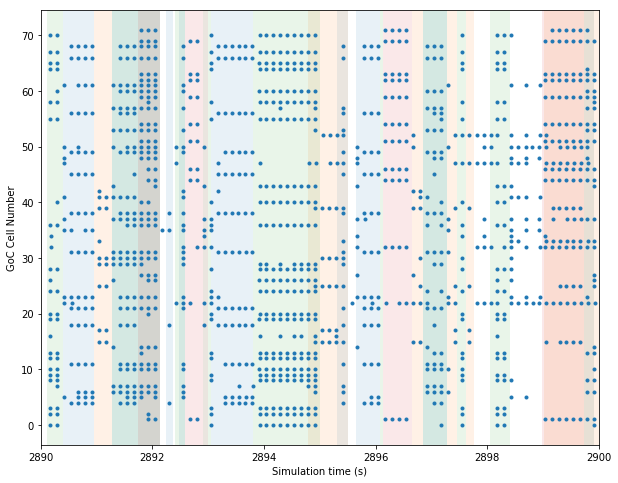

In [20]:
init_time = simulation.current_time - 10.0
end_time = simulation.current_time - 0.0
min_neuron = 0
max_neuron = simulation.cerebellum.get_number_of_elements(layer='goclayer')
pattern_id = range(simulation.config_options['stimulation']['number_of_patterns'])
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer', init_time = init_time, end_time = end_time, neuron_indexes=range(min_neuron,max_neuron))
plt.figure(figsize=(10,8))
plt.plot(gtime,gcell_id, '.')
plt.ylabel('GoC Cell Number')
plt.xlabel('Simulation time (s)')
plt.xlim(init_time,end_time)

selected_bins = numpy.logical_and(simulation.pattern_length_cum<end_time,simulation.pattern_length_cum>init_time)
index = numpy.where(selected_bins)[0]
index = numpy.append([max(index[0]-1,0)],index)
index = numpy.append(index,[min(index[-1]+1,simulation.pattern_length.size-1)])
colorlist = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']
for pat_id in pattern_id:
    for idx in index[:-1]:
        if simulation.pattern_generator.bin_is_in_pattern[idx+1,pat_id]:
            plt.axvspan(simulation.pattern_length_cum[idx], simulation.pattern_length_cum[idx+1], facecolor=colorlist[pat_id], alpha=0.1)

Calculate the average firing frequency of each golgi cells during the ending 100 seconds

In [11]:
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer',
                                                          init_time = simulation.current_time-300, 
                                                          end_time = simulation.current_time)
print gtime, gcell_id
import numpy
firing_frequency = numpy.bincount(gcell_id) / (300.0*8.0)
av_firing_rate = numpy.average(firing_frequency)
print 'Average spike per oscillatory cycle:',av_firing_rate,'Hz'
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(firing_frequency, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Av. Spikes per Oscillatory Cycle')

[2600.4203 2600.5443 2600.6679 ... 2899.7961 2899.9183 2899.9187] [39 39 59 ... 48 58  8]
Average spike per oscillatory cycle: 0.21647569444444445 Hz


Text(0.5,0,u'Av. Spikes per Oscillatory Cycle')

Plot the histogram of non-zero weights between MF and GoC

Number of active synapses MF-GoC: 7062
Weight sum histogram MF-GoC: 7062


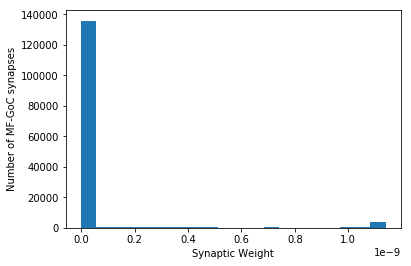

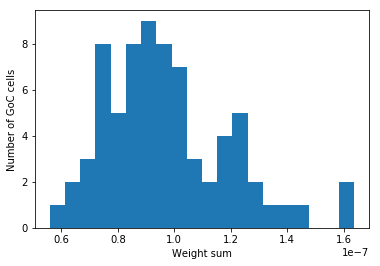

In [12]:
target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
plt.figure()
plt.hist(weight, bins=20, range=(0,simulation.config_options['mfgocsynapsis']['max_weight']))
plt.ylabel('Number of MF-GoC synapses')
plt.xlabel('Synaptic Weight')
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
number_of_active_inputs = numpy.bincount(target_cell_index[active_synapses])
plt.figure()
plt.hist(number_of_active_inputs, bins=10)
plt.ylabel('Number of MF cells')
plt.xlabel('Number of active inputs')
print 'Number of active synapses MF-GoC:',numpy.count_nonzero(active_synapses)
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
weight_sum = numpy.bincount(target_cell_index,weights=weight)
plt.figure()
plt.hist(weight_sum, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Weight sum')
print 'Weight sum histogram MF-GoC:',numpy.count_nonzero(active_synapses)

## MF-GoC weight analysis

Plot the MF-GoC weight as a function of the number of MF activation current in pattern

Text(0.5,1,u'Weight vs Pattern Activation')

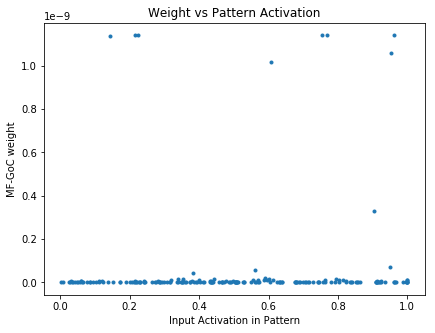

In [13]:
# Obtain the list of MF-GoC inputs
mfgoc_target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
target_cell_index = mfgoc_target_cell_index==3
mfgoc_target_cell_index = mfgoc_target_cell_index[target_cell_index]
mfgoc_source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index[target_cell_index]
mfgoc_weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights[target_cell_index]
mfgoc_max_weight = numpy.max(mfgoc_weight)
mfgoc_number_of_active_inputs = numpy.bincount(mfgoc_target_cell_index)
# Obtain the list of GoC active inputs included in pattern 
pattern_id = 0
included_in_pattern = numpy.in1d(mfgoc_source_cell_index, simulation.pattern_generator.fibers_in_pattern[pattern_id,:])
# Retrieve the weight of those MF included in pattern
# Search the x-index of elements in y
x = simulation.pattern_generator.fibers_in_pattern[pattern_id]
y = mfgoc_source_cell_index[included_in_pattern]
index = numpy.argsort(x)
sorted_x = x[index]
sorted_index = numpy.searchsorted(sorted_x, y)
yindex = numpy.take(index, sorted_index, mode="clip")
# Calculate the normalized activation levels
normalized_activation = simulation.pattern_generator.pattern_activation[pattern_id][yindex]
# Plot the figure
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(normalized_activation,mfgoc_weight[included_in_pattern],'.')
plt.xlabel('Input Activation in Pattern')
plt.ylabel('MF-GoC weight')
plt.title('Weight vs Pattern Activation')

Analyze the GrC neurons which are strenghted

Text(0.5,0,u'Number of MF cells')

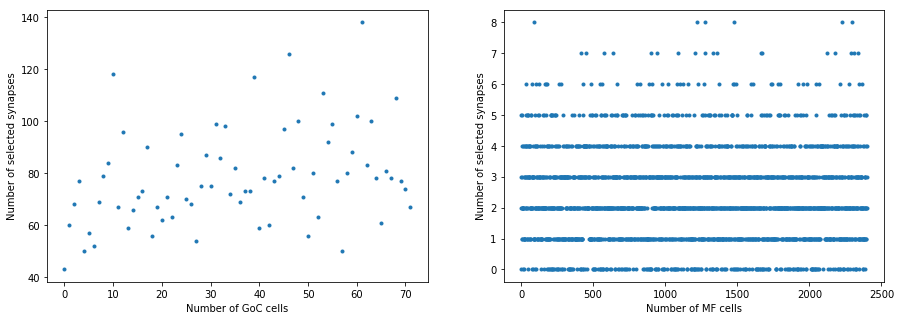

In [14]:
# Obtain the list of active GrC-GoC inputs
mfgoc_target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
mfgoc_source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
mfgoc_weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
target_cell_index = mfgoc_target_cell_index>=0
mfgoc_max_weight = numpy.max(mfgoc_weight[target_cell_index])
selected_synapses = numpy.logical_and(mfgoc_weight>mfgoc_max_weight*0.50,target_cell_index)
target_count = numpy.bincount(mfgoc_target_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='goclayer'))
source_count = numpy.bincount(mfgoc_source_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='mflayer'))
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='goclayer')),target_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of GoC cells')
plt.subplot(1,2,2)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='mflayer')),source_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of MF cells')

## Information Analysis

Mutual information analysis in the GoC layer

In [15]:
simulation.analyze_av_MI()

2018-07-10 18:13:34,190 - P31889 - MemTotal:1132M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-07-10 18:13:34,260 - P31889 - MemTotal:1132M - Simulation - INFO: Analyzing mutual information from time 2600.0 to 2900.0 seconds
2018-07-10 18:13:34,267 - P31889 - MemTotal:1132M - Simulation - INFO: Average firing rate in MI analysis: 1.7318055555555556Hz
2018-07-10 18:13:34,282 - P31889 - MemTotal:1132M - Simulation - INFO: Individual pattern hit matrix:
2018-07-10 18:13:34,283 - P31889 - MemTotal:1132M - Simulation - INFO: [[0.104811   0.13058419 0.15292096 0.11168385 0.79209622 0.49828179
  0.63745704 0.56357388 0.10824742 0.104811   0.28694158 0.81958763
  0.12371134 0.09450172 0.28522337 0.12542955 0.12199313 0.06701031
  0.74914089 0.14089347 0.16666667 0.82130584 0.24226804 0.47079038
  0.13917526 0.13573883 0.21477663 0.26975945 0.16838488 0.32989691
  0.29553265 0.81271478 0.13058419 0.25085911 0.14948454 0.33333333
  0.

2018-07-10 18:13:34,296 - P31889 - MemTotal:1132M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-10 18:13:34,297 - P31889 - MemTotal:1132M - Simulation - INFO: [[0.220022   0.22552255 0.22827283 0.22992299 0.01540154 0.14191419
  0.12651265 0.14246425 0.2249725  0.22442244 0.20627063 0.02475248
  0.22332233 0.22992299 0.21012101 0.20792079 0.24367437 0.20132013
  0.03080308 0.22717272 0.22167217 0.01650165 0.30253025 0.13421342
  0.20682068 0.20792079 0.20517052 0.20737074 0.22552255 0.19141914
  0.19471947 0.03245325 0.25522552 0.23212321 0.23762376 0.22277228
  0.20682068 0.2530253  0.0159516  0.19691969 0.2090209  0.20792079
  0.16941694 0.21837184 0.21947195 0.06490649 0.23267327 0.30308031
  0.28162816 0.01485149 0.31133113 0.23982398 0.29757976 0.15346535
  0.22992299 0.22112211 0.01870187 0.16941694 0.22332233 0.22882288
  0.21727173 0.20022002 0.24037404 0.22387239 0.21672167 0.2249725
  0.01650165 0.23487349 0.01430143 0.2310231  0.22442244 0.14961496]
 [0

2018-07-10 18:13:34,321 - P31889 - MemTotal:1132M - Simulation - INFO: Theoretical maximum of MI
2018-07-10 18:13:34,322 - P31889 - MemTotal:1132M - Simulation - INFO: [0.79917303 0.77873694 0.83173487 0.77436187]


[array([0.10376635, 0.03755979, 0.16272532, 0.09716659])]

In [16]:
a = simulation.analyze_Hits_Top()

2018-07-10 18:13:34,336 - P31889 - MemTotal:1132M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-07-10 18:13:34,464 - P31889 - MemTotal:1132M - Simulation - INFO: Average firing rate in MI analysis: 1.7318055555555556Hz
2018-07-10 18:13:34,489 - P31889 - MemTotal:1132M - Simulation - INFO: Individual pattern hit matrix:
2018-07-10 18:13:34,493 - P31889 - MemTotal:1132M - Simulation - INFO: [[0.104811   0.13058419 0.15292096 0.11168385 0.79209622 0.49828179
  0.63745704 0.56357388 0.10824742 0.104811   0.28694158 0.81958763
  0.12371134 0.09450172 0.28522337 0.12542955 0.12199313 0.06701031
  0.74914089 0.14089347 0.16666667 0.82130584 0.24226804 0.47079038
  0.13917526 0.13573883 0.21477663 0.26975945 0.16838488 0.32989691
  0.29553265 0.81271478 0.13058419 0.25085911 0.14948454 0.33333333
  0.20274914 0.20962199 0.81958763 0.14604811 0.13745704 0.31099656
  0.39862543 0.104811   0.12886598 0.70103093 0.13230241 0.19072165
  0.19931271 0.79381443 0.2199312

2018-07-10 18:13:34,513 - P31889 - MemTotal:1132M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-10 18:13:34,514 - P31889 - MemTotal:1132M - Simulation - INFO: [[0.220022   0.22552255 0.22827283 0.22992299 0.01540154 0.14191419
  0.12651265 0.14246425 0.2249725  0.22442244 0.20627063 0.02475248
  0.22332233 0.22992299 0.21012101 0.20792079 0.24367437 0.20132013
  0.03080308 0.22717272 0.22167217 0.01650165 0.30253025 0.13421342
  0.20682068 0.20792079 0.20517052 0.20737074 0.22552255 0.19141914
  0.19471947 0.03245325 0.25522552 0.23212321 0.23762376 0.22277228
  0.20682068 0.2530253  0.0159516  0.19691969 0.2090209  0.20792079
  0.16941694 0.21837184 0.21947195 0.06490649 0.23267327 0.30308031
  0.28162816 0.01485149 0.31133113 0.23982398 0.29757976 0.15346535
  0.22992299 0.22112211 0.01870187 0.16941694 0.22332233 0.22882288
  0.21727173 0.20022002 0.24037404 0.22387239 0.21672167 0.2249725
  0.01650165 0.23487349 0.01430143 0.2310231  0.22442244 0.14961496]
 [0

### Mutual Information analysis for each neuron and each pattern

Analyze the pattern corresponding to each time bin

In [17]:
inv_time_bin = 1./time_bin
pattern_index = range(0,simulation.config_options['stimulation']['number_of_patterns'])
cell_index = range(0,simulation.cerebellum.get_number_of_elements(layer='goclayer'))        
# Generate the time bin matrix
total_time = simulation.pattern_generator.simulation_time
bin_time_init = numpy.linspace(0.0, total_time-time_bin, num=total_time*inv_time_bin)
bin_time_end = numpy.linspace(time_bin,total_time,num=total_time*inv_time_bin)

# Initialize a matrix
num_patterns = len(pattern_index)
num_bins = len(bin_time_init)
num_cells = len(cell_index)

# Calculate the time of each pattern interval
time_end_of_pattern = simulation.pattern_generator.pattern_length_cum
time_init_of_pattern = numpy.append([0.0],time_end_of_pattern[:-1])

# Calculate the bin of each pattern interval. Check the round of the last bin to avoid out of range
bin_end_of_pattern = numpy.floor(time_end_of_pattern * inv_time_bin).astype(int)
if (bin_end_of_pattern[-1]>=num_bins):
    bin_end_of_pattern[-1]=num_bins-1
bin_init_of_pattern = numpy.append([0],bin_end_of_pattern[:-1])
if (bin_init_of_pattern[-1]>=num_bins):
    bin_init_of_pattern[-1]=num_bins-1

# Final matrix indicating which bins are considered of each pattern
bin_is_pattern = numpy.empty((num_patterns, num_bins),dtype='bool')
bin_is_pattern[:,:] = False
bin_pattern = numpy.zeros(num_bins)

# Final matrix indicating which bins are registered spikes
bin_has_fired = numpy.empty((num_cells, num_bins), dtype='bool')
bin_has_fired[:,:] = False

for key, value in enumerate(pattern_index):
    time_of_pattern_in_bin = numpy.zeros(num_bins)
    for index in simulation.pattern_generator.pattern_id_index[value]:
        init_bin = bin_init_of_pattern[index]
        end_bin = bin_end_of_pattern[index]

        list_of_bins = range(init_bin,end_bin+1)

        # Add the time of the initial bin (if exists)
        if init_bin!=end_bin:
            time_of_pattern_in_bin[list_of_bins[0]] += (bin_time_end[init_bin] - time_init_of_pattern[index])

        # Add the time of the intermediate bins (if exist)
        time_of_pattern_in_bin[list_of_bins[1:-1]] += time_bin

        # Add the time of the final bin
        time_of_pattern_in_bin[list_of_bins[-1]] += (time_end_of_pattern[index] - max(time_init_of_pattern[index],bin_time_init[end_bin]))

    # Those bins where the time in the pattern is longer than half of the bin are set to part of that pattern    
    bin_is_pattern[key,time_of_pattern_in_bin>(time_bin/2.)] = True
    bin_pattern[bin_is_pattern[key,:]] = bin_pattern[bin_is_pattern[key,:]] + 2**value

    
# Create a map of cells to index
cell_map = dict()
for key, value in enumerate(cell_index):
    cell_map[value] = key

pynest:6: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
pynest:7: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


In [18]:
def calc_Entropy(bin_matrix):
    '''
    Calculate the entropy for each individual pattern.
    @param bin_matrix Boolean matrix including 1 line for each pattern and 1 column for each time bin.
    '''
    sum_bins = numpy.count_nonzero(bin_matrix,axis=1)
    probability = sum_bins/float(bin_matrix.shape[1])
    entropy = numpy.zeros(probability.shape)
    idx = probability>0.0
    entropy[idx] = -probability[idx]*numpy.log2(probability[idx])
    idx = probability<1.0
    entropy[idx] -= (1-probability[idx])*numpy.log2(1-probability[idx])
    return entropy


def calc_Joint_Entropy(cell_firing, pattern_present):
    '''
    Calculate the entropy of having both cell firing and pattern present.
    @param cell_firing Boolean matrix including 1 line for each cell and 1 column for each time bin.
    @param pattern_present Boolean matrix including 1 line for each pattern and 1 column for each time bin.
    '''
    hit_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    cr_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    miss_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    fa_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    
    for index_pat, pattern in enumerate(pattern_present):
        if (numpy.count_nonzero(pattern)):
            for index_cell, firing in enumerate(cell_firing):
                hit_matrix[index_pat,index_cell] = numpy.count_nonzero(firing&pattern)/float(pattern.shape[0])
                cr_matrix[index_pat,index_cell] = numpy.count_nonzero(~firing&~pattern)/float(pattern.shape[0])
                miss_matrix[index_pat,index_cell] = numpy.count_nonzero(~firing&pattern)/float(pattern.shape[0])
                fa_matrix[index_pat,index_cell] = numpy.count_nonzero(firing&~pattern)/float(pattern.shape[0])
        else:
            print 'Pattern',index_pat,'never occurs. Statistics will not be calculated'
    
    entropy = numpy.zeros((len(pattern_present),len(cell_firing)),dtype=numpy.float)           
    idx = hit_matrix>0
    entropy[idx] = -hit_matrix[idx]*numpy.log2(hit_matrix[idx])
    idx = cr_matrix>0
    entropy[idx] -= cr_matrix[idx]*numpy.log2(cr_matrix[idx])
    idx = miss_matrix>0
    entropy[idx] -= miss_matrix[idx]*numpy.log2(miss_matrix[idx])
    idx = fa_matrix>0
    entropy[idx] -= fa_matrix[idx]*numpy.log2(fa_matrix[idx])
    return entropy

def calc_Ind_Pattern_Hit_Matrix(cell_firing, pattern_present):
    '''
    Calculate the correct rejection, hit, miss and false alarm matrisses with 1 line for each cell and 1 column for each pattern (including noise).
    @param cell_firing Boolean matrix including 1 line for each cell and 1 column for each time bin.
    @param pattern_present Boolean matrix including 1 line for each pattern and 1 column for each time bin.
    '''
    hit_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    cr_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    miss_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    fa_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    
    for index_pat, pattern in enumerate(pattern_present):
        if (numpy.count_nonzero(pattern)):
            for index_cell, firing in enumerate(cell_firing):
                hit_matrix[index_pat,index_cell] = numpy.count_nonzero(firing&pattern)/float(numpy.count_nonzero(pattern))
                cr_matrix[index_pat,index_cell] = numpy.count_nonzero(~firing&~pattern)/float(numpy.count_nonzero(~pattern))
                miss_matrix[index_pat,index_cell] = numpy.count_nonzero(~firing&pattern)/float(numpy.count_nonzero(pattern))
                fa_matrix[index_pat,index_cell] = numpy.count_nonzero(firing&~pattern)/float(numpy.count_nonzero(~pattern))
        else:
            print 'Pattern',index_pat,'never occurs. Statistics will not be calculated'               
        
    return cr_matrix, hit_matrix, miss_matrix, fa_matrix 
    
def calc_MI(pattern_entropy, cell_entropy, joint_entropy):
    '''
    Calculate the MI between the pattern in the input and each neuron.
    @param pattern_entropy Array with the entropy of each individual pattern.
    @param cell_entropy Array with the entropy of each individual cell.
    @param joint_entropy 2D array with the joint entropy of each cell to each pattern
    '''
    
    MI_matrix = numpy.empty((len(pattern_entropy),len(cell_entropy)))

    for index_pat, pattern_H in enumerate(pattern_entropy):
        MI_matrix[index_pat,:] = pattern_H + cell_entropy[:] - joint_entropy[index_pat,:]

    return MI_matrix

In [19]:
if simulation.current_time<analysis_time:
    init_time = 0
else:
    init_time = simulation.current_time - analysis_time
print init_time, simulation.current_time
       
# Load data from the data provider
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer', 
                                                          init_time = init_time, end_time = simulation.current_time)
spike_bin_index = numpy.floor(gtime*inv_time_bin).astype(int)

av_firing_rate = float(len(gtime))/(len(cell_index)*(simulation.current_time-init_time)*8)
print 'Average firing rate in MI analysis:',av_firing_rate,'Hz'
        
cell_id = numpy.array([cell_map[value] for value in gcell_id])
        
# Final matrix indicating which bins are registered spikes
if len(spike_bin_index) and len(cell_id):
    bin_has_fired[cell_id,spike_bin_index] = True
    
# Calculate mutual information in the time window
init_bin = int(init_time * inv_time_bin)
end_bin = int(simulation.current_time * inv_time_bin)

cr_matrix, hit_matrix, miss_matrix, fa_matrix = calc_Ind_Pattern_Hit_Matrix(bin_has_fired[:,init_bin:end_bin], bin_is_pattern[:,init_bin:end_bin])

# Obtain the list of neurons with hit rate over 80%
hit_rate_thr = 0.80
neurons_over = numpy.where(hit_matrix>hit_rate_thr)
print 'List of neurons with hit rate over',hit_rate_thr,'. Number of neurons:',neurons_over[0].shape,'. Pattern:',neurons_over[0],'Neuron:',neurons_over[1]
        
# Calculate pattern entropy, cell entropy and joint entropy
pat_entropy = calc_Entropy(bin_is_pattern[:,init_bin:end_bin])
cell_entropy = calc_Entropy(bin_has_fired[:,init_bin:end_bin])
joint_entropy = calc_Joint_Entropy(bin_has_fired[:,init_bin:end_bin], bin_is_pattern[:,init_bin:end_bin])

# Calculate average MI
MI_Matrix = calc_MI(pat_entropy, cell_entropy, joint_entropy)

selected_pattern = numpy.argmax(MI_Matrix, axis=0)

print 'Pattern id with maximum MI for each neuron:',selected_pattern
MI_per_pattern = 0
for idx in range(num_patterns):
    sel_columns = selected_pattern==idx
    MI_per_pattern += numpy.average(MI_Matrix[idx,sel_columns])
av_MI_per_pattern = MI_per_pattern/num_patterns
print 'Average MI per pattern:',av_MI_per_pattern

2600.0 2900.0
Average firing rate in MI analysis: 0.21647569444444445 Hz
List of neurons with hit rate over 0.8 . Number of neurons: (16,) . Pattern: [0 0 0 0 0 0 2 3 3 3 3 3 3 3 3 3] Neuron: [11 21 31 38 56 66 60  1 44 46 51 54 59 62 63 69]
Pattern id with maximum MI for each neuron: [2 3 2 2 0 0 0 2 2 2 2 0 2 2 3 1 2 1 0 2 2 0 0 0 2 1 2 3 2 2 1 0 3 1 3 1 2
 0 0 1 2 1 1 2 3 0 3 3 0 0 1 3 1 2 3 2 0 2 2 3 2 0 3 3 2 2 0 2 0 3 2 3]
Average MI per pattern: 0.2791101480095538
